In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn.preprocessing import minmax_scale
import h5py
from tabulate import tabulate

import os
os.environ['KERAS_BACKEND'] = 'tensorflow' 
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam
from keras.models import load_model

In [32]:
# one could parameterize to select the stocks that are desired
def create_dataseries():
    symlist = pd.read_csv('nasdaq.csv')
    # this would change depending upon parameterization
    symlist = symlist[0:50]
    data = pd.DataFrame()
    # now read each file and align the data along the date axis
    for i in range(len(symlist)):
        filename = 'csvdata/' + symlist.Ticker[i] + '.csv'
        temp = pd.read_csv(filename, index_col = ['Date'],usecols=['Date','Close'])
        temp = temp.loc[~temp.index.duplicated(keep='first')]
        temp.columns = [symlist.Ticker[i]]
        temp = temp.shift(-1)/temp -1
        temp = temp[:-1]
        if(len(temp) > len(data)):
            data = pd.concat([temp, data],axis =1, sort=False)
        else:
            data = pd.concat([data, temp],axis =1, sort=False)
    
    data = data.fillna(0)
    return data

# Create training samples 
# samplesize determines the number of observations to use
# rollwindow creates a loop after skipping a few data points
# here samplesize would be 250 and rollwindow 25
def create_samples(samplesize, rollwindow):
    # get the raw data series which is return series
    dataset = create_dataseries()
    samples = list()
    for i in range(0,len(dataset)-samplesize-rollwindow,rollwindow):
        end_ix = i + samplesize
        if end_ix > len(dataset):
            break
        temp = dataset[i:end_ix]
        # now scale this matrix by the largest value being 1 and lowest value being -1
        #temp = minmax_scale(temp, feature_range=(-1,1),axis=0)
        samples.append(temp.values)
        
    return np.array(samples)  

samples = create_samples(22, 1)
samples = samples.reshape(samples.shape[0], samples.shape[1]*samples.shape[2])

In [3]:
samples.shape

(7220, 1100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1100)              1127500   
Total para

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1


  4%|▍         | 2/50 [00:03<01:42,  2.13s/it]

1 [D loss: 0.709768, acc.: 70.20%] [G loss: 0.917351]
1 [D loss: 0.698716, acc.: 115.08%] [G loss: 0.520373]


  8%|▊         | 4/50 [00:03<00:51,  1.11s/it]

1 [D loss: 0.694904, acc.: 136.86%] [G loss: 0.538912]
1 [D loss: 0.695640, acc.: 111.51%] [G loss: 0.869010]


 12%|█▏        | 6/50 [00:03<00:26,  1.64it/s]

1 [D loss: 0.704264, acc.: 60.70%] [G loss: 1.674975]
1 [D loss: 0.712653, acc.: 30.54%] [G loss: 2.356830]


 16%|█▌        | 8/50 [00:03<00:15,  2.74it/s]

1 [D loss: 0.712401, acc.: 23.16%] [G loss: 2.397124]
1 [D loss: 0.710091, acc.: 29.45%] [G loss: 2.228899]


 20%|██        | 10/50 [00:04<00:09,  4.10it/s]

1 [D loss: 0.705771, acc.: 30.09%] [G loss: 2.240321]
1 [D loss: 0.708220, acc.: 39.85%] [G loss: 2.028181]


 24%|██▍       | 12/50 [00:04<00:06,  5.44it/s]

1 [D loss: 0.718524, acc.: 48.78%] [G loss: 1.913848]
1 [D loss: 0.719403, acc.: 47.99%] [G loss: 1.948435]


 28%|██▊       | 14/50 [00:04<00:05,  6.48it/s]

1 [D loss: 0.730599, acc.: 47.04%] [G loss: 2.048864]
1 [D loss: 0.741486, acc.: 44.67%] [G loss: 2.056065]


 32%|███▏      | 16/50 [00:04<00:04,  7.13it/s]

1 [D loss: 0.757336, acc.: 42.74%] [G loss: 2.160306]
1 [D loss: 0.768348, acc.: 33.30%] [G loss: 2.329805]


 36%|███▌      | 18/50 [00:05<00:04,  7.52it/s]

1 [D loss: 0.782517, acc.: 11.20%] [G loss: 3.088012]
1 [D loss: 0.797948, acc.: 3.57%] [G loss: 4.179285]


 40%|████      | 20/50 [00:05<00:03,  7.65it/s]

1 [D loss: 0.804483, acc.: 3.71%] [G loss: 4.303866]
1 [D loss: 0.774527, acc.: 5.69%] [G loss: 3.567822]


 44%|████▍     | 22/50 [00:05<00:03,  7.78it/s]

1 [D loss: 0.770412, acc.: 9.32%] [G loss: 3.384127]
1 [D loss: 0.765282, acc.: 13.49%] [G loss: 2.844630]


 48%|████▊     | 24/50 [00:05<00:03,  7.87it/s]

1 [D loss: 0.769300, acc.: 31.91%] [G loss: 2.220443]
1 [D loss: 0.762319, acc.: 46.23%] [G loss: 1.604380]


 52%|█████▏    | 26/50 [00:06<00:03,  7.93it/s]

1 [D loss: 0.764337, acc.: 35.05%] [G loss: 1.923354]
1 [D loss: 0.785528, acc.: 13.63%] [G loss: 2.733006]


 56%|█████▌    | 28/50 [00:06<00:02,  7.90it/s]

1 [D loss: 0.772050, acc.: 4.67%] [G loss: 3.727383]
1 [D loss: 0.772659, acc.: 4.16%] [G loss: 3.847890]


 60%|██████    | 30/50 [00:06<00:02,  7.96it/s]

1 [D loss: 0.751891, acc.: 4.63%] [G loss: 3.649502]
1 [D loss: 0.759015, acc.: 6.57%] [G loss: 3.371587]


 64%|██████▍   | 32/50 [00:06<00:02,  7.84it/s]

1 [D loss: 0.743439, acc.: 13.43%] [G loss: 2.738975]
1 [D loss: 0.735438, acc.: 25.83%] [G loss: 2.012285]


 68%|██████▊   | 34/50 [00:07<00:02,  7.78it/s]

1 [D loss: 0.741213, acc.: 40.97%] [G loss: 1.377289]
1 [D loss: 0.755467, acc.: 36.03%] [G loss: 1.638502]


 72%|███████▏  | 36/50 [00:07<00:01,  7.76it/s]

1 [D loss: 0.755494, acc.: 20.11%] [G loss: 2.388802]
1 [D loss: 0.733065, acc.: 17.04%] [G loss: 2.511185]


 76%|███████▌  | 38/50 [00:07<00:01,  7.85it/s]

1 [D loss: 0.726394, acc.: 18.16%] [G loss: 2.313410]
1 [D loss: 0.731392, acc.: 21.27%] [G loss: 2.093946]


 80%|████████  | 40/50 [00:07<00:01,  7.90it/s]

1 [D loss: 0.736155, acc.: 19.36%] [G loss: 2.466805]
1 [D loss: 0.714958, acc.: 12.91%] [G loss: 3.003928]


 84%|████████▍ | 42/50 [00:08<00:01,  7.84it/s]

1 [D loss: 0.728359, acc.: 10.73%] [G loss: 3.188426]
1 [D loss: 0.740622, acc.: 12.36%] [G loss: 3.348634]


 88%|████████▊ | 44/50 [00:08<00:00,  7.85it/s]

1 [D loss: 0.732801, acc.: 6.90%] [G loss: 3.463830]
1 [D loss: 0.732445, acc.: 6.05%] [G loss: 4.150494]


 92%|█████████▏| 46/50 [00:08<00:00,  7.91it/s]

1 [D loss: 0.717686, acc.: 10.00%] [G loss: 3.920764]
1 [D loss: 0.721650, acc.: 22.04%] [G loss: 1.888774]


 96%|█████████▌| 48/50 [00:08<00:00,  7.92it/s]

1 [D loss: 0.710983, acc.: 42.93%] [G loss: 1.332927]
1 [D loss: 0.699729, acc.: 33.83%] [G loss: 1.778875]


  0%|          | 0/50 [00:00<?, ?it/s]

1 [D loss: 0.724351, acc.: 13.77%] [G loss: 2.634958]
1 [D loss: 0.703554, acc.: 8.97%] [G loss: 3.109854]
Epoch 2


  4%|▍         | 2/50 [00:00<00:06,  7.76it/s]

2 [D loss: 0.703819, acc.: 11.78%] [G loss: 3.003466]
2 [D loss: 0.678133, acc.: 16.26%] [G loss: 2.503688]


  8%|▊         | 4/50 [00:00<00:05,  7.82it/s]

2 [D loss: 0.668921, acc.: 26.23%] [G loss: 1.876880]
2 [D loss: 0.675355, acc.: 21.12%] [G loss: 2.424825]


 10%|█         | 5/50 [00:00<00:06,  7.50it/s]

2 [D loss: 0.657722, acc.: 15.15%] [G loss: 3.001707]


 14%|█▍        | 7/50 [00:01<00:07,  5.94it/s]

2 [D loss: 0.645604, acc.: 11.54%] [G loss: 3.375291]
2 [D loss: 0.644582, acc.: 13.98%] [G loss: 3.018623]


 18%|█▊        | 9/50 [00:01<00:06,  6.55it/s]

2 [D loss: 0.622104, acc.: 21.49%] [G loss: 2.239460]
2 [D loss: 0.623935, acc.: 29.70%] [G loss: 2.290531]


 22%|██▏       | 11/50 [00:01<00:05,  7.21it/s]

2 [D loss: 0.645365, acc.: 21.66%] [G loss: 2.612283]
2 [D loss: 0.610061, acc.: 16.92%] [G loss: 2.872458]


 24%|██▍       | 12/50 [00:01<00:06,  6.22it/s]

2 [D loss: 0.605172, acc.: 24.91%] [G loss: 2.917829]


 28%|██▊       | 14/50 [00:02<00:05,  6.01it/s]

2 [D loss: 0.615855, acc.: 23.38%] [G loss: 3.022008]
2 [D loss: 0.622218, acc.: 25.19%] [G loss: 3.264824]


 30%|███       | 15/50 [00:02<00:05,  6.42it/s]

2 [D loss: 0.613397, acc.: 17.65%] [G loss: 3.464593]


 34%|███▍      | 17/50 [00:02<00:06,  5.48it/s]

2 [D loss: 0.617041, acc.: 16.99%] [G loss: 4.081724]
2 [D loss: 0.628330, acc.: 26.89%] [G loss: 4.699644]


 38%|███▊      | 19/50 [00:03<00:05,  6.08it/s]

2 [D loss: 0.634197, acc.: 4.73%] [G loss: 4.634786]
2 [D loss: 0.619783, acc.: 5.26%] [G loss: 4.205463]


 42%|████▏     | 21/50 [00:03<00:04,  6.50it/s]

2 [D loss: 0.580399, acc.: 5.17%] [G loss: 4.484824]
2 [D loss: 0.564740, acc.: 4.36%] [G loss: 4.933513]


 44%|████▍     | 22/50 [00:03<00:05,  5.48it/s]

2 [D loss: 0.574052, acc.: 8.39%] [G loss: 4.826892]


 46%|████▌     | 23/50 [00:03<00:05,  5.28it/s]

2 [D loss: 0.558150, acc.: 11.35%] [G loss: 4.605235]


 50%|█████     | 25/50 [00:04<00:04,  5.53it/s]

2 [D loss: 0.561012, acc.: 20.59%] [G loss: 4.717579]
2 [D loss: 0.549759, acc.: 5.06%] [G loss: 4.558948]


 54%|█████▍    | 27/50 [00:04<00:03,  5.90it/s]

2 [D loss: 0.490865, acc.: 3.35%] [G loss: 5.297272]
2 [D loss: 0.496257, acc.: 2.94%] [G loss: 4.951370]


 58%|█████▊    | 29/50 [00:04<00:03,  6.75it/s]

2 [D loss: 0.499719, acc.: 5.83%] [G loss: 5.009451]
2 [D loss: 0.474947, acc.: 15.46%] [G loss: 5.152628]


 62%|██████▏   | 31/50 [00:05<00:02,  7.29it/s]

2 [D loss: 0.461080, acc.: 12.67%] [G loss: 4.071670]
2 [D loss: 0.450744, acc.: 26.86%] [G loss: 3.605658]


 66%|██████▌   | 33/50 [00:05<00:02,  7.66it/s]

2 [D loss: 0.457398, acc.: 9.29%] [G loss: 3.669475]
2 [D loss: 0.453872, acc.: 17.02%] [G loss: 3.747499]


 70%|███████   | 35/50 [00:05<00:02,  7.46it/s]

2 [D loss: 0.462219, acc.: 10.45%] [G loss: 4.259072]
2 [D loss: 0.430599, acc.: 8.82%] [G loss: 4.836326]


 74%|███████▍  | 37/50 [00:05<00:01,  7.76it/s]

2 [D loss: 0.408431, acc.: 2.15%] [G loss: 5.033389]
2 [D loss: 0.376029, acc.: 1.94%] [G loss: 5.438917]


 78%|███████▊  | 39/50 [00:06<00:01,  7.86it/s]

2 [D loss: 0.369717, acc.: 3.24%] [G loss: 5.450110]
2 [D loss: 0.347890, acc.: 5.66%] [G loss: 5.446734]


 82%|████████▏ | 41/50 [00:06<00:01,  7.68it/s]

2 [D loss: 0.333631, acc.: 15.18%] [G loss: 6.499889]
2 [D loss: 0.339314, acc.: 9.07%] [G loss: 5.252729]


 86%|████████▌ | 43/50 [00:06<00:00,  7.74it/s]

2 [D loss: 0.304819, acc.: 24.41%] [G loss: 6.320795]
2 [D loss: 0.321592, acc.: 0.51%] [G loss: 8.946033]


 90%|█████████ | 45/50 [00:06<00:00,  7.87it/s]

2 [D loss: 0.337883, acc.: 1.16%] [G loss: 6.843528]
2 [D loss: 0.308456, acc.: 34.49%] [G loss: 8.591873]


 94%|█████████▍| 47/50 [00:07<00:00,  7.85it/s]

2 [D loss: 0.294279, acc.: 0.32%] [G loss: 10.942244]
2 [D loss: 0.329692, acc.: 1.21%] [G loss: 6.903855]


 98%|█████████▊| 49/50 [00:07<00:00,  7.92it/s]

2 [D loss: 0.338149, acc.: 19.40%] [G loss: 5.963214]
2 [D loss: 0.302566, acc.: 6.00%] [G loss: 6.339713]


  2%|▏         | 1/50 [00:00<00:06,  8.13it/s]

2 [D loss: 0.300809, acc.: 23.87%] [G loss: 5.314498]
Epoch 3
3 [D loss: 0.337876, acc.: 12.04%] [G loss: 5.019398]


  6%|▌         | 3/50 [00:00<00:05,  8.10it/s]

3 [D loss: 0.294013, acc.: 6.50%] [G loss: 4.533753]
3 [D loss: 0.323885, acc.: 4.98%] [G loss: 5.579374]


 10%|█         | 5/50 [00:00<00:05,  8.05it/s]

3 [D loss: 0.249168, acc.: 2.91%] [G loss: 5.266387]
3 [D loss: 0.245297, acc.: 17.09%] [G loss: 6.068247]


 14%|█▍        | 7/50 [00:00<00:05,  7.94it/s]

3 [D loss: 0.226679, acc.: 2.04%] [G loss: 5.275982]
3 [D loss: 0.247723, acc.: 5.08%] [G loss: 5.291302]


 18%|█▊        | 9/50 [00:01<00:05,  7.98it/s]

3 [D loss: 0.232555, acc.: 7.50%] [G loss: 7.314189]
3 [D loss: 0.224777, acc.: 0.69%] [G loss: 7.080725]


 22%|██▏       | 11/50 [00:01<00:04,  8.06it/s]

3 [D loss: 0.204812, acc.: 8.51%] [G loss: 8.657282]
3 [D loss: 0.170113, acc.: 1.04%] [G loss: 8.211846]


 26%|██▌       | 13/50 [00:01<00:04,  8.03it/s]

3 [D loss: 0.161786, acc.: 8.27%] [G loss: 7.736213]
3 [D loss: 0.154623, acc.: 7.38%] [G loss: 6.744777]


 30%|███       | 15/50 [00:01<00:04,  7.96it/s]

3 [D loss: 0.197483, acc.: 27.87%] [G loss: 6.782077]
3 [D loss: 0.175327, acc.: 2.56%] [G loss: 7.191926]


 32%|███▏      | 16/50 [00:02<00:05,  6.09it/s]

3 [D loss: 0.171645, acc.: 3.53%] [G loss: 5.647124]


 34%|███▍      | 17/50 [00:02<00:05,  5.69it/s]

3 [D loss: 0.197765, acc.: 10.74%] [G loss: 5.054525]


 38%|███▊      | 19/50 [00:02<00:05,  5.73it/s]

3 [D loss: 0.135893, acc.: 1.91%] [G loss: 5.370430]
3 [D loss: 0.141061, acc.: 1.96%] [G loss: 5.560965]


 42%|████▏     | 21/50 [00:02<00:04,  6.65it/s]

3 [D loss: 0.151796, acc.: 1.26%] [G loss: 5.132838]
3 [D loss: 0.143183, acc.: 11.63%] [G loss: 5.774214]


 46%|████▌     | 23/50 [00:03<00:03,  7.27it/s]

3 [D loss: 0.110134, acc.: 4.70%] [G loss: 5.435024]
3 [D loss: 0.130651, acc.: 35.39%] [G loss: 7.191491]


 50%|█████     | 25/50 [00:03<00:03,  7.44it/s]

3 [D loss: 0.145169, acc.: 9.08%] [G loss: 5.667350]
3 [D loss: 0.186146, acc.: 28.98%] [G loss: 4.739808]


 54%|█████▍    | 27/50 [00:03<00:03,  7.50it/s]

3 [D loss: 0.227736, acc.: 6.96%] [G loss: 6.634961]
3 [D loss: 0.187091, acc.: 6.97%] [G loss: 5.885151]


 58%|█████▊    | 29/50 [00:03<00:02,  7.72it/s]

3 [D loss: 0.205192, acc.: 15.03%] [G loss: 6.110739]
3 [D loss: 0.153426, acc.: 1.57%] [G loss: 6.972535]


 62%|██████▏   | 31/50 [00:04<00:02,  7.88it/s]

3 [D loss: 0.157335, acc.: 6.79%] [G loss: 6.147642]
3 [D loss: 0.134488, acc.: 10.93%] [G loss: 6.892564]


 66%|██████▌   | 33/50 [00:04<00:02,  7.89it/s]

3 [D loss: 0.127002, acc.: 9.94%] [G loss: 6.206379]
3 [D loss: 0.133520, acc.: 15.10%] [G loss: 6.471931]


 70%|███████   | 35/50 [00:04<00:01,  7.97it/s]

3 [D loss: 0.171489, acc.: 1.86%] [G loss: 6.417558]
3 [D loss: 0.155272, acc.: 7.92%] [G loss: 6.356981]


 74%|███████▍  | 37/50 [00:04<00:01,  8.01it/s]

3 [D loss: 0.127824, acc.: 10.31%] [G loss: 6.954920]
3 [D loss: 0.185573, acc.: 28.77%] [G loss: 6.211924]


 78%|███████▊  | 39/50 [00:05<00:01,  8.03it/s]

3 [D loss: 0.127493, acc.: 10.03%] [G loss: 4.528447]
3 [D loss: 0.148051, acc.: 14.31%] [G loss: 4.645249]


 82%|████████▏ | 41/50 [00:05<00:01,  8.06it/s]

3 [D loss: 0.147497, acc.: 1.38%] [G loss: 6.068918]
3 [D loss: 0.130381, acc.: 0.90%] [G loss: 6.643541]


 86%|████████▌ | 43/50 [00:05<00:00,  8.09it/s]

3 [D loss: 0.172207, acc.: 4.32%] [G loss: 5.804254]
3 [D loss: 0.133627, acc.: 12.38%] [G loss: 6.199701]


 90%|█████████ | 45/50 [00:05<00:00,  8.15it/s]

3 [D loss: 0.118416, acc.: 14.15%] [G loss: 6.282444]
3 [D loss: 0.144192, acc.: 19.12%] [G loss: 6.969221]


 94%|█████████▍| 47/50 [00:06<00:00,  8.09it/s]

3 [D loss: 0.145767, acc.: 2.05%] [G loss: 6.196875]
3 [D loss: 0.161603, acc.: 7.45%] [G loss: 5.899453]


 98%|█████████▊| 49/50 [00:06<00:00,  8.11it/s]

3 [D loss: 0.168210, acc.: 14.96%] [G loss: 7.008845]
3 [D loss: 0.097096, acc.: 3.77%] [G loss: 7.242174]


  2%|▏         | 1/50 [00:00<00:06,  8.09it/s]

3 [D loss: 0.112271, acc.: 25.23%] [G loss: 7.917105]
Epoch 4
4 [D loss: 0.107445, acc.: 7.69%] [G loss: 6.295149]


  6%|▌         | 3/50 [00:00<00:05,  8.14it/s]

4 [D loss: 0.099125, acc.: 11.09%] [G loss: 5.475288]
4 [D loss: 0.144641, acc.: 8.99%] [G loss: 6.044014]


 10%|█         | 5/50 [00:00<00:05,  8.07it/s]

4 [D loss: 0.105449, acc.: 9.24%] [G loss: 7.045864]
4 [D loss: 0.094367, acc.: 7.37%] [G loss: 7.636198]


 14%|█▍        | 7/50 [00:00<00:05,  8.04it/s]

4 [D loss: 0.241975, acc.: 13.18%] [G loss: 7.087634]
4 [D loss: 0.098373, acc.: 14.89%] [G loss: 7.509498]


 18%|█▊        | 9/50 [00:01<00:05,  8.03it/s]

4 [D loss: 0.105436, acc.: 6.71%] [G loss: 6.484123]
4 [D loss: 0.152891, acc.: 29.25%] [G loss: 6.378891]


 22%|██▏       | 11/50 [00:01<00:04,  8.01it/s]

4 [D loss: 0.161054, acc.: 8.39%] [G loss: 6.003693]
4 [D loss: 0.208240, acc.: 15.21%] [G loss: 4.583269]


 26%|██▌       | 13/50 [00:01<00:04,  8.05it/s]

4 [D loss: 0.187071, acc.: 16.17%] [G loss: 5.247356]
4 [D loss: 0.157831, acc.: 9.40%] [G loss: 6.052659]


 30%|███       | 15/50 [00:01<00:04,  8.05it/s]

4 [D loss: 0.143421, acc.: 4.84%] [G loss: 5.685787]
4 [D loss: 0.190052, acc.: 10.37%] [G loss: 5.990423]


 34%|███▍      | 17/50 [00:02<00:04,  7.96it/s]

4 [D loss: 0.186872, acc.: 6.01%] [G loss: 5.543387]
4 [D loss: 0.151143, acc.: 16.81%] [G loss: 6.795759]


 38%|███▊      | 19/50 [00:02<00:04,  6.30it/s]

4 [D loss: 0.098963, acc.: 20.45%] [G loss: 7.629429]
4 [D loss: 0.161061, acc.: 4.16%] [G loss: 7.373566]


 42%|████▏     | 21/50 [00:02<00:04,  7.03it/s]

4 [D loss: 0.160910, acc.: 20.31%] [G loss: 7.786705]
4 [D loss: 0.201777, acc.: 1.86%] [G loss: 7.689883]


 46%|████▌     | 23/50 [00:03<00:03,  7.55it/s]

4 [D loss: 0.146131, acc.: 10.50%] [G loss: 5.967645]
4 [D loss: 0.121763, acc.: 16.63%] [G loss: 6.666744]


 50%|█████     | 25/50 [00:03<00:03,  7.43it/s]

4 [D loss: 0.093654, acc.: 8.59%] [G loss: 6.869993]
4 [D loss: 0.213173, acc.: 37.14%] [G loss: 5.769461]


 54%|█████▍    | 27/50 [00:03<00:03,  7.56it/s]

4 [D loss: 0.130815, acc.: 6.13%] [G loss: 5.595674]
4 [D loss: 0.123504, acc.: 6.27%] [G loss: 5.142941]


 58%|█████▊    | 29/50 [00:03<00:02,  7.88it/s]

4 [D loss: 0.215416, acc.: 6.25%] [G loss: 4.818845]
4 [D loss: 0.076579, acc.: 7.92%] [G loss: 5.732044]


 60%|██████    | 30/50 [00:03<00:02,  7.83it/s]

4 [D loss: 0.098300, acc.: 3.49%] [G loss: 6.151744]


 62%|██████▏   | 31/50 [00:04<00:03,  6.24it/s]

4 [D loss: 0.080280, acc.: 6.97%] [G loss: 5.921488]


 66%|██████▌   | 33/50 [00:04<00:03,  5.33it/s]

4 [D loss: 0.100218, acc.: 12.24%] [G loss: 5.461763]
4 [D loss: 0.082383, acc.: 14.14%] [G loss: 5.343281]


 70%|███████   | 35/50 [00:04<00:02,  5.78it/s]

4 [D loss: 0.079791, acc.: 24.08%] [G loss: 5.099662]
4 [D loss: 0.086225, acc.: 34.26%] [G loss: 5.158383]


 72%|███████▏  | 36/50 [00:05<00:02,  5.13it/s]

4 [D loss: 0.142802, acc.: 31.40%] [G loss: 4.821842]


 76%|███████▌  | 38/50 [00:05<00:02,  5.09it/s]

4 [D loss: 0.307230, acc.: 27.12%] [G loss: 4.411020]
4 [D loss: 0.276359, acc.: 31.27%] [G loss: 6.496423]


 80%|████████  | 40/50 [00:05<00:01,  6.15it/s]

4 [D loss: 0.254529, acc.: 2.94%] [G loss: 6.307305]
4 [D loss: 0.291372, acc.: 21.05%] [G loss: 5.797511]


 84%|████████▍ | 42/50 [00:06<00:01,  6.88it/s]

4 [D loss: 0.193402, acc.: 2.63%] [G loss: 5.976258]
4 [D loss: 0.350563, acc.: 17.20%] [G loss: 6.513654]


 88%|████████▊ | 44/50 [00:06<00:00,  6.38it/s]

4 [D loss: 0.104497, acc.: 17.19%] [G loss: 7.677164]
4 [D loss: 0.170896, acc.: 8.26%] [G loss: 6.705100]


 92%|█████████▏| 46/50 [00:06<00:00,  7.07it/s]

4 [D loss: 0.102261, acc.: 9.78%] [G loss: 5.895165]
4 [D loss: 0.190055, acc.: 27.92%] [G loss: 5.577667]


 94%|█████████▍| 47/50 [00:06<00:00,  7.08it/s]

4 [D loss: 0.260353, acc.: 16.54%] [G loss: 6.195973]


 96%|█████████▌| 48/50 [00:07<00:00,  6.00it/s]

4 [D loss: 0.116182, acc.: 15.24%] [G loss: 5.061386]


 98%|█████████▊| 49/50 [00:07<00:00,  5.57it/s]

4 [D loss: 0.161865, acc.: 12.38%] [G loss: 4.659891]


  0%|          | 0/50 [00:00<?, ?it/s]

4 [D loss: 0.158042, acc.: 26.69%] [G loss: 3.775746]
Epoch 5
5 [D loss: 0.202423, acc.: 29.73%] [G loss: 5.260840]


  6%|▌         | 3/50 [00:00<00:07,  6.15it/s]

5 [D loss: 0.126664, acc.: 15.55%] [G loss: 4.885253]
5 [D loss: 0.290945, acc.: 20.84%] [G loss: 5.488696]


 10%|█         | 5/50 [00:00<00:06,  6.90it/s]

5 [D loss: 0.403297, acc.: 8.54%] [G loss: 4.674437]
5 [D loss: 0.165897, acc.: 26.03%] [G loss: 5.988650]


 14%|█▍        | 7/50 [00:01<00:06,  7.02it/s]

5 [D loss: 0.256465, acc.: 3.71%] [G loss: 6.728044]
5 [D loss: 0.198312, acc.: 13.71%] [G loss: 5.197172]


 16%|█▌        | 8/50 [00:01<00:05,  7.18it/s]

5 [D loss: 0.164113, acc.: 18.63%] [G loss: 5.420789]


 18%|█▊        | 9/50 [00:01<00:07,  5.63it/s]

5 [D loss: 0.165701, acc.: 21.14%] [G loss: 4.907784]


 20%|██        | 10/50 [00:01<00:07,  5.23it/s]

5 [D loss: 0.121623, acc.: 8.85%] [G loss: 4.702176]
5 [D loss: 0.113521, acc.: 12.73%] [G loss: 3.929042]


 26%|██▌       | 13/50 [00:02<00:06,  6.11it/s]

5 [D loss: 0.173488, acc.: 15.59%] [G loss: 3.920703]
5 [D loss: 0.162919, acc.: 38.73%] [G loss: 4.072192]


 28%|██▊       | 14/50 [00:02<00:06,  5.66it/s]

5 [D loss: 0.059074, acc.: 16.76%] [G loss: 3.889365]


 30%|███       | 15/50 [00:02<00:06,  5.33it/s]

5 [D loss: 0.123710, acc.: 26.63%] [G loss: 3.755883]


 34%|███▍      | 17/50 [00:02<00:06,  5.23it/s]

5 [D loss: 0.213136, acc.: 32.69%] [G loss: 4.775555]
5 [D loss: 0.268314, acc.: 4.02%] [G loss: 5.284674]


 38%|███▊      | 19/50 [00:03<00:04,  6.26it/s]

5 [D loss: 0.341200, acc.: 7.13%] [G loss: 4.325118]
5 [D loss: 0.208328, acc.: 20.96%] [G loss: 6.767833]


 42%|████▏     | 21/50 [00:03<00:04,  7.02it/s]

5 [D loss: 0.146189, acc.: 1.68%] [G loss: 6.768409]
5 [D loss: 0.141508, acc.: 22.01%] [G loss: 6.393150]


 46%|████▌     | 23/50 [00:03<00:03,  7.39it/s]

5 [D loss: 0.127059, acc.: 9.09%] [G loss: 5.410879]
5 [D loss: 0.138875, acc.: 36.51%] [G loss: 6.068220]


 50%|█████     | 25/50 [00:03<00:03,  7.31it/s]

5 [D loss: 0.104147, acc.: 8.58%] [G loss: 5.072734]
5 [D loss: 0.187727, acc.: 43.63%] [G loss: 5.308023]


 54%|█████▍    | 27/50 [00:04<00:03,  7.60it/s]

5 [D loss: 0.143425, acc.: 23.76%] [G loss: 5.662992]
5 [D loss: 0.249057, acc.: 26.69%] [G loss: 5.711321]


 58%|█████▊    | 29/50 [00:04<00:02,  7.81it/s]

5 [D loss: 0.252987, acc.: 18.79%] [G loss: 5.025572]
5 [D loss: 0.330099, acc.: 28.24%] [G loss: 5.553786]


 62%|██████▏   | 31/50 [00:04<00:02,  7.82it/s]

5 [D loss: 0.224568, acc.: 16.87%] [G loss: 5.424040]
5 [D loss: 0.143611, acc.: 16.61%] [G loss: 5.431852]


 66%|██████▌   | 33/50 [00:04<00:02,  7.93it/s]

5 [D loss: 0.157324, acc.: 12.34%] [G loss: 5.254555]
5 [D loss: 0.250879, acc.: 21.11%] [G loss: 5.327090]


 70%|███████   | 35/50 [00:05<00:01,  7.86it/s]

5 [D loss: 0.253893, acc.: 2.61%] [G loss: 4.854277]
5 [D loss: 0.251153, acc.: 30.05%] [G loss: 5.334503]


 74%|███████▍  | 37/50 [00:05<00:01,  7.94it/s]

5 [D loss: 0.133384, acc.: 5.85%] [G loss: 5.454511]
5 [D loss: 0.167913, acc.: 17.69%] [G loss: 4.620008]


 78%|███████▊  | 39/50 [00:05<00:01,  7.92it/s]

5 [D loss: 0.215000, acc.: 27.04%] [G loss: 5.264547]
5 [D loss: 0.256290, acc.: 14.61%] [G loss: 5.139180]


 82%|████████▏ | 41/50 [00:05<00:01,  7.74it/s]

5 [D loss: 0.102767, acc.: 34.49%] [G loss: 4.538498]
5 [D loss: 0.077748, acc.: 10.49%] [G loss: 4.897921]


 86%|████████▌ | 43/50 [00:06<00:00,  7.77it/s]

5 [D loss: 0.101733, acc.: 10.75%] [G loss: 4.970389]
5 [D loss: 0.137169, acc.: 13.27%] [G loss: 4.467401]


 90%|█████████ | 45/50 [00:06<00:00,  7.80it/s]

5 [D loss: 0.363284, acc.: 11.73%] [G loss: 4.389760]
5 [D loss: 0.236887, acc.: 21.79%] [G loss: 5.522489]


 94%|█████████▍| 47/50 [00:06<00:00,  7.79it/s]

5 [D loss: 0.205259, acc.: 14.60%] [G loss: 5.290445]
5 [D loss: 0.076333, acc.: 15.30%] [G loss: 5.311044]


 98%|█████████▊| 49/50 [00:07<00:00,  7.82it/s]

5 [D loss: 0.097218, acc.: 5.39%] [G loss: 4.895637]
5 [D loss: 0.074681, acc.: 12.70%] [G loss: 4.691287]


  2%|▏         | 1/50 [00:00<00:06,  7.99it/s]

5 [D loss: 0.343678, acc.: 7.60%] [G loss: 4.819944]
Epoch 6
6 [D loss: 0.077561, acc.: 18.37%] [G loss: 5.114985]


  6%|▌         | 3/50 [00:00<00:05,  7.90it/s]

6 [D loss: 0.123678, acc.: 10.63%] [G loss: 4.711943]
6 [D loss: 0.115521, acc.: 23.00%] [G loss: 4.528975]


  8%|▊         | 4/50 [00:00<00:07,  5.96it/s]

6 [D loss: 0.179177, acc.: 47.65%] [G loss: 4.743230]


 12%|█▏        | 6/50 [00:01<00:08,  5.26it/s]

6 [D loss: 0.105880, acc.: 37.51%] [G loss: 4.654907]
6 [D loss: 0.265656, acc.: 22.38%] [G loss: 4.756126]


 14%|█▍        | 7/50 [00:01<00:07,  5.79it/s]

6 [D loss: 0.432310, acc.: 10.99%] [G loss: 3.745910]


 16%|█▌        | 8/50 [00:01<00:08,  5.06it/s]

6 [D loss: 0.195858, acc.: 6.88%] [G loss: 4.215136]


 18%|█▊        | 9/50 [00:01<00:08,  4.89it/s]

6 [D loss: 0.200283, acc.: 15.66%] [G loss: 4.715231]


 22%|██▏       | 11/50 [00:02<00:07,  5.13it/s]

6 [D loss: 0.105857, acc.: 12.86%] [G loss: 4.984367]
6 [D loss: 0.169317, acc.: 11.74%] [G loss: 5.048779]


 26%|██▌       | 13/50 [00:02<00:06,  6.15it/s]

6 [D loss: 0.089314, acc.: 18.18%] [G loss: 4.863941]
6 [D loss: 0.334927, acc.: 20.31%] [G loss: 4.997040]


 28%|██▊       | 14/50 [00:02<00:06,  5.27it/s]

6 [D loss: 0.228921, acc.: 14.75%] [G loss: 4.926023]


 30%|███       | 15/50 [00:02<00:06,  5.06it/s]

6 [D loss: 0.158620, acc.: 6.34%] [G loss: 4.237710]


 34%|███▍      | 17/50 [00:03<00:06,  5.23it/s]

6 [D loss: 0.108497, acc.: 29.98%] [G loss: 4.929390]
6 [D loss: 0.159422, acc.: 36.34%] [G loss: 5.074912]


 38%|███▊      | 19/50 [00:03<00:05,  6.20it/s]

6 [D loss: 0.148741, acc.: 35.00%] [G loss: 4.672876]
6 [D loss: 0.414844, acc.: 55.84%] [G loss: 4.933253]


 42%|████▏     | 21/50 [00:03<00:05,  5.13it/s]

6 [D loss: 0.447571, acc.: 15.79%] [G loss: 4.974096]
6 [D loss: 0.260593, acc.: 24.46%] [G loss: 4.677141]


 46%|████▌     | 23/50 [00:04<00:04,  5.49it/s]

6 [D loss: 0.253014, acc.: 5.08%] [G loss: 4.800383]
6 [D loss: 0.118318, acc.: 5.56%] [G loss: 5.065809]


 48%|████▊     | 24/50 [00:04<00:05,  4.83it/s]

6 [D loss: 0.261929, acc.: 13.40%] [G loss: 5.823117]


 50%|█████     | 25/50 [00:04<00:05,  4.78it/s]

6 [D loss: 0.240654, acc.: 8.18%] [G loss: 4.895683]


 54%|█████▍    | 27/50 [00:05<00:04,  4.84it/s]

6 [D loss: 0.138512, acc.: 27.24%] [G loss: 5.950695]
6 [D loss: 0.075564, acc.: 5.23%] [G loss: 5.273632]


 58%|█████▊    | 29/50 [00:05<00:03,  5.95it/s]

6 [D loss: 0.252685, acc.: 31.10%] [G loss: 5.537454]
6 [D loss: 0.156551, acc.: 16.11%] [G loss: 4.928530]


 62%|██████▏   | 31/50 [00:05<00:02,  6.73it/s]

6 [D loss: 0.173143, acc.: 37.04%] [G loss: 4.264249]
6 [D loss: 0.129701, acc.: 17.26%] [G loss: 4.551270]


 66%|██████▌   | 33/50 [00:05<00:02,  6.94it/s]

6 [D loss: 0.225625, acc.: 23.57%] [G loss: 5.024594]
6 [D loss: 0.189595, acc.: 6.63%] [G loss: 4.238242]


 68%|██████▊   | 34/50 [00:06<00:02,  5.64it/s]

6 [D loss: 0.448069, acc.: 22.12%] [G loss: 4.279553]


 70%|███████   | 35/50 [00:06<00:02,  5.25it/s]

6 [D loss: 0.105405, acc.: 23.99%] [G loss: 5.381824]


 72%|███████▏  | 36/50 [00:06<00:02,  4.78it/s]

6 [D loss: 0.091443, acc.: 5.85%] [G loss: 5.568313]


 76%|███████▌  | 38/50 [00:07<00:02,  4.88it/s]

6 [D loss: 0.182528, acc.: 11.37%] [G loss: 5.146282]
6 [D loss: 0.102393, acc.: 14.86%] [G loss: 5.807624]


 78%|███████▊  | 39/50 [00:07<00:02,  4.44it/s]

6 [D loss: 0.095705, acc.: 6.87%] [G loss: 5.090968]


 80%|████████  | 40/50 [00:07<00:02,  4.43it/s]

6 [D loss: 0.141665, acc.: 24.03%] [G loss: 6.540174]


 84%|████████▍ | 42/50 [00:08<00:01,  4.68it/s]

6 [D loss: 0.091281, acc.: 2.63%] [G loss: 5.637366]
6 [D loss: 0.324724, acc.: 15.75%] [G loss: 5.901056]


 86%|████████▌ | 43/50 [00:08<00:01,  4.36it/s]

6 [D loss: 0.075605, acc.: 13.37%] [G loss: 5.160511]


 88%|████████▊ | 44/50 [00:08<00:01,  4.39it/s]

6 [D loss: 0.131875, acc.: 25.24%] [G loss: 6.151650]


 90%|█████████ | 45/50 [00:08<00:01,  4.26it/s]

6 [D loss: 0.172173, acc.: 28.93%] [G loss: 5.919227]


 92%|█████████▏| 46/50 [00:08<00:00,  4.32it/s]

6 [D loss: 0.114346, acc.: 24.45%] [G loss: 5.356318]


 94%|█████████▍| 47/50 [00:09<00:00,  3.98it/s]

6 [D loss: 0.066306, acc.: 48.76%] [G loss: 6.593130]


 98%|█████████▊| 49/50 [00:09<00:00,  4.67it/s]

6 [D loss: 0.155275, acc.: 1.59%] [G loss: 6.676157]
6 [D loss: 0.191505, acc.: 3.16%] [G loss: 5.300348]


  2%|▏         | 1/50 [00:00<00:06,  7.68it/s]

6 [D loss: 0.125231, acc.: 13.46%] [G loss: 5.626610]
Epoch 7
7 [D loss: 0.165199, acc.: 2.96%] [G loss: 6.031207]


  4%|▍         | 2/50 [00:00<00:08,  5.89it/s]

7 [D loss: 0.262303, acc.: 10.18%] [G loss: 6.802230]


  6%|▌         | 3/50 [00:00<00:08,  5.33it/s]

7 [D loss: 0.129251, acc.: 11.90%] [G loss: 5.641924]


  8%|▊         | 4/50 [00:00<00:09,  5.08it/s]

7 [D loss: 0.124706, acc.: 24.08%] [G loss: 6.425791]


 12%|█▏        | 6/50 [00:01<00:09,  4.68it/s]

7 [D loss: 0.097000, acc.: 17.05%] [G loss: 5.300536]
7 [D loss: 0.045415, acc.: 34.53%] [G loss: 5.927681]


 14%|█▍        | 7/50 [00:01<00:10,  4.25it/s]

7 [D loss: 0.105479, acc.: 11.67%] [G loss: 5.624566]


 16%|█▌        | 8/50 [00:01<00:09,  4.28it/s]

7 [D loss: 0.217374, acc.: 20.55%] [G loss: 4.637092]


 20%|██        | 10/50 [00:02<00:08,  4.71it/s]

7 [D loss: 0.138371, acc.: 70.08%] [G loss: 5.990389]
7 [D loss: 0.401497, acc.: 12.15%] [G loss: 6.107204]


 24%|██▍       | 12/50 [00:02<00:06,  5.84it/s]

7 [D loss: 0.343302, acc.: 15.05%] [G loss: 4.746427]
7 [D loss: 0.119093, acc.: 65.21%] [G loss: 6.480664]


 28%|██▊       | 14/50 [00:02<00:06,  5.45it/s]

7 [D loss: 0.228929, acc.: 1.04%] [G loss: 8.156900]
7 [D loss: 0.422668, acc.: 2.26%] [G loss: 7.180819]


 32%|███▏      | 16/50 [00:03<00:06,  5.31it/s]

7 [D loss: 0.258566, acc.: 10.60%] [G loss: 5.831899]
7 [D loss: 0.235170, acc.: 98.78%] [G loss: 8.406973]


 36%|███▌      | 18/50 [00:03<00:05,  6.28it/s]

7 [D loss: 0.280130, acc.: 4.92%] [G loss: 8.767645]
7 [D loss: 0.343059, acc.: 12.13%] [G loss: 6.107387]


 40%|████      | 20/50 [00:03<00:04,  6.94it/s]

7 [D loss: 0.173149, acc.: 43.85%] [G loss: 6.291894]
7 [D loss: 0.321142, acc.: 5.88%] [G loss: 6.956723]


 44%|████▍     | 22/50 [00:04<00:03,  7.21it/s]

7 [D loss: 0.311539, acc.: 6.24%] [G loss: 5.206951]
7 [D loss: 0.273585, acc.: 9.49%] [G loss: 4.811549]


 48%|████▊     | 24/50 [00:04<00:03,  7.31it/s]

7 [D loss: 0.130160, acc.: 10.63%] [G loss: 5.367250]
7 [D loss: 0.080167, acc.: 22.35%] [G loss: 4.945355]


 50%|█████     | 25/50 [00:04<00:03,  6.30it/s]

7 [D loss: 0.124164, acc.: 9.15%] [G loss: 5.165946]


 52%|█████▏    | 26/50 [00:04<00:04,  5.69it/s]

7 [D loss: 0.220682, acc.: 10.34%] [G loss: 4.944159]


 54%|█████▍    | 27/50 [00:04<00:04,  5.31it/s]

7 [D loss: 0.144614, acc.: 40.81%] [G loss: 4.756254]


 58%|█████▊    | 29/50 [00:05<00:03,  5.58it/s]

7 [D loss: 0.208480, acc.: 28.72%] [G loss: 4.702026]
7 [D loss: 0.162122, acc.: 26.28%] [G loss: 4.567323]


 62%|██████▏   | 31/50 [00:05<00:02,  6.52it/s]

7 [D loss: 0.105009, acc.: 12.38%] [G loss: 4.717205]
7 [D loss: 0.162312, acc.: 42.16%] [G loss: 4.601990]


 66%|██████▌   | 33/50 [00:05<00:02,  7.06it/s]

7 [D loss: 0.220625, acc.: 10.40%] [G loss: 4.109217]
7 [D loss: 0.124508, acc.: 28.95%] [G loss: 3.721393]


 70%|███████   | 35/50 [00:06<00:02,  7.16it/s]

7 [D loss: 0.236959, acc.: 13.23%] [G loss: 4.043005]
7 [D loss: 0.202088, acc.: 20.67%] [G loss: 3.445625]


 74%|███████▍  | 37/50 [00:06<00:01,  7.32it/s]

7 [D loss: 0.221509, acc.: 6.93%] [G loss: 4.173010]
7 [D loss: 0.182633, acc.: 11.58%] [G loss: 4.003931]


 78%|███████▊  | 39/50 [00:06<00:01,  7.56it/s]

7 [D loss: 0.072444, acc.: 18.18%] [G loss: 4.796804]
7 [D loss: 0.119178, acc.: 8.98%] [G loss: 4.724447]


 82%|████████▏ | 41/50 [00:06<00:01,  7.65it/s]

7 [D loss: 0.107578, acc.: 11.29%] [G loss: 4.552309]
7 [D loss: 0.078322, acc.: 22.25%] [G loss: 5.211992]


 86%|████████▌ | 43/50 [00:07<00:00,  7.77it/s]

7 [D loss: 0.197168, acc.: 2.93%] [G loss: 4.699436]
7 [D loss: 0.188677, acc.: 12.80%] [G loss: 4.979848]


 90%|█████████ | 45/50 [00:07<00:00,  7.74it/s]

7 [D loss: 0.100906, acc.: 13.00%] [G loss: 4.860212]
7 [D loss: 0.103730, acc.: 18.66%] [G loss: 4.597883]


 94%|█████████▍| 47/50 [00:07<00:00,  7.81it/s]

7 [D loss: 0.167349, acc.: 65.81%] [G loss: 5.648883]
7 [D loss: 0.086589, acc.: 11.68%] [G loss: 5.973141]


 98%|█████████▊| 49/50 [00:07<00:00,  7.84it/s]

7 [D loss: 0.158280, acc.: 50.31%] [G loss: 5.039385]
7 [D loss: 0.265967, acc.: 8.49%] [G loss: 4.847102]


  2%|▏         | 1/50 [00:00<00:06,  7.83it/s]

7 [D loss: 0.246204, acc.: 12.73%] [G loss: 5.137299]
Epoch 8
8 [D loss: 0.173267, acc.: 13.11%] [G loss: 5.309278]


  6%|▌         | 3/50 [00:00<00:05,  7.86it/s]

8 [D loss: 0.151945, acc.: 21.52%] [G loss: 4.729703]
8 [D loss: 0.200848, acc.: 18.13%] [G loss: 6.207136]


 10%|█         | 5/50 [00:00<00:05,  7.91it/s]

8 [D loss: 0.257524, acc.: 14.75%] [G loss: 5.347717]
8 [D loss: 0.227607, acc.: 23.44%] [G loss: 6.642209]


 14%|█▍        | 7/50 [00:00<00:05,  7.84it/s]

8 [D loss: 0.158833, acc.: 4.91%] [G loss: 6.004558]
8 [D loss: 0.368118, acc.: 9.45%] [G loss: 6.443021]


 18%|█▊        | 9/50 [00:01<00:05,  7.82it/s]

8 [D loss: 0.104539, acc.: 19.80%] [G loss: 5.235075]
8 [D loss: 0.080852, acc.: 42.30%] [G loss: 5.922505]


 22%|██▏       | 11/50 [00:01<00:04,  7.83it/s]

8 [D loss: 0.249570, acc.: 10.42%] [G loss: 4.894412]
8 [D loss: 0.289765, acc.: 10.37%] [G loss: 4.071456]


 26%|██▌       | 13/50 [00:01<00:04,  7.77it/s]

8 [D loss: 0.086173, acc.: 7.10%] [G loss: 4.748348]
8 [D loss: 0.151307, acc.: 8.97%] [G loss: 5.210549]


 30%|███       | 15/50 [00:01<00:04,  7.81it/s]

8 [D loss: 0.175417, acc.: 10.62%] [G loss: 4.939913]
8 [D loss: 0.209782, acc.: 35.86%] [G loss: 4.915407]


 34%|███▍      | 17/50 [00:02<00:04,  7.74it/s]

8 [D loss: 0.176475, acc.: 28.07%] [G loss: 5.086768]
8 [D loss: 0.067765, acc.: 18.09%] [G loss: 4.128722]


 38%|███▊      | 19/50 [00:02<00:04,  7.73it/s]

8 [D loss: 0.109425, acc.: 5.64%] [G loss: 4.509184]
8 [D loss: 0.379684, acc.: 6.15%] [G loss: 4.500411]


 42%|████▏     | 21/50 [00:02<00:03,  7.71it/s]

8 [D loss: 0.139960, acc.: 12.03%] [G loss: 5.510973]
8 [D loss: 0.132387, acc.: 20.57%] [G loss: 5.653917]


 46%|████▌     | 23/50 [00:02<00:03,  7.84it/s]

8 [D loss: 0.090215, acc.: 4.65%] [G loss: 4.819222]
8 [D loss: 0.114496, acc.: 53.43%] [G loss: 6.133444]


 50%|█████     | 25/50 [00:03<00:03,  7.84it/s]

8 [D loss: 0.188039, acc.: 9.16%] [G loss: 6.270333]
8 [D loss: 0.156752, acc.: 5.27%] [G loss: 5.618463]


 54%|█████▍    | 27/50 [00:03<00:02,  7.78it/s]

8 [D loss: 0.146565, acc.: 20.67%] [G loss: 5.223923]
8 [D loss: 0.250255, acc.: 7.22%] [G loss: 4.195617]


 58%|█████▊    | 29/50 [00:03<00:02,  7.74it/s]

8 [D loss: 0.095863, acc.: 49.38%] [G loss: 5.763415]
8 [D loss: 0.220846, acc.: 8.36%] [G loss: 4.646680]


 62%|██████▏   | 31/50 [00:03<00:02,  7.86it/s]

8 [D loss: 0.207098, acc.: 26.53%] [G loss: 4.841112]
8 [D loss: 0.140747, acc.: 4.18%] [G loss: 5.014865]


 66%|██████▌   | 33/50 [00:04<00:02,  7.87it/s]

8 [D loss: 0.114558, acc.: 13.11%] [G loss: 4.717532]
8 [D loss: 0.142106, acc.: 34.00%] [G loss: 4.792936]


 70%|███████   | 35/50 [00:04<00:01,  7.90it/s]

8 [D loss: 0.231559, acc.: 48.17%] [G loss: 5.414949]
8 [D loss: 0.239810, acc.: 35.16%] [G loss: 5.117059]


 74%|███████▍  | 37/50 [00:04<00:01,  7.85it/s]

8 [D loss: 0.230676, acc.: 14.61%] [G loss: 5.593546]
8 [D loss: 0.307292, acc.: 19.66%] [G loss: 6.090404]


 78%|███████▊  | 39/50 [00:04<00:01,  7.92it/s]

8 [D loss: 0.300333, acc.: 14.36%] [G loss: 6.895983]
8 [D loss: 0.084854, acc.: 23.92%] [G loss: 6.639572]


 82%|████████▏ | 41/50 [00:05<00:01,  7.87it/s]

8 [D loss: 0.309796, acc.: 16.12%] [G loss: 5.381932]
8 [D loss: 0.137813, acc.: 17.77%] [G loss: 4.558321]


 86%|████████▌ | 43/50 [00:05<00:00,  7.90it/s]

8 [D loss: 0.209464, acc.: 12.80%] [G loss: 4.567327]
8 [D loss: 0.311286, acc.: 4.82%] [G loss: 5.201498]


 90%|█████████ | 45/50 [00:05<00:00,  7.86it/s]

8 [D loss: 0.222786, acc.: 5.51%] [G loss: 4.257314]
8 [D loss: 0.203182, acc.: 11.01%] [G loss: 4.178852]


 94%|█████████▍| 47/50 [00:06<00:00,  7.92it/s]

8 [D loss: 0.128339, acc.: 47.36%] [G loss: 5.193238]
8 [D loss: 0.124444, acc.: 9.13%] [G loss: 5.366410]


 98%|█████████▊| 49/50 [00:06<00:00,  7.90it/s]

8 [D loss: 0.108014, acc.: 12.54%] [G loss: 4.753375]
8 [D loss: 0.115986, acc.: 11.18%] [G loss: 5.281322]


  2%|▏         | 1/50 [00:00<00:06,  7.89it/s]

8 [D loss: 0.074958, acc.: 11.97%] [G loss: 5.169168]
Epoch 9
9 [D loss: 0.165347, acc.: 9.07%] [G loss: 4.730281]


  6%|▌         | 3/50 [00:00<00:06,  7.82it/s]

9 [D loss: 0.155721, acc.: 24.97%] [G loss: 3.993358]
9 [D loss: 0.081194, acc.: 48.34%] [G loss: 3.786753]


 10%|█         | 5/50 [00:00<00:05,  7.83it/s]

9 [D loss: 0.180282, acc.: 33.45%] [G loss: 4.506650]
9 [D loss: 0.228396, acc.: 7.36%] [G loss: 4.352611]


 14%|█▍        | 7/50 [00:00<00:05,  7.88it/s]

9 [D loss: 0.122908, acc.: 4.26%] [G loss: 4.942904]
9 [D loss: 0.168551, acc.: 3.86%] [G loss: 4.939952]


 18%|█▊        | 9/50 [00:01<00:05,  7.88it/s]

9 [D loss: 0.086280, acc.: 9.83%] [G loss: 4.125501]
9 [D loss: 0.251444, acc.: 42.52%] [G loss: 6.602106]


 22%|██▏       | 11/50 [00:01<00:04,  7.88it/s]

9 [D loss: 0.230582, acc.: 4.16%] [G loss: 5.106555]
9 [D loss: 0.106327, acc.: 32.26%] [G loss: 5.495218]


 26%|██▌       | 13/50 [00:01<00:04,  7.92it/s]

9 [D loss: 0.172896, acc.: 5.77%] [G loss: 5.724444]
9 [D loss: 0.124575, acc.: 4.61%] [G loss: 5.268313]


 30%|███       | 15/50 [00:01<00:04,  7.93it/s]

9 [D loss: 0.098864, acc.: 18.95%] [G loss: 5.658393]
9 [D loss: 0.066002, acc.: 41.19%] [G loss: 6.436073]


 34%|███▍      | 17/50 [00:02<00:04,  7.88it/s]

9 [D loss: 0.119931, acc.: 8.22%] [G loss: 5.669833]
9 [D loss: 0.140130, acc.: 47.57%] [G loss: 5.470201]


 38%|███▊      | 19/50 [00:02<00:03,  7.88it/s]

9 [D loss: 0.272868, acc.: 1.95%] [G loss: 6.770128]
9 [D loss: 0.311485, acc.: 1.09%] [G loss: 7.343903]


 42%|████▏     | 21/50 [00:02<00:03,  7.91it/s]

9 [D loss: 0.159705, acc.: 16.19%] [G loss: 5.984201]
9 [D loss: 0.112546, acc.: 63.16%] [G loss: 7.908052]


 46%|████▌     | 23/50 [00:02<00:03,  7.48it/s]

9 [D loss: 0.185455, acc.: 30.81%] [G loss: 7.031384]
9 [D loss: 0.176452, acc.: 7.43%] [G loss: 5.303363]


 50%|█████     | 25/50 [00:03<00:03,  7.15it/s]

9 [D loss: 0.197901, acc.: 0.86%] [G loss: 5.654977]
9 [D loss: 0.370705, acc.: 1.85%] [G loss: 5.278381]


 54%|█████▍    | 27/50 [00:03<00:03,  7.36it/s]

9 [D loss: 0.125257, acc.: 15.57%] [G loss: 7.415436]
9 [D loss: 0.109192, acc.: 23.06%] [G loss: 7.411839]


 58%|█████▊    | 29/50 [00:03<00:02,  7.01it/s]

9 [D loss: 0.181655, acc.: 15.71%] [G loss: 6.593245]
9 [D loss: 0.106486, acc.: 11.79%] [G loss: 5.722880]


 62%|██████▏   | 31/50 [00:04<00:02,  7.22it/s]

9 [D loss: 0.207659, acc.: 10.34%] [G loss: 5.515350]
9 [D loss: 0.101843, acc.: 25.78%] [G loss: 6.298840]


 64%|██████▍   | 32/50 [00:04<00:02,  7.13it/s]

9 [D loss: 0.262452, acc.: 36.44%] [G loss: 5.868378]


 66%|██████▌   | 33/50 [00:04<00:03,  5.21it/s]

9 [D loss: 0.098886, acc.: 19.09%] [G loss: 5.844889]


 70%|███████   | 35/50 [00:04<00:02,  5.37it/s]

9 [D loss: 0.130122, acc.: 9.62%] [G loss: 4.872818]
9 [D loss: 0.254369, acc.: 10.22%] [G loss: 5.596763]


 72%|███████▏  | 36/50 [00:05<00:02,  5.16it/s]

9 [D loss: 0.084960, acc.: 3.64%] [G loss: 6.829154]


 74%|███████▍  | 37/50 [00:05<00:02,  4.71it/s]

9 [D loss: 0.300734, acc.: 12.80%] [G loss: 7.268886]


 76%|███████▌  | 38/50 [00:05<00:02,  4.51it/s]

9 [D loss: 0.086973, acc.: 17.48%] [G loss: 7.245421]


 80%|████████  | 40/50 [00:06<00:02,  4.97it/s]

9 [D loss: 0.133956, acc.: 43.54%] [G loss: 7.105085]
9 [D loss: 0.209722, acc.: 8.44%] [G loss: 4.808942]


 84%|████████▍ | 42/50 [00:06<00:01,  5.83it/s]

9 [D loss: 0.182448, acc.: 11.83%] [G loss: 4.411149]
9 [D loss: 0.201965, acc.: 3.49%] [G loss: 5.861187]


 88%|████████▊ | 44/50 [00:06<00:00,  6.41it/s]

9 [D loss: 0.180627, acc.: 11.56%] [G loss: 4.534919]
9 [D loss: 0.089793, acc.: 43.49%] [G loss: 5.458534]


 92%|█████████▏| 46/50 [00:06<00:00,  6.81it/s]

9 [D loss: 0.204176, acc.: 18.88%] [G loss: 5.148264]
9 [D loss: 0.242124, acc.: 20.28%] [G loss: 4.366514]


 96%|█████████▌| 48/50 [00:07<00:00,  7.09it/s]

9 [D loss: 0.196797, acc.: 2.42%] [G loss: 5.432098]
9 [D loss: 0.195546, acc.: 4.02%] [G loss: 5.224518]


  0%|          | 0/50 [00:00<?, ?it/s]

9 [D loss: 0.089977, acc.: 19.34%] [G loss: 5.461489]
9 [D loss: 0.117717, acc.: 39.45%] [G loss: 5.757885]
Epoch 10


  4%|▍         | 2/50 [00:00<00:06,  7.46it/s]

10 [D loss: 0.110134, acc.: 18.32%] [G loss: 4.880898]
10 [D loss: 0.152438, acc.: 10.77%] [G loss: 4.323706]


  8%|▊         | 4/50 [00:00<00:06,  7.58it/s]

10 [D loss: 0.256890, acc.: 1.94%] [G loss: 4.968561]
10 [D loss: 0.215650, acc.: 1.57%] [G loss: 5.677499]


 12%|█▏        | 6/50 [00:00<00:05,  7.47it/s]

10 [D loss: 0.065194, acc.: 21.26%] [G loss: 5.791136]
10 [D loss: 0.150664, acc.: 24.21%] [G loss: 6.135447]


 16%|█▌        | 8/50 [00:01<00:05,  7.59it/s]

10 [D loss: 0.089772, acc.: 11.54%] [G loss: 4.803999]
10 [D loss: 0.083685, acc.: 13.72%] [G loss: 4.265436]


 20%|██        | 10/50 [00:01<00:05,  7.66it/s]

10 [D loss: 0.079360, acc.: 6.55%] [G loss: 5.153765]
10 [D loss: 0.065815, acc.: 1.87%] [G loss: 5.445949]


 24%|██▍       | 12/50 [00:01<00:04,  7.82it/s]

10 [D loss: 0.087622, acc.: 9.73%] [G loss: 5.346540]
10 [D loss: 0.132690, acc.: 62.69%] [G loss: 6.624876]


 28%|██▊       | 14/50 [00:01<00:04,  7.84it/s]

10 [D loss: 0.133410, acc.: 13.10%] [G loss: 5.856730]
10 [D loss: 0.135912, acc.: 18.54%] [G loss: 4.417605]


 32%|███▏      | 16/50 [00:02<00:04,  7.83it/s]

10 [D loss: 0.246746, acc.: 3.22%] [G loss: 4.739105]
10 [D loss: 0.192827, acc.: 3.40%] [G loss: 5.248725]


 36%|███▌      | 18/50 [00:02<00:04,  7.78it/s]

10 [D loss: 0.131615, acc.: 27.23%] [G loss: 5.947482]
10 [D loss: 0.177446, acc.: 37.93%] [G loss: 6.418226]


 40%|████      | 20/50 [00:02<00:03,  7.81it/s]

10 [D loss: 0.212491, acc.: 37.43%] [G loss: 7.405092]
10 [D loss: 0.167770, acc.: 2.24%] [G loss: 7.324952]


 44%|████▍     | 22/50 [00:02<00:03,  7.79it/s]

10 [D loss: 0.315186, acc.: 3.27%] [G loss: 8.678928]
10 [D loss: 0.091411, acc.: 4.67%] [G loss: 7.757575]


 48%|████▊     | 24/50 [00:03<00:03,  7.76it/s]

10 [D loss: 0.089448, acc.: 12.55%] [G loss: 6.391028]
10 [D loss: 0.080212, acc.: 111.36%] [G loss: 7.418907]


 52%|█████▏    | 26/50 [00:03<00:03,  7.71it/s]

10 [D loss: 0.128354, acc.: 1.89%] [G loss: 7.186861]
10 [D loss: 0.414574, acc.: 2.87%] [G loss: 6.340925]


 56%|█████▌    | 28/50 [00:03<00:02,  7.64it/s]

10 [D loss: 0.153417, acc.: 6.27%] [G loss: 6.039947]
10 [D loss: 0.129794, acc.: 7.70%] [G loss: 6.001999]


 58%|█████▊    | 29/50 [00:03<00:03,  6.22it/s]

10 [D loss: 0.118719, acc.: 46.83%] [G loss: 4.877327]


 62%|██████▏   | 31/50 [00:04<00:03,  5.83it/s]

10 [D loss: 0.081464, acc.: 23.26%] [G loss: 4.934217]
10 [D loss: 0.262534, acc.: 17.06%] [G loss: 4.477619]


 66%|██████▌   | 33/50 [00:04<00:02,  6.68it/s]

10 [D loss: 0.128115, acc.: 7.16%] [G loss: 6.113873]
10 [D loss: 0.168890, acc.: 1.42%] [G loss: 5.551546]


 70%|███████   | 35/50 [00:04<00:02,  6.80it/s]

10 [D loss: 0.178084, acc.: 16.19%] [G loss: 5.416586]
10 [D loss: 0.091975, acc.: 21.29%] [G loss: 4.334113]


 74%|███████▍  | 37/50 [00:05<00:01,  7.33it/s]

10 [D loss: 0.125816, acc.: 49.69%] [G loss: 4.508821]
10 [D loss: 0.121981, acc.: 8.24%] [G loss: 5.095417]


 78%|███████▊  | 39/50 [00:05<00:01,  7.60it/s]

10 [D loss: 0.229273, acc.: 7.84%] [G loss: 4.355976]
10 [D loss: 0.170149, acc.: 7.78%] [G loss: 4.295829]


 82%|████████▏ | 41/50 [00:05<00:01,  7.80it/s]

10 [D loss: 0.078855, acc.: 77.51%] [G loss: 6.671238]
10 [D loss: 0.102714, acc.: 5.38%] [G loss: 5.508843]


 86%|████████▌ | 43/50 [00:05<00:00,  7.80it/s]

10 [D loss: 0.295408, acc.: 14.52%] [G loss: 4.102283]
10 [D loss: 0.155292, acc.: 16.10%] [G loss: 5.409758]


 90%|█████████ | 45/50 [00:06<00:00,  7.93it/s]

10 [D loss: 0.313489, acc.: 3.96%] [G loss: 6.160965]
10 [D loss: 0.141223, acc.: 9.38%] [G loss: 5.757117]


 94%|█████████▍| 47/50 [00:06<00:00,  7.95it/s]

10 [D loss: 0.080787, acc.: 53.60%] [G loss: 6.756479]
10 [D loss: 0.143431, acc.: 3.32%] [G loss: 6.713434]


 98%|█████████▊| 49/50 [00:06<00:00,  7.88it/s]

10 [D loss: 0.187221, acc.: 3.70%] [G loss: 5.643834]
10 [D loss: 0.239682, acc.: 7.21%] [G loss: 5.883617]


  2%|▏         | 1/50 [00:00<00:06,  7.86it/s]

10 [D loss: 0.105844, acc.: 9.24%] [G loss: 5.283905]
Epoch 11
11 [D loss: 0.181215, acc.: 27.41%] [G loss: 6.370109]


  6%|▌         | 3/50 [00:00<00:06,  7.68it/s]

11 [D loss: 0.090384, acc.: 18.69%] [G loss: 6.034662]
11 [D loss: 0.147825, acc.: 8.86%] [G loss: 4.484387]


 10%|█         | 5/50 [00:00<00:05,  7.66it/s]

11 [D loss: 0.088670, acc.: 18.19%] [G loss: 5.137085]
11 [D loss: 0.139088, acc.: 1.57%] [G loss: 6.209363]


 14%|█▍        | 7/50 [00:00<00:05,  7.63it/s]

11 [D loss: 0.168316, acc.: 12.04%] [G loss: 4.740511]
11 [D loss: 0.062281, acc.: 28.39%] [G loss: 4.440068]


 18%|█▊        | 9/50 [00:01<00:05,  7.75it/s]

11 [D loss: 0.136751, acc.: 80.72%] [G loss: 5.488462]
11 [D loss: 0.150293, acc.: 2.78%] [G loss: 5.522242]


 22%|██▏       | 11/50 [00:01<00:05,  7.72it/s]

11 [D loss: 0.270889, acc.: 2.24%] [G loss: 6.056265]
11 [D loss: 0.196262, acc.: 12.05%] [G loss: 5.699980]


 26%|██▌       | 13/50 [00:01<00:04,  7.68it/s]

11 [D loss: 0.210529, acc.: 38.94%] [G loss: 5.487832]
11 [D loss: 0.138502, acc.: 56.09%] [G loss: 5.967813]


 30%|███       | 15/50 [00:01<00:04,  7.76it/s]

11 [D loss: 0.117236, acc.: 8.40%] [G loss: 5.290318]
11 [D loss: 0.102913, acc.: 6.88%] [G loss: 5.979227]


 34%|███▍      | 17/50 [00:02<00:04,  7.72it/s]

11 [D loss: 0.200055, acc.: 4.06%] [G loss: 5.564075]
11 [D loss: 0.138242, acc.: 14.75%] [G loss: 5.926397]


 38%|███▊      | 19/50 [00:02<00:04,  7.74it/s]

11 [D loss: 0.122949, acc.: 29.17%] [G loss: 7.035944]
11 [D loss: 0.075453, acc.: 77.31%] [G loss: 6.367526]


 42%|████▏     | 21/50 [00:02<00:03,  7.67it/s]

11 [D loss: 0.166877, acc.: 4.27%] [G loss: 6.600755]
11 [D loss: 0.168570, acc.: 2.76%] [G loss: 5.937264]


 46%|████▌     | 23/50 [00:03<00:03,  7.64it/s]

11 [D loss: 0.183355, acc.: 8.67%] [G loss: 5.524447]
11 [D loss: 0.110661, acc.: 35.73%] [G loss: 5.706996]


 50%|█████     | 25/50 [00:03<00:03,  7.71it/s]

11 [D loss: 0.128732, acc.: 40.59%] [G loss: 5.842162]
11 [D loss: 0.136966, acc.: 60.31%] [G loss: 6.017773]


 54%|█████▍    | 27/50 [00:03<00:03,  7.66it/s]

11 [D loss: 0.298365, acc.: 1.29%] [G loss: 5.769449]
11 [D loss: 0.235789, acc.: 7.36%] [G loss: 6.556509]


 58%|█████▊    | 29/50 [00:03<00:02,  7.83it/s]

11 [D loss: 0.274171, acc.: 5.09%] [G loss: 6.133613]
11 [D loss: 0.278215, acc.: 46.98%] [G loss: 6.101148]


 62%|██████▏   | 31/50 [00:04<00:02,  7.95it/s]

11 [D loss: 0.131363, acc.: 36.73%] [G loss: 6.046316]
11 [D loss: 0.226790, acc.: 6.68%] [G loss: 4.863007]


 66%|██████▌   | 33/50 [00:04<00:02,  7.91it/s]

11 [D loss: 0.097002, acc.: 2.26%] [G loss: 6.337975]
11 [D loss: 0.186471, acc.: 2.33%] [G loss: 5.722166]


 70%|███████   | 35/50 [00:04<00:01,  7.87it/s]

11 [D loss: 0.174024, acc.: 36.04%] [G loss: 6.671190]
11 [D loss: 0.102347, acc.: 23.82%] [G loss: 6.676494]


 74%|███████▍  | 37/50 [00:04<00:01,  7.93it/s]

11 [D loss: 0.094172, acc.: 8.50%] [G loss: 4.829308]
11 [D loss: 0.086604, acc.: 4.38%] [G loss: 4.909424]


 76%|███████▌  | 38/50 [00:04<00:01,  7.88it/s]

11 [D loss: 0.209581, acc.: 1.16%] [G loss: 5.374545]


 80%|████████  | 40/50 [00:05<00:01,  6.09it/s]

11 [D loss: 0.174772, acc.: 4.37%] [G loss: 5.641460]
11 [D loss: 0.085139, acc.: 28.67%] [G loss: 6.257781]


 84%|████████▍ | 42/50 [00:05<00:01,  6.85it/s]

11 [D loss: 0.143735, acc.: 19.26%] [G loss: 6.552208]
11 [D loss: 0.112156, acc.: 52.33%] [G loss: 5.446847]


 88%|████████▊ | 44/50 [00:05<00:00,  7.34it/s]

11 [D loss: 0.121660, acc.: 2.09%] [G loss: 6.644901]
11 [D loss: 0.230038, acc.: 4.38%] [G loss: 6.333832]


 92%|█████████▏| 46/50 [00:06<00:00,  7.64it/s]

11 [D loss: 0.175393, acc.: 11.98%] [G loss: 5.644913]
11 [D loss: 0.178109, acc.: 56.43%] [G loss: 6.203001]


 96%|█████████▌| 48/50 [00:06<00:00,  7.72it/s]

11 [D loss: 0.132209, acc.: 37.51%] [G loss: 5.915732]
11 [D loss: 0.117139, acc.: 6.78%] [G loss: 5.040623]


  0%|          | 0/50 [00:00<?, ?it/s]

11 [D loss: 0.162288, acc.: 1.16%] [G loss: 5.109099]
11 [D loss: 0.174077, acc.: 2.83%] [G loss: 6.017138]
Epoch 12


  4%|▍         | 2/50 [00:00<00:06,  7.94it/s]

12 [D loss: 0.105812, acc.: 11.60%] [G loss: 5.310960]
12 [D loss: 0.050765, acc.: 20.37%] [G loss: 6.032835]


  8%|▊         | 4/50 [00:00<00:05,  7.75it/s]

12 [D loss: 0.090088, acc.: 43.50%] [G loss: 6.015605]
12 [D loss: 0.170567, acc.: 10.08%] [G loss: 5.621344]


 12%|█▏        | 6/50 [00:00<00:06,  6.90it/s]

12 [D loss: 0.150161, acc.: 0.66%] [G loss: 6.938325]
12 [D loss: 0.138791, acc.: 10.84%] [G loss: 6.380003]


 16%|█▌        | 8/50 [00:01<00:06,  6.75it/s]

12 [D loss: 0.126272, acc.: 27.83%] [G loss: 5.516506]
12 [D loss: 0.109135, acc.: 29.12%] [G loss: 5.465077]


 20%|██        | 10/50 [00:01<00:06,  6.67it/s]

12 [D loss: 0.150221, acc.: 3.71%] [G loss: 5.234017]
12 [D loss: 0.127634, acc.: 9.37%] [G loss: 5.720736]


 24%|██▍       | 12/50 [00:01<00:05,  7.25it/s]

12 [D loss: 0.210201, acc.: 14.49%] [G loss: 6.921346]
12 [D loss: 0.172252, acc.: 22.28%] [G loss: 6.487976]


 28%|██▊       | 14/50 [00:01<00:04,  7.63it/s]

12 [D loss: 0.092244, acc.: 36.03%] [G loss: 6.296661]
12 [D loss: 0.210206, acc.: 7.94%] [G loss: 4.505094]


 32%|███▏      | 16/50 [00:02<00:04,  7.75it/s]

12 [D loss: 0.131636, acc.: 9.91%] [G loss: 4.597908]
12 [D loss: 0.068383, acc.: 8.24%] [G loss: 5.384351]


 36%|███▌      | 18/50 [00:02<00:04,  7.78it/s]

12 [D loss: 0.082577, acc.: 29.13%] [G loss: 5.898507]
12 [D loss: 0.161984, acc.: 37.72%] [G loss: 6.224240]


 40%|████      | 20/50 [00:02<00:03,  7.83it/s]

12 [D loss: 0.176382, acc.: 16.67%] [G loss: 5.037379]
12 [D loss: 0.162487, acc.: 3.03%] [G loss: 5.266484]


 42%|████▏     | 21/50 [00:02<00:03,  7.81it/s]

12 [D loss: 0.272619, acc.: 1.94%] [G loss: 5.796008]


 44%|████▍     | 22/50 [00:03<00:04,  5.73it/s]

12 [D loss: 0.132484, acc.: 23.66%] [G loss: 6.302313]


 48%|████▊     | 24/50 [00:03<00:05,  5.07it/s]

12 [D loss: 0.117047, acc.: 11.81%] [G loss: 5.262938]
12 [D loss: 0.124867, acc.: 39.86%] [G loss: 6.188719]


 52%|█████▏    | 26/50 [00:03<00:03,  6.13it/s]

12 [D loss: 0.136463, acc.: 1.47%] [G loss: 7.922357]
12 [D loss: 0.133954, acc.: 0.57%] [G loss: 7.593087]


 56%|█████▌    | 28/50 [00:04<00:03,  6.88it/s]

12 [D loss: 0.184361, acc.: 3.90%] [G loss: 5.380650]
12 [D loss: 0.064556, acc.: 135.66%] [G loss: 6.406618]


 60%|██████    | 30/50 [00:04<00:02,  7.08it/s]

12 [D loss: 0.133304, acc.: 4.32%] [G loss: 5.918863]
12 [D loss: 0.424988, acc.: 4.33%] [G loss: 5.142063]


 64%|██████▍   | 32/50 [00:04<00:02,  7.44it/s]

12 [D loss: 0.115355, acc.: 3.93%] [G loss: 5.418797]
12 [D loss: 0.080039, acc.: 25.22%] [G loss: 5.812728]


 68%|██████▊   | 34/50 [00:04<00:02,  7.72it/s]

12 [D loss: 0.129419, acc.: 14.89%] [G loss: 5.914204]
12 [D loss: 0.194826, acc.: 44.59%] [G loss: 5.870273]


 72%|███████▏  | 36/50 [00:05<00:01,  7.90it/s]

12 [D loss: 0.226816, acc.: 1.00%] [G loss: 6.221353]
12 [D loss: 0.123881, acc.: 0.43%] [G loss: 7.552211]


 76%|███████▌  | 38/50 [00:05<00:01,  8.00it/s]

12 [D loss: 0.093225, acc.: 4.29%] [G loss: 6.211530]
12 [D loss: 0.087575, acc.: 83.11%] [G loss: 7.594853]


 80%|████████  | 40/50 [00:05<00:01,  8.01it/s]

12 [D loss: 0.203899, acc.: 17.83%] [G loss: 6.559197]
12 [D loss: 0.107563, acc.: 6.29%] [G loss: 5.877341]


 84%|████████▍ | 42/50 [00:05<00:01,  8.00it/s]

12 [D loss: 0.258011, acc.: 3.34%] [G loss: 7.042940]
12 [D loss: 0.127102, acc.: 8.57%] [G loss: 5.311421]


 88%|████████▊ | 44/50 [00:06<00:00,  8.00it/s]

12 [D loss: 0.128130, acc.: 113.60%] [G loss: 6.933149]
12 [D loss: 0.171512, acc.: 18.39%] [G loss: 6.047804]


 92%|█████████▏| 46/50 [00:06<00:00,  8.06it/s]

12 [D loss: 0.239102, acc.: 5.06%] [G loss: 4.717113]
12 [D loss: 0.204010, acc.: 10.99%] [G loss: 5.513667]


 96%|█████████▌| 48/50 [00:06<00:00,  8.00it/s]

12 [D loss: 0.104027, acc.: 2.69%] [G loss: 6.098997]
12 [D loss: 0.171413, acc.: 12.65%] [G loss: 5.066421]


  0%|          | 0/50 [00:00<?, ?it/s]

12 [D loss: 0.204777, acc.: 40.07%] [G loss: 6.027369]
12 [D loss: 0.160662, acc.: 1.64%] [G loss: 6.492428]
Epoch 13


  4%|▍         | 2/50 [00:00<00:06,  7.89it/s]

13 [D loss: 0.231834, acc.: 2.15%] [G loss: 6.284757]
13 [D loss: 0.147927, acc.: 4.00%] [G loss: 7.498841]


  6%|▌         | 3/50 [00:00<00:06,  7.82it/s]

13 [D loss: 0.157737, acc.: 55.91%] [G loss: 6.996187]


 10%|█         | 5/50 [00:00<00:06,  6.60it/s]

13 [D loss: 0.083621, acc.: 7.69%] [G loss: 6.861811]
13 [D loss: 0.143205, acc.: 16.50%] [G loss: 5.299205]


 14%|█▍        | 7/50 [00:01<00:05,  7.22it/s]

13 [D loss: 0.077405, acc.: 7.87%] [G loss: 5.926565]
13 [D loss: 0.141949, acc.: 4.15%] [G loss: 6.694522]


 18%|█▊        | 9/50 [00:01<00:05,  7.46it/s]

13 [D loss: 0.135417, acc.: 7.19%] [G loss: 5.514179]
13 [D loss: 0.148441, acc.: 58.14%] [G loss: 6.742776]


 22%|██▏       | 11/50 [00:01<00:05,  7.48it/s]

13 [D loss: 0.203502, acc.: 9.47%] [G loss: 6.231849]
13 [D loss: 0.139124, acc.: 19.91%] [G loss: 5.949659]


 26%|██▌       | 13/50 [00:01<00:04,  7.74it/s]

13 [D loss: 0.122392, acc.: 0.96%] [G loss: 6.437764]
13 [D loss: 0.180685, acc.: 8.28%] [G loss: 5.592573]


 30%|███       | 15/50 [00:02<00:04,  7.88it/s]

13 [D loss: 0.089547, acc.: 41.82%] [G loss: 6.138031]
13 [D loss: 0.200510, acc.: 46.76%] [G loss: 6.896116]


 34%|███▍      | 17/50 [00:02<00:04,  7.96it/s]

13 [D loss: 0.154538, acc.: 2.01%] [G loss: 6.666541]
13 [D loss: 0.148981, acc.: 0.51%] [G loss: 6.543019]


 38%|███▊      | 19/50 [00:02<00:03,  7.93it/s]

13 [D loss: 0.132978, acc.: 11.63%] [G loss: 6.445433]
13 [D loss: 0.183951, acc.: 58.57%] [G loss: 7.383641]


 42%|████▏     | 21/50 [00:02<00:03,  8.04it/s]

13 [D loss: 0.174141, acc.: 34.39%] [G loss: 6.700917]
13 [D loss: 0.231177, acc.: 14.03%] [G loss: 6.176035]


 46%|████▌     | 23/50 [00:03<00:03,  8.07it/s]

13 [D loss: 0.119813, acc.: 3.00%] [G loss: 7.582950]
13 [D loss: 0.179647, acc.: 1.77%] [G loss: 7.513847]


 48%|████▊     | 24/50 [00:03<00:03,  7.88it/s]

13 [D loss: 0.154307, acc.: 14.16%] [G loss: 6.057721]


 52%|█████▏    | 26/50 [00:03<00:03,  6.67it/s]

13 [D loss: 0.147865, acc.: 121.91%] [G loss: 9.003048]
13 [D loss: 0.148997, acc.: 0.42%] [G loss: 8.512755]


 56%|█████▌    | 28/50 [00:03<00:03,  7.22it/s]

13 [D loss: 0.201627, acc.: 0.12%] [G loss: 7.718410]
13 [D loss: 0.302300, acc.: 0.30%] [G loss: 7.837297]


 60%|██████    | 30/50 [00:04<00:02,  7.24it/s]

13 [D loss: 0.206045, acc.: 2.51%] [G loss: 5.591256]
13 [D loss: 0.125381, acc.: 79.65%] [G loss: 6.268913]


 64%|██████▍   | 32/50 [00:04<00:02,  7.37it/s]

13 [D loss: 0.254219, acc.: 26.79%] [G loss: 5.844230]
13 [D loss: 0.098880, acc.: 8.68%] [G loss: 5.309847]


 68%|██████▊   | 34/50 [00:04<00:02,  7.67it/s]

13 [D loss: 0.230968, acc.: 9.57%] [G loss: 7.193586]
13 [D loss: 0.098032, acc.: 1.18%] [G loss: 6.732010]


 72%|███████▏  | 36/50 [00:04<00:01,  7.82it/s]

13 [D loss: 0.076359, acc.: 43.69%] [G loss: 6.293119]
13 [D loss: 0.137893, acc.: 36.15%] [G loss: 4.678763]


 76%|███████▌  | 38/50 [00:05<00:01,  7.77it/s]

13 [D loss: 0.164236, acc.: 19.40%] [G loss: 4.911683]
13 [D loss: 0.052490, acc.: 12.06%] [G loss: 7.081554]


 80%|████████  | 40/50 [00:05<00:01,  6.52it/s]

13 [D loss: 0.218201, acc.: 5.21%] [G loss: 5.732883]
13 [D loss: 0.102515, acc.: 58.59%] [G loss: 6.804587]


 84%|████████▍ | 42/50 [00:05<00:01,  7.16it/s]

13 [D loss: 0.130643, acc.: 3.62%] [G loss: 6.759452]
13 [D loss: 0.113079, acc.: 4.66%] [G loss: 5.507126]


 88%|████████▊ | 44/50 [00:05<00:00,  7.20it/s]

13 [D loss: 0.137909, acc.: 18.84%] [G loss: 6.672924]
13 [D loss: 0.160696, acc.: 2.77%] [G loss: 6.815158]


 92%|█████████▏| 46/50 [00:06<00:00,  7.48it/s]

13 [D loss: 0.109623, acc.: 65.50%] [G loss: 7.252089]
13 [D loss: 0.177128, acc.: 7.46%] [G loss: 6.400026]


 96%|█████████▌| 48/50 [00:06<00:00,  7.73it/s]

13 [D loss: 0.130371, acc.: 6.83%] [G loss: 4.986008]
13 [D loss: 0.149032, acc.: 4.83%] [G loss: 5.610493]


  0%|          | 0/50 [00:00<?, ?it/s]

13 [D loss: 0.094564, acc.: 20.43%] [G loss: 6.149469]
13 [D loss: 0.132515, acc.: 36.86%] [G loss: 6.321112]
Epoch 14


  4%|▍         | 2/50 [00:00<00:06,  7.83it/s]

14 [D loss: 0.165654, acc.: 55.97%] [G loss: 7.300970]
14 [D loss: 0.162617, acc.: 2.81%] [G loss: 7.699351]


  8%|▊         | 4/50 [00:00<00:05,  7.88it/s]

14 [D loss: 0.214021, acc.: 2.63%] [G loss: 8.886371]
14 [D loss: 0.204195, acc.: 2.77%] [G loss: 7.251818]


 12%|█▏        | 6/50 [00:00<00:05,  7.92it/s]

14 [D loss: 0.137360, acc.: 48.42%] [G loss: 7.620677]
14 [D loss: 0.231898, acc.: 13.93%] [G loss: 7.293880]


 16%|█▌        | 8/50 [00:01<00:05,  7.94it/s]

14 [D loss: 0.192982, acc.: 20.22%] [G loss: 5.527233]
14 [D loss: 0.291628, acc.: 11.20%] [G loss: 6.827721]


 20%|██        | 10/50 [00:01<00:05,  7.85it/s]

14 [D loss: 0.225020, acc.: 4.91%] [G loss: 7.002505]
14 [D loss: 0.057602, acc.: 18.91%] [G loss: 5.555762]


 24%|██▍       | 12/50 [00:01<00:04,  7.83it/s]

14 [D loss: 0.133721, acc.: 121.21%] [G loss: 6.585889]
14 [D loss: 0.232029, acc.: 2.51%] [G loss: 6.599878]


 28%|██▊       | 14/50 [00:01<00:04,  7.84it/s]

14 [D loss: 0.528417, acc.: 1.71%] [G loss: 6.099899]
14 [D loss: 0.155343, acc.: 5.81%] [G loss: 6.580773]


 32%|███▏      | 16/50 [00:02<00:04,  7.88it/s]

14 [D loss: 0.158587, acc.: 17.33%] [G loss: 5.576756]
14 [D loss: 0.183053, acc.: 78.45%] [G loss: 6.845888]


 36%|███▌      | 18/50 [00:02<00:04,  7.85it/s]

14 [D loss: 0.147760, acc.: 13.17%] [G loss: 5.754175]
14 [D loss: 0.176571, acc.: 23.71%] [G loss: 5.344569]


 40%|████      | 20/50 [00:02<00:03,  7.80it/s]

14 [D loss: 0.183659, acc.: 2.39%] [G loss: 7.114244]
14 [D loss: 0.164132, acc.: 0.65%] [G loss: 6.425741]


 44%|████▍     | 22/50 [00:02<00:03,  7.76it/s]

14 [D loss: 0.116349, acc.: 18.60%] [G loss: 7.554043]
14 [D loss: 0.145243, acc.: 34.90%] [G loss: 5.547062]


 48%|████▊     | 24/50 [00:03<00:03,  7.85it/s]

14 [D loss: 0.151899, acc.: 18.68%] [G loss: 5.462265]
14 [D loss: 0.158749, acc.: 6.85%] [G loss: 6.497792]


 52%|█████▏    | 26/50 [00:03<00:03,  7.67it/s]

14 [D loss: 0.107539, acc.: 2.27%] [G loss: 7.510243]
14 [D loss: 0.111618, acc.: 18.17%] [G loss: 6.045213]


 56%|█████▌    | 28/50 [00:03<00:03,  6.45it/s]

14 [D loss: 0.093148, acc.: 70.98%] [G loss: 5.359587]
14 [D loss: 0.105404, acc.: 3.33%] [G loss: 6.394796]


 60%|██████    | 30/50 [00:03<00:02,  6.96it/s]

14 [D loss: 0.241697, acc.: 4.24%] [G loss: 6.679018]
14 [D loss: 0.235014, acc.: 7.68%] [G loss: 5.543262]


 64%|██████▍   | 32/50 [00:04<00:02,  7.13it/s]

14 [D loss: 0.123412, acc.: 92.96%] [G loss: 5.935316]
14 [D loss: 0.211546, acc.: 14.93%] [G loss: 4.512146]


 68%|██████▊   | 34/50 [00:04<00:02,  7.47it/s]

14 [D loss: 0.318156, acc.: 6.67%] [G loss: 5.526442]
14 [D loss: 0.219762, acc.: 11.46%] [G loss: 6.265302]


 72%|███████▏  | 36/50 [00:04<00:01,  7.72it/s]

14 [D loss: 0.124586, acc.: 16.97%] [G loss: 5.529988]
14 [D loss: 0.390970, acc.: 103.44%] [G loss: 7.229545]


 76%|███████▌  | 38/50 [00:05<00:01,  7.82it/s]

14 [D loss: 0.145150, acc.: 1.23%] [G loss: 6.473448]
14 [D loss: 0.258508, acc.: 10.80%] [G loss: 6.048213]


 80%|████████  | 40/50 [00:05<00:01,  7.86it/s]

14 [D loss: 0.338142, acc.: 3.34%] [G loss: 6.205759]
14 [D loss: 0.141377, acc.: 18.60%] [G loss: 5.407293]


 84%|████████▍ | 42/50 [00:05<00:01,  6.53it/s]

14 [D loss: 0.122093, acc.: 112.25%] [G loss: 6.611798]
14 [D loss: 0.181020, acc.: 9.36%] [G loss: 6.126824]


 88%|████████▊ | 44/50 [00:05<00:00,  7.16it/s]

14 [D loss: 0.276152, acc.: 11.53%] [G loss: 5.741735]
14 [D loss: 0.139099, acc.: 4.31%] [G loss: 6.908762]


 90%|█████████ | 45/50 [00:06<00:00,  7.28it/s]

14 [D loss: 0.194802, acc.: 12.66%] [G loss: 5.519307]


 92%|█████████▏| 46/50 [00:06<00:00,  5.68it/s]

14 [D loss: 0.152654, acc.: 104.47%] [G loss: 7.235859]


 94%|█████████▍| 47/50 [00:06<00:00,  5.01it/s]

14 [D loss: 0.174267, acc.: 15.50%] [G loss: 5.565332]


 98%|█████████▊| 49/50 [00:06<00:00,  4.86it/s]

14 [D loss: 0.174371, acc.: 6.88%] [G loss: 4.473274]
14 [D loss: 0.319745, acc.: 8.91%] [G loss: 5.648002]


  2%|▏         | 1/50 [00:00<00:06,  7.74it/s]

14 [D loss: 0.175694, acc.: 12.93%] [G loss: 6.254735]
Epoch 15
15 [D loss: 0.206360, acc.: 57.75%] [G loss: 6.710933]


  6%|▌         | 3/50 [00:00<00:07,  6.14it/s]

15 [D loss: 0.203274, acc.: 25.25%] [G loss: 6.841577]
15 [D loss: 0.319816, acc.: 20.32%] [G loss: 6.950053]


 10%|█         | 5/50 [00:00<00:06,  6.91it/s]

15 [D loss: 0.216665, acc.: 1.32%] [G loss: 7.855178]
15 [D loss: 0.181363, acc.: 5.77%] [G loss: 9.084478]


 14%|█▍        | 7/50 [00:01<00:06,  7.00it/s]

15 [D loss: 0.258504, acc.: 45.24%] [G loss: 7.735666]
15 [D loss: 0.133100, acc.: 54.05%] [G loss: 6.804160]


 18%|█▊        | 9/50 [00:01<00:05,  7.01it/s]

15 [D loss: 0.250873, acc.: 9.03%] [G loss: 5.479708]
15 [D loss: 0.271151, acc.: 3.68%] [G loss: 5.865773]


 22%|██▏       | 11/50 [00:01<00:05,  7.36it/s]

15 [D loss: 0.148745, acc.: 20.15%] [G loss: 7.244890]
15 [D loss: 0.134242, acc.: 15.52%] [G loss: 6.796602]


 24%|██▍       | 12/50 [00:01<00:06,  5.84it/s]

15 [D loss: 0.197901, acc.: 19.21%] [G loss: 5.167933]


 26%|██▌       | 13/50 [00:02<00:06,  5.33it/s]

15 [D loss: 0.152089, acc.: 26.52%] [G loss: 4.480084]


 28%|██▊       | 14/50 [00:02<00:07,  5.12it/s]

15 [D loss: 0.133353, acc.: 6.52%] [G loss: 6.917672]


 32%|███▏      | 16/50 [00:02<00:06,  5.13it/s]

15 [D loss: 0.155095, acc.: 7.38%] [G loss: 6.376482]
15 [D loss: 0.128174, acc.: 4.55%] [G loss: 6.911974]


 34%|███▍      | 17/50 [00:02<00:07,  4.54it/s]

15 [D loss: 0.132057, acc.: 58.52%] [G loss: 5.925659]


 36%|███▌      | 18/50 [00:03<00:07,  4.40it/s]

15 [D loss: 0.113958, acc.: 11.53%] [G loss: 4.751158]


 38%|███▊      | 19/50 [00:03<00:07,  4.36it/s]

15 [D loss: 0.218376, acc.: 17.58%] [G loss: 5.650953]


 42%|████▏     | 21/50 [00:03<00:06,  4.62it/s]

15 [D loss: 0.116993, acc.: 2.58%] [G loss: 4.862549]
15 [D loss: 0.191343, acc.: 22.74%] [G loss: 6.178892]


 44%|████▍     | 22/50 [00:04<00:06,  4.28it/s]

15 [D loss: 0.132808, acc.: 63.97%] [G loss: 4.699908]


 46%|████▌     | 23/50 [00:04<00:06,  4.43it/s]

15 [D loss: 0.137378, acc.: 58.87%] [G loss: 6.611258]


 48%|████▊     | 24/50 [00:04<00:05,  4.41it/s]

15 [D loss: 0.347647, acc.: 2.74%] [G loss: 7.389254]


 50%|█████     | 25/50 [00:04<00:05,  4.27it/s]

15 [D loss: 0.251343, acc.: 3.17%] [G loss: 7.188799]


 52%|█████▏    | 26/50 [00:05<00:05,  4.33it/s]

15 [D loss: 0.210466, acc.: 16.63%] [G loss: 5.070762]


 54%|█████▍    | 27/50 [00:05<00:05,  4.33it/s]

15 [D loss: 0.115998, acc.: 56.49%] [G loss: 6.298957]


 56%|█████▌    | 28/50 [00:05<00:05,  4.29it/s]

15 [D loss: 0.145625, acc.: 38.01%] [G loss: 5.995215]


 58%|█████▊    | 29/50 [00:05<00:04,  4.30it/s]

15 [D loss: 0.358517, acc.: 3.18%] [G loss: 6.883475]


 60%|██████    | 30/50 [00:05<00:04,  4.39it/s]

15 [D loss: 0.193189, acc.: 4.83%] [G loss: 7.489936]


 62%|██████▏   | 31/50 [00:06<00:04,  4.42it/s]

15 [D loss: 0.173176, acc.: 19.77%] [G loss: 6.111943]


 66%|██████▌   | 33/50 [00:06<00:03,  4.60it/s]

15 [D loss: 0.109967, acc.: 59.10%] [G loss: 7.586396]
15 [D loss: 0.217581, acc.: 3.08%] [G loss: 6.961630]


 68%|██████▊   | 34/50 [00:06<00:03,  4.37it/s]

15 [D loss: 0.195583, acc.: 2.64%] [G loss: 7.457798]


 72%|███████▏  | 36/50 [00:07<00:03,  4.64it/s]

15 [D loss: 0.143065, acc.: 6.65%] [G loss: 5.751647]
15 [D loss: 0.161239, acc.: 106.55%] [G loss: 8.407221]


 74%|███████▍  | 37/50 [00:07<00:03,  3.87it/s]

15 [D loss: 0.217097, acc.: 6.43%] [G loss: 9.024546]


 76%|███████▌  | 38/50 [00:07<00:03,  3.54it/s]

15 [D loss: 0.163667, acc.: 9.16%] [G loss: 6.452799]


 80%|████████  | 40/50 [00:08<00:02,  4.31it/s]

15 [D loss: 0.176932, acc.: 1.66%] [G loss: 6.014020]
15 [D loss: 0.273237, acc.: 10.44%] [G loss: 6.160076]


 84%|████████▍ | 42/50 [00:08<00:01,  5.38it/s]

15 [D loss: 0.187664, acc.: 47.83%] [G loss: 6.815395]
15 [D loss: 0.181634, acc.: 22.12%] [G loss: 5.302687]


 88%|████████▊ | 44/50 [00:08<00:01,  5.92it/s]

15 [D loss: 0.221257, acc.: 38.92%] [G loss: 5.769790]
15 [D loss: 0.246161, acc.: 8.54%] [G loss: 7.718678]


 92%|█████████▏| 46/50 [00:09<00:00,  6.26it/s]

15 [D loss: 0.217480, acc.: 5.18%] [G loss: 8.227994]
15 [D loss: 0.170213, acc.: 3.01%] [G loss: 5.832799]


 96%|█████████▌| 48/50 [00:09<00:00,  6.27it/s]

15 [D loss: 0.134379, acc.: 84.38%] [G loss: 5.576264]
15 [D loss: 0.147045, acc.: 6.04%] [G loss: 5.602882]


  0%|          | 0/50 [00:00<?, ?it/s]

15 [D loss: 0.161388, acc.: 3.83%] [G loss: 5.546130]
15 [D loss: 0.133536, acc.: 18.68%] [G loss: 5.684167]
Epoch 16


  4%|▍         | 2/50 [00:00<00:06,  7.14it/s]

16 [D loss: 0.262868, acc.: 37.06%] [G loss: 5.222238]
16 [D loss: 0.260309, acc.: 77.83%] [G loss: 5.516769]


  8%|▊         | 4/50 [00:00<00:07,  6.52it/s]

16 [D loss: 0.194279, acc.: 19.34%] [G loss: 5.595007]
16 [D loss: 0.204820, acc.: 10.01%] [G loss: 8.058549]


 12%|█▏        | 6/50 [00:00<00:06,  6.69it/s]

16 [D loss: 0.240635, acc.: 5.61%] [G loss: 8.060096]
16 [D loss: 0.216200, acc.: 11.15%] [G loss: 6.203051]


 16%|█▌        | 8/50 [00:01<00:06,  6.56it/s]

16 [D loss: 0.149951, acc.: 72.80%] [G loss: 5.556595]
16 [D loss: 0.180023, acc.: 14.08%] [G loss: 5.717301]


 20%|██        | 10/50 [00:01<00:05,  7.08it/s]

16 [D loss: 0.201733, acc.: 7.46%] [G loss: 6.392522]
16 [D loss: 0.348033, acc.: 1.87%] [G loss: 8.122196]


 24%|██▍       | 12/50 [00:01<00:05,  7.42it/s]

16 [D loss: 0.094971, acc.: 24.03%] [G loss: 6.842092]
16 [D loss: 0.217733, acc.: 34.06%] [G loss: 4.950644]


 28%|██▊       | 14/50 [00:02<00:04,  7.46it/s]

16 [D loss: 0.180437, acc.: 18.15%] [G loss: 5.726296]
16 [D loss: 0.119836, acc.: 10.26%] [G loss: 7.305278]


 32%|███▏      | 16/50 [00:02<00:05,  6.64it/s]

16 [D loss: 0.115328, acc.: 9.61%] [G loss: 7.803209]
16 [D loss: 0.139052, acc.: 51.72%] [G loss: 6.259327]


 36%|███▌      | 18/50 [00:02<00:04,  6.73it/s]

16 [D loss: 0.181485, acc.: 27.24%] [G loss: 4.870564]
16 [D loss: 0.264962, acc.: 12.92%] [G loss: 6.342455]


 40%|████      | 20/50 [00:02<00:04,  7.03it/s]

16 [D loss: 0.164302, acc.: 7.81%] [G loss: 5.556157]
16 [D loss: 0.221543, acc.: 24.97%] [G loss: 5.470782]


 44%|████▍     | 22/50 [00:03<00:04,  6.63it/s]

16 [D loss: 0.204683, acc.: 39.52%] [G loss: 5.884925]
16 [D loss: 0.107708, acc.: 25.49%] [G loss: 5.999200]


 48%|████▊     | 24/50 [00:03<00:03,  6.52it/s]

16 [D loss: 0.258096, acc.: 6.91%] [G loss: 6.699584]
16 [D loss: 0.278966, acc.: 7.10%] [G loss: 5.441964]


 52%|█████▏    | 26/50 [00:03<00:03,  6.63it/s]

16 [D loss: 0.105343, acc.: 22.06%] [G loss: 5.552864]
16 [D loss: 0.104336, acc.: 91.57%] [G loss: 5.871216]


 56%|█████▌    | 28/50 [00:04<00:03,  6.94it/s]

16 [D loss: 0.413203, acc.: 7.33%] [G loss: 5.501033]
16 [D loss: 0.282286, acc.: 5.32%] [G loss: 6.360620]


 60%|██████    | 30/50 [00:04<00:02,  7.23it/s]

16 [D loss: 0.244043, acc.: 8.84%] [G loss: 5.910652]
16 [D loss: 0.233810, acc.: 30.53%] [G loss: 5.245816]


 64%|██████▍   | 32/50 [00:04<00:02,  6.84it/s]

16 [D loss: 0.140851, acc.: 28.86%] [G loss: 5.300980]
16 [D loss: 0.147988, acc.: 13.63%] [G loss: 4.476068]


 68%|██████▊   | 34/50 [00:04<00:02,  7.08it/s]

16 [D loss: 0.264664, acc.: 4.37%] [G loss: 5.611615]
16 [D loss: 0.137043, acc.: 15.18%] [G loss: 6.053722]


 72%|███████▏  | 36/50 [00:05<00:02,  6.13it/s]

16 [D loss: 0.205247, acc.: 74.11%] [G loss: 7.506396]
16 [D loss: 0.210267, acc.: 11.30%] [G loss: 6.113564]


 76%|███████▌  | 38/50 [00:05<00:01,  6.58it/s]

16 [D loss: 0.147839, acc.: 6.19%] [G loss: 5.768165]
16 [D loss: 0.114100, acc.: 2.38%] [G loss: 6.017158]


 80%|████████  | 40/50 [00:05<00:01,  6.87it/s]

16 [D loss: 0.229538, acc.: 6.30%] [G loss: 4.416521]
16 [D loss: 0.170530, acc.: 134.21%] [G loss: 9.605515]


 84%|████████▍ | 42/50 [00:06<00:01,  7.34it/s]

16 [D loss: 0.212723, acc.: 0.74%] [G loss: 8.340503]
16 [D loss: 0.221591, acc.: 19.09%] [G loss: 5.621191]


 88%|████████▊ | 44/50 [00:06<00:00,  6.39it/s]

16 [D loss: 0.324670, acc.: 22.03%] [G loss: 6.648757]
16 [D loss: 0.160454, acc.: 9.28%] [G loss: 7.481913]


 92%|█████████▏| 46/50 [00:06<00:00,  7.09it/s]

16 [D loss: 0.268388, acc.: 40.27%] [G loss: 8.242982]
16 [D loss: 0.363017, acc.: 16.75%] [G loss: 5.803807]


 96%|█████████▌| 48/50 [00:07<00:00,  7.43it/s]

16 [D loss: 0.133179, acc.: 21.13%] [G loss: 5.138994]
16 [D loss: 0.123514, acc.: 3.62%] [G loss: 6.312577]


  0%|          | 0/50 [00:00<?, ?it/s]

16 [D loss: 0.084582, acc.: 1.68%] [G loss: 6.285527]
16 [D loss: 0.091692, acc.: 45.65%] [G loss: 6.383911]
Epoch 17


  2%|▏         | 1/50 [00:00<00:14,  3.29it/s]

17 [D loss: 0.146458, acc.: 54.37%] [G loss: 8.973337]


  4%|▍         | 2/50 [00:00<00:14,  3.36it/s]

17 [D loss: 0.144509, acc.: 13.93%] [G loss: 8.858628]


  6%|▌         | 3/50 [00:00<00:13,  3.59it/s]

17 [D loss: 0.157599, acc.: 16.38%] [G loss: 9.444820]


  8%|▊         | 4/50 [00:01<00:12,  3.59it/s]

17 [D loss: 0.168173, acc.: 14.13%] [G loss: 11.496055]


 10%|█         | 5/50 [00:01<00:12,  3.70it/s]

17 [D loss: 0.252578, acc.: 5.46%] [G loss: 8.847180]


 12%|█▏        | 6/50 [00:01<00:11,  3.78it/s]

17 [D loss: 0.120693, acc.: 41.67%] [G loss: 8.494865]


 14%|█▍        | 7/50 [00:01<00:10,  3.98it/s]

17 [D loss: 0.126039, acc.: 15.85%] [G loss: 8.016655]
17 [D loss: 0.297905, acc.: 6.34%] [G loss: 7.903713]


 18%|█▊        | 9/50 [00:02<00:09,  4.27it/s]

17 [D loss: 0.215020, acc.: 1.91%] [G loss: 8.929050]


 22%|██▏       | 11/50 [00:02<00:08,  4.50it/s]

17 [D loss: 0.203110, acc.: 7.00%] [G loss: 7.048807]
17 [D loss: 0.126435, acc.: 59.30%] [G loss: 6.639531]


 24%|██▍       | 12/50 [00:02<00:09,  4.05it/s]

17 [D loss: 0.083477, acc.: 33.36%] [G loss: 6.295208]


 28%|██▊       | 14/50 [00:03<00:07,  4.67it/s]

17 [D loss: 0.149707, acc.: 5.56%] [G loss: 7.385417]
17 [D loss: 0.129295, acc.: 4.57%] [G loss: 8.437124]


 30%|███       | 15/50 [00:03<00:07,  4.46it/s]

17 [D loss: 0.161829, acc.: 5.05%] [G loss: 8.745186]


 34%|███▍      | 17/50 [00:04<00:06,  4.91it/s]

17 [D loss: 0.121516, acc.: 59.20%] [G loss: 7.780633]
17 [D loss: 0.136016, acc.: 34.51%] [G loss: 5.588641]


 38%|███▊      | 19/50 [00:04<00:05,  6.12it/s]

17 [D loss: 0.237829, acc.: 12.68%] [G loss: 5.704252]
17 [D loss: 0.308429, acc.: 1.02%] [G loss: 6.598052]


 42%|████▏     | 21/50 [00:04<00:04,  6.10it/s]

17 [D loss: 0.155543, acc.: 5.97%] [G loss: 6.162366]
17 [D loss: 0.203518, acc.: 45.71%] [G loss: 5.221999]


 46%|████▌     | 23/50 [00:04<00:04,  6.31it/s]

17 [D loss: 0.081691, acc.: 63.88%] [G loss: 5.040738]
17 [D loss: 0.263174, acc.: 5.32%] [G loss: 4.956686]


 50%|█████     | 25/50 [00:05<00:03,  6.82it/s]

17 [D loss: 0.221971, acc.: 4.02%] [G loss: 7.492510]
17 [D loss: 0.155950, acc.: 0.39%] [G loss: 6.853570]


 54%|█████▍    | 27/50 [00:05<00:03,  7.39it/s]

17 [D loss: 0.213943, acc.: 25.24%] [G loss: 7.108350]
17 [D loss: 0.110045, acc.: 27.49%] [G loss: 5.397962]


 58%|█████▊    | 29/50 [00:05<00:02,  7.03it/s]

17 [D loss: 0.112506, acc.: 18.26%] [G loss: 5.035646]
17 [D loss: 0.116222, acc.: 6.49%] [G loss: 6.896860]


 62%|██████▏   | 31/50 [00:06<00:02,  7.11it/s]

17 [D loss: 0.201599, acc.: 2.02%] [G loss: 7.051016]
17 [D loss: 0.141548, acc.: 13.02%] [G loss: 5.627250]


 66%|██████▌   | 33/50 [00:06<00:02,  7.58it/s]

17 [D loss: 0.068213, acc.: 58.24%] [G loss: 5.041752]
17 [D loss: 0.171039, acc.: 11.56%] [G loss: 5.189415]


 70%|███████   | 35/50 [00:06<00:01,  7.88it/s]

17 [D loss: 0.133467, acc.: 7.82%] [G loss: 5.773134]
17 [D loss: 0.136523, acc.: 6.15%] [G loss: 6.154308]


 74%|███████▍  | 37/50 [00:06<00:01,  8.05it/s]

17 [D loss: 0.129816, acc.: 21.57%] [G loss: 4.884162]
17 [D loss: 0.085497, acc.: 62.29%] [G loss: 5.279930]


 78%|███████▊  | 39/50 [00:06<00:01,  8.09it/s]

17 [D loss: 0.213911, acc.: 4.40%] [G loss: 6.982676]
17 [D loss: 0.128906, acc.: 4.38%] [G loss: 6.633597]


 82%|████████▏ | 41/50 [00:07<00:01,  8.11it/s]

17 [D loss: 0.247714, acc.: 2.77%] [G loss: 6.223116]
17 [D loss: 0.074896, acc.: 54.44%] [G loss: 5.592580]


 86%|████████▌ | 43/50 [00:07<00:00,  8.04it/s]

17 [D loss: 0.195034, acc.: 60.68%] [G loss: 5.570016]
17 [D loss: 0.176651, acc.: 14.86%] [G loss: 5.154676]


 90%|█████████ | 45/50 [00:07<00:00,  8.06it/s]

17 [D loss: 0.219857, acc.: 9.07%] [G loss: 6.551597]
17 [D loss: 0.111842, acc.: 11.83%] [G loss: 6.397756]


 94%|█████████▍| 47/50 [00:07<00:00,  8.12it/s]

17 [D loss: 0.147410, acc.: 65.49%] [G loss: 7.447235]
17 [D loss: 0.181812, acc.: 5.22%] [G loss: 5.948367]


 98%|█████████▊| 49/50 [00:08<00:00,  8.20it/s]

17 [D loss: 0.275866, acc.: 1.67%] [G loss: 6.288577]
17 [D loss: 0.106669, acc.: 4.36%] [G loss: 5.873457]


  2%|▏         | 1/50 [00:00<00:05,  8.29it/s]

17 [D loss: 0.123931, acc.: 49.48%] [G loss: 6.450618]
Epoch 18
18 [D loss: 0.179253, acc.: 11.46%] [G loss: 5.329739]


  6%|▌         | 3/50 [00:00<00:05,  8.31it/s]

18 [D loss: 0.061608, acc.: 50.73%] [G loss: 7.322512]
18 [D loss: 0.129093, acc.: 0.19%] [G loss: 9.979690]


 10%|█         | 5/50 [00:00<00:05,  8.38it/s]

18 [D loss: 0.141114, acc.: 0.89%] [G loss: 7.038978]
18 [D loss: 0.104063, acc.: 41.74%] [G loss: 6.621833]


 14%|█▍        | 7/50 [00:00<00:05,  8.51it/s]

18 [D loss: 0.168536, acc.: 10.83%] [G loss: 6.272126]
18 [D loss: 0.130360, acc.: 1.37%] [G loss: 5.994117]


 18%|█▊        | 9/50 [00:01<00:04,  8.24it/s]

18 [D loss: 0.216195, acc.: 14.88%] [G loss: 5.974223]
18 [D loss: 0.108195, acc.: 43.49%] [G loss: 6.824487]


 22%|██▏       | 11/50 [00:01<00:04,  8.25it/s]

18 [D loss: 0.132511, acc.: 13.45%] [G loss: 7.215963]
18 [D loss: 0.184514, acc.: 4.99%] [G loss: 6.461462]


 26%|██▌       | 13/50 [00:01<00:04,  8.37it/s]

18 [D loss: 0.218440, acc.: 18.99%] [G loss: 6.974586]
18 [D loss: 0.154672, acc.: 53.33%] [G loss: 8.498680]


 30%|███       | 15/50 [00:01<00:04,  8.38it/s]

18 [D loss: 0.271461, acc.: 26.41%] [G loss: 7.500837]
18 [D loss: 0.265177, acc.: 27.01%] [G loss: 5.861278]


 34%|███▍      | 17/50 [00:02<00:04,  6.65it/s]

18 [D loss: 0.163297, acc.: 25.20%] [G loss: 6.093604]
18 [D loss: 0.192946, acc.: 4.96%] [G loss: 6.958818]


 36%|███▌      | 18/50 [00:02<00:04,  6.41it/s]

18 [D loss: 0.163176, acc.: 22.92%] [G loss: 5.792557]
18 [D loss: 0.131645, acc.: 41.72%] [G loss: 5.313694]


 42%|████▏     | 21/50 [00:02<00:04,  6.15it/s]

18 [D loss: 0.356091, acc.: 8.18%] [G loss: 6.404753]
18 [D loss: 0.280621, acc.: 3.01%] [G loss: 8.289346]


 46%|████▌     | 23/50 [00:03<00:04,  6.72it/s]

18 [D loss: 0.138226, acc.: 6.45%] [G loss: 7.221663]
18 [D loss: 0.247020, acc.: 27.90%] [G loss: 5.099940]


 50%|█████     | 25/50 [00:03<00:03,  7.54it/s]

18 [D loss: 0.231607, acc.: 47.83%] [G loss: 5.143169]
18 [D loss: 0.195816, acc.: 5.21%] [G loss: 7.005040]


 54%|█████▍    | 27/50 [00:03<00:02,  8.00it/s]

18 [D loss: 0.147245, acc.: 2.80%] [G loss: 5.912332]
18 [D loss: 0.155179, acc.: 33.39%] [G loss: 4.959629]


 58%|█████▊    | 29/50 [00:03<00:02,  7.58it/s]

18 [D loss: 0.097373, acc.: 43.88%] [G loss: 5.162751]
18 [D loss: 0.178544, acc.: 18.49%] [G loss: 4.990916]


 62%|██████▏   | 31/50 [00:04<00:02,  7.96it/s]

18 [D loss: 0.274965, acc.: 4.53%] [G loss: 5.847035]
18 [D loss: 0.111409, acc.: 5.85%] [G loss: 6.166704]


 66%|██████▌   | 33/50 [00:04<00:02,  8.24it/s]

18 [D loss: 0.097484, acc.: 25.58%] [G loss: 5.717061]
18 [D loss: 0.206480, acc.: 42.09%] [G loss: 6.249072]


 70%|███████   | 35/50 [00:04<00:01,  8.35it/s]

18 [D loss: 0.194631, acc.: 2.22%] [G loss: 6.185651]
18 [D loss: 0.269600, acc.: 3.73%] [G loss: 6.786445]


 74%|███████▍  | 37/50 [00:04<00:01,  8.41it/s]

18 [D loss: 0.226150, acc.: 2.71%] [G loss: 5.479872]
18 [D loss: 0.112763, acc.: 61.44%] [G loss: 6.239175]


 78%|███████▊  | 39/50 [00:05<00:01,  8.43it/s]

18 [D loss: 0.193065, acc.: 9.73%] [G loss: 5.450317]
18 [D loss: 0.165606, acc.: 18.97%] [G loss: 6.230578]


 82%|████████▏ | 41/50 [00:05<00:01,  8.41it/s]

18 [D loss: 0.188184, acc.: 3.68%] [G loss: 6.417672]
18 [D loss: 0.120533, acc.: 17.38%] [G loss: 5.771807]


 86%|████████▌ | 43/50 [00:05<00:00,  8.42it/s]

18 [D loss: 0.162548, acc.: 81.62%] [G loss: 5.707289]
18 [D loss: 0.207341, acc.: 23.40%] [G loss: 5.761368]


 90%|█████████ | 45/50 [00:05<00:00,  7.98it/s]

18 [D loss: 0.185535, acc.: 12.17%] [G loss: 6.641294]
18 [D loss: 0.185817, acc.: 14.59%] [G loss: 5.123574]


 94%|█████████▍| 47/50 [00:06<00:00,  7.63it/s]

18 [D loss: 0.113516, acc.: 28.98%] [G loss: 4.363912]
18 [D loss: 0.113429, acc.: 107.55%] [G loss: 5.939509]


 98%|█████████▊| 49/50 [00:06<00:00,  7.89it/s]

18 [D loss: 0.333254, acc.: 7.24%] [G loss: 6.517272]
18 [D loss: 0.331793, acc.: 1.41%] [G loss: 6.838539]


  2%|▏         | 1/50 [00:00<00:05,  8.53it/s]

18 [D loss: 0.301955, acc.: 4.09%] [G loss: 6.174584]
Epoch 19
19 [D loss: 0.178370, acc.: 27.35%] [G loss: 4.923767]


  6%|▌         | 3/50 [00:00<00:05,  8.48it/s]

19 [D loss: 0.088035, acc.: 34.89%] [G loss: 5.821740]
19 [D loss: 0.243493, acc.: 5.37%] [G loss: 6.132978]


 10%|█         | 5/50 [00:00<00:05,  8.44it/s]

19 [D loss: 0.114745, acc.: 3.28%] [G loss: 5.577643]
19 [D loss: 0.226985, acc.: 20.38%] [G loss: 4.782070]


 14%|█▍        | 7/50 [00:00<00:05,  8.36it/s]

19 [D loss: 0.283432, acc.: 46.78%] [G loss: 5.709144]
19 [D loss: 0.248319, acc.: 43.00%] [G loss: 4.951653]


 18%|█▊        | 9/50 [00:01<00:04,  8.47it/s]

19 [D loss: 0.157208, acc.: 4.34%] [G loss: 5.725233]
19 [D loss: 0.215351, acc.: 3.18%] [G loss: 5.347929]


 22%|██▏       | 11/50 [00:01<00:04,  8.42it/s]

19 [D loss: 0.118605, acc.: 61.09%] [G loss: 6.565850]
19 [D loss: 0.251397, acc.: 38.58%] [G loss: 7.161569]


 26%|██▌       | 13/50 [00:01<00:04,  8.49it/s]

19 [D loss: 0.280748, acc.: 15.21%] [G loss: 6.773176]
19 [D loss: 0.183631, acc.: 5.06%] [G loss: 6.017458]


 30%|███       | 15/50 [00:01<00:04,  8.48it/s]

19 [D loss: 0.274526, acc.: 5.14%] [G loss: 5.661642]
19 [D loss: 0.146014, acc.: 78.08%] [G loss: 8.880699]


 34%|███▍      | 17/50 [00:02<00:03,  8.51it/s]

19 [D loss: 0.155442, acc.: 12.49%] [G loss: 7.786342]
19 [D loss: 0.192884, acc.: 51.79%] [G loss: 6.947023]


 38%|███▊      | 19/50 [00:02<00:03,  8.53it/s]

19 [D loss: 0.251557, acc.: 0.33%] [G loss: 9.217175]
19 [D loss: 0.351464, acc.: 13.10%] [G loss: 9.192351]


 42%|████▏     | 21/50 [00:02<00:03,  8.51it/s]

19 [D loss: 0.336433, acc.: 20.31%] [G loss: 8.737928]
19 [D loss: 0.148975, acc.: 38.91%] [G loss: 7.086823]


 46%|████▌     | 23/50 [00:02<00:03,  8.54it/s]

19 [D loss: 0.179118, acc.: 29.42%] [G loss: 6.968128]
19 [D loss: 0.288698, acc.: 7.20%] [G loss: 8.306701]


 50%|█████     | 25/50 [00:02<00:02,  8.51it/s]

19 [D loss: 0.107087, acc.: 1.04%] [G loss: 8.892996]
19 [D loss: 0.133210, acc.: 20.86%] [G loss: 7.767450]


 54%|█████▍    | 27/50 [00:03<00:02,  8.41it/s]

19 [D loss: 0.227744, acc.: 38.17%] [G loss: 6.550107]
19 [D loss: 0.119712, acc.: 32.93%] [G loss: 7.448107]


 58%|█████▊    | 29/50 [00:03<00:02,  8.42it/s]

19 [D loss: 0.234740, acc.: 29.68%] [G loss: 8.732100]
19 [D loss: 0.066592, acc.: 2.37%] [G loss: 8.187119]


 62%|██████▏   | 31/50 [00:03<00:02,  8.49it/s]

19 [D loss: 0.195407, acc.: 22.87%] [G loss: 5.512213]
19 [D loss: 0.157454, acc.: 76.19%] [G loss: 6.236090]


 66%|██████▌   | 33/50 [00:03<00:02,  8.46it/s]

19 [D loss: 0.211328, acc.: 1.33%] [G loss: 7.057811]
19 [D loss: 0.118697, acc.: 1.80%] [G loss: 6.981827]


 70%|███████   | 35/50 [00:04<00:01,  8.39it/s]

19 [D loss: 0.205800, acc.: 1.08%] [G loss: 5.861010]
19 [D loss: 0.257125, acc.: 45.73%] [G loss: 4.955695]


 74%|███████▍  | 37/50 [00:04<00:01,  8.40it/s]

19 [D loss: 0.088122, acc.: 58.35%] [G loss: 5.843257]
19 [D loss: 0.204305, acc.: 6.48%] [G loss: 7.499106]


 78%|███████▊  | 39/50 [00:04<00:01,  8.12it/s]

19 [D loss: 0.224741, acc.: 1.16%] [G loss: 7.992495]
19 [D loss: 0.280473, acc.: 1.47%] [G loss: 5.904451]


 82%|████████▏ | 41/50 [00:04<00:01,  7.57it/s]

19 [D loss: 0.085546, acc.: 56.60%] [G loss: 6.411763]
19 [D loss: 0.081089, acc.: 34.90%] [G loss: 6.417828]


 86%|████████▌ | 43/50 [00:05<00:00,  7.38it/s]

19 [D loss: 0.181436, acc.: 4.60%] [G loss: 5.510162]
19 [D loss: 0.212440, acc.: 8.03%] [G loss: 5.970829]


 90%|█████████ | 45/50 [00:05<00:00,  7.87it/s]

19 [D loss: 0.284035, acc.: 10.86%] [G loss: 6.345814]
19 [D loss: 0.107313, acc.: 35.79%] [G loss: 5.887334]


 94%|█████████▍| 47/50 [00:05<00:00,  8.16it/s]

19 [D loss: 0.240862, acc.: 22.45%] [G loss: 6.324630]
19 [D loss: 0.141277, acc.: 1.45%] [G loss: 7.115230]


 98%|█████████▊| 49/50 [00:05<00:00,  8.28it/s]

19 [D loss: 0.103568, acc.: 6.43%] [G loss: 6.726591]
19 [D loss: 0.319434, acc.: 7.35%] [G loss: 5.200273]


  2%|▏         | 1/50 [00:00<00:05,  8.45it/s]

19 [D loss: 0.119732, acc.: 139.69%] [G loss: 10.200006]
Epoch 20
20 [D loss: 0.197940, acc.: 0.15%] [G loss: 11.831324]


  6%|▌         | 3/50 [00:00<00:05,  8.44it/s]

20 [D loss: 0.336727, acc.: 0.05%] [G loss: 9.455161]
20 [D loss: 0.123476, acc.: 2.01%] [G loss: 8.712366]


 10%|█         | 5/50 [00:00<00:05,  8.45it/s]

20 [D loss: 0.180588, acc.: 3.27%] [G loss: 6.966945]
20 [D loss: 0.104159, acc.: 93.04%] [G loss: 7.520947]


 14%|█▍        | 7/50 [00:00<00:05,  8.45it/s]

20 [D loss: 0.157574, acc.: 17.43%] [G loss: 6.639417]
20 [D loss: 0.248222, acc.: 6.09%] [G loss: 5.716673]


 18%|█▊        | 9/50 [00:01<00:04,  8.43it/s]

20 [D loss: 0.276119, acc.: 11.74%] [G loss: 7.066201]
20 [D loss: 0.165772, acc.: 6.36%] [G loss: 5.680054]


 22%|██▏       | 11/50 [00:01<00:05,  6.59it/s]

20 [D loss: 0.141672, acc.: 145.01%] [G loss: 7.990764]
20 [D loss: 0.107470, acc.: 7.66%] [G loss: 8.661273]


 26%|██▌       | 13/50 [00:01<00:05,  6.56it/s]

20 [D loss: 0.187644, acc.: 9.98%] [G loss: 6.835144]
20 [D loss: 0.140876, acc.: 39.21%] [G loss: 8.233744]


 30%|███       | 15/50 [00:02<00:05,  6.07it/s]

20 [D loss: 0.224539, acc.: 6.97%] [G loss: 8.152419]
20 [D loss: 0.158185, acc.: 14.43%] [G loss: 6.468512]


 34%|███▍      | 17/50 [00:02<00:05,  6.21it/s]

20 [D loss: 0.149057, acc.: 45.26%] [G loss: 6.758307]
20 [D loss: 0.173224, acc.: 0.31%] [G loss: 9.323963]


 38%|███▊      | 19/50 [00:02<00:04,  6.71it/s]

20 [D loss: 0.146254, acc.: 0.64%] [G loss: 9.757608]
20 [D loss: 0.250884, acc.: 8.47%] [G loss: 7.433362]


 42%|████▏     | 21/50 [00:02<00:03,  7.34it/s]

20 [D loss: 0.225594, acc.: 34.75%] [G loss: 5.543866]
20 [D loss: 0.203514, acc.: 60.70%] [G loss: 5.330163]


 46%|████▌     | 23/50 [00:03<00:03,  7.76it/s]

20 [D loss: 0.104508, acc.: 3.84%] [G loss: 6.756684]
20 [D loss: 0.323487, acc.: 5.13%] [G loss: 5.819043]


 50%|█████     | 25/50 [00:03<00:03,  8.10it/s]

20 [D loss: 0.176697, acc.: 27.24%] [G loss: 4.840137]
20 [D loss: 0.164224, acc.: 98.45%] [G loss: 4.977167]


 54%|█████▍    | 27/50 [00:03<00:02,  8.30it/s]

20 [D loss: 0.285717, acc.: 4.43%] [G loss: 6.658973]
20 [D loss: 0.237879, acc.: 2.66%] [G loss: 6.893003]


 58%|█████▊    | 29/50 [00:03<00:02,  8.13it/s]

20 [D loss: 0.263688, acc.: 3.56%] [G loss: 7.365016]
20 [D loss: 0.186592, acc.: 21.60%] [G loss: 5.623239]


 62%|██████▏   | 31/50 [00:04<00:02,  8.29it/s]

20 [D loss: 0.110033, acc.: 77.92%] [G loss: 6.310034]
20 [D loss: 0.219726, acc.: 7.69%] [G loss: 6.929371]


 66%|██████▌   | 33/50 [00:04<00:02,  8.43it/s]

20 [D loss: 0.090584, acc.: 4.28%] [G loss: 6.470784]
20 [D loss: 0.135069, acc.: 4.15%] [G loss: 5.357151]


 68%|██████▊   | 34/50 [00:04<00:02,  7.58it/s]

20 [D loss: 0.110221, acc.: 117.31%] [G loss: 5.594550]


 72%|███████▏  | 36/50 [00:04<00:02,  6.21it/s]

20 [D loss: 0.264429, acc.: 12.00%] [G loss: 5.477754]
20 [D loss: 0.191443, acc.: 5.42%] [G loss: 6.079482]


 76%|███████▌  | 38/50 [00:05<00:01,  6.78it/s]

20 [D loss: 0.127972, acc.: 2.42%] [G loss: 5.948168]
20 [D loss: 0.302955, acc.: 32.07%] [G loss: 5.696211]


 80%|████████  | 40/50 [00:05<00:01,  7.39it/s]

20 [D loss: 0.086371, acc.: 64.23%] [G loss: 7.266475]
20 [D loss: 0.112752, acc.: 6.49%] [G loss: 6.823840]


 84%|████████▍ | 42/50 [00:05<00:01,  7.03it/s]

20 [D loss: 0.246116, acc.: 13.01%] [G loss: 6.792100]
20 [D loss: 0.243617, acc.: 6.61%] [G loss: 6.884243]


 88%|████████▊ | 44/50 [00:06<00:00,  6.75it/s]

20 [D loss: 0.187316, acc.: 38.17%] [G loss: 5.180910]
20 [D loss: 0.098426, acc.: 87.00%] [G loss: 6.415394]


 92%|█████████▏| 46/50 [00:06<00:00,  6.63it/s]

20 [D loss: 0.159212, acc.: 2.15%] [G loss: 6.432689]
20 [D loss: 0.200515, acc.: 1.26%] [G loss: 7.003233]


 96%|█████████▌| 48/50 [00:06<00:00,  6.72it/s]

20 [D loss: 0.257054, acc.: 2.37%] [G loss: 6.076254]
20 [D loss: 0.146316, acc.: 86.04%] [G loss: 4.923711]


  0%|          | 0/50 [00:00<?, ?it/s]

20 [D loss: 0.257585, acc.: 32.47%] [G loss: 6.059941]
20 [D loss: 0.190340, acc.: 7.42%] [G loss: 7.389359]
Epoch 21


  4%|▍         | 2/50 [00:00<00:06,  7.58it/s]

21 [D loss: 0.225159, acc.: 19.15%] [G loss: 7.043062]
21 [D loss: 0.124542, acc.: 20.54%] [G loss: 5.384378]


  8%|▊         | 4/50 [00:00<00:05,  7.82it/s]

21 [D loss: 0.143297, acc.: 94.14%] [G loss: 7.371023]
21 [D loss: 0.147747, acc.: 1.00%] [G loss: 8.035360]


 12%|█▏        | 6/50 [00:00<00:05,  7.90it/s]

21 [D loss: 0.183921, acc.: 0.83%] [G loss: 8.154519]
21 [D loss: 0.168499, acc.: 6.97%] [G loss: 6.270088]


 16%|█▌        | 8/50 [00:01<00:05,  7.97it/s]

21 [D loss: 0.236736, acc.: 27.56%] [G loss: 4.816782]
21 [D loss: 0.136446, acc.: 62.53%] [G loss: 5.388873]


 20%|██        | 10/50 [00:01<00:05,  7.97it/s]

21 [D loss: 0.198814, acc.: 14.29%] [G loss: 6.649785]
21 [D loss: 0.197561, acc.: 6.75%] [G loss: 6.291934]


 24%|██▍       | 12/50 [00:01<00:04,  8.02it/s]

21 [D loss: 0.248327, acc.: 37.96%] [G loss: 4.727860]
21 [D loss: 0.197857, acc.: 42.64%] [G loss: 5.544537]


 28%|██▊       | 14/50 [00:01<00:04,  8.00it/s]

21 [D loss: 0.115289, acc.: 15.70%] [G loss: 5.999585]
21 [D loss: 0.154119, acc.: 2.06%] [G loss: 6.654667]


 32%|███▏      | 16/50 [00:02<00:04,  7.94it/s]

21 [D loss: 0.110856, acc.: 14.61%] [G loss: 6.034267]
21 [D loss: 0.232857, acc.: 38.38%] [G loss: 6.122504]


 36%|███▌      | 18/50 [00:02<00:04,  7.83it/s]

21 [D loss: 0.247006, acc.: 26.01%] [G loss: 5.266602]
21 [D loss: 0.228866, acc.: 5.15%] [G loss: 6.650352]


 40%|████      | 20/50 [00:02<00:03,  7.84it/s]

21 [D loss: 0.127518, acc.: 6.31%] [G loss: 6.524232]
21 [D loss: 0.178149, acc.: 12.63%] [G loss: 5.327089]


 44%|████▍     | 22/50 [00:02<00:03,  7.80it/s]

21 [D loss: 0.177561, acc.: 100.28%] [G loss: 6.838697]
21 [D loss: 0.263388, acc.: 2.05%] [G loss: 7.229372]


 48%|████▊     | 24/50 [00:03<00:03,  7.84it/s]

21 [D loss: 0.232670, acc.: 0.39%] [G loss: 7.898918]
21 [D loss: 0.242807, acc.: 6.27%] [G loss: 4.919641]


 52%|█████▏    | 26/50 [00:03<00:03,  7.89it/s]

21 [D loss: 0.203634, acc.: 63.19%] [G loss: 6.014952]
21 [D loss: 0.289780, acc.: 24.95%] [G loss: 6.041602]


 56%|█████▌    | 28/50 [00:03<00:02,  7.92it/s]

21 [D loss: 0.240484, acc.: 13.29%] [G loss: 5.333676]
21 [D loss: 0.222737, acc.: 3.76%] [G loss: 5.946420]


 60%|██████    | 30/50 [00:03<00:02,  7.95it/s]

21 [D loss: 0.119075, acc.: 9.40%] [G loss: 5.321654]
21 [D loss: 0.210674, acc.: 42.26%] [G loss: 5.145859]


 64%|██████▍   | 32/50 [00:04<00:02,  8.02it/s]

21 [D loss: 0.162733, acc.: 54.99%] [G loss: 6.015216]
21 [D loss: 0.143997, acc.: 1.19%] [G loss: 6.626990]


 68%|██████▊   | 34/50 [00:04<00:01,  8.02it/s]

21 [D loss: 0.249135, acc.: 5.13%] [G loss: 7.196392]
21 [D loss: 0.313337, acc.: 6.99%] [G loss: 6.560143]


 72%|███████▏  | 36/50 [00:04<00:01,  7.90it/s]

21 [D loss: 0.161425, acc.: 99.08%] [G loss: 6.878914]
21 [D loss: 0.226746, acc.: 36.06%] [G loss: 6.197787]


 76%|███████▌  | 38/50 [00:04<00:01,  7.79it/s]

21 [D loss: 0.211773, acc.: 2.24%] [G loss: 5.260236]
21 [D loss: 0.205080, acc.: 2.33%] [G loss: 5.651855]


 80%|████████  | 40/50 [00:05<00:01,  7.98it/s]

21 [D loss: 0.183369, acc.: 11.97%] [G loss: 5.082752]
21 [D loss: 0.200658, acc.: 67.15%] [G loss: 6.965582]


 84%|████████▍ | 42/50 [00:05<00:01,  7.96it/s]

21 [D loss: 0.148401, acc.: 14.70%] [G loss: 5.618016]
21 [D loss: 0.123658, acc.: 11.15%] [G loss: 5.171722]


 88%|████████▊ | 44/50 [00:05<00:00,  7.73it/s]

21 [D loss: 0.168807, acc.: 5.87%] [G loss: 7.055899]
21 [D loss: 0.167717, acc.: 21.38%] [G loss: 6.187160]


 92%|█████████▏| 46/50 [00:05<00:00,  7.60it/s]

21 [D loss: 0.270754, acc.: 70.73%] [G loss: 6.392681]
21 [D loss: 0.190744, acc.: 25.56%] [G loss: 5.004146]


 96%|█████████▌| 48/50 [00:06<00:00,  7.60it/s]

21 [D loss: 0.270108, acc.: 3.43%] [G loss: 4.975324]
21 [D loss: 0.294330, acc.: 8.52%] [G loss: 6.836926]


  0%|          | 0/50 [00:00<?, ?it/s]

21 [D loss: 0.231881, acc.: 12.11%] [G loss: 5.450915]
21 [D loss: 0.093552, acc.: 57.50%] [G loss: 4.885754]
Epoch 22


  4%|▍         | 2/50 [00:00<00:06,  7.46it/s]

22 [D loss: 0.107872, acc.: 98.33%] [G loss: 4.672912]
22 [D loss: 0.258409, acc.: 7.61%] [G loss: 5.795249]


  8%|▊         | 4/50 [00:00<00:05,  7.75it/s]

22 [D loss: 0.245693, acc.: 1.43%] [G loss: 6.817022]
22 [D loss: 0.185234, acc.: 1.65%] [G loss: 5.954418]


 12%|█▏        | 6/50 [00:00<00:05,  7.71it/s]

22 [D loss: 0.175817, acc.: 30.59%] [G loss: 4.590297]
22 [D loss: 0.154054, acc.: 25.71%] [G loss: 3.673570]


 16%|█▌        | 8/50 [00:01<00:05,  7.85it/s]

22 [D loss: 0.128723, acc.: 15.44%] [G loss: 4.514886]
22 [D loss: 0.215294, acc.: 2.62%] [G loss: 4.968839]


 20%|██        | 10/50 [00:01<00:05,  7.89it/s]

22 [D loss: 0.097783, acc.: 7.12%] [G loss: 4.688534]
22 [D loss: 0.152755, acc.: 30.97%] [G loss: 4.158708]


 24%|██▍       | 12/50 [00:01<00:04,  7.83it/s]

22 [D loss: 0.108985, acc.: 99.60%] [G loss: 4.484006]
22 [D loss: 0.209790, acc.: 7.04%] [G loss: 5.335441]


 28%|██▊       | 14/50 [00:01<00:04,  7.69it/s]

22 [D loss: 0.339654, acc.: 2.69%] [G loss: 5.248348]
22 [D loss: 0.116835, acc.: 8.14%] [G loss: 5.089942]


 32%|███▏      | 16/50 [00:02<00:04,  7.67it/s]

22 [D loss: 0.104640, acc.: 36.06%] [G loss: 4.842039]
22 [D loss: 0.324478, acc.: 90.01%] [G loss: 5.164216]


 36%|███▌      | 18/50 [00:02<00:04,  7.71it/s]

22 [D loss: 0.228222, acc.: 13.15%] [G loss: 4.816971]
22 [D loss: 0.233766, acc.: 6.72%] [G loss: 5.375440]


 40%|████      | 20/50 [00:02<00:03,  7.84it/s]

22 [D loss: 0.161466, acc.: 6.11%] [G loss: 5.002346]
22 [D loss: 0.197069, acc.: 47.63%] [G loss: 5.129408]


 44%|████▍     | 22/50 [00:02<00:03,  7.86it/s]

22 [D loss: 0.248457, acc.: 40.50%] [G loss: 4.835104]
22 [D loss: 0.257654, acc.: 21.38%] [G loss: 5.496224]


 48%|████▊     | 24/50 [00:03<00:03,  7.75it/s]

22 [D loss: 0.231645, acc.: 6.25%] [G loss: 6.090376]
22 [D loss: 0.234594, acc.: 33.34%] [G loss: 4.684923]


 52%|█████▏    | 26/50 [00:03<00:03,  7.86it/s]

22 [D loss: 0.209103, acc.: 50.95%] [G loss: 6.091411]
22 [D loss: 0.113905, acc.: 17.63%] [G loss: 4.424144]


 56%|█████▌    | 28/50 [00:03<00:02,  7.69it/s]

22 [D loss: 0.381712, acc.: 16.36%] [G loss: 5.278072]
22 [D loss: 0.333309, acc.: 9.49%] [G loss: 5.674969]


 60%|██████    | 30/50 [00:03<00:02,  7.95it/s]

22 [D loss: 0.269488, acc.: 19.96%] [G loss: 5.158510]
22 [D loss: 0.268328, acc.: 81.07%] [G loss: 7.283652]


 64%|██████▍   | 32/50 [00:04<00:02,  7.84it/s]

22 [D loss: 0.173131, acc.: 5.91%] [G loss: 6.364592]
22 [D loss: 0.240157, acc.: 1.56%] [G loss: 7.308451]


 68%|██████▊   | 34/50 [00:04<00:01,  8.01it/s]

22 [D loss: 0.168280, acc.: 14.90%] [G loss: 5.461722]
22 [D loss: 0.128543, acc.: 36.74%] [G loss: 5.106843]


 72%|███████▏  | 36/50 [00:04<00:01,  7.83it/s]

22 [D loss: 0.176494, acc.: 56.67%] [G loss: 4.553526]
22 [D loss: 0.251912, acc.: 7.93%] [G loss: 5.143145]


 76%|███████▌  | 38/50 [00:04<00:01,  7.84it/s]

22 [D loss: 0.231836, acc.: 8.01%] [G loss: 6.020466]
22 [D loss: 0.177265, acc.: 11.91%] [G loss: 5.096426]


 80%|████████  | 40/50 [00:05<00:01,  7.90it/s]

22 [D loss: 0.213740, acc.: 71.46%] [G loss: 5.135056]
22 [D loss: 0.216153, acc.: 27.46%] [G loss: 4.818793]


 84%|████████▍ | 42/50 [00:05<00:01,  7.63it/s]

22 [D loss: 0.260121, acc.: 3.24%] [G loss: 5.275180]
22 [D loss: 0.163660, acc.: 1.74%] [G loss: 6.668921]


 88%|████████▊ | 44/50 [00:05<00:00,  7.84it/s]

22 [D loss: 0.238019, acc.: 9.35%] [G loss: 5.705045]
22 [D loss: 0.285245, acc.: 66.87%] [G loss: 5.534959]


 92%|█████████▏| 46/50 [00:05<00:00,  7.91it/s]

22 [D loss: 0.174215, acc.: 30.67%] [G loss: 5.880397]
22 [D loss: 0.166478, acc.: 3.89%] [G loss: 6.715291]


 96%|█████████▌| 48/50 [00:06<00:00,  7.55it/s]

22 [D loss: 0.126804, acc.: 2.32%] [G loss: 6.615921]
22 [D loss: 0.227946, acc.: 9.22%] [G loss: 4.835829]


  0%|          | 0/50 [00:00<?, ?it/s]

22 [D loss: 0.182513, acc.: 70.69%] [G loss: 5.656646]
22 [D loss: 0.180960, acc.: 61.02%] [G loss: 4.771968]
Epoch 23


  4%|▍         | 2/50 [00:00<00:05,  8.03it/s]

23 [D loss: 0.245912, acc.: 16.95%] [G loss: 4.892972]
23 [D loss: 0.368459, acc.: 12.98%] [G loss: 6.062546]


  8%|▊         | 4/50 [00:00<00:05,  7.92it/s]

23 [D loss: 0.185379, acc.: 7.18%] [G loss: 5.326579]
23 [D loss: 0.227291, acc.: 51.65%] [G loss: 6.345747]


 12%|█▏        | 6/50 [00:00<00:05,  7.95it/s]

23 [D loss: 0.100173, acc.: 21.32%] [G loss: 5.361173]
23 [D loss: 0.157039, acc.: 19.55%] [G loss: 5.353346]


 16%|█▌        | 8/50 [00:01<00:05,  7.85it/s]

23 [D loss: 0.227059, acc.: 2.63%] [G loss: 7.651015]
23 [D loss: 0.191348, acc.: 8.46%] [G loss: 8.002490]


 20%|██        | 10/50 [00:01<00:05,  7.94it/s]

23 [D loss: 0.128679, acc.: 25.36%] [G loss: 5.295694]
23 [D loss: 0.189855, acc.: 117.95%] [G loss: 6.379879]


 24%|██▍       | 12/50 [00:01<00:04,  7.68it/s]

23 [D loss: 0.284707, acc.: 13.25%] [G loss: 6.806956]
23 [D loss: 0.241439, acc.: 3.46%] [G loss: 7.575435]


 28%|██▊       | 14/50 [00:01<00:04,  7.80it/s]

23 [D loss: 0.131378, acc.: 18.39%] [G loss: 5.486773]
23 [D loss: 0.165861, acc.: 111.34%] [G loss: 4.274995]


 32%|███▏      | 16/50 [00:02<00:04,  7.95it/s]

23 [D loss: 0.207153, acc.: 68.15%] [G loss: 4.106081]
23 [D loss: 0.224787, acc.: 3.08%] [G loss: 5.632003]


 36%|███▌      | 18/50 [00:02<00:04,  7.89it/s]

23 [D loss: 0.159343, acc.: 10.73%] [G loss: 6.237828]
23 [D loss: 0.348179, acc.: 22.83%] [G loss: 4.747746]


 40%|████      | 20/50 [00:02<00:03,  7.95it/s]

23 [D loss: 0.244452, acc.: 82.97%] [G loss: 5.027965]
23 [D loss: 0.319136, acc.: 6.52%] [G loss: 6.678144]


 44%|████▍     | 22/50 [00:02<00:03,  7.99it/s]

23 [D loss: 0.359556, acc.: 7.93%] [G loss: 7.176006]
23 [D loss: 0.232948, acc.: 22.66%] [G loss: 4.708551]


 48%|████▊     | 24/50 [00:03<00:03,  8.03it/s]

23 [D loss: 0.214364, acc.: 71.04%] [G loss: 5.595622]
23 [D loss: 0.219010, acc.: 9.09%] [G loss: 5.480497]


 52%|█████▏    | 26/50 [00:03<00:02,  8.02it/s]

23 [D loss: 0.260590, acc.: 3.53%] [G loss: 5.610815]
23 [D loss: 0.243765, acc.: 6.80%] [G loss: 5.568004]


 56%|█████▌    | 28/50 [00:03<00:02,  7.97it/s]

23 [D loss: 0.240656, acc.: 31.96%] [G loss: 5.201019]
23 [D loss: 0.135199, acc.: 44.05%] [G loss: 5.054554]


 60%|██████    | 30/50 [00:03<00:02,  8.00it/s]

23 [D loss: 0.168207, acc.: 14.20%] [G loss: 6.871890]
23 [D loss: 0.223182, acc.: 6.04%] [G loss: 6.732093]


 64%|██████▍   | 32/50 [00:04<00:02,  7.89it/s]

23 [D loss: 0.232147, acc.: 26.15%] [G loss: 5.860766]
23 [D loss: 0.143573, acc.: 59.69%] [G loss: 5.204446]


 68%|██████▊   | 34/50 [00:04<00:02,  7.68it/s]

23 [D loss: 0.164450, acc.: 16.16%] [G loss: 5.789959]
23 [D loss: 0.240933, acc.: 4.24%] [G loss: 6.459198]


 72%|███████▏  | 36/50 [00:04<00:01,  7.74it/s]

23 [D loss: 0.224494, acc.: 6.23%] [G loss: 5.760797]
23 [D loss: 0.106470, acc.: 36.13%] [G loss: 4.890444]


 76%|███████▌  | 38/50 [00:04<00:01,  7.97it/s]

23 [D loss: 0.205531, acc.: 20.69%] [G loss: 4.408403]
23 [D loss: 0.218894, acc.: 7.74%] [G loss: 4.742860]


 80%|████████  | 40/50 [00:05<00:01,  7.89it/s]

23 [D loss: 0.137586, acc.: 7.33%] [G loss: 5.274983]
23 [D loss: 0.201683, acc.: 22.00%] [G loss: 5.563287]


 84%|████████▍ | 42/50 [00:05<00:01,  7.90it/s]

23 [D loss: 0.219420, acc.: 71.53%] [G loss: 5.235857]
23 [D loss: 0.175801, acc.: 27.60%] [G loss: 5.104353]


 88%|████████▊ | 44/50 [00:05<00:00,  7.84it/s]

23 [D loss: 0.267865, acc.: 7.33%] [G loss: 5.016467]
23 [D loss: 0.185878, acc.: 11.72%] [G loss: 5.779260]


 92%|█████████▏| 46/50 [00:05<00:00,  7.63it/s]

23 [D loss: 0.205665, acc.: 19.52%] [G loss: 5.498686]
23 [D loss: 0.315131, acc.: 32.72%] [G loss: 4.253350]


 96%|█████████▌| 48/50 [00:06<00:00,  7.62it/s]

23 [D loss: 0.114099, acc.: 114.04%] [G loss: 4.648405]
23 [D loss: 0.120923, acc.: 8.05%] [G loss: 6.544436]


  0%|          | 0/50 [00:00<?, ?it/s]

23 [D loss: 0.175612, acc.: 0.56%] [G loss: 7.084667]
23 [D loss: 0.227820, acc.: 8.63%] [G loss: 5.331914]
Epoch 24


  4%|▍         | 2/50 [00:00<00:06,  7.75it/s]

24 [D loss: 0.168129, acc.: 77.03%] [G loss: 4.893803]
24 [D loss: 0.197424, acc.: 35.49%] [G loss: 5.097056]


  8%|▊         | 4/50 [00:00<00:05,  7.86it/s]

24 [D loss: 0.193175, acc.: 4.68%] [G loss: 5.793710]
24 [D loss: 0.311786, acc.: 8.99%] [G loss: 5.632318]


 12%|█▏        | 6/50 [00:00<00:05,  7.95it/s]

24 [D loss: 0.164779, acc.: 30.31%] [G loss: 4.490471]
24 [D loss: 0.115606, acc.: 76.71%] [G loss: 5.471030]


 16%|█▌        | 8/50 [00:01<00:05,  8.05it/s]

24 [D loss: 0.173593, acc.: 7.50%] [G loss: 5.674770]
24 [D loss: 0.360650, acc.: 6.62%] [G loss: 6.308258]


 20%|██        | 10/50 [00:01<00:04,  8.07it/s]

24 [D loss: 0.132452, acc.: 37.31%] [G loss: 5.304114]
24 [D loss: 0.287657, acc.: 42.57%] [G loss: 4.319634]


 24%|██▍       | 12/50 [00:01<00:04,  8.05it/s]

24 [D loss: 0.323328, acc.: 44.88%] [G loss: 5.376498]
24 [D loss: 0.319996, acc.: 2.70%] [G loss: 5.617905]


 28%|██▊       | 14/50 [00:01<00:04,  8.06it/s]

24 [D loss: 0.237753, acc.: 12.33%] [G loss: 4.700733]
24 [D loss: 0.144210, acc.: 20.08%] [G loss: 3.745781]


 32%|███▏      | 16/50 [00:02<00:04,  7.99it/s]

24 [D loss: 0.218137, acc.: 84.18%] [G loss: 6.407887]
24 [D loss: 0.202807, acc.: 1.96%] [G loss: 7.174582]


 36%|███▌      | 18/50 [00:02<00:03,  8.07it/s]

24 [D loss: 0.333320, acc.: 4.53%] [G loss: 6.761221]
24 [D loss: 0.386205, acc.: 18.34%] [G loss: 4.577171]


 40%|████      | 20/50 [00:02<00:03,  7.83it/s]

24 [D loss: 0.285388, acc.: 84.55%] [G loss: 5.532843]
24 [D loss: 0.324146, acc.: 3.36%] [G loss: 6.681930]


 44%|████▍     | 22/50 [00:02<00:03,  7.83it/s]

24 [D loss: 0.362251, acc.: 9.06%] [G loss: 5.259033]
24 [D loss: 0.280747, acc.: 69.70%] [G loss: 5.697130]


 48%|████▊     | 24/50 [00:03<00:03,  7.90it/s]

24 [D loss: 0.190617, acc.: 12.77%] [G loss: 5.611949]
24 [D loss: 0.218224, acc.: 12.23%] [G loss: 5.871710]


 52%|█████▏    | 26/50 [00:03<00:03,  7.81it/s]

24 [D loss: 0.203992, acc.: 26.90%] [G loss: 6.497145]
24 [D loss: 0.195909, acc.: 47.22%] [G loss: 6.644519]


 56%|█████▌    | 28/50 [00:03<00:02,  8.01it/s]

24 [D loss: 0.214194, acc.: 4.24%] [G loss: 6.719934]
24 [D loss: 0.280336, acc.: 10.26%] [G loss: 6.227443]


 60%|██████    | 30/50 [00:03<00:02,  7.98it/s]

24 [D loss: 0.191030, acc.: 23.39%] [G loss: 5.274913]
24 [D loss: 0.155990, acc.: 82.76%] [G loss: 6.241294]


 64%|██████▍   | 32/50 [00:04<00:02,  8.00it/s]

24 [D loss: 0.269699, acc.: 3.13%] [G loss: 6.509293]
24 [D loss: 0.102280, acc.: 4.56%] [G loss: 6.093484]


 68%|██████▊   | 34/50 [00:04<00:02,  7.98it/s]

24 [D loss: 0.231651, acc.: 28.08%] [G loss: 6.076817]
24 [D loss: 0.273411, acc.: 24.16%] [G loss: 6.396139]


 72%|███████▏  | 36/50 [00:04<00:01,  8.03it/s]

24 [D loss: 0.166415, acc.: 27.31%] [G loss: 6.237865]
24 [D loss: 0.188444, acc.: 1.74%] [G loss: 6.925014]


 76%|███████▌  | 38/50 [00:04<00:01,  7.99it/s]

24 [D loss: 0.135011, acc.: 16.24%] [G loss: 7.444451]
24 [D loss: 0.248533, acc.: 13.35%] [G loss: 6.110807]


 80%|████████  | 40/50 [00:05<00:01,  8.00it/s]

24 [D loss: 0.171350, acc.: 34.84%] [G loss: 5.517742]
24 [D loss: 0.195200, acc.: 4.62%] [G loss: 6.191113]


 84%|████████▍ | 42/50 [00:05<00:01,  7.98it/s]

24 [D loss: 0.285906, acc.: 14.58%] [G loss: 5.808598]
24 [D loss: 0.164213, acc.: 21.37%] [G loss: 5.837866]


 88%|████████▊ | 44/50 [00:05<00:00,  8.00it/s]

24 [D loss: 0.251071, acc.: 50.56%] [G loss: 4.925499]
24 [D loss: 0.108191, acc.: 21.92%] [G loss: 6.456548]


 92%|█████████▏| 46/50 [00:05<00:00,  8.04it/s]

24 [D loss: 0.180576, acc.: 4.96%] [G loss: 6.700112]
24 [D loss: 0.282709, acc.: 21.20%] [G loss: 5.460423]


 96%|█████████▌| 48/50 [00:06<00:00,  8.05it/s]

24 [D loss: 0.115872, acc.: 35.22%] [G loss: 5.338113]
24 [D loss: 0.111380, acc.: 33.05%] [G loss: 4.474064]


  0%|          | 0/50 [00:00<?, ?it/s]

24 [D loss: 0.269608, acc.: 6.83%] [G loss: 6.605423]
24 [D loss: 0.191640, acc.: 5.94%] [G loss: 6.345953]
Epoch 25


  4%|▍         | 2/50 [00:00<00:06,  7.70it/s]

25 [D loss: 0.065352, acc.: 23.16%] [G loss: 5.143975]
25 [D loss: 0.124868, acc.: 44.65%] [G loss: 4.674937]


  8%|▊         | 4/50 [00:00<00:05,  7.77it/s]

25 [D loss: 0.202705, acc.: 13.65%] [G loss: 4.469615]
25 [D loss: 0.185707, acc.: 5.92%] [G loss: 5.461314]


 12%|█▏        | 6/50 [00:00<00:05,  7.86it/s]

25 [D loss: 0.181725, acc.: 2.37%] [G loss: 5.574437]
25 [D loss: 0.097108, acc.: 52.97%] [G loss: 4.603066]


 16%|█▌        | 8/50 [00:01<00:05,  7.93it/s]

25 [D loss: 0.184763, acc.: 17.53%] [G loss: 4.609374]
25 [D loss: 0.233181, acc.: 12.30%] [G loss: 5.376976]


 20%|██        | 10/50 [00:01<00:05,  7.98it/s]

25 [D loss: 0.232584, acc.: 5.49%] [G loss: 5.802385]
25 [D loss: 0.203690, acc.: 5.56%] [G loss: 4.869950]


 24%|██▍       | 12/50 [00:01<00:04,  7.98it/s]

25 [D loss: 0.144236, acc.: 54.38%] [G loss: 4.838631]
25 [D loss: 0.165891, acc.: 18.29%] [G loss: 5.248439]


 28%|██▊       | 14/50 [00:01<00:04,  7.93it/s]

25 [D loss: 0.176314, acc.: 6.41%] [G loss: 5.849572]
25 [D loss: 0.135702, acc.: 3.11%] [G loss: 5.385855]


 32%|███▏      | 16/50 [00:02<00:04,  7.97it/s]

25 [D loss: 0.090591, acc.: 45.07%] [G loss: 5.420849]
25 [D loss: 0.198282, acc.: 41.82%] [G loss: 5.779761]


 36%|███▌      | 18/50 [00:02<00:04,  7.96it/s]

25 [D loss: 0.206405, acc.: 4.67%] [G loss: 6.868029]
25 [D loss: 0.194883, acc.: 6.34%] [G loss: 6.865226]


 40%|████      | 20/50 [00:02<00:03,  8.06it/s]

25 [D loss: 0.133792, acc.: 15.07%] [G loss: 5.339576]
25 [D loss: 0.352986, acc.: 78.84%] [G loss: 5.727805]


 44%|████▍     | 22/50 [00:02<00:03,  8.09it/s]

25 [D loss: 0.321276, acc.: 3.08%] [G loss: 5.495462]
25 [D loss: 0.283508, acc.: 4.33%] [G loss: 5.096869]


 48%|████▊     | 24/50 [00:03<00:03,  8.11it/s]

25 [D loss: 0.159330, acc.: 46.44%] [G loss: 5.478189]
25 [D loss: 0.122383, acc.: 43.89%] [G loss: 6.118051]


 52%|█████▏    | 26/50 [00:03<00:02,  8.16it/s]

25 [D loss: 0.244403, acc.: 3.47%] [G loss: 5.589461]
25 [D loss: 0.199839, acc.: 2.75%] [G loss: 6.434289]


 56%|█████▌    | 28/50 [00:03<00:02,  8.08it/s]

25 [D loss: 0.109990, acc.: 3.95%] [G loss: 5.027405]
25 [D loss: 0.099599, acc.: 93.40%] [G loss: 7.300986]


 60%|██████    | 30/50 [00:03<00:02,  8.14it/s]

25 [D loss: 0.172795, acc.: 3.83%] [G loss: 8.647920]
25 [D loss: 0.318232, acc.: 6.68%] [G loss: 6.723306]


 64%|██████▍   | 32/50 [00:04<00:02,  8.09it/s]

25 [D loss: 0.202615, acc.: 1.40%] [G loss: 5.372040]
25 [D loss: 0.064526, acc.: 35.48%] [G loss: 4.755343]


 68%|██████▊   | 34/50 [00:04<00:01,  8.02it/s]

25 [D loss: 0.134614, acc.: 90.51%] [G loss: 5.255160]
25 [D loss: 0.195231, acc.: 38.76%] [G loss: 5.487261]


 72%|███████▏  | 36/50 [00:04<00:01,  8.01it/s]

25 [D loss: 0.117070, acc.: 3.48%] [G loss: 6.745213]
25 [D loss: 0.426205, acc.: 1.39%] [G loss: 7.320349]


 76%|███████▌  | 38/50 [00:04<00:01,  8.02it/s]

25 [D loss: 0.231111, acc.: 41.56%] [G loss: 5.115989]
25 [D loss: 0.117560, acc.: 73.26%] [G loss: 7.196199]


 80%|████████  | 40/50 [00:05<00:01,  7.98it/s]

25 [D loss: 0.310973, acc.: 3.47%] [G loss: 5.612925]
25 [D loss: 0.403622, acc.: 3.79%] [G loss: 5.580471]


 84%|████████▍ | 42/50 [00:05<00:00,  8.06it/s]

25 [D loss: 0.186684, acc.: 32.23%] [G loss: 6.331595]
25 [D loss: 0.107173, acc.: 10.37%] [G loss: 6.763402]


 88%|████████▊ | 44/50 [00:05<00:00,  8.03it/s]

25 [D loss: 0.151324, acc.: 94.68%] [G loss: 6.511300]
25 [D loss: 0.237521, acc.: 4.32%] [G loss: 7.382396]


 92%|█████████▏| 46/50 [00:05<00:00,  8.07it/s]

25 [D loss: 0.330852, acc.: 5.62%] [G loss: 7.431323]
25 [D loss: 0.216547, acc.: 4.93%] [G loss: 7.769766]


 96%|█████████▌| 48/50 [00:06<00:00,  8.03it/s]

25 [D loss: 0.220689, acc.: 67.16%] [G loss: 7.891922]
25 [D loss: 0.455120, acc.: 46.17%] [G loss: 5.640677]


  0%|          | 0/50 [00:00<?, ?it/s]

25 [D loss: 0.125977, acc.: 4.60%] [G loss: 5.704426]
25 [D loss: 0.220072, acc.: 1.46%] [G loss: 6.597518]
Epoch 26


  4%|▍         | 2/50 [00:00<00:06,  7.66it/s]

26 [D loss: 0.123193, acc.: 17.23%] [G loss: 6.186247]
26 [D loss: 0.175183, acc.: 60.20%] [G loss: 6.136684]


  8%|▊         | 4/50 [00:00<00:05,  7.86it/s]

26 [D loss: 0.236560, acc.: 11.28%] [G loss: 5.954579]
26 [D loss: 0.249960, acc.: 10.54%] [G loss: 7.227154]


 12%|█▏        | 6/50 [00:00<00:05,  7.98it/s]

26 [D loss: 0.155586, acc.: 15.42%] [G loss: 7.187515]
26 [D loss: 0.146958, acc.: 11.42%] [G loss: 4.988453]


 16%|█▌        | 8/50 [00:01<00:05,  8.07it/s]

26 [D loss: 0.173653, acc.: 58.79%] [G loss: 3.983120]
26 [D loss: 0.180983, acc.: 25.86%] [G loss: 5.359525]


 20%|██        | 10/50 [00:01<00:04,  8.12it/s]

26 [D loss: 0.121120, acc.: 4.42%] [G loss: 5.794238]
26 [D loss: 0.268281, acc.: 16.81%] [G loss: 4.882554]


 24%|██▍       | 12/50 [00:01<00:04,  8.03it/s]

26 [D loss: 0.143454, acc.: 35.44%] [G loss: 4.360886]
26 [D loss: 0.188670, acc.: 20.48%] [G loss: 4.046406]


 28%|██▊       | 14/50 [00:01<00:04,  8.05it/s]

26 [D loss: 0.203557, acc.: 9.98%] [G loss: 5.222414]
26 [D loss: 0.272376, acc.: 2.34%] [G loss: 5.537545]


 32%|███▏      | 16/50 [00:02<00:04,  7.99it/s]

26 [D loss: 0.233069, acc.: 59.75%] [G loss: 5.364145]
26 [D loss: 0.261474, acc.: 12.78%] [G loss: 5.301105]


 36%|███▌      | 18/50 [00:02<00:03,  8.03it/s]

26 [D loss: 0.320716, acc.: 17.32%] [G loss: 4.403908]
26 [D loss: 0.211667, acc.: 16.26%] [G loss: 5.541860]


 40%|████      | 20/50 [00:02<00:03,  7.98it/s]

26 [D loss: 0.210576, acc.: 38.15%] [G loss: 5.593657]
26 [D loss: 0.195748, acc.: 41.96%] [G loss: 5.324212]


 44%|████▍     | 22/50 [00:02<00:03,  7.98it/s]

26 [D loss: 0.262033, acc.: 25.43%] [G loss: 5.545340]
26 [D loss: 0.233063, acc.: 5.87%] [G loss: 5.751284]


 48%|████▊     | 24/50 [00:03<00:03,  8.03it/s]

26 [D loss: 0.228075, acc.: 11.44%] [G loss: 4.478426]
26 [D loss: 0.235479, acc.: 77.43%] [G loss: 6.165087]


 52%|█████▏    | 26/50 [00:03<00:02,  8.01it/s]

26 [D loss: 0.196677, acc.: 12.39%] [G loss: 6.003359]
26 [D loss: 0.155490, acc.: 5.82%] [G loss: 5.716429]


 56%|█████▌    | 28/50 [00:03<00:02,  8.06it/s]

26 [D loss: 0.211405, acc.: 15.31%] [G loss: 5.234537]
26 [D loss: 0.304330, acc.: 38.98%] [G loss: 4.956332]


 60%|██████    | 30/50 [00:03<00:02,  8.07it/s]

26 [D loss: 0.180149, acc.: 37.74%] [G loss: 5.449811]
26 [D loss: 0.189884, acc.: 11.03%] [G loss: 6.327209]


 64%|██████▍   | 32/50 [00:04<00:02,  7.97it/s]

26 [D loss: 0.112922, acc.: 1.07%] [G loss: 6.060817]
26 [D loss: 0.172708, acc.: 13.47%] [G loss: 6.373339]


 68%|██████▊   | 34/50 [00:04<00:01,  8.05it/s]

26 [D loss: 0.276281, acc.: 37.12%] [G loss: 5.110329]
26 [D loss: 0.195664, acc.: 30.60%] [G loss: 5.215751]


 72%|███████▏  | 36/50 [00:04<00:01,  7.97it/s]

26 [D loss: 0.083807, acc.: 2.32%] [G loss: 6.010039]
26 [D loss: 0.198765, acc.: 6.25%] [G loss: 6.078528]


 76%|███████▌  | 38/50 [00:04<00:01,  8.01it/s]

26 [D loss: 0.155500, acc.: 51.25%] [G loss: 5.830079]
26 [D loss: 0.303186, acc.: 22.44%] [G loss: 4.749735]


 80%|████████  | 40/50 [00:05<00:01,  8.05it/s]

26 [D loss: 0.208664, acc.: 15.96%] [G loss: 4.928290]
26 [D loss: 0.259673, acc.: 6.68%] [G loss: 6.586702]


 84%|████████▍ | 42/50 [00:05<00:00,  8.01it/s]

26 [D loss: 0.239734, acc.: 10.60%] [G loss: 5.541923]
26 [D loss: 0.221013, acc.: 124.53%] [G loss: 6.675579]


 88%|████████▊ | 44/50 [00:05<00:00,  8.02it/s]

26 [D loss: 0.282109, acc.: 4.96%] [G loss: 5.768676]
26 [D loss: 0.137995, acc.: 2.27%] [G loss: 6.758420]


 92%|█████████▏| 46/50 [00:05<00:00,  8.06it/s]

26 [D loss: 0.276584, acc.: 10.71%] [G loss: 5.390449]
26 [D loss: 0.275876, acc.: 44.63%] [G loss: 5.446241]


 96%|█████████▌| 48/50 [00:05<00:00,  8.12it/s]

26 [D loss: 0.127997, acc.: 56.72%] [G loss: 6.434916]
26 [D loss: 0.253663, acc.: 16.25%] [G loss: 6.183057]


  0%|          | 0/50 [00:00<?, ?it/s]

26 [D loss: 0.435688, acc.: 4.33%] [G loss: 7.968420]
26 [D loss: 0.126660, acc.: 2.88%] [G loss: 7.967371]
Epoch 27


  4%|▍         | 2/50 [00:00<00:06,  7.91it/s]

27 [D loss: 0.272157, acc.: 59.03%] [G loss: 5.444743]
27 [D loss: 0.288726, acc.: 44.66%] [G loss: 4.996243]


  8%|▊         | 4/50 [00:00<00:05,  7.78it/s]

27 [D loss: 0.131639, acc.: 5.84%] [G loss: 4.821908]
27 [D loss: 0.143365, acc.: 5.17%] [G loss: 5.779191]


 12%|█▏        | 6/50 [00:00<00:05,  7.83it/s]

27 [D loss: 0.233246, acc.: 22.45%] [G loss: 5.528572]
27 [D loss: 0.142019, acc.: 90.86%] [G loss: 5.562067]


 16%|█▌        | 8/50 [00:01<00:05,  7.97it/s]

27 [D loss: 0.192595, acc.: 17.58%] [G loss: 5.935939]
27 [D loss: 0.121221, acc.: 3.53%] [G loss: 7.659845]


 20%|██        | 10/50 [00:01<00:05,  7.78it/s]

27 [D loss: 0.302746, acc.: 14.83%] [G loss: 7.255863]
27 [D loss: 0.155306, acc.: 35.12%] [G loss: 5.365933]


 24%|██▍       | 12/50 [00:01<00:04,  7.72it/s]

27 [D loss: 0.190906, acc.: 44.37%] [G loss: 5.824343]
27 [D loss: 0.230378, acc.: 12.81%] [G loss: 6.438844]


 28%|██▊       | 14/50 [00:01<00:04,  7.88it/s]

27 [D loss: 0.239586, acc.: 2.24%] [G loss: 7.519078]
27 [D loss: 0.158175, acc.: 30.33%] [G loss: 6.804487]


 32%|███▏      | 16/50 [00:02<00:04,  7.98it/s]

27 [D loss: 0.245111, acc.: 31.10%] [G loss: 6.496541]
27 [D loss: 0.177894, acc.: 1.68%] [G loss: 6.425406]


 36%|███▌      | 18/50 [00:02<00:04,  7.88it/s]

27 [D loss: 0.284677, acc.: 3.95%] [G loss: 7.007339]
27 [D loss: 0.225988, acc.: 15.60%] [G loss: 6.559454]


 40%|████      | 20/50 [00:02<00:03,  7.98it/s]

27 [D loss: 0.168906, acc.: 41.52%] [G loss: 6.448052]
27 [D loss: 0.219101, acc.: 13.65%] [G loss: 6.391179]


 44%|████▍     | 22/50 [00:02<00:03,  7.74it/s]

27 [D loss: 0.097706, acc.: 1.08%] [G loss: 6.792089]
27 [D loss: 0.274343, acc.: 7.82%] [G loss: 5.672173]


 48%|████▊     | 24/50 [00:03<00:03,  7.75it/s]

27 [D loss: 0.177033, acc.: 55.38%] [G loss: 6.277080]
27 [D loss: 0.110844, acc.: 66.60%] [G loss: 6.579933]


 52%|█████▏    | 26/50 [00:03<00:03,  7.61it/s]

27 [D loss: 0.250751, acc.: 24.14%] [G loss: 5.164563]
27 [D loss: 0.296809, acc.: 16.25%] [G loss: 6.672681]


 56%|█████▌    | 28/50 [00:03<00:02,  7.82it/s]

27 [D loss: 0.203618, acc.: 8.93%] [G loss: 6.082769]
27 [D loss: 0.194220, acc.: 62.71%] [G loss: 7.271213]


 60%|██████    | 30/50 [00:03<00:02,  7.44it/s]

27 [D loss: 0.150716, acc.: 13.09%] [G loss: 5.381714]
27 [D loss: 0.398875, acc.: 10.26%] [G loss: 6.019540]


 64%|██████▍   | 32/50 [00:04<00:02,  7.68it/s]

27 [D loss: 0.293622, acc.: 4.49%] [G loss: 7.386642]
27 [D loss: 0.246250, acc.: 17.55%] [G loss: 6.776754]


 68%|██████▊   | 34/50 [00:04<00:02,  7.72it/s]

27 [D loss: 0.301039, acc.: 37.67%] [G loss: 6.209021]
27 [D loss: 0.088165, acc.: 27.59%] [G loss: 5.318937]


 72%|███████▏  | 36/50 [00:04<00:01,  7.45it/s]

27 [D loss: 0.226819, acc.: 4.09%] [G loss: 7.998648]
27 [D loss: 0.242138, acc.: 4.95%] [G loss: 7.684754]


 76%|███████▌  | 38/50 [00:04<00:01,  7.35it/s]

27 [D loss: 0.186659, acc.: 51.40%] [G loss: 5.814119]
27 [D loss: 0.260385, acc.: 32.33%] [G loss: 5.467385]


 80%|████████  | 40/50 [00:05<00:01,  7.51it/s]

27 [D loss: 0.196147, acc.: 19.44%] [G loss: 5.176812]
27 [D loss: 0.167291, acc.: 5.35%] [G loss: 6.822911]


 84%|████████▍ | 42/50 [00:05<00:01,  7.84it/s]

27 [D loss: 0.179857, acc.: 14.08%] [G loss: 5.807051]
27 [D loss: 0.095982, acc.: 76.75%] [G loss: 6.798278]


 88%|████████▊ | 44/50 [00:05<00:00,  7.91it/s]

27 [D loss: 0.272676, acc.: 7.56%] [G loss: 5.545511]
27 [D loss: 0.293289, acc.: 2.10%] [G loss: 6.856587]


 92%|█████████▏| 46/50 [00:05<00:00,  7.84it/s]

27 [D loss: 0.152164, acc.: 4.51%] [G loss: 7.647113]
27 [D loss: 0.197496, acc.: 33.75%] [G loss: 5.673872]


 96%|█████████▌| 48/50 [00:06<00:00,  7.97it/s]

27 [D loss: 0.261652, acc.: 57.13%] [G loss: 4.853163]
27 [D loss: 0.147238, acc.: 17.05%] [G loss: 4.923851]


  0%|          | 0/50 [00:00<?, ?it/s]

27 [D loss: 0.123698, acc.: 18.06%] [G loss: 5.781580]
27 [D loss: 0.233873, acc.: 5.99%] [G loss: 6.063035]
Epoch 28


  4%|▍         | 2/50 [00:00<00:06,  7.33it/s]

28 [D loss: 0.326622, acc.: 31.74%] [G loss: 5.605950]
28 [D loss: 0.272858, acc.: 70.85%] [G loss: 4.589113]


  8%|▊         | 4/50 [00:00<00:06,  7.33it/s]

28 [D loss: 0.129243, acc.: 20.86%] [G loss: 4.797125]
28 [D loss: 0.144509, acc.: 14.17%] [G loss: 6.755500]


 12%|█▏        | 6/50 [00:00<00:05,  7.40it/s]

28 [D loss: 0.533767, acc.: 4.43%] [G loss: 5.906102]
28 [D loss: 0.223884, acc.: 45.13%] [G loss: 4.545872]


 16%|█▌        | 8/50 [00:01<00:05,  7.72it/s]

28 [D loss: 0.182098, acc.: 46.98%] [G loss: 5.229912]
28 [D loss: 0.169994, acc.: 1.68%] [G loss: 7.485800]


 20%|██        | 10/50 [00:01<00:05,  7.89it/s]

28 [D loss: 0.297828, acc.: 2.01%] [G loss: 7.775813]
28 [D loss: 0.151039, acc.: 9.72%] [G loss: 5.674453]


 24%|██▍       | 12/50 [00:01<00:04,  7.70it/s]

28 [D loss: 0.235462, acc.: 83.28%] [G loss: 5.590017]
28 [D loss: 0.267057, acc.: 13.77%] [G loss: 5.626659]


 28%|██▊       | 14/50 [00:01<00:04,  7.88it/s]

28 [D loss: 0.099619, acc.: 3.03%] [G loss: 6.288454]
28 [D loss: 0.197030, acc.: 3.98%] [G loss: 6.028705]


 32%|███▏      | 16/50 [00:02<00:04,  7.89it/s]

28 [D loss: 0.217823, acc.: 88.07%] [G loss: 6.933613]
28 [D loss: 0.174946, acc.: 13.26%] [G loss: 5.464805]


 36%|███▌      | 18/50 [00:02<00:04,  7.98it/s]

28 [D loss: 0.238057, acc.: 12.44%] [G loss: 5.470929]
28 [D loss: 0.155667, acc.: 2.71%] [G loss: 6.605978]


 40%|████      | 20/50 [00:02<00:03,  8.07it/s]

28 [D loss: 0.142092, acc.: 15.26%] [G loss: 5.916997]
28 [D loss: 0.084158, acc.: 33.54%] [G loss: 4.423258]


 44%|████▍     | 22/50 [00:02<00:03,  8.04it/s]

28 [D loss: 0.197317, acc.: 107.41%] [G loss: 5.290747]
28 [D loss: 0.274720, acc.: 8.73%] [G loss: 6.314725]


 48%|████▊     | 24/50 [00:03<00:03,  7.84it/s]

28 [D loss: 0.457672, acc.: 1.75%] [G loss: 7.626464]
28 [D loss: 0.198461, acc.: 5.72%] [G loss: 5.854517]


 52%|█████▏    | 26/50 [00:03<00:03,  7.93it/s]

28 [D loss: 0.129035, acc.: 95.24%] [G loss: 7.189318]
28 [D loss: 0.139884, acc.: 11.64%] [G loss: 6.039255]


 56%|█████▌    | 28/50 [00:03<00:02,  7.92it/s]

28 [D loss: 0.371248, acc.: 11.98%] [G loss: 5.952923]
28 [D loss: 0.287275, acc.: 4.33%] [G loss: 7.170475]


 60%|██████    | 30/50 [00:03<00:02,  8.02it/s]

28 [D loss: 0.267228, acc.: 30.69%] [G loss: 7.966322]
28 [D loss: 0.269817, acc.: 20.98%] [G loss: 6.111356]


 64%|██████▍   | 32/50 [00:04<00:02,  7.82it/s]

28 [D loss: 0.267347, acc.: 39.03%] [G loss: 5.239608]
28 [D loss: 0.232682, acc.: 4.15%] [G loss: 6.840430]


 68%|██████▊   | 34/50 [00:04<00:02,  7.78it/s]

28 [D loss: 0.194449, acc.: 1.04%] [G loss: 7.057264]
28 [D loss: 0.106039, acc.: 35.92%] [G loss: 7.347593]


 72%|███████▏  | 36/50 [00:04<00:01,  7.77it/s]

28 [D loss: 0.204061, acc.: 42.93%] [G loss: 6.272201]
28 [D loss: 0.167337, acc.: 4.11%] [G loss: 5.860613]


 76%|███████▌  | 38/50 [00:04<00:01,  7.80it/s]

28 [D loss: 0.244029, acc.: 1.64%] [G loss: 5.731192]
28 [D loss: 0.241663, acc.: 6.50%] [G loss: 5.321044]


 80%|████████  | 40/50 [00:05<00:01,  7.81it/s]

28 [D loss: 0.174093, acc.: 37.54%] [G loss: 5.418522]
28 [D loss: 0.203424, acc.: 47.72%] [G loss: 4.365919]


 84%|████████▍ | 42/50 [00:05<00:01,  7.89it/s]

28 [D loss: 0.204642, acc.: 10.99%] [G loss: 5.349230]
28 [D loss: 0.269728, acc.: 8.76%] [G loss: 6.816951]


 88%|████████▊ | 44/50 [00:05<00:00,  7.91it/s]

28 [D loss: 0.168626, acc.: 7.50%] [G loss: 7.012477]
28 [D loss: 0.155804, acc.: 49.72%] [G loss: 4.601189]


 92%|█████████▏| 46/50 [00:05<00:00,  7.69it/s]

28 [D loss: 0.190511, acc.: 25.21%] [G loss: 4.968918]
28 [D loss: 0.250511, acc.: 9.39%] [G loss: 6.007344]


 96%|█████████▌| 48/50 [00:06<00:00,  7.91it/s]

28 [D loss: 0.180545, acc.: 10.80%] [G loss: 5.270914]
28 [D loss: 0.126319, acc.: 27.09%] [G loss: 4.591024]


  0%|          | 0/50 [00:00<?, ?it/s]

28 [D loss: 0.131849, acc.: 60.97%] [G loss: 4.595598]
28 [D loss: 0.108289, acc.: 1.53%] [G loss: 6.439939]
Epoch 29


  4%|▍         | 2/50 [00:00<00:06,  7.91it/s]

29 [D loss: 0.171293, acc.: 2.25%] [G loss: 6.288757]
29 [D loss: 0.081853, acc.: 14.60%] [G loss: 4.364472]


  8%|▊         | 4/50 [00:00<00:05,  8.01it/s]

29 [D loss: 0.286343, acc.: 29.81%] [G loss: 3.987543]
29 [D loss: 0.163374, acc.: 10.68%] [G loss: 4.223732]


 12%|█▏        | 6/50 [00:00<00:05,  8.02it/s]

29 [D loss: 0.130555, acc.: 9.00%] [G loss: 5.126860]
29 [D loss: 0.168743, acc.: 15.47%] [G loss: 6.091141]


 16%|█▌        | 8/50 [00:00<00:05,  8.00it/s]

29 [D loss: 0.147816, acc.: 44.51%] [G loss: 5.255173]
29 [D loss: 0.119703, acc.: 18.19%] [G loss: 5.186517]


 20%|██        | 10/50 [00:01<00:04,  8.06it/s]

29 [D loss: 0.240484, acc.: 2.46%] [G loss: 6.659952]
29 [D loss: 0.081820, acc.: 24.36%] [G loss: 6.144590]


 24%|██▍       | 12/50 [00:01<00:04,  8.11it/s]

29 [D loss: 0.209283, acc.: 35.94%] [G loss: 5.516156]
29 [D loss: 0.207901, acc.: 35.76%] [G loss: 4.733352]


 28%|██▊       | 14/50 [00:01<00:04,  8.12it/s]

29 [D loss: 0.312809, acc.: 12.70%] [G loss: 6.527991]
29 [D loss: 0.230398, acc.: 6.43%] [G loss: 5.864507]


 32%|███▏      | 16/50 [00:01<00:04,  8.08it/s]

29 [D loss: 0.165719, acc.: 42.37%] [G loss: 4.959288]
29 [D loss: 0.223062, acc.: 73.94%] [G loss: 6.052002]


 36%|███▌      | 18/50 [00:02<00:03,  8.07it/s]

29 [D loss: 0.417519, acc.: 3.75%] [G loss: 5.884120]
29 [D loss: 0.251780, acc.: 5.97%] [G loss: 6.289163]


 40%|████      | 20/50 [00:02<00:03,  8.02it/s]

29 [D loss: 0.212533, acc.: 22.72%] [G loss: 5.822115]
29 [D loss: 0.368952, acc.: 75.26%] [G loss: 6.607588]


 44%|████▍     | 22/50 [00:02<00:03,  7.95it/s]

29 [D loss: 0.261223, acc.: 6.24%] [G loss: 6.669709]
29 [D loss: 0.191798, acc.: 0.78%] [G loss: 7.327894]


 48%|████▊     | 24/50 [00:02<00:03,  7.91it/s]

29 [D loss: 0.147097, acc.: 21.65%] [G loss: 7.300531]
29 [D loss: 0.204732, acc.: 27.96%] [G loss: 4.406996]


 52%|█████▏    | 26/50 [00:03<00:03,  7.95it/s]

29 [D loss: 0.180686, acc.: 65.15%] [G loss: 5.444368]
29 [D loss: 0.136463, acc.: 2.31%] [G loss: 7.642205]


 56%|█████▌    | 28/50 [00:03<00:02,  7.99it/s]

29 [D loss: 0.140912, acc.: 2.52%] [G loss: 7.367325]
29 [D loss: 0.202586, acc.: 41.54%] [G loss: 6.810178]


 60%|██████    | 30/50 [00:03<00:02,  7.94it/s]

29 [D loss: 0.208984, acc.: 22.33%] [G loss: 4.894719]
29 [D loss: 0.100109, acc.: 16.62%] [G loss: 5.495891]


 64%|██████▍   | 32/50 [00:04<00:02,  7.74it/s]

29 [D loss: 0.171251, acc.: 8.02%] [G loss: 6.925454]
29 [D loss: 0.254535, acc.: 5.21%] [G loss: 4.771032]


 68%|██████▊   | 34/50 [00:04<00:02,  7.34it/s]

29 [D loss: 0.267707, acc.: 97.66%] [G loss: 6.278672]
29 [D loss: 0.455545, acc.: 3.53%] [G loss: 8.116020]


 72%|███████▏  | 36/50 [00:04<00:02,  7.00it/s]

29 [D loss: 0.232319, acc.: 5.93%] [G loss: 8.212946]
29 [D loss: 0.131122, acc.: 9.08%] [G loss: 5.209151]


 76%|███████▌  | 38/50 [00:04<00:01,  6.96it/s]

29 [D loss: 0.104139, acc.: 89.72%] [G loss: 5.519132]
29 [D loss: 0.208468, acc.: 10.94%] [G loss: 4.865690]


 80%|████████  | 40/50 [00:05<00:01,  6.84it/s]

29 [D loss: 0.117539, acc.: 9.11%] [G loss: 5.006077]
29 [D loss: 0.259728, acc.: 18.23%] [G loss: 4.520531]


 84%|████████▍ | 42/50 [00:05<00:01,  6.65it/s]

29 [D loss: 0.306471, acc.: 59.41%] [G loss: 5.463071]
29 [D loss: 0.272748, acc.: 19.48%] [G loss: 5.460925]


 88%|████████▊ | 44/50 [00:05<00:00,  6.23it/s]

29 [D loss: 0.236807, acc.: 3.47%] [G loss: 5.645535]
29 [D loss: 0.206903, acc.: 27.41%] [G loss: 6.539856]


 92%|█████████▏| 46/50 [00:06<00:00,  6.99it/s]

29 [D loss: 0.173769, acc.: 17.69%] [G loss: 5.827520]
29 [D loss: 0.213794, acc.: 36.17%] [G loss: 5.257919]


 96%|█████████▌| 48/50 [00:06<00:00,  7.31it/s]

29 [D loss: 0.272963, acc.: 14.25%] [G loss: 6.135351]
29 [D loss: 0.166819, acc.: 4.55%] [G loss: 7.107128]


  0%|          | 0/50 [00:00<?, ?it/s]

29 [D loss: 0.143956, acc.: 31.81%] [G loss: 6.581606]
29 [D loss: 0.147611, acc.: 47.04%] [G loss: 6.077507]
Epoch 30


  4%|▍         | 2/50 [00:00<00:06,  7.76it/s]

30 [D loss: 0.285029, acc.: 17.48%] [G loss: 6.381824]
30 [D loss: 0.366106, acc.: 6.79%] [G loss: 7.770205]


  8%|▊         | 4/50 [00:00<00:05,  7.83it/s]

30 [D loss: 0.192409, acc.: 21.09%] [G loss: 6.118130]
30 [D loss: 0.159217, acc.: 68.69%] [G loss: 7.519339]


 12%|█▏        | 6/50 [00:00<00:05,  7.95it/s]

30 [D loss: 0.187552, acc.: 0.50%] [G loss: 8.599857]
30 [D loss: 0.256647, acc.: 0.82%] [G loss: 7.016829]


 16%|█▌        | 8/50 [00:01<00:05,  7.88it/s]

30 [D loss: 0.215932, acc.: 7.03%] [G loss: 5.799319]
30 [D loss: 0.171166, acc.: 127.23%] [G loss: 8.738936]


 20%|██        | 10/50 [00:01<00:05,  7.75it/s]

30 [D loss: 0.190891, acc.: 0.99%] [G loss: 12.679343]
30 [D loss: 0.209914, acc.: 0.06%] [G loss: 11.251064]


 24%|██▍       | 12/50 [00:01<00:04,  7.87it/s]

30 [D loss: 0.116138, acc.: 2.07%] [G loss: 9.833151]
30 [D loss: 0.236724, acc.: 67.17%] [G loss: 6.401819]


 28%|██▊       | 14/50 [00:01<00:04,  7.90it/s]

30 [D loss: 0.277897, acc.: 19.70%] [G loss: 5.233990]
30 [D loss: 0.171352, acc.: 28.84%] [G loss: 5.723125]


 32%|███▏      | 16/50 [00:02<00:04,  7.70it/s]

30 [D loss: 0.364429, acc.: 6.53%] [G loss: 6.818475]
30 [D loss: 0.167161, acc.: 37.21%] [G loss: 5.358728]


 36%|███▌      | 18/50 [00:02<00:04,  7.89it/s]

30 [D loss: 0.158335, acc.: 36.83%] [G loss: 4.443068]
30 [D loss: 0.213770, acc.: 20.42%] [G loss: 5.546903]


 40%|████      | 20/50 [00:02<00:03,  7.97it/s]

30 [D loss: 0.302161, acc.: 3.79%] [G loss: 6.701508]
30 [D loss: 0.189184, acc.: 5.94%] [G loss: 5.212982]


 44%|████▍     | 22/50 [00:02<00:03,  8.01it/s]

30 [D loss: 0.094571, acc.: 40.09%] [G loss: 5.311865]
30 [D loss: 0.205494, acc.: 17.51%] [G loss: 5.002385]


 48%|████▊     | 24/50 [00:03<00:03,  7.99it/s]

30 [D loss: 0.220700, acc.: 1.80%] [G loss: 5.489152]
30 [D loss: 0.191917, acc.: 4.44%] [G loss: 6.154506]


 52%|█████▏    | 26/50 [00:03<00:03,  7.95it/s]

30 [D loss: 0.345055, acc.: 52.33%] [G loss: 5.639772]
30 [D loss: 0.174993, acc.: 44.08%] [G loss: 4.687966]


 56%|█████▌    | 28/50 [00:03<00:02,  7.80it/s]

30 [D loss: 0.216226, acc.: 24.42%] [G loss: 5.560457]
30 [D loss: 0.236344, acc.: 6.04%] [G loss: 6.625712]


 60%|██████    | 30/50 [00:03<00:02,  7.83it/s]

30 [D loss: 0.208715, acc.: 32.35%] [G loss: 6.016643]
30 [D loss: 0.263289, acc.: 33.24%] [G loss: 5.409812]


 64%|██████▍   | 32/50 [00:04<00:02,  7.89it/s]

30 [D loss: 0.138617, acc.: 38.62%] [G loss: 4.696474]
30 [D loss: 0.441895, acc.: 2.40%] [G loss: 7.020614]


 68%|██████▊   | 34/50 [00:04<00:02,  7.95it/s]

30 [D loss: 0.183228, acc.: 15.54%] [G loss: 5.569523]
30 [D loss: 0.211619, acc.: 81.23%] [G loss: 5.331325]


 72%|███████▏  | 36/50 [00:04<00:01,  7.81it/s]

30 [D loss: 0.238833, acc.: 31.81%] [G loss: 4.941935]
30 [D loss: 0.176405, acc.: 11.86%] [G loss: 7.790478]


 76%|███████▌  | 38/50 [00:04<00:01,  7.82it/s]

30 [D loss: 0.166158, acc.: 12.68%] [G loss: 6.680548]
30 [D loss: 0.167244, acc.: 65.74%] [G loss: 6.556270]


 80%|████████  | 40/50 [00:05<00:01,  7.75it/s]

30 [D loss: 0.294558, acc.: 15.58%] [G loss: 6.101440]
30 [D loss: 0.175420, acc.: 0.90%] [G loss: 7.699676]


 84%|████████▍ | 42/50 [00:05<00:01,  7.78it/s]

30 [D loss: 0.188206, acc.: 9.57%] [G loss: 6.582995]
30 [D loss: 0.215153, acc.: 69.22%] [G loss: 6.120384]


 88%|████████▊ | 44/50 [00:05<00:00,  7.87it/s]

30 [D loss: 0.192983, acc.: 33.66%] [G loss: 5.301674]
30 [D loss: 0.177102, acc.: 14.12%] [G loss: 5.590931]


 92%|█████████▏| 46/50 [00:05<00:00,  7.95it/s]

30 [D loss: 0.193260, acc.: 4.63%] [G loss: 6.445851]
30 [D loss: 0.182665, acc.: 32.47%] [G loss: 5.292443]


 96%|█████████▌| 48/50 [00:06<00:00,  7.98it/s]

30 [D loss: 0.258273, acc.: 57.43%] [G loss: 4.593327]
30 [D loss: 0.240969, acc.: 22.92%] [G loss: 5.442968]


  0%|          | 0/50 [00:00<?, ?it/s]

30 [D loss: 0.376737, acc.: 8.12%] [G loss: 6.520331]
30 [D loss: 0.204503, acc.: 3.30%] [G loss: 6.366832]
Epoch 31


  4%|▍         | 2/50 [00:00<00:06,  7.89it/s]

31 [D loss: 0.162621, acc.: 24.04%] [G loss: 4.642129]
31 [D loss: 0.114986, acc.: 44.31%] [G loss: 3.623140]


  8%|▊         | 4/50 [00:00<00:05,  8.00it/s]

31 [D loss: 0.184684, acc.: 14.33%] [G loss: 4.583327]
31 [D loss: 0.187611, acc.: 5.82%] [G loss: 5.140638]


 12%|█▏        | 6/50 [00:00<00:05,  8.04it/s]

31 [D loss: 0.112723, acc.: 8.22%] [G loss: 5.190934]
31 [D loss: 0.317527, acc.: 51.40%] [G loss: 4.470823]


 16%|█▌        | 8/50 [00:01<00:05,  7.95it/s]

31 [D loss: 0.241998, acc.: 27.39%] [G loss: 4.904398]
31 [D loss: 0.173262, acc.: 4.34%] [G loss: 5.476593]


 20%|██        | 10/50 [00:01<00:05,  7.94it/s]

31 [D loss: 0.200013, acc.: 3.80%] [G loss: 5.152488]
31 [D loss: 0.182951, acc.: 39.79%] [G loss: 4.277655]


 24%|██▍       | 12/50 [00:01<00:04,  7.93it/s]

31 [D loss: 0.159057, acc.: 48.95%] [G loss: 3.765278]
31 [D loss: 0.128776, acc.: 19.07%] [G loss: 5.015714]


 28%|██▊       | 14/50 [00:01<00:04,  7.86it/s]

31 [D loss: 0.205257, acc.: 6.79%] [G loss: 4.918291]
31 [D loss: 0.201586, acc.: 28.36%] [G loss: 4.984663]


 32%|███▏      | 16/50 [00:02<00:04,  7.88it/s]

31 [D loss: 0.226765, acc.: 82.04%] [G loss: 5.662825]
31 [D loss: 0.270474, acc.: 35.68%] [G loss: 4.994811]


 36%|███▌      | 18/50 [00:02<00:04,  7.95it/s]

31 [D loss: 0.175684, acc.: 7.37%] [G loss: 6.040054]
31 [D loss: 0.202052, acc.: 7.78%] [G loss: 6.024844]


 40%|████      | 20/50 [00:02<00:03,  7.88it/s]

31 [D loss: 0.284177, acc.: 37.29%] [G loss: 5.074244]
31 [D loss: 0.352784, acc.: 48.79%] [G loss: 4.544802]


 44%|████▍     | 22/50 [00:02<00:03,  7.75it/s]

31 [D loss: 0.323660, acc.: 16.57%] [G loss: 4.840683]
31 [D loss: 0.153360, acc.: 2.18%] [G loss: 5.181212]


 48%|████▊     | 24/50 [00:03<00:03,  7.79it/s]

31 [D loss: 0.235229, acc.: 5.58%] [G loss: 6.330355]
31 [D loss: 0.204100, acc.: 54.77%] [G loss: 6.166272]


 52%|█████▏    | 26/50 [00:03<00:03,  7.69it/s]

31 [D loss: 0.136466, acc.: 43.70%] [G loss: 5.302748]
31 [D loss: 0.196628, acc.: 5.08%] [G loss: 5.508015]


 56%|█████▌    | 28/50 [00:03<00:02,  7.76it/s]

31 [D loss: 0.328615, acc.: 7.24%] [G loss: 6.610246]
31 [D loss: 0.204601, acc.: 17.44%] [G loss: 6.605227]


 60%|██████    | 30/50 [00:03<00:02,  7.90it/s]

31 [D loss: 0.286875, acc.: 65.33%] [G loss: 5.577118]
31 [D loss: 0.131974, acc.: 18.89%] [G loss: 5.108016]


 64%|██████▍   | 32/50 [00:04<00:02,  7.91it/s]

31 [D loss: 0.263713, acc.: 10.55%] [G loss: 6.028861]
31 [D loss: 0.187112, acc.: 17.45%] [G loss: 6.826301]


 68%|██████▊   | 34/50 [00:04<00:01,  8.04it/s]

31 [D loss: 0.173824, acc.: 24.90%] [G loss: 4.863639]
31 [D loss: 0.275955, acc.: 44.39%] [G loss: 4.312217]


 72%|███████▏  | 36/50 [00:04<00:01,  8.01it/s]

31 [D loss: 0.312740, acc.: 3.64%] [G loss: 5.913558]
31 [D loss: 0.256462, acc.: 7.54%] [G loss: 5.008484]


 76%|███████▌  | 38/50 [00:04<00:01,  7.98it/s]

31 [D loss: 0.207863, acc.: 28.58%] [G loss: 3.989104]
31 [D loss: 0.187602, acc.: 77.00%] [G loss: 4.223891]


 80%|████████  | 40/50 [00:05<00:01,  7.77it/s]

31 [D loss: 0.139866, acc.: 25.82%] [G loss: 5.083655]
31 [D loss: 0.238837, acc.: 7.30%] [G loss: 6.128743]


 84%|████████▍ | 42/50 [00:05<00:01,  7.86it/s]

31 [D loss: 0.181787, acc.: 11.81%] [G loss: 4.954952]
31 [D loss: 0.221970, acc.: 52.33%] [G loss: 4.559221]


 88%|████████▊ | 44/50 [00:05<00:00,  7.85it/s]

31 [D loss: 0.220060, acc.: 45.98%] [G loss: 4.268326]
31 [D loss: 0.318803, acc.: 3.86%] [G loss: 5.586129]


 92%|█████████▏| 46/50 [00:05<00:00,  7.95it/s]

31 [D loss: 0.362687, acc.: 5.95%] [G loss: 6.388389]
31 [D loss: 0.137474, acc.: 12.10%] [G loss: 5.420249]


 96%|█████████▌| 48/50 [00:06<00:00,  7.95it/s]

31 [D loss: 0.267770, acc.: 45.76%] [G loss: 4.873524]
31 [D loss: 0.092863, acc.: 3.21%] [G loss: 6.300706]


  0%|          | 0/50 [00:00<?, ?it/s]

31 [D loss: 0.112384, acc.: 5.98%] [G loss: 6.286902]
31 [D loss: 0.152672, acc.: 30.21%] [G loss: 5.091856]
Epoch 32


  4%|▍         | 2/50 [00:00<00:06,  7.44it/s]

32 [D loss: 0.226016, acc.: 44.86%] [G loss: 4.823770]
32 [D loss: 0.282055, acc.: 28.96%] [G loss: 4.808932]


  8%|▊         | 4/50 [00:00<00:05,  7.75it/s]

32 [D loss: 0.168984, acc.: 5.82%] [G loss: 6.380845]
32 [D loss: 0.241441, acc.: 23.30%] [G loss: 5.687500]


 12%|█▏        | 6/50 [00:00<00:05,  7.58it/s]

32 [D loss: 0.175812, acc.: 43.16%] [G loss: 5.046318]
32 [D loss: 0.324252, acc.: 9.32%] [G loss: 5.012454]


 16%|█▌        | 8/50 [00:01<00:05,  7.81it/s]

32 [D loss: 0.217458, acc.: 4.56%] [G loss: 5.434086]
32 [D loss: 0.216492, acc.: 10.15%] [G loss: 6.247901]


 20%|██        | 10/50 [00:01<00:05,  7.95it/s]

32 [D loss: 0.204120, acc.: 40.81%] [G loss: 5.616677]
32 [D loss: 0.260018, acc.: 50.60%] [G loss: 4.850921]


 24%|██▍       | 12/50 [00:01<00:05,  7.57it/s]

32 [D loss: 0.139751, acc.: 1.73%] [G loss: 6.299603]
32 [D loss: 0.218761, acc.: 9.74%] [G loss: 5.779242]


 28%|██▊       | 14/50 [00:01<00:04,  7.60it/s]

32 [D loss: 0.119283, acc.: 33.96%] [G loss: 5.111398]
32 [D loss: 0.279311, acc.: 93.34%] [G loss: 5.914795]


 32%|███▏      | 16/50 [00:02<00:04,  7.75it/s]

32 [D loss: 0.319349, acc.: 11.69%] [G loss: 6.409409]
32 [D loss: 0.220573, acc.: 0.69%] [G loss: 6.799796]


 36%|███▌      | 18/50 [00:02<00:04,  7.79it/s]

32 [D loss: 0.380927, acc.: 1.95%] [G loss: 7.314871]
32 [D loss: 0.193502, acc.: 33.72%] [G loss: 5.505219]


 40%|████      | 20/50 [00:02<00:03,  7.90it/s]

32 [D loss: 0.187150, acc.: 96.56%] [G loss: 6.636476]
32 [D loss: 0.233114, acc.: 5.21%] [G loss: 7.604691]


 44%|████▍     | 22/50 [00:02<00:03,  7.86it/s]

32 [D loss: 0.276752, acc.: 4.82%] [G loss: 7.926831]
32 [D loss: 0.194252, acc.: 8.48%] [G loss: 6.551667]


 48%|████▊     | 24/50 [00:03<00:03,  7.75it/s]

32 [D loss: 0.223054, acc.: 60.42%] [G loss: 4.371838]
32 [D loss: 0.309744, acc.: 80.02%] [G loss: 4.752736]


 52%|█████▏    | 26/50 [00:03<00:03,  7.59it/s]

32 [D loss: 0.179102, acc.: 8.97%] [G loss: 6.257032]
32 [D loss: 0.236139, acc.: 23.52%] [G loss: 6.532775]


 56%|█████▌    | 28/50 [00:03<00:02,  7.70it/s]

32 [D loss: 0.244631, acc.: 15.61%] [G loss: 4.759571]
32 [D loss: 0.206146, acc.: 157.15%] [G loss: 6.484748]


 60%|██████    | 30/50 [00:03<00:02,  7.78it/s]

32 [D loss: 0.301087, acc.: 2.54%] [G loss: 7.137092]
32 [D loss: 0.167906, acc.: 0.40%] [G loss: 7.822813]


 64%|██████▍   | 32/50 [00:04<00:02,  7.96it/s]

32 [D loss: 0.452105, acc.: 2.00%] [G loss: 6.554043]
32 [D loss: 0.301751, acc.: 44.60%] [G loss: 5.423487]


 68%|██████▊   | 34/50 [00:04<00:02,  7.86it/s]

32 [D loss: 0.227248, acc.: 49.11%] [G loss: 5.071275]
32 [D loss: 0.166978, acc.: 5.67%] [G loss: 5.699327]


 72%|███████▏  | 36/50 [00:04<00:01,  7.76it/s]

32 [D loss: 0.355810, acc.: 3.72%] [G loss: 7.285930]
32 [D loss: 0.194640, acc.: 11.59%] [G loss: 6.595128]


 76%|███████▌  | 38/50 [00:04<00:01,  7.92it/s]

32 [D loss: 0.228069, acc.: 82.73%] [G loss: 6.358398]
32 [D loss: 0.324367, acc.: 24.62%] [G loss: 5.695690]


 80%|████████  | 40/50 [00:05<00:01,  8.02it/s]

32 [D loss: 0.187301, acc.: 3.95%] [G loss: 6.827185]
32 [D loss: 0.110673, acc.: 2.87%] [G loss: 6.046679]


 84%|████████▍ | 42/50 [00:05<00:00,  8.09it/s]

32 [D loss: 0.179671, acc.: 28.28%] [G loss: 5.218546]
32 [D loss: 0.188323, acc.: 68.94%] [G loss: 4.188093]


 88%|████████▊ | 44/50 [00:05<00:00,  8.05it/s]

32 [D loss: 0.267809, acc.: 30.63%] [G loss: 5.370762]
32 [D loss: 0.140843, acc.: 2.36%] [G loss: 6.963194]


 92%|█████████▏| 46/50 [00:05<00:00,  8.08it/s]

32 [D loss: 0.198079, acc.: 4.13%] [G loss: 7.034967]
32 [D loss: 0.225929, acc.: 27.38%] [G loss: 5.024770]


 96%|█████████▌| 48/50 [00:06<00:00,  8.02it/s]

32 [D loss: 0.194393, acc.: 51.99%] [G loss: 5.686637]
32 [D loss: 0.272854, acc.: 4.16%] [G loss: 7.994910]


  0%|          | 0/50 [00:00<?, ?it/s]

32 [D loss: 0.349816, acc.: 2.49%] [G loss: 7.677584]
32 [D loss: 0.140707, acc.: 30.72%] [G loss: 6.827803]
Epoch 33


  4%|▍         | 2/50 [00:00<00:05,  8.00it/s]

33 [D loss: 0.240977, acc.: 57.26%] [G loss: 6.060473]
33 [D loss: 0.236942, acc.: 4.56%] [G loss: 5.102319]


  8%|▊         | 4/50 [00:00<00:05,  7.96it/s]

33 [D loss: 0.122057, acc.: 6.29%] [G loss: 6.575149]
33 [D loss: 0.210813, acc.: 12.42%] [G loss: 6.199236]


 12%|█▏        | 6/50 [00:00<00:05,  8.00it/s]

33 [D loss: 0.199702, acc.: 60.20%] [G loss: 6.081315]
33 [D loss: 0.195076, acc.: 24.95%] [G loss: 4.985607]


 16%|█▌        | 8/50 [00:01<00:05,  8.01it/s]

33 [D loss: 0.294605, acc.: 4.32%] [G loss: 6.496232]
33 [D loss: 0.235346, acc.: 9.17%] [G loss: 7.468141]


 20%|██        | 10/50 [00:01<00:05,  7.97it/s]

33 [D loss: 0.172543, acc.: 15.22%] [G loss: 6.247226]
33 [D loss: 0.118514, acc.: 62.40%] [G loss: 4.849513]


 24%|██▍       | 12/50 [00:01<00:04,  7.73it/s]

33 [D loss: 0.127305, acc.: 38.19%] [G loss: 5.184782]
33 [D loss: 0.187691, acc.: 2.24%] [G loss: 7.428476]


 28%|██▊       | 14/50 [00:01<00:04,  7.70it/s]

33 [D loss: 0.164078, acc.: 6.48%] [G loss: 6.345490]
33 [D loss: 0.272750, acc.: 30.87%] [G loss: 4.784916]


 32%|███▏      | 16/50 [00:02<00:04,  7.88it/s]

33 [D loss: 0.150994, acc.: 62.58%] [G loss: 4.746775]
33 [D loss: 0.147457, acc.: 20.15%] [G loss: 6.305429]


 36%|███▌      | 18/50 [00:02<00:04,  7.81it/s]

33 [D loss: 0.175134, acc.: 16.24%] [G loss: 5.761073]
33 [D loss: 0.170291, acc.: 27.62%] [G loss: 3.734267]


 40%|████      | 20/50 [00:02<00:03,  7.89it/s]

33 [D loss: 0.284583, acc.: 35.79%] [G loss: 3.643347]
33 [D loss: 0.272338, acc.: 21.96%] [G loss: 4.120541]


 44%|████▍     | 22/50 [00:02<00:03,  7.66it/s]

33 [D loss: 0.293350, acc.: 14.12%] [G loss: 5.220695]
33 [D loss: 0.269671, acc.: 34.85%] [G loss: 3.761694]


 48%|████▊     | 24/50 [00:03<00:03,  7.69it/s]

33 [D loss: 0.280903, acc.: 37.41%] [G loss: 3.645602]
33 [D loss: 0.317237, acc.: 5.65%] [G loss: 5.304792]


 52%|█████▏    | 26/50 [00:03<00:03,  7.75it/s]

33 [D loss: 0.357446, acc.: 8.89%] [G loss: 4.930405]
33 [D loss: 0.126113, acc.: 43.06%] [G loss: 4.248116]


 56%|█████▌    | 28/50 [00:03<00:02,  7.90it/s]

33 [D loss: 0.242853, acc.: 23.80%] [G loss: 4.442325]
33 [D loss: 0.323518, acc.: 5.43%] [G loss: 6.007505]


 60%|██████    | 30/50 [00:03<00:02,  7.91it/s]

33 [D loss: 0.185513, acc.: 4.80%] [G loss: 5.202264]
33 [D loss: 0.241382, acc.: 41.24%] [G loss: 4.956972]


 64%|██████▍   | 32/50 [00:04<00:02,  7.81it/s]

33 [D loss: 0.241918, acc.: 13.85%] [G loss: 5.202552]
33 [D loss: 0.088235, acc.: 12.26%] [G loss: 6.873088]


 68%|██████▊   | 34/50 [00:04<00:02,  7.81it/s]

33 [D loss: 0.213132, acc.: 28.59%] [G loss: 4.465464]
33 [D loss: 0.319610, acc.: 91.97%] [G loss: 6.509441]


 72%|███████▏  | 36/50 [00:04<00:01,  7.77it/s]

33 [D loss: 0.234920, acc.: 12.82%] [G loss: 6.011823]
33 [D loss: 0.261846, acc.: 8.37%] [G loss: 5.362236]


 76%|███████▌  | 38/50 [00:04<00:01,  7.86it/s]

33 [D loss: 0.512178, acc.: 18.40%] [G loss: 5.150748]
33 [D loss: 0.244407, acc.: 62.50%] [G loss: 5.394727]


 80%|████████  | 40/50 [00:05<00:01,  7.91it/s]

33 [D loss: 0.200705, acc.: 46.62%] [G loss: 5.329274]
33 [D loss: 0.281352, acc.: 3.42%] [G loss: 6.070321]


 84%|████████▍ | 42/50 [00:05<00:00,  8.01it/s]

33 [D loss: 0.154491, acc.: 1.80%] [G loss: 6.491569]
33 [D loss: 0.192090, acc.: 16.79%] [G loss: 4.816784]


 88%|████████▊ | 44/50 [00:05<00:00,  7.86it/s]

33 [D loss: 0.219123, acc.: 131.74%] [G loss: 6.091169]
33 [D loss: 0.257751, acc.: 4.50%] [G loss: 5.987209]


 92%|█████████▏| 46/50 [00:05<00:00,  7.68it/s]

33 [D loss: 0.338818, acc.: 3.33%] [G loss: 7.375428]
33 [D loss: 0.227704, acc.: 5.70%] [G loss: 6.877105]


 96%|█████████▌| 48/50 [00:06<00:00,  7.73it/s]

33 [D loss: 0.228991, acc.: 19.98%] [G loss: 5.215343]
33 [D loss: 0.183804, acc.: 130.92%] [G loss: 6.313344]


  0%|          | 0/50 [00:00<?, ?it/s]

33 [D loss: 0.441799, acc.: 3.95%] [G loss: 8.831045]
33 [D loss: 0.165236, acc.: 0.26%] [G loss: 8.877061]
Epoch 34


  4%|▍         | 2/50 [00:00<00:06,  7.72it/s]

34 [D loss: 0.318166, acc.: 3.06%] [G loss: 6.238983]
34 [D loss: 0.124256, acc.: 78.76%] [G loss: 4.475393]


  8%|▊         | 4/50 [00:00<00:06,  7.60it/s]

34 [D loss: 0.276125, acc.: 44.20%] [G loss: 4.798138]
34 [D loss: 0.338484, acc.: 3.84%] [G loss: 5.905456]


 12%|█▏        | 6/50 [00:00<00:05,  7.83it/s]

34 [D loss: 0.129107, acc.: 7.41%] [G loss: 6.996593]
34 [D loss: 0.276057, acc.: 30.07%] [G loss: 4.705523]


 16%|█▌        | 8/50 [00:01<00:05,  7.84it/s]

34 [D loss: 0.192826, acc.: 69.64%] [G loss: 4.610531]
34 [D loss: 0.201200, acc.: 4.63%] [G loss: 6.117279]


 20%|██        | 10/50 [00:01<00:05,  7.96it/s]

34 [D loss: 0.376906, acc.: 2.88%] [G loss: 6.885190]
34 [D loss: 0.343919, acc.: 29.97%] [G loss: 6.261394]


 24%|██▍       | 12/50 [00:01<00:04,  7.93it/s]

34 [D loss: 0.183455, acc.: 46.33%] [G loss: 6.041138]
34 [D loss: 0.352903, acc.: 17.36%] [G loss: 4.398962]


 28%|██▊       | 14/50 [00:01<00:04,  7.97it/s]

34 [D loss: 0.227505, acc.: 5.32%] [G loss: 6.658905]
34 [D loss: 0.289848, acc.: 7.31%] [G loss: 5.936512]


 32%|███▏      | 16/50 [00:02<00:04,  8.10it/s]

34 [D loss: 0.171402, acc.: 38.11%] [G loss: 5.435199]
34 [D loss: 0.149588, acc.: 55.92%] [G loss: 5.173464]


 36%|███▌      | 18/50 [00:02<00:03,  8.07it/s]

34 [D loss: 0.128233, acc.: 2.16%] [G loss: 6.463254]
34 [D loss: 0.288575, acc.: 2.37%] [G loss: 7.402172]


 40%|████      | 20/50 [00:02<00:03,  7.91it/s]

34 [D loss: 0.230411, acc.: 2.64%] [G loss: 5.229156]
34 [D loss: 0.315885, acc.: 102.80%] [G loss: 5.053751]


 44%|████▍     | 22/50 [00:02<00:03,  8.03it/s]

34 [D loss: 0.304319, acc.: 24.73%] [G loss: 5.633642]
34 [D loss: 0.205082, acc.: 6.97%] [G loss: 5.426152]


 48%|████▊     | 24/50 [00:03<00:03,  7.68it/s]

34 [D loss: 0.255709, acc.: 2.45%] [G loss: 6.605428]
34 [D loss: 0.207119, acc.: 8.44%] [G loss: 5.689425]


 52%|█████▏    | 26/50 [00:03<00:03,  7.83it/s]

34 [D loss: 0.117957, acc.: 48.66%] [G loss: 5.185358]
34 [D loss: 0.222174, acc.: 12.05%] [G loss: 5.053942]


 56%|█████▌    | 28/50 [00:03<00:02,  7.71it/s]

34 [D loss: 0.344800, acc.: 14.26%] [G loss: 6.369559]
34 [D loss: 0.296234, acc.: 2.10%] [G loss: 6.782425]


 60%|██████    | 30/50 [00:03<00:02,  7.67it/s]

34 [D loss: 0.107702, acc.: 27.48%] [G loss: 5.134478]
34 [D loss: 0.107357, acc.: 95.04%] [G loss: 4.490317]


 64%|██████▍   | 32/50 [00:04<00:02,  7.71it/s]

34 [D loss: 0.385977, acc.: 8.03%] [G loss: 4.647531]
34 [D loss: 0.219824, acc.: 2.97%] [G loss: 5.614824]


 68%|██████▊   | 34/50 [00:04<00:02,  7.67it/s]

34 [D loss: 0.160706, acc.: 12.80%] [G loss: 4.174188]
34 [D loss: 0.219851, acc.: 89.03%] [G loss: 4.713187]


 72%|███████▏  | 36/50 [00:04<00:01,  7.60it/s]

34 [D loss: 0.300892, acc.: 12.57%] [G loss: 4.769966]
34 [D loss: 0.325239, acc.: 2.31%] [G loss: 4.934908]


 76%|███████▌  | 38/50 [00:04<00:01,  7.65it/s]

34 [D loss: 0.226723, acc.: 5.61%] [G loss: 4.775902]
34 [D loss: 0.222718, acc.: 37.27%] [G loss: 3.894822]


 80%|████████  | 40/50 [00:05<00:01,  7.75it/s]

34 [D loss: 0.337855, acc.: 98.16%] [G loss: 4.473226]
34 [D loss: 0.182412, acc.: 10.50%] [G loss: 4.726671]


 84%|████████▍ | 42/50 [00:05<00:01,  7.96it/s]

34 [D loss: 0.167599, acc.: 0.75%] [G loss: 8.228543]
34 [D loss: 0.286234, acc.: 1.28%] [G loss: 6.712210]


 88%|████████▊ | 44/50 [00:05<00:00,  7.93it/s]

34 [D loss: 0.161633, acc.: 47.47%] [G loss: 5.792068]
34 [D loss: 0.105001, acc.: 40.68%] [G loss: 4.761281]


 92%|█████████▏| 46/50 [00:05<00:00,  7.65it/s]

34 [D loss: 0.354047, acc.: 4.70%] [G loss: 6.602874]
34 [D loss: 0.192760, acc.: 4.81%] [G loss: 6.639100]


 96%|█████████▌| 48/50 [00:06<00:00,  7.70it/s]

34 [D loss: 0.266528, acc.: 29.27%] [G loss: 5.516445]
34 [D loss: 0.187925, acc.: 82.87%] [G loss: 5.661963]


  0%|          | 0/50 [00:00<?, ?it/s]

34 [D loss: 0.345835, acc.: 7.81%] [G loss: 6.096010]
34 [D loss: 0.192759, acc.: 3.16%] [G loss: 6.835402]
Epoch 35


  4%|▍         | 2/50 [00:00<00:06,  7.74it/s]

35 [D loss: 0.327181, acc.: 8.69%] [G loss: 5.115831]
35 [D loss: 0.145548, acc.: 86.84%] [G loss: 4.171879]


  8%|▊         | 4/50 [00:00<00:05,  7.72it/s]

35 [D loss: 0.181751, acc.: 25.36%] [G loss: 3.635447]
35 [D loss: 0.185795, acc.: 6.86%] [G loss: 4.530609]


 12%|█▏        | 6/50 [00:00<00:05,  7.83it/s]

35 [D loss: 0.351221, acc.: 3.26%] [G loss: 5.426428]
35 [D loss: 0.273389, acc.: 9.44%] [G loss: 3.859456]


 16%|█▌        | 8/50 [00:01<00:05,  7.59it/s]

35 [D loss: 0.206303, acc.: 61.42%] [G loss: 4.002483]
35 [D loss: 0.154982, acc.: 10.58%] [G loss: 4.472708]


 20%|██        | 10/50 [00:01<00:05,  7.77it/s]

35 [D loss: 0.377346, acc.: 5.79%] [G loss: 5.735898]
35 [D loss: 0.157688, acc.: 5.82%] [G loss: 5.672102]


 24%|██▍       | 12/50 [00:01<00:04,  7.69it/s]

35 [D loss: 0.153308, acc.: 28.95%] [G loss: 4.056358]
35 [D loss: 0.185585, acc.: 44.14%] [G loss: 3.550646]


 28%|██▊       | 14/50 [00:01<00:04,  7.65it/s]

35 [D loss: 0.251829, acc.: 10.48%] [G loss: 3.987952]
35 [D loss: 0.169492, acc.: 12.46%] [G loss: 3.852014]


 32%|███▏      | 16/50 [00:02<00:04,  7.63it/s]

35 [D loss: 0.300909, acc.: 37.78%] [G loss: 3.867142]
35 [D loss: 0.152461, acc.: 63.61%] [G loss: 3.680715]


 36%|███▌      | 18/50 [00:02<00:04,  7.62it/s]

35 [D loss: 0.220976, acc.: 35.61%] [G loss: 3.908309]
35 [D loss: 0.196287, acc.: 11.58%] [G loss: 4.893421]


 40%|████      | 20/50 [00:02<00:03,  7.65it/s]

35 [D loss: 0.173052, acc.: 11.32%] [G loss: 4.688819]
35 [D loss: 0.189894, acc.: 27.70%] [G loss: 3.739116]


 44%|████▍     | 22/50 [00:02<00:03,  7.71it/s]

35 [D loss: 0.320410, acc.: 47.29%] [G loss: 3.857880]
35 [D loss: 0.210696, acc.: 12.02%] [G loss: 4.592955]


 48%|████▊     | 24/50 [00:03<00:03,  7.83it/s]

35 [D loss: 0.213205, acc.: 3.56%] [G loss: 4.646864]
35 [D loss: 0.304460, acc.: 27.34%] [G loss: 5.190084]


 52%|█████▏    | 26/50 [00:03<00:03,  7.82it/s]

35 [D loss: 0.217869, acc.: 32.81%] [G loss: 4.313724]
35 [D loss: 0.264366, acc.: 44.21%] [G loss: 4.201777]


 56%|█████▌    | 28/50 [00:03<00:02,  7.94it/s]

35 [D loss: 0.147430, acc.: 11.27%] [G loss: 5.480009]
35 [D loss: 0.238255, acc.: 9.57%] [G loss: 5.384311]


 60%|██████    | 30/50 [00:03<00:02,  7.96it/s]

35 [D loss: 0.232505, acc.: 48.60%] [G loss: 4.731653]
35 [D loss: 0.204987, acc.: 28.74%] [G loss: 4.637256]


 64%|██████▍   | 32/50 [00:04<00:02,  7.88it/s]

35 [D loss: 0.182390, acc.: 1.90%] [G loss: 5.228136]
35 [D loss: 0.189789, acc.: 4.00%] [G loss: 5.532907]


 68%|██████▊   | 34/50 [00:04<00:02,  7.97it/s]

35 [D loss: 0.267501, acc.: 42.68%] [G loss: 5.040200]
35 [D loss: 0.267072, acc.: 36.57%] [G loss: 5.077744]


 72%|███████▏  | 36/50 [00:04<00:01,  7.97it/s]

35 [D loss: 0.488797, acc.: 11.68%] [G loss: 4.862536]
35 [D loss: 0.313267, acc.: 2.51%] [G loss: 4.947464]


 76%|███████▌  | 38/50 [00:04<00:01,  8.02it/s]

35 [D loss: 0.244486, acc.: 29.84%] [G loss: 6.054165]
35 [D loss: 0.288495, acc.: 36.09%] [G loss: 5.795092]


 80%|████████  | 40/50 [00:05<00:01,  7.91it/s]

35 [D loss: 0.153230, acc.: 38.12%] [G loss: 4.326899]
35 [D loss: 0.413739, acc.: 5.32%] [G loss: 5.347571]


 84%|████████▍ | 42/50 [00:05<00:01,  7.97it/s]

35 [D loss: 0.116192, acc.: 7.04%] [G loss: 5.864453]
35 [D loss: 0.191987, acc.: 35.22%] [G loss: 4.522877]


 88%|████████▊ | 44/50 [00:05<00:00,  7.92it/s]

35 [D loss: 0.129403, acc.: 86.38%] [G loss: 5.136102]
35 [D loss: 0.273800, acc.: 4.79%] [G loss: 4.515251]


 92%|█████████▏| 46/50 [00:05<00:00,  8.04it/s]

35 [D loss: 0.193946, acc.: 2.90%] [G loss: 5.828831]
35 [D loss: 0.297874, acc.: 7.11%] [G loss: 5.653842]


 96%|█████████▌| 48/50 [00:06<00:00,  8.02it/s]

35 [D loss: 0.152750, acc.: 51.37%] [G loss: 5.876028]
35 [D loss: 0.239742, acc.: 26.49%] [G loss: 4.510115]


  0%|          | 0/50 [00:00<?, ?it/s]

35 [D loss: 0.257887, acc.: 9.59%] [G loss: 5.102072]
35 [D loss: 0.228457, acc.: 4.84%] [G loss: 6.890722]
Epoch 36


  4%|▍         | 2/50 [00:00<00:06,  7.84it/s]

36 [D loss: 0.329162, acc.: 11.28%] [G loss: 4.743762]
36 [D loss: 0.254258, acc.: 68.94%] [G loss: 5.106463]


  8%|▊         | 4/50 [00:00<00:05,  7.93it/s]

36 [D loss: 0.185445, acc.: 33.74%] [G loss: 5.170505]
36 [D loss: 0.341579, acc.: 3.42%] [G loss: 5.306968]


 12%|█▏        | 6/50 [00:00<00:05,  8.03it/s]

36 [D loss: 0.166785, acc.: 4.75%] [G loss: 5.966452]
36 [D loss: 0.222362, acc.: 13.63%] [G loss: 5.398093]


 16%|█▌        | 8/50 [00:01<00:05,  7.99it/s]

36 [D loss: 0.108038, acc.: 74.07%] [G loss: 5.652901]
36 [D loss: 0.157190, acc.: 8.57%] [G loss: 5.382414]


 20%|██        | 10/50 [00:01<00:05,  7.99it/s]

36 [D loss: 0.245436, acc.: 3.53%] [G loss: 5.570655]
36 [D loss: 0.352215, acc.: 7.63%] [G loss: 5.654572]


 24%|██▍       | 12/50 [00:01<00:04,  7.88it/s]

36 [D loss: 0.220472, acc.: 17.57%] [G loss: 4.781621]
36 [D loss: 0.164807, acc.: 61.86%] [G loss: 4.461477]


 28%|██▊       | 14/50 [00:01<00:04,  7.98it/s]

36 [D loss: 0.190892, acc.: 49.26%] [G loss: 4.674285]
36 [D loss: 0.299884, acc.: 5.95%] [G loss: 5.803149]


 32%|███▏      | 16/50 [00:02<00:04,  7.98it/s]

36 [D loss: 0.187303, acc.: 4.69%] [G loss: 5.967700]
36 [D loss: 0.273193, acc.: 25.69%] [G loss: 5.322505]


 36%|███▌      | 18/50 [00:02<00:04,  7.87it/s]

36 [D loss: 0.271869, acc.: 46.73%] [G loss: 3.825444]
36 [D loss: 0.179641, acc.: 37.55%] [G loss: 3.208865]


 40%|████      | 20/50 [00:02<00:03,  7.95it/s]

36 [D loss: 0.163373, acc.: 6.07%] [G loss: 5.573195]
36 [D loss: 0.191721, acc.: 16.37%] [G loss: 5.402809]


 44%|████▍     | 22/50 [00:02<00:03,  7.95it/s]

36 [D loss: 0.162107, acc.: 16.93%] [G loss: 3.831810]
36 [D loss: 0.236666, acc.: 78.53%] [G loss: 4.771163]


 48%|████▊     | 24/50 [00:03<00:03,  7.84it/s]

36 [D loss: 0.261075, acc.: 2.61%] [G loss: 6.204846]
36 [D loss: 0.262709, acc.: 1.96%] [G loss: 6.186190]


 52%|█████▏    | 26/50 [00:03<00:03,  7.88it/s]

36 [D loss: 0.220307, acc.: 8.21%] [G loss: 4.619705]
36 [D loss: 0.166139, acc.: 92.97%] [G loss: 4.848866]


 56%|█████▌    | 28/50 [00:03<00:02,  7.93it/s]

36 [D loss: 0.271036, acc.: 12.08%] [G loss: 5.380541]
36 [D loss: 0.280027, acc.: 11.16%] [G loss: 5.656179]


 60%|██████    | 30/50 [00:03<00:02,  7.93it/s]

36 [D loss: 0.242256, acc.: 8.97%] [G loss: 4.688101]
36 [D loss: 0.166874, acc.: 67.54%] [G loss: 4.127230]


 64%|██████▍   | 32/50 [00:04<00:02,  8.01it/s]

36 [D loss: 0.186798, acc.: 14.69%] [G loss: 4.735960]
36 [D loss: 0.250584, acc.: 4.79%] [G loss: 5.536386]


 68%|██████▊   | 34/50 [00:04<00:01,  8.03it/s]

36 [D loss: 0.234349, acc.: 9.15%] [G loss: 5.144210]
36 [D loss: 0.266457, acc.: 58.36%] [G loss: 6.986595]


 72%|███████▏  | 36/50 [00:04<00:01,  8.00it/s]

36 [D loss: 0.234813, acc.: 27.42%] [G loss: 5.952820]
36 [D loss: 0.266071, acc.: 2.36%] [G loss: 6.769996]


 76%|███████▌  | 38/50 [00:04<00:01,  8.01it/s]

36 [D loss: 0.236079, acc.: 3.01%] [G loss: 5.889744]
36 [D loss: 0.248481, acc.: 86.09%] [G loss: 7.427176]


 80%|████████  | 40/50 [00:05<00:01,  7.80it/s]

36 [D loss: 0.214140, acc.: 29.36%] [G loss: 5.485578]
36 [D loss: 0.130623, acc.: 13.07%] [G loss: 4.999832]


 84%|████████▍ | 42/50 [00:05<00:01,  7.90it/s]

36 [D loss: 0.292048, acc.: 3.65%] [G loss: 6.276846]
36 [D loss: 0.269371, acc.: 7.80%] [G loss: 4.920067]


 88%|████████▊ | 44/50 [00:05<00:00,  7.97it/s]

36 [D loss: 0.314661, acc.: 98.62%] [G loss: 5.325173]
36 [D loss: 0.262148, acc.: 21.33%] [G loss: 4.214268]


 92%|█████████▏| 46/50 [00:05<00:00,  7.96it/s]

36 [D loss: 0.230424, acc.: 8.26%] [G loss: 5.451260]
36 [D loss: 0.289274, acc.: 2.42%] [G loss: 6.931902]


 96%|█████████▌| 48/50 [00:06<00:00,  7.72it/s]

36 [D loss: 0.327128, acc.: 11.47%] [G loss: 6.469066]
36 [D loss: 0.185305, acc.: 51.53%] [G loss: 4.985826]


  0%|          | 0/50 [00:00<?, ?it/s]

36 [D loss: 0.275163, acc.: 31.12%] [G loss: 3.714517]
36 [D loss: 0.261235, acc.: 7.10%] [G loss: 6.038832]
Epoch 37


  4%|▍         | 2/50 [00:00<00:06,  7.71it/s]

37 [D loss: 0.274583, acc.: 2.72%] [G loss: 6.846677]
37 [D loss: 0.196480, acc.: 15.94%] [G loss: 5.485633]


  8%|▊         | 4/50 [00:00<00:05,  7.87it/s]

37 [D loss: 0.106800, acc.: 49.45%] [G loss: 5.058355]
37 [D loss: 0.248821, acc.: 12.58%] [G loss: 4.150180]


 12%|█▏        | 6/50 [00:00<00:05,  7.86it/s]

37 [D loss: 0.165630, acc.: 7.48%] [G loss: 4.570678]
37 [D loss: 0.222455, acc.: 10.80%] [G loss: 5.228605]


 16%|█▌        | 8/50 [00:01<00:05,  7.81it/s]

37 [D loss: 0.176027, acc.: 10.51%] [G loss: 4.838634]
37 [D loss: 0.130406, acc.: 107.64%] [G loss: 4.996849]


 20%|██        | 10/50 [00:01<00:05,  7.74it/s]

37 [D loss: 0.297457, acc.: 4.17%] [G loss: 5.669780]
37 [D loss: 0.449289, acc.: 6.90%] [G loss: 6.098713]


 24%|██▍       | 12/50 [00:01<00:04,  7.60it/s]

37 [D loss: 0.202875, acc.: 11.88%] [G loss: 4.962121]
37 [D loss: 0.148658, acc.: 47.81%] [G loss: 4.308019]


 28%|██▊       | 14/50 [00:01<00:04,  7.79it/s]

37 [D loss: 0.122820, acc.: 58.55%] [G loss: 4.355223]
37 [D loss: 0.309832, acc.: 4.35%] [G loss: 5.694278]


 32%|███▏      | 16/50 [00:02<00:04,  7.81it/s]

37 [D loss: 0.178189, acc.: 5.63%] [G loss: 6.362770]
37 [D loss: 0.215511, acc.: 33.27%] [G loss: 5.526526]


 36%|███▌      | 18/50 [00:02<00:04,  7.91it/s]

37 [D loss: 0.234290, acc.: 68.87%] [G loss: 5.130797]
37 [D loss: 0.251939, acc.: 2.33%] [G loss: 5.309075]


 40%|████      | 20/50 [00:02<00:03,  7.86it/s]

37 [D loss: 0.319745, acc.: 1.65%] [G loss: 7.058296]
37 [D loss: 0.212505, acc.: 8.02%] [G loss: 5.098065]


 44%|████▍     | 22/50 [00:02<00:03,  7.91it/s]

37 [D loss: 0.176279, acc.: 140.65%] [G loss: 5.949404]
37 [D loss: 0.392135, acc.: 5.17%] [G loss: 5.670221]


 48%|████▊     | 24/50 [00:03<00:03,  7.96it/s]

37 [D loss: 0.357200, acc.: 2.14%] [G loss: 5.989023]
37 [D loss: 0.176093, acc.: 7.17%] [G loss: 4.609569]


 52%|█████▏    | 26/50 [00:03<00:03,  7.86it/s]

37 [D loss: 0.213641, acc.: 64.28%] [G loss: 4.670708]
37 [D loss: 0.122250, acc.: 31.41%] [G loss: 4.374375]


 56%|█████▌    | 28/50 [00:03<00:02,  8.01it/s]

37 [D loss: 0.542544, acc.: 2.19%] [G loss: 5.803306]
37 [D loss: 0.281451, acc.: 1.51%] [G loss: 6.536327]


 60%|██████    | 30/50 [00:03<00:02,  7.95it/s]

37 [D loss: 0.218393, acc.: 21.04%] [G loss: 5.669601]
37 [D loss: 0.154953, acc.: 78.91%] [G loss: 5.881756]


 64%|██████▍   | 32/50 [00:04<00:02,  7.80it/s]

37 [D loss: 0.222195, acc.: 3.71%] [G loss: 5.874409]
37 [D loss: 0.250276, acc.: 6.47%] [G loss: 6.849907]


 68%|██████▊   | 34/50 [00:04<00:02,  7.64it/s]

37 [D loss: 0.155650, acc.: 10.43%] [G loss: 4.939291]
37 [D loss: 0.227250, acc.: 75.90%] [G loss: 4.442433]


 72%|███████▏  | 36/50 [00:04<00:01,  7.53it/s]

37 [D loss: 0.133437, acc.: 26.20%] [G loss: 4.050154]
37 [D loss: 0.324345, acc.: 4.02%] [G loss: 5.565892]


 76%|███████▌  | 38/50 [00:04<00:01,  7.65it/s]

37 [D loss: 0.141993, acc.: 4.86%] [G loss: 5.449296]
37 [D loss: 0.197174, acc.: 47.80%] [G loss: 5.296829]


 80%|████████  | 40/50 [00:05<00:01,  7.78it/s]

37 [D loss: 0.200675, acc.: 26.02%] [G loss: 4.088408]
37 [D loss: 0.390682, acc.: 11.10%] [G loss: 4.667841]


 84%|████████▍ | 42/50 [00:05<00:01,  7.65it/s]

37 [D loss: 0.300944, acc.: 7.19%] [G loss: 5.704827]
37 [D loss: 0.211812, acc.: 21.06%] [G loss: 3.585090]


 88%|████████▊ | 44/50 [00:05<00:00,  7.83it/s]

37 [D loss: 0.240883, acc.: 104.84%] [G loss: 4.360425]
37 [D loss: 0.295494, acc.: 4.65%] [G loss: 6.016350]


 92%|█████████▏| 46/50 [00:05<00:00,  7.97it/s]

37 [D loss: 0.377918, acc.: 14.07%] [G loss: 5.629259]
37 [D loss: 0.149471, acc.: 15.65%] [G loss: 6.640658]


 96%|█████████▌| 48/50 [00:06<00:00,  8.01it/s]

37 [D loss: 0.445773, acc.: 37.72%] [G loss: 4.043209]
37 [D loss: 0.110520, acc.: 40.28%] [G loss: 4.499485]


  0%|          | 0/50 [00:00<?, ?it/s]

37 [D loss: 0.188308, acc.: 3.17%] [G loss: 6.503621]
37 [D loss: 0.193661, acc.: 10.22%] [G loss: 5.839530]
Epoch 38


  4%|▍         | 2/50 [00:00<00:06,  7.55it/s]

38 [D loss: 0.126457, acc.: 46.48%] [G loss: 4.022445]
38 [D loss: 0.217888, acc.: 33.44%] [G loss: 4.629069]


  8%|▊         | 4/50 [00:00<00:06,  7.66it/s]

38 [D loss: 0.204788, acc.: 18.46%] [G loss: 6.088076]
38 [D loss: 0.301339, acc.: 11.26%] [G loss: 5.400661]


 12%|█▏        | 6/50 [00:00<00:05,  7.68it/s]

38 [D loss: 0.194322, acc.: 70.69%] [G loss: 5.454154]
38 [D loss: 0.440737, acc.: 12.57%] [G loss: 5.239332]


 16%|█▌        | 8/50 [00:01<00:05,  7.63it/s]

38 [D loss: 0.305650, acc.: 5.41%] [G loss: 5.459361]
38 [D loss: 0.217586, acc.: 12.65%] [G loss: 5.201685]


 20%|██        | 10/50 [00:01<00:05,  7.81it/s]

38 [D loss: 0.269669, acc.: 52.59%] [G loss: 4.591528]
38 [D loss: 0.148937, acc.: 53.81%] [G loss: 4.268393]


 24%|██▍       | 12/50 [00:01<00:04,  7.83it/s]

38 [D loss: 0.326812, acc.: 9.60%] [G loss: 5.872828]
38 [D loss: 0.289409, acc.: 12.59%] [G loss: 6.410347]


 28%|██▊       | 14/50 [00:01<00:04,  7.63it/s]

38 [D loss: 0.391260, acc.: 55.00%] [G loss: 4.665659]
38 [D loss: 0.204732, acc.: 44.30%] [G loss: 4.198470]


 32%|███▏      | 16/50 [00:02<00:04,  7.54it/s]

38 [D loss: 0.255129, acc.: 13.09%] [G loss: 4.848598]
38 [D loss: 0.217146, acc.: 2.58%] [G loss: 5.646382]


 36%|███▌      | 18/50 [00:02<00:04,  7.81it/s]

38 [D loss: 0.190149, acc.: 51.87%] [G loss: 5.465607]
38 [D loss: 0.321717, acc.: 27.04%] [G loss: 4.113246]


 40%|████      | 20/50 [00:02<00:03,  7.83it/s]

38 [D loss: 0.204859, acc.: 6.64%] [G loss: 5.297252]
38 [D loss: 0.249196, acc.: 6.81%] [G loss: 4.383574]


 44%|████▍     | 22/50 [00:02<00:03,  7.83it/s]

38 [D loss: 0.268669, acc.: 51.25%] [G loss: 4.991557]
38 [D loss: 0.265115, acc.: 32.54%] [G loss: 4.345098]


 48%|████▊     | 24/50 [00:03<00:03,  7.92it/s]

38 [D loss: 0.165601, acc.: 4.53%] [G loss: 5.261990]
38 [D loss: 0.158240, acc.: 2.85%] [G loss: 6.147700]


 52%|█████▏    | 26/50 [00:03<00:03,  7.96it/s]

38 [D loss: 0.216413, acc.: 22.08%] [G loss: 5.420218]
38 [D loss: 0.333505, acc.: 55.03%] [G loss: 4.986018]


 56%|█████▌    | 28/50 [00:03<00:02,  7.98it/s]

38 [D loss: 0.326573, acc.: 29.93%] [G loss: 5.558206]
38 [D loss: 0.253070, acc.: 7.01%] [G loss: 6.329873]


 60%|██████    | 30/50 [00:03<00:02,  7.95it/s]

38 [D loss: 0.210744, acc.: 3.32%] [G loss: 6.164765]
38 [D loss: 0.128664, acc.: 26.58%] [G loss: 5.034346]


 64%|██████▍   | 32/50 [00:04<00:02,  7.68it/s]

38 [D loss: 0.157521, acc.: 48.13%] [G loss: 4.319754]
38 [D loss: 0.120612, acc.: 4.09%] [G loss: 6.050746]


 68%|██████▊   | 34/50 [00:04<00:02,  7.81it/s]

38 [D loss: 0.266320, acc.: 5.03%] [G loss: 5.917210]
38 [D loss: 0.226507, acc.: 13.10%] [G loss: 4.942212]


 72%|███████▏  | 36/50 [00:04<00:01,  7.86it/s]

38 [D loss: 0.221562, acc.: 44.42%] [G loss: 3.860501]
38 [D loss: 0.194180, acc.: 34.00%] [G loss: 4.424816]


 76%|███████▌  | 38/50 [00:04<00:01,  7.86it/s]

38 [D loss: 0.225650, acc.: 3.71%] [G loss: 5.566312]
38 [D loss: 0.263782, acc.: 9.94%] [G loss: 5.186942]


 80%|████████  | 40/50 [00:05<00:01,  7.89it/s]

38 [D loss: 0.205885, acc.: 33.15%] [G loss: 4.664019]
38 [D loss: 0.131636, acc.: 41.17%] [G loss: 3.779910]


 84%|████████▍ | 42/50 [00:05<00:01,  7.90it/s]

38 [D loss: 0.125317, acc.: 11.16%] [G loss: 4.402600]
38 [D loss: 0.304227, acc.: 5.15%] [G loss: 4.853144]


 88%|████████▊ | 44/50 [00:05<00:00,  7.90it/s]

38 [D loss: 0.347922, acc.: 45.90%] [G loss: 5.169061]
38 [D loss: 0.159132, acc.: 57.53%] [G loss: 5.608751]


 92%|█████████▏| 46/50 [00:05<00:00,  7.94it/s]

38 [D loss: 0.328840, acc.: 33.94%] [G loss: 4.919924]
38 [D loss: 0.316306, acc.: 4.86%] [G loss: 7.438203]


 96%|█████████▌| 48/50 [00:06<00:00,  7.95it/s]

38 [D loss: 0.193759, acc.: 1.64%] [G loss: 5.460981]
38 [D loss: 0.206423, acc.: 57.29%] [G loss: 5.417940]


  0%|          | 0/50 [00:00<?, ?it/s]

38 [D loss: 0.154186, acc.: 45.18%] [G loss: 4.527679]
38 [D loss: 0.225308, acc.: 4.45%] [G loss: 6.004531]
Epoch 39


  4%|▍         | 2/50 [00:00<00:06,  7.94it/s]

39 [D loss: 0.227800, acc.: 3.93%] [G loss: 6.523100]
39 [D loss: 0.147474, acc.: 25.69%] [G loss: 5.089709]


  8%|▊         | 4/50 [00:00<00:05,  7.96it/s]

39 [D loss: 0.140428, acc.: 116.91%] [G loss: 6.279705]
39 [D loss: 0.325628, acc.: 7.50%] [G loss: 6.324028]


 12%|█▏        | 6/50 [00:00<00:05,  8.02it/s]

39 [D loss: 0.182874, acc.: 2.81%] [G loss: 7.015104]
39 [D loss: 0.290937, acc.: 11.49%] [G loss: 5.849613]


 16%|█▌        | 8/50 [00:01<00:05,  7.96it/s]

39 [D loss: 0.259386, acc.: 62.58%] [G loss: 5.398284]
39 [D loss: 0.257308, acc.: 55.47%] [G loss: 3.864675]


 20%|██        | 10/50 [00:01<00:05,  7.97it/s]

39 [D loss: 0.236111, acc.: 6.04%] [G loss: 6.683581]
39 [D loss: 0.304087, acc.: 3.01%] [G loss: 5.812816]


 24%|██▍       | 12/50 [00:01<00:04,  8.00it/s]

39 [D loss: 0.299647, acc.: 40.87%] [G loss: 5.378658]
39 [D loss: 0.212902, acc.: 31.70%] [G loss: 4.631165]


 28%|██▊       | 14/50 [00:01<00:04,  8.03it/s]

39 [D loss: 0.238019, acc.: 12.49%] [G loss: 5.658081]
39 [D loss: 0.211492, acc.: 9.94%] [G loss: 6.307039]


 32%|███▏      | 16/50 [00:02<00:04,  8.00it/s]

39 [D loss: 0.236368, acc.: 33.05%] [G loss: 5.181802]
39 [D loss: 0.139074, acc.: 42.24%] [G loss: 4.526979]


 36%|███▌      | 18/50 [00:02<00:03,  8.07it/s]

39 [D loss: 0.406360, acc.: 12.73%] [G loss: 5.431690]
39 [D loss: 0.272169, acc.: 5.62%] [G loss: 5.114161]


 40%|████      | 20/50 [00:02<00:03,  8.01it/s]

39 [D loss: 0.220526, acc.: 25.62%] [G loss: 3.964886]
39 [D loss: 0.241086, acc.: 113.65%] [G loss: 3.673524]


 44%|████▍     | 22/50 [00:02<00:03,  7.99it/s]

39 [D loss: 0.275386, acc.: 2.76%] [G loss: 5.545880]
39 [D loss: 0.355591, acc.: 1.36%] [G loss: 6.517773]


 48%|████▊     | 24/50 [00:03<00:03,  7.89it/s]

39 [D loss: 0.371200, acc.: 11.46%] [G loss: 5.042231]
39 [D loss: 0.201449, acc.: 36.70%] [G loss: 3.712150]


 52%|█████▏    | 26/50 [00:03<00:03,  7.98it/s]

39 [D loss: 0.201932, acc.: 41.00%] [G loss: 3.902768]
39 [D loss: 0.252494, acc.: 20.10%] [G loss: 5.478223]


 56%|█████▌    | 28/50 [00:03<00:02,  7.89it/s]

39 [D loss: 0.275000, acc.: 8.81%] [G loss: 5.268797]
39 [D loss: 0.200515, acc.: 21.37%] [G loss: 5.316245]


 60%|██████    | 30/50 [00:03<00:02,  8.05it/s]

39 [D loss: 0.176090, acc.: 38.76%] [G loss: 3.993986]
39 [D loss: 0.238402, acc.: 10.35%] [G loss: 5.066658]


 64%|██████▍   | 32/50 [00:04<00:02,  7.94it/s]

39 [D loss: 0.332279, acc.: 16.09%] [G loss: 4.641020]
39 [D loss: 0.231968, acc.: 21.71%] [G loss: 4.538313]


 68%|██████▊   | 34/50 [00:04<00:01,  8.06it/s]

39 [D loss: 0.185492, acc.: 61.01%] [G loss: 4.651417]
39 [D loss: 0.234522, acc.: 7.26%] [G loss: 5.662005]


 72%|███████▏  | 36/50 [00:04<00:01,  7.97it/s]

39 [D loss: 0.205153, acc.: 12.63%] [G loss: 4.727499]
39 [D loss: 0.217257, acc.: 34.33%] [G loss: 4.241120]


 76%|███████▌  | 38/50 [00:04<00:01,  8.00it/s]

39 [D loss: 0.167639, acc.: 60.78%] [G loss: 4.997213]
39 [D loss: 0.223435, acc.: 6.92%] [G loss: 5.069150]


 80%|████████  | 40/50 [00:05<00:01,  8.02it/s]

39 [D loss: 0.395982, acc.: 12.24%] [G loss: 4.837795]
39 [D loss: 0.225535, acc.: 44.45%] [G loss: 5.921289]


 84%|████████▍ | 42/50 [00:05<00:00,  8.03it/s]

39 [D loss: 0.200119, acc.: 30.08%] [G loss: 3.990912]
39 [D loss: 0.127763, acc.: 18.83%] [G loss: 4.344544]


 88%|████████▊ | 44/50 [00:05<00:00,  8.03it/s]

39 [D loss: 0.116415, acc.: 10.78%] [G loss: 6.681764]
39 [D loss: 0.197097, acc.: 11.71%] [G loss: 5.800073]


 92%|█████████▏| 46/50 [00:05<00:00,  8.02it/s]

39 [D loss: 0.230185, acc.: 82.98%] [G loss: 5.425941]
39 [D loss: 0.301472, acc.: 9.37%] [G loss: 5.704376]


 96%|█████████▌| 48/50 [00:06<00:00,  8.04it/s]

39 [D loss: 0.235436, acc.: 4.40%] [G loss: 6.289708]
39 [D loss: 0.522218, acc.: 17.30%] [G loss: 5.276221]


  0%|          | 0/50 [00:00<?, ?it/s]

39 [D loss: 0.284171, acc.: 72.54%] [G loss: 4.895854]
39 [D loss: 0.219461, acc.: 18.09%] [G loss: 5.095863]
Epoch 40


  4%|▍         | 2/50 [00:00<00:06,  7.88it/s]

40 [D loss: 0.221562, acc.: 1.52%] [G loss: 6.428250]
40 [D loss: 0.192596, acc.: 1.96%] [G loss: 5.309389]


  8%|▊         | 4/50 [00:00<00:05,  7.97it/s]

40 [D loss: 0.222168, acc.: 27.51%] [G loss: 3.779783]
40 [D loss: 0.204071, acc.: 83.56%] [G loss: 4.366932]


 12%|█▏        | 6/50 [00:00<00:05,  8.05it/s]

40 [D loss: 0.221307, acc.: 4.57%] [G loss: 5.676743]
40 [D loss: 0.174143, acc.: 1.50%] [G loss: 6.474957]


 16%|█▌        | 8/50 [00:00<00:05,  8.06it/s]

40 [D loss: 0.158185, acc.: 20.95%] [G loss: 5.319982]
40 [D loss: 0.282476, acc.: 79.94%] [G loss: 4.575593]


 20%|██        | 10/50 [00:01<00:04,  8.01it/s]

40 [D loss: 0.264562, acc.: 12.04%] [G loss: 4.805630]
40 [D loss: 0.142883, acc.: 2.63%] [G loss: 5.787993]


 24%|██▍       | 12/50 [00:01<00:04,  8.03it/s]

40 [D loss: 0.262133, acc.: 13.00%] [G loss: 6.249595]
40 [D loss: 0.138759, acc.: 84.07%] [G loss: 5.321869]


 28%|██▊       | 14/50 [00:01<00:04,  8.00it/s]

40 [D loss: 0.188230, acc.: 17.26%] [G loss: 5.499750]
40 [D loss: 0.191737, acc.: 4.49%] [G loss: 6.391477]


 32%|███▏      | 16/50 [00:01<00:04,  8.01it/s]

40 [D loss: 0.267363, acc.: 1.86%] [G loss: 6.339746]
40 [D loss: 0.221419, acc.: 25.60%] [G loss: 4.388179]


 36%|███▌      | 18/50 [00:02<00:03,  8.00it/s]

40 [D loss: 0.144726, acc.: 49.96%] [G loss: 4.530831]
40 [D loss: 0.256025, acc.: 1.53%] [G loss: 6.516453]


 40%|████      | 20/50 [00:02<00:03,  8.00it/s]

40 [D loss: 0.234581, acc.: 2.97%] [G loss: 5.415765]
40 [D loss: 0.160988, acc.: 39.46%] [G loss: 5.393700]


 44%|████▍     | 22/50 [00:02<00:03,  8.06it/s]

40 [D loss: 0.163322, acc.: 64.05%] [G loss: 4.825622]
40 [D loss: 0.272551, acc.: 5.12%] [G loss: 5.933167]


 48%|████▊     | 24/50 [00:02<00:03,  8.08it/s]

40 [D loss: 0.154356, acc.: 7.71%] [G loss: 6.848607]
40 [D loss: 0.154614, acc.: 19.95%] [G loss: 4.819061]


 52%|█████▏    | 26/50 [00:03<00:03,  7.98it/s]

40 [D loss: 0.283663, acc.: 63.55%] [G loss: 3.592556]
40 [D loss: 0.234221, acc.: 5.18%] [G loss: 6.365045]


 56%|█████▌    | 28/50 [00:03<00:02,  7.98it/s]

40 [D loss: 0.327270, acc.: 2.49%] [G loss: 5.463534]
40 [D loss: 0.230956, acc.: 56.67%] [G loss: 4.863387]


 60%|██████    | 30/50 [00:03<00:02,  7.91it/s]

40 [D loss: 0.150328, acc.: 26.70%] [G loss: 3.774240]
40 [D loss: 0.397368, acc.: 13.76%] [G loss: 7.594415]


 64%|██████▍   | 32/50 [00:04<00:02,  7.97it/s]

40 [D loss: 0.342594, acc.: 7.07%] [G loss: 5.113704]
40 [D loss: 0.357369, acc.: 59.11%] [G loss: 5.529314]


 68%|██████▊   | 34/50 [00:04<00:02,  7.94it/s]

40 [D loss: 0.279321, acc.: 27.96%] [G loss: 4.642586]
40 [D loss: 0.209556, acc.: 9.03%] [G loss: 5.564501]


 72%|███████▏  | 36/50 [00:04<00:01,  8.00it/s]

40 [D loss: 0.346783, acc.: 5.99%] [G loss: 5.600124]
40 [D loss: 0.211609, acc.: 60.22%] [G loss: 5.186614]


 76%|███████▌  | 38/50 [00:04<00:01,  7.99it/s]

40 [D loss: 0.341751, acc.: 20.26%] [G loss: 4.284635]
40 [D loss: 0.299102, acc.: 7.16%] [G loss: 4.209980]


 80%|████████  | 40/50 [00:05<00:01,  7.96it/s]

40 [D loss: 0.245683, acc.: 13.76%] [G loss: 5.199365]
40 [D loss: 0.243188, acc.: 34.31%] [G loss: 4.487975]


 84%|████████▍ | 42/50 [00:05<00:01,  7.93it/s]

40 [D loss: 0.097447, acc.: 22.63%] [G loss: 4.068255]
40 [D loss: 0.133282, acc.: 8.43%] [G loss: 4.664767]


 88%|████████▊ | 44/50 [00:05<00:00,  8.00it/s]

40 [D loss: 0.146029, acc.: 11.80%] [G loss: 5.579813]
40 [D loss: 0.224082, acc.: 32.10%] [G loss: 3.987293]


 92%|█████████▏| 46/50 [00:05<00:00,  7.97it/s]

40 [D loss: 0.195978, acc.: 53.08%] [G loss: 4.303486]
40 [D loss: 0.235272, acc.: 8.25%] [G loss: 5.437654]


 96%|█████████▌| 48/50 [00:06<00:00,  7.96it/s]

40 [D loss: 0.199822, acc.: 3.81%] [G loss: 5.661099]
40 [D loss: 0.273810, acc.: 13.77%] [G loss: 4.335033]


  0%|          | 0/50 [00:00<?, ?it/s]

40 [D loss: 0.255677, acc.: 91.95%] [G loss: 5.064430]
40 [D loss: 0.236091, acc.: 5.34%] [G loss: 4.612299]
Epoch 41


  4%|▍         | 2/50 [00:00<00:06,  7.86it/s]

41 [D loss: 0.196223, acc.: 4.57%] [G loss: 5.143831]
41 [D loss: 0.233202, acc.: 23.68%] [G loss: 4.748954]


  8%|▊         | 4/50 [00:00<00:05,  7.97it/s]

41 [D loss: 0.402943, acc.: 61.63%] [G loss: 5.004648]
41 [D loss: 0.195820, acc.: 25.56%] [G loss: 3.794831]


 12%|█▏        | 6/50 [00:00<00:05,  7.83it/s]

41 [D loss: 0.266386, acc.: 20.65%] [G loss: 5.455482]
41 [D loss: 0.082376, acc.: 10.62%] [G loss: 6.440870]


 16%|█▌        | 8/50 [00:01<00:06,  6.42it/s]

41 [D loss: 0.208149, acc.: 28.12%] [G loss: 6.835420]
41 [D loss: 0.173803, acc.: 53.33%] [G loss: 5.200747]


 20%|██        | 10/50 [00:01<00:06,  6.21it/s]

41 [D loss: 0.266106, acc.: 12.96%] [G loss: 4.803554]
41 [D loss: 0.343239, acc.: 5.27%] [G loss: 5.987720]


 24%|██▍       | 12/50 [00:01<00:05,  6.59it/s]

41 [D loss: 0.261236, acc.: 21.72%] [G loss: 4.299966]
41 [D loss: 0.233830, acc.: 89.41%] [G loss: 5.683557]


 28%|██▊       | 14/50 [00:02<00:05,  6.99it/s]

41 [D loss: 0.451891, acc.: 1.66%] [G loss: 7.271718]
41 [D loss: 0.225071, acc.: 0.66%] [G loss: 7.879332]


 32%|███▏      | 16/50 [00:02<00:04,  7.04it/s]

41 [D loss: 0.256322, acc.: 15.48%] [G loss: 6.216023]
41 [D loss: 0.162712, acc.: 60.81%] [G loss: 4.557922]


 36%|███▌      | 18/50 [00:02<00:05,  6.30it/s]

41 [D loss: 0.263133, acc.: 13.12%] [G loss: 4.792770]
41 [D loss: 0.379147, acc.: 2.61%] [G loss: 6.003858]


 40%|████      | 20/50 [00:03<00:05,  5.67it/s]

41 [D loss: 0.172214, acc.: 27.40%] [G loss: 4.506237]
41 [D loss: 0.257707, acc.: 52.21%] [G loss: 5.265632]


 44%|████▍     | 22/50 [00:03<00:04,  6.04it/s]

41 [D loss: 0.200668, acc.: 11.47%] [G loss: 6.430949]
41 [D loss: 0.220037, acc.: 4.49%] [G loss: 7.345836]


 46%|████▌     | 23/50 [00:03<00:04,  6.30it/s]

41 [D loss: 0.321359, acc.: 42.17%] [G loss: 5.153292]


 48%|████▊     | 24/50 [00:03<00:04,  5.60it/s]

41 [D loss: 0.142767, acc.: 64.75%] [G loss: 4.387654]


 52%|█████▏    | 26/50 [00:04<00:04,  5.74it/s]

41 [D loss: 0.155790, acc.: 8.18%] [G loss: 5.663781]
41 [D loss: 0.348713, acc.: 16.12%] [G loss: 4.851815]


 56%|█████▌    | 28/50 [00:04<00:03,  6.14it/s]

41 [D loss: 0.356354, acc.: 50.02%] [G loss: 3.791038]
41 [D loss: 0.289843, acc.: 35.15%] [G loss: 3.772374]


 60%|██████    | 30/50 [00:04<00:03,  6.17it/s]

41 [D loss: 0.289816, acc.: 20.40%] [G loss: 4.919263]
41 [D loss: 0.287668, acc.: 4.80%] [G loss: 5.190076]


 64%|██████▍   | 32/50 [00:04<00:02,  6.71it/s]

41 [D loss: 0.309161, acc.: 6.72%] [G loss: 4.689735]
41 [D loss: 0.127124, acc.: 62.60%] [G loss: 3.737771]


 68%|██████▊   | 34/50 [00:05<00:02,  5.94it/s]

41 [D loss: 0.313995, acc.: 21.71%] [G loss: 4.341950]
41 [D loss: 0.191409, acc.: 13.14%] [G loss: 5.365491]


 72%|███████▏  | 36/50 [00:05<00:02,  6.35it/s]

41 [D loss: 0.429793, acc.: 16.06%] [G loss: 5.233455]
41 [D loss: 0.303455, acc.: 38.57%] [G loss: 3.341206]


 76%|███████▌  | 38/50 [00:05<00:01,  6.58it/s]

41 [D loss: 0.214309, acc.: 44.31%] [G loss: 4.220739]
41 [D loss: 0.289743, acc.: 7.55%] [G loss: 4.882127]


 80%|████████  | 40/50 [00:06<00:01,  6.33it/s]

41 [D loss: 0.177318, acc.: 3.14%] [G loss: 5.090198]
41 [D loss: 0.111434, acc.: 50.52%] [G loss: 3.398869]


 84%|████████▍ | 42/50 [00:06<00:01,  6.56it/s]

41 [D loss: 0.261582, acc.: 55.68%] [G loss: 3.633615]
41 [D loss: 0.215592, acc.: 5.70%] [G loss: 4.901907]


 88%|████████▊ | 44/50 [00:06<00:00,  6.71it/s]

41 [D loss: 0.204897, acc.: 4.32%] [G loss: 4.706732]
41 [D loss: 0.173624, acc.: 28.12%] [G loss: 4.124938]


 92%|█████████▏| 46/50 [00:07<00:00,  6.68it/s]

41 [D loss: 0.303273, acc.: 38.23%] [G loss: 4.087337]
41 [D loss: 0.189073, acc.: 9.51%] [G loss: 5.471572]


 96%|█████████▌| 48/50 [00:07<00:00,  6.73it/s]

41 [D loss: 0.227586, acc.: 4.75%] [G loss: 6.483464]
41 [D loss: 0.203440, acc.: 31.59%] [G loss: 6.284451]


  0%|          | 0/50 [00:00<?, ?it/s]

41 [D loss: 0.159083, acc.: 15.05%] [G loss: 4.459828]
41 [D loss: 0.391709, acc.: 7.65%] [G loss: 5.481824]
Epoch 42


  4%|▍         | 2/50 [00:00<00:08,  5.55it/s]

42 [D loss: 0.234014, acc.: 6.48%] [G loss: 4.487658]
42 [D loss: 0.135071, acc.: 46.06%] [G loss: 5.056115]


  8%|▊         | 4/50 [00:00<00:07,  6.53it/s]

42 [D loss: 0.182117, acc.: 29.29%] [G loss: 4.595024]
42 [D loss: 0.148350, acc.: 5.05%] [G loss: 5.686851]


 12%|█▏        | 6/50 [00:00<00:06,  7.32it/s]

42 [D loss: 0.221019, acc.: 6.46%] [G loss: 5.545541]
42 [D loss: 0.112599, acc.: 20.57%] [G loss: 5.217055]


 16%|█▌        | 8/50 [00:01<00:05,  7.67it/s]

42 [D loss: 0.170567, acc.: 60.81%] [G loss: 5.846614]
42 [D loss: 0.189370, acc.: 6.24%] [G loss: 5.907214]


 20%|██        | 10/50 [00:01<00:05,  7.97it/s]

42 [D loss: 0.119352, acc.: 2.93%] [G loss: 6.590576]
42 [D loss: 0.290932, acc.: 8.86%] [G loss: 6.702497]


 24%|██▍       | 12/50 [00:01<00:04,  8.06it/s]

42 [D loss: 0.143897, acc.: 42.36%] [G loss: 4.112270]
42 [D loss: 0.257201, acc.: 78.20%] [G loss: 4.736852]


 28%|██▊       | 14/50 [00:01<00:04,  8.13it/s]

42 [D loss: 0.374241, acc.: 3.35%] [G loss: 7.318942]
42 [D loss: 0.319441, acc.: 1.13%] [G loss: 5.486407]


 32%|███▏      | 16/50 [00:02<00:04,  7.88it/s]

42 [D loss: 0.309522, acc.: 22.69%] [G loss: 5.116789]
42 [D loss: 0.189825, acc.: 53.09%] [G loss: 4.834124]


 36%|███▌      | 18/50 [00:02<00:03,  8.01it/s]

42 [D loss: 0.182136, acc.: 17.02%] [G loss: 5.491580]
42 [D loss: 0.256776, acc.: 7.17%] [G loss: 5.850058]


 40%|████      | 20/50 [00:02<00:03,  8.04it/s]

42 [D loss: 0.240014, acc.: 23.26%] [G loss: 4.363607]
42 [D loss: 0.135377, acc.: 49.94%] [G loss: 4.342009]


 44%|████▍     | 22/50 [00:02<00:03,  8.00it/s]

42 [D loss: 0.228280, acc.: 13.78%] [G loss: 5.647975]
42 [D loss: 0.297209, acc.: 6.47%] [G loss: 5.986572]


 48%|████▊     | 24/50 [00:03<00:03,  8.01it/s]

42 [D loss: 0.096961, acc.: 39.78%] [G loss: 5.189984]
42 [D loss: 0.277390, acc.: 21.13%] [G loss: 4.375583]


 52%|█████▏    | 26/50 [00:03<00:03,  7.96it/s]

42 [D loss: 0.213422, acc.: 10.84%] [G loss: 4.966043]
42 [D loss: 0.217927, acc.: 10.78%] [G loss: 5.636180]


 56%|█████▌    | 28/50 [00:03<00:02,  7.96it/s]

42 [D loss: 0.261538, acc.: 21.12%] [G loss: 4.579516]
42 [D loss: 0.232624, acc.: 36.91%] [G loss: 4.358824]


 60%|██████    | 30/50 [00:03<00:02,  8.01it/s]

42 [D loss: 0.143360, acc.: 3.46%] [G loss: 6.017352]
42 [D loss: 0.232166, acc.: 1.69%] [G loss: 5.842952]


 64%|██████▍   | 32/50 [00:04<00:02,  8.07it/s]

42 [D loss: 0.212217, acc.: 25.16%] [G loss: 5.280715]
42 [D loss: 0.216559, acc.: 32.61%] [G loss: 5.057616]


 68%|██████▊   | 34/50 [00:04<00:01,  8.05it/s]

42 [D loss: 0.205747, acc.: 4.67%] [G loss: 6.115943]
42 [D loss: 0.190910, acc.: 8.36%] [G loss: 6.225333]


 72%|███████▏  | 36/50 [00:04<00:01,  8.12it/s]

42 [D loss: 0.165341, acc.: 41.07%] [G loss: 6.179149]
42 [D loss: 0.124660, acc.: 24.82%] [G loss: 5.187251]


 76%|███████▌  | 38/50 [00:04<00:01,  7.99it/s]

42 [D loss: 0.234868, acc.: 12.91%] [G loss: 4.816726]
42 [D loss: 0.360782, acc.: 3.86%] [G loss: 5.126548]


 80%|████████  | 40/50 [00:05<00:01,  7.89it/s]

42 [D loss: 0.264042, acc.: 37.72%] [G loss: 5.611335]
42 [D loss: 0.215364, acc.: 44.10%] [G loss: 4.687811]


 84%|████████▍ | 42/50 [00:05<00:01,  7.91it/s]

42 [D loss: 0.155904, acc.: 11.73%] [G loss: 4.391264]
42 [D loss: 0.171020, acc.: 4.49%] [G loss: 6.072270]


 88%|████████▊ | 44/50 [00:05<00:00,  7.98it/s]

42 [D loss: 0.254715, acc.: 16.03%] [G loss: 5.376438]
42 [D loss: 0.227241, acc.: 51.80%] [G loss: 3.709046]


 92%|█████████▏| 46/50 [00:05<00:00,  8.08it/s]

42 [D loss: 0.195427, acc.: 27.27%] [G loss: 4.446758]
42 [D loss: 0.208203, acc.: 8.99%] [G loss: 6.277234]


 96%|█████████▌| 48/50 [00:06<00:00,  8.07it/s]

42 [D loss: 0.245552, acc.: 12.75%] [G loss: 6.419948]
42 [D loss: 0.187981, acc.: 20.13%] [G loss: 6.234645]


  0%|          | 0/50 [00:00<?, ?it/s]

42 [D loss: 0.164468, acc.: 97.64%] [G loss: 5.852060]
42 [D loss: 0.342173, acc.: 0.81%] [G loss: 8.011242]
Epoch 43


  4%|▍         | 2/50 [00:00<00:05,  8.14it/s]

43 [D loss: 0.348739, acc.: 0.88%] [G loss: 8.037121]
43 [D loss: 0.338192, acc.: 7.41%] [G loss: 5.721810]


  8%|▊         | 4/50 [00:00<00:05,  8.21it/s]

43 [D loss: 0.163058, acc.: 77.95%] [G loss: 4.605104]
43 [D loss: 0.303584, acc.: 13.15%] [G loss: 5.479244]


 12%|█▏        | 6/50 [00:00<00:05,  8.13it/s]

43 [D loss: 0.303258, acc.: 9.23%] [G loss: 4.706525]
43 [D loss: 0.287538, acc.: 40.48%] [G loss: 5.458202]


 16%|█▌        | 8/50 [00:00<00:05,  8.27it/s]

43 [D loss: 0.257424, acc.: 56.49%] [G loss: 4.566792]
43 [D loss: 0.212697, acc.: 16.13%] [G loss: 3.997783]


 20%|██        | 10/50 [00:01<00:04,  8.26it/s]

43 [D loss: 0.293901, acc.: 5.04%] [G loss: 4.547514]
43 [D loss: 0.186462, acc.: 16.84%] [G loss: 4.572281]


 24%|██▍       | 12/50 [00:01<00:04,  8.20it/s]

43 [D loss: 0.241571, acc.: 37.56%] [G loss: 3.937040]
43 [D loss: 0.215152, acc.: 53.51%] [G loss: 3.830187]


 28%|██▊       | 14/50 [00:01<00:04,  8.28it/s]

43 [D loss: 0.185990, acc.: 6.35%] [G loss: 5.402339]
43 [D loss: 0.194601, acc.: 7.14%] [G loss: 5.090456]


 32%|███▏      | 16/50 [00:01<00:04,  8.31it/s]

43 [D loss: 0.214174, acc.: 49.08%] [G loss: 4.132164]
43 [D loss: 0.145192, acc.: 35.35%] [G loss: 3.844863]


 36%|███▌      | 18/50 [00:02<00:03,  8.29it/s]

43 [D loss: 0.329071, acc.: 13.73%] [G loss: 5.507946]
43 [D loss: 0.184695, acc.: 3.98%] [G loss: 5.452879]


 40%|████      | 20/50 [00:02<00:03,  8.27it/s]

43 [D loss: 0.216320, acc.: 26.69%] [G loss: 4.952476]
43 [D loss: 0.278245, acc.: 37.18%] [G loss: 4.851455]


 44%|████▍     | 22/50 [00:02<00:03,  8.31it/s]

43 [D loss: 0.219571, acc.: 11.97%] [G loss: 5.320519]
43 [D loss: 0.200606, acc.: 3.53%] [G loss: 5.507288]


 48%|████▊     | 24/50 [00:02<00:03,  8.32it/s]

43 [D loss: 0.205048, acc.: 23.33%] [G loss: 4.630209]
43 [D loss: 0.242852, acc.: 63.18%] [G loss: 5.272957]


 52%|█████▏    | 26/50 [00:03<00:02,  8.22it/s]

43 [D loss: 0.373460, acc.: 15.17%] [G loss: 5.595005]
43 [D loss: 0.156052, acc.: 4.80%] [G loss: 5.505920]


 56%|█████▌    | 28/50 [00:03<00:02,  8.24it/s]

43 [D loss: 0.142991, acc.: 15.61%] [G loss: 4.869333]
43 [D loss: 0.258446, acc.: 34.28%] [G loss: 4.424431]


 60%|██████    | 30/50 [00:03<00:02,  8.28it/s]

43 [D loss: 0.094562, acc.: 44.10%] [G loss: 5.388751]
43 [D loss: 0.308500, acc.: 6.32%] [G loss: 6.412498]


 64%|██████▍   | 32/50 [00:03<00:02,  8.17it/s]

43 [D loss: 0.392325, acc.: 9.50%] [G loss: 6.249338]
43 [D loss: 0.283204, acc.: 26.68%] [G loss: 4.695589]


 68%|██████▊   | 34/50 [00:04<00:01,  8.20it/s]

43 [D loss: 0.167168, acc.: 45.76%] [G loss: 4.615065]
43 [D loss: 0.217608, acc.: 7.18%] [G loss: 5.790920]


 72%|███████▏  | 36/50 [00:04<00:01,  8.29it/s]

43 [D loss: 0.118113, acc.: 8.15%] [G loss: 4.810285]
43 [D loss: 0.175763, acc.: 64.75%] [G loss: 5.237194]


 76%|███████▌  | 38/50 [00:04<00:01,  8.29it/s]

43 [D loss: 0.245361, acc.: 20.74%] [G loss: 4.423896]
43 [D loss: 0.218981, acc.: 4.55%] [G loss: 5.282073]


 80%|████████  | 40/50 [00:04<00:01,  8.17it/s]

43 [D loss: 0.182093, acc.: 19.37%] [G loss: 5.211051]
43 [D loss: 0.312256, acc.: 76.88%] [G loss: 5.868609]


 84%|████████▍ | 42/50 [00:05<00:00,  8.22it/s]

43 [D loss: 0.247048, acc.: 5.21%] [G loss: 6.120110]
43 [D loss: 0.387999, acc.: 5.40%] [G loss: 6.848082]


 88%|████████▊ | 44/50 [00:05<00:00,  8.26it/s]

43 [D loss: 0.308892, acc.: 21.33%] [G loss: 6.239238]
43 [D loss: 0.227791, acc.: 67.38%] [G loss: 5.122597]


 92%|█████████▏| 46/50 [00:05<00:00,  8.31it/s]

43 [D loss: 0.180627, acc.: 21.37%] [G loss: 4.286220]
43 [D loss: 0.232335, acc.: 14.59%] [G loss: 6.609868]


 96%|█████████▌| 48/50 [00:05<00:00,  8.31it/s]

43 [D loss: 0.218489, acc.: 5.00%] [G loss: 4.990809]
43 [D loss: 0.286624, acc.: 64.87%] [G loss: 5.023695]


  0%|          | 0/50 [00:00<?, ?it/s]

43 [D loss: 0.320896, acc.: 9.63%] [G loss: 5.093990]
43 [D loss: 0.303161, acc.: 1.75%] [G loss: 5.991550]
Epoch 44


  4%|▍         | 2/50 [00:00<00:05,  8.20it/s]

44 [D loss: 0.077877, acc.: 5.94%] [G loss: 6.427137]
44 [D loss: 0.175601, acc.: 29.72%] [G loss: 4.457057]


  8%|▊         | 4/50 [00:00<00:05,  8.25it/s]

44 [D loss: 0.186946, acc.: 39.84%] [G loss: 4.383301]
44 [D loss: 0.309535, acc.: 9.09%] [G loss: 5.847771]


 12%|█▏        | 6/50 [00:00<00:05,  8.33it/s]

44 [D loss: 0.217182, acc.: 6.64%] [G loss: 6.295280]
44 [D loss: 0.232906, acc.: 30.69%] [G loss: 5.142810]


 16%|█▌        | 8/50 [00:00<00:05,  8.25it/s]

44 [D loss: 0.206885, acc.: 51.38%] [G loss: 5.335181]
44 [D loss: 0.179407, acc.: 2.55%] [G loss: 5.674228]


 20%|██        | 10/50 [00:01<00:04,  8.19it/s]

44 [D loss: 0.353978, acc.: 3.67%] [G loss: 5.109591]
44 [D loss: 0.168097, acc.: 49.02%] [G loss: 5.407245]


 24%|██▍       | 12/50 [00:01<00:04,  8.19it/s]

44 [D loss: 0.110761, acc.: 45.18%] [G loss: 5.284201]
44 [D loss: 0.336544, acc.: 7.03%] [G loss: 5.690076]


 28%|██▊       | 14/50 [00:01<00:04,  8.41it/s]

44 [D loss: 0.270900, acc.: 4.57%] [G loss: 6.103027]
44 [D loss: 0.265327, acc.: 22.08%] [G loss: 5.738927]


 32%|███▏      | 16/50 [00:01<00:04,  8.34it/s]

44 [D loss: 0.269417, acc.: 50.97%] [G loss: 5.493561]
44 [D loss: 0.304685, acc.: 4.60%] [G loss: 5.288241]


 36%|███▌      | 18/50 [00:02<00:03,  8.32it/s]

44 [D loss: 0.303992, acc.: 4.98%] [G loss: 5.547584]
44 [D loss: 0.198170, acc.: 15.44%] [G loss: 5.004736]


 40%|████      | 20/50 [00:02<00:03,  8.37it/s]

44 [D loss: 0.227426, acc.: 46.23%] [G loss: 4.652781]
44 [D loss: 0.234952, acc.: 21.10%] [G loss: 4.753508]


 44%|████▍     | 22/50 [00:02<00:03,  8.39it/s]

44 [D loss: 0.263580, acc.: 5.35%] [G loss: 6.336875]
44 [D loss: 0.116460, acc.: 8.11%] [G loss: 5.975981]


 48%|████▊     | 24/50 [00:02<00:03,  8.34it/s]

44 [D loss: 0.197838, acc.: 34.15%] [G loss: 5.011306]
44 [D loss: 0.186569, acc.: 75.13%] [G loss: 5.467837]


 52%|█████▏    | 26/50 [00:03<00:02,  8.35it/s]

44 [D loss: 0.278643, acc.: 1.41%] [G loss: 7.667053]
44 [D loss: 0.139111, acc.: 0.25%] [G loss: 6.504421]


 56%|█████▌    | 28/50 [00:03<00:02,  8.38it/s]

44 [D loss: 0.368973, acc.: 10.01%] [G loss: 4.530555]
44 [D loss: 0.318097, acc.: 66.88%] [G loss: 4.334681]


 60%|██████    | 30/50 [00:03<00:02,  8.34it/s]

44 [D loss: 0.150347, acc.: 6.40%] [G loss: 6.603497]
44 [D loss: 0.346073, acc.: 4.91%] [G loss: 5.921576]


 64%|██████▍   | 32/50 [00:03<00:02,  8.17it/s]

44 [D loss: 0.251939, acc.: 52.26%] [G loss: 6.034642]
44 [D loss: 0.435458, acc.: 15.29%] [G loss: 5.036718]


 68%|██████▊   | 34/50 [00:04<00:01,  8.24it/s]

44 [D loss: 0.181060, acc.: 11.80%] [G loss: 5.983455]
44 [D loss: 0.194443, acc.: 10.01%] [G loss: 5.311929]


 72%|███████▏  | 36/50 [00:04<00:01,  8.23it/s]

44 [D loss: 0.155623, acc.: 43.31%] [G loss: 5.335606]
44 [D loss: 0.224423, acc.: 15.19%] [G loss: 5.258123]


 76%|███████▌  | 38/50 [00:04<00:01,  8.27it/s]

44 [D loss: 0.195589, acc.: 2.91%] [G loss: 5.952155]
44 [D loss: 0.176639, acc.: 10.60%] [G loss: 5.491596]


 80%|████████  | 40/50 [00:04<00:01,  8.17it/s]

44 [D loss: 0.128115, acc.: 40.57%] [G loss: 5.619459]
44 [D loss: 0.195130, acc.: 12.25%] [G loss: 5.240417]


 84%|████████▍ | 42/50 [00:05<00:00,  8.23it/s]

44 [D loss: 0.237685, acc.: 5.09%] [G loss: 6.548415]
44 [D loss: 0.166015, acc.: 22.31%] [G loss: 5.403889]


 88%|████████▊ | 44/50 [00:05<00:00,  8.17it/s]

44 [D loss: 0.086490, acc.: 51.39%] [G loss: 5.503468]
44 [D loss: 0.204466, acc.: 24.07%] [G loss: 4.307279]


 92%|█████████▏| 46/50 [00:05<00:00,  8.17it/s]

44 [D loss: 0.247460, acc.: 14.65%] [G loss: 6.617922]
44 [D loss: 0.209210, acc.: 12.96%] [G loss: 6.126240]


 96%|█████████▌| 48/50 [00:05<00:00,  8.22it/s]

44 [D loss: 0.133911, acc.: 59.78%] [G loss: 5.730892]
44 [D loss: 0.216535, acc.: 15.41%] [G loss: 5.192330]


  0%|          | 0/50 [00:00<?, ?it/s]

44 [D loss: 0.170244, acc.: 3.77%] [G loss: 7.016823]
44 [D loss: 0.204625, acc.: 10.48%] [G loss: 5.843582]
Epoch 45


  4%|▍         | 2/50 [00:00<00:05,  8.59it/s]

45 [D loss: 0.124431, acc.: 69.64%] [G loss: 4.760799]
45 [D loss: 0.191480, acc.: 6.78%] [G loss: 5.502029]


  8%|▊         | 4/50 [00:00<00:05,  8.57it/s]

45 [D loss: 0.472605, acc.: 4.13%] [G loss: 6.007120]
45 [D loss: 0.206569, acc.: 28.55%] [G loss: 4.702845]


 12%|█▏        | 6/50 [00:00<00:05,  8.56it/s]

45 [D loss: 0.276097, acc.: 57.30%] [G loss: 4.805756]
45 [D loss: 0.261245, acc.: 10.06%] [G loss: 4.685589]


 16%|█▌        | 8/50 [00:00<00:04,  8.43it/s]

45 [D loss: 0.309126, acc.: 8.68%] [G loss: 4.851869]
45 [D loss: 0.206019, acc.: 25.43%] [G loss: 4.614596]


 20%|██        | 10/50 [00:01<00:04,  8.36it/s]

45 [D loss: 0.360539, acc.: 72.01%] [G loss: 4.575476]
45 [D loss: 0.143470, acc.: 18.46%] [G loss: 4.292768]


 24%|██▍       | 12/50 [00:01<00:04,  8.35it/s]

45 [D loss: 0.233680, acc.: 4.59%] [G loss: 5.983798]
45 [D loss: 0.222560, acc.: 10.98%] [G loss: 6.148448]


 28%|██▊       | 14/50 [00:01<00:04,  8.33it/s]

45 [D loss: 0.232264, acc.: 35.03%] [G loss: 4.055629]
45 [D loss: 0.199466, acc.: 35.91%] [G loss: 4.199450]


 32%|███▏      | 16/50 [00:01<00:04,  8.40it/s]

45 [D loss: 0.180968, acc.: 5.01%] [G loss: 5.124753]
45 [D loss: 0.196713, acc.: 6.75%] [G loss: 5.365616]


 36%|███▌      | 18/50 [00:02<00:03,  8.45it/s]

45 [D loss: 0.148241, acc.: 37.08%] [G loss: 4.950782]
45 [D loss: 0.214134, acc.: 34.56%] [G loss: 4.806539]


 40%|████      | 20/50 [00:02<00:03,  8.45it/s]

45 [D loss: 0.184079, acc.: 4.68%] [G loss: 6.605170]
45 [D loss: 0.352252, acc.: 9.35%] [G loss: 6.143687]


 44%|████▍     | 22/50 [00:02<00:03,  8.44it/s]

45 [D loss: 0.233506, acc.: 33.59%] [G loss: 4.026687]
45 [D loss: 0.125191, acc.: 65.36%] [G loss: 5.063601]


 48%|████▊     | 24/50 [00:02<00:03,  8.27it/s]

45 [D loss: 0.462203, acc.: 2.48%] [G loss: 6.521130]
45 [D loss: 0.453269, acc.: 6.90%] [G loss: 5.606839]


 52%|█████▏    | 26/50 [00:03<00:02,  8.40it/s]

45 [D loss: 0.099483, acc.: 44.75%] [G loss: 3.738010]
45 [D loss: 0.141521, acc.: 59.18%] [G loss: 4.713707]


 56%|█████▌    | 28/50 [00:03<00:02,  8.47it/s]

45 [D loss: 0.249183, acc.: 4.92%] [G loss: 6.422623]
45 [D loss: 0.193973, acc.: 4.43%] [G loss: 4.924540]


 60%|██████    | 30/50 [00:03<00:02,  8.44it/s]

45 [D loss: 0.302077, acc.: 29.81%] [G loss: 4.269574]
45 [D loss: 0.179655, acc.: 23.00%] [G loss: 3.894221]


 64%|██████▍   | 32/50 [00:03<00:02,  8.43it/s]

45 [D loss: 0.184819, acc.: 4.07%] [G loss: 5.524137]
45 [D loss: 0.243773, acc.: 21.72%] [G loss: 4.804809]


 68%|██████▊   | 34/50 [00:04<00:01,  8.34it/s]

45 [D loss: 0.064651, acc.: 21.10%] [G loss: 4.412277]
45 [D loss: 0.300163, acc.: 7.89%] [G loss: 4.914415]


 72%|███████▏  | 36/50 [00:04<00:01,  8.36it/s]

45 [D loss: 0.288331, acc.: 34.34%] [G loss: 6.750520]
45 [D loss: 0.221631, acc.: 21.32%] [G loss: 6.474722]


 76%|███████▌  | 38/50 [00:04<00:01,  8.43it/s]

45 [D loss: 0.219719, acc.: 31.80%] [G loss: 5.301663]
45 [D loss: 0.117474, acc.: 3.83%] [G loss: 5.830950]


 80%|████████  | 40/50 [00:04<00:01,  8.44it/s]

45 [D loss: 0.219665, acc.: 12.84%] [G loss: 5.656204]
45 [D loss: 0.175933, acc.: 96.58%] [G loss: 7.165114]


 84%|████████▍ | 42/50 [00:05<00:00,  8.41it/s]

45 [D loss: 0.374215, acc.: 3.64%] [G loss: 6.505444]
45 [D loss: 0.212507, acc.: 1.64%] [G loss: 7.606284]


 88%|████████▊ | 44/50 [00:05<00:00,  8.35it/s]

45 [D loss: 0.310728, acc.: 11.80%] [G loss: 7.430107]
45 [D loss: 0.309174, acc.: 61.89%] [G loss: 5.948088]


 92%|█████████▏| 46/50 [00:05<00:00,  8.34it/s]

45 [D loss: 0.186687, acc.: 9.77%] [G loss: 5.466319]
45 [D loss: 0.166289, acc.: 1.69%] [G loss: 6.010581]


 96%|█████████▌| 48/50 [00:05<00:00,  8.39it/s]

45 [D loss: 0.257231, acc.: 8.01%] [G loss: 5.875684]
45 [D loss: 0.261430, acc.: 65.67%] [G loss: 7.721732]


  0%|          | 0/50 [00:00<?, ?it/s]

45 [D loss: 0.273437, acc.: 1.04%] [G loss: 6.552298]
45 [D loss: 0.192484, acc.: 0.62%] [G loss: 7.172516]
Epoch 46


  4%|▍         | 2/50 [00:00<00:05,  8.43it/s]

46 [D loss: 0.233903, acc.: 4.49%] [G loss: 5.818277]
46 [D loss: 0.150463, acc.: 39.37%] [G loss: 5.771379]


  8%|▊         | 4/50 [00:00<00:05,  8.41it/s]

46 [D loss: 0.215919, acc.: 99.09%] [G loss: 6.345881]
46 [D loss: 0.285810, acc.: 15.85%] [G loss: 4.837673]


 12%|█▏        | 6/50 [00:00<00:05,  8.45it/s]

46 [D loss: 0.282391, acc.: 3.36%] [G loss: 6.369095]
46 [D loss: 0.161304, acc.: 3.93%] [G loss: 6.435786]


 16%|█▌        | 8/50 [00:00<00:04,  8.43it/s]

46 [D loss: 0.190719, acc.: 42.34%] [G loss: 4.445202]
46 [D loss: 0.228241, acc.: 57.14%] [G loss: 4.492333]


 20%|██        | 10/50 [00:01<00:04,  8.41it/s]

46 [D loss: 0.153868, acc.: 2.82%] [G loss: 7.173617]
46 [D loss: 0.184495, acc.: 2.68%] [G loss: 6.420829]


 24%|██▍       | 12/50 [00:01<00:04,  8.43it/s]

46 [D loss: 0.177946, acc.: 22.75%] [G loss: 4.435781]
46 [D loss: 0.121114, acc.: 27.88%] [G loss: 5.033538]


 28%|██▊       | 14/50 [00:01<00:04,  8.38it/s]

46 [D loss: 0.310313, acc.: 3.79%] [G loss: 6.683675]
46 [D loss: 0.116671, acc.: 6.49%] [G loss: 5.390975]


 32%|███▏      | 16/50 [00:01<00:04,  8.12it/s]

46 [D loss: 0.288883, acc.: 87.61%] [G loss: 6.281050]
46 [D loss: 0.208197, acc.: 9.42%] [G loss: 6.909378]


 36%|███▌      | 18/50 [00:02<00:03,  8.10it/s]

46 [D loss: 0.250917, acc.: 5.22%] [G loss: 6.410594]
46 [D loss: 0.329844, acc.: 4.83%] [G loss: 5.065111]


 40%|████      | 20/50 [00:02<00:03,  8.27it/s]

46 [D loss: 0.112035, acc.: 88.57%] [G loss: 5.291121]
46 [D loss: 0.332603, acc.: 29.50%] [G loss: 4.523021]


 44%|████▍     | 22/50 [00:02<00:03,  8.42it/s]

46 [D loss: 0.205078, acc.: 2.56%] [G loss: 6.131064]
46 [D loss: 0.379680, acc.: 13.17%] [G loss: 6.365712]


 48%|████▊     | 24/50 [00:02<00:03,  8.47it/s]

46 [D loss: 0.155651, acc.: 67.33%] [G loss: 5.243371]
46 [D loss: 0.164951, acc.: 39.89%] [G loss: 4.658854]


 52%|█████▏    | 26/50 [00:03<00:02,  8.42it/s]

46 [D loss: 0.287569, acc.: 6.54%] [G loss: 7.669918]
46 [D loss: 0.316681, acc.: 9.33%] [G loss: 9.573121]


 56%|█████▌    | 28/50 [00:03<00:02,  8.43it/s]

46 [D loss: 0.284919, acc.: 23.75%] [G loss: 6.768645]
46 [D loss: 0.431922, acc.: 59.82%] [G loss: 5.185709]


 60%|██████    | 30/50 [00:03<00:02,  8.45it/s]

46 [D loss: 0.207597, acc.: 0.63%] [G loss: 7.471065]
46 [D loss: 0.381616, acc.: 2.07%] [G loss: 8.893832]


 64%|██████▍   | 32/50 [00:03<00:02,  8.43it/s]

46 [D loss: 0.213757, acc.: 13.27%] [G loss: 5.589794]
46 [D loss: 0.253862, acc.: 42.59%] [G loss: 4.004246]


 68%|██████▊   | 34/50 [00:04<00:01,  8.42it/s]

46 [D loss: 0.205930, acc.: 15.80%] [G loss: 5.871142]
46 [D loss: 0.139203, acc.: 6.35%] [G loss: 5.158281]


 72%|███████▏  | 36/50 [00:04<00:01,  8.50it/s]

46 [D loss: 0.146677, acc.: 16.50%] [G loss: 5.219593]
46 [D loss: 0.136499, acc.: 46.75%] [G loss: 4.284753]


 76%|███████▌  | 38/50 [00:04<00:01,  8.37it/s]

46 [D loss: 0.188996, acc.: 12.96%] [G loss: 4.914930]
46 [D loss: 0.240076, acc.: 6.56%] [G loss: 6.158392]


 80%|████████  | 40/50 [00:04<00:01,  8.44it/s]

46 [D loss: 0.270331, acc.: 26.38%] [G loss: 4.784959]
46 [D loss: 0.117100, acc.: 84.51%] [G loss: 4.118075]


 84%|████████▍ | 42/50 [00:05<00:00,  8.42it/s]

46 [D loss: 0.215911, acc.: 8.38%] [G loss: 4.417095]
46 [D loss: 0.209651, acc.: 3.96%] [G loss: 5.529241]


 88%|████████▊ | 44/50 [00:05<00:00,  8.38it/s]

46 [D loss: 0.304539, acc.: 13.35%] [G loss: 4.818677]
46 [D loss: 0.298215, acc.: 40.01%] [G loss: 3.166052]


 92%|█████████▏| 46/50 [00:05<00:00,  8.37it/s]

46 [D loss: 0.271482, acc.: 20.00%] [G loss: 3.243824]
46 [D loss: 0.177706, acc.: 3.77%] [G loss: 6.436443]


 96%|█████████▌| 48/50 [00:05<00:00,  8.41it/s]

46 [D loss: 0.307541, acc.: 5.53%] [G loss: 4.426111]
46 [D loss: 0.191400, acc.: 86.46%] [G loss: 4.189861]


  0%|          | 0/50 [00:00<?, ?it/s]

46 [D loss: 0.165585, acc.: 9.19%] [G loss: 4.866596]
46 [D loss: 0.130389, acc.: 4.00%] [G loss: 5.757233]
Epoch 47


  4%|▍         | 2/50 [00:00<00:05,  8.25it/s]

47 [D loss: 0.305728, acc.: 16.92%] [G loss: 4.656036]
47 [D loss: 0.190847, acc.: 43.64%] [G loss: 4.563814]


  8%|▊         | 4/50 [00:00<00:05,  8.32it/s]

47 [D loss: 0.299619, acc.: 25.82%] [G loss: 3.565775]
47 [D loss: 0.215203, acc.: 5.33%] [G loss: 5.259866]


 12%|█▏        | 6/50 [00:00<00:05,  8.36it/s]

47 [D loss: 0.116070, acc.: 8.40%] [G loss: 5.348186]
47 [D loss: 0.257520, acc.: 24.77%] [G loss: 3.301737]


 16%|█▌        | 8/50 [00:00<00:05,  8.34it/s]

47 [D loss: 0.262756, acc.: 75.23%] [G loss: 3.804466]
47 [D loss: 0.207253, acc.: 3.12%] [G loss: 5.749994]


 20%|██        | 10/50 [00:01<00:04,  8.29it/s]

47 [D loss: 0.204396, acc.: 3.68%] [G loss: 5.955111]
47 [D loss: 0.158078, acc.: 66.98%] [G loss: 5.344968]


 24%|██▍       | 12/50 [00:01<00:04,  8.35it/s]

47 [D loss: 0.270498, acc.: 17.61%] [G loss: 3.513008]
47 [D loss: 0.261457, acc.: 7.53%] [G loss: 4.745109]


 28%|██▊       | 14/50 [00:01<00:04,  8.38it/s]

47 [D loss: 0.338789, acc.: 24.30%] [G loss: 4.906765]
47 [D loss: 0.134116, acc.: 49.04%] [G loss: 4.214048]


 32%|███▏      | 16/50 [00:01<00:04,  8.39it/s]

47 [D loss: 0.194632, acc.: 22.05%] [G loss: 3.389788]
47 [D loss: 0.219571, acc.: 5.69%] [G loss: 4.983501]


 36%|███▌      | 18/50 [00:02<00:03,  8.46it/s]

47 [D loss: 0.205956, acc.: 8.59%] [G loss: 5.398483]
47 [D loss: 0.310089, acc.: 56.44%] [G loss: 4.541643]


 40%|████      | 20/50 [00:02<00:03,  8.39it/s]

47 [D loss: 0.371680, acc.: 13.27%] [G loss: 4.924172]
47 [D loss: 0.177195, acc.: 11.95%] [G loss: 6.387691]


 44%|████▍     | 22/50 [00:02<00:03,  8.36it/s]

47 [D loss: 0.428475, acc.: 25.08%] [G loss: 6.904544]
47 [D loss: 0.244487, acc.: 58.48%] [G loss: 4.898934]


 48%|████▊     | 24/50 [00:02<00:03,  8.42it/s]

47 [D loss: 0.242747, acc.: 17.08%] [G loss: 4.848204]
47 [D loss: 0.304324, acc.: 7.23%] [G loss: 5.858842]


 52%|█████▏    | 26/50 [00:03<00:02,  8.44it/s]

47 [D loss: 0.270389, acc.: 12.49%] [G loss: 4.995427]
47 [D loss: 0.333311, acc.: 65.80%] [G loss: 4.767515]


 56%|█████▌    | 28/50 [00:03<00:02,  8.48it/s]

47 [D loss: 0.227890, acc.: 11.10%] [G loss: 3.703531]
47 [D loss: 0.263482, acc.: 4.39%] [G loss: 5.180398]


 60%|██████    | 30/50 [00:03<00:02,  8.43it/s]

47 [D loss: 0.184536, acc.: 9.05%] [G loss: 5.163253]
47 [D loss: 0.113086, acc.: 26.78%] [G loss: 4.747174]


 64%|██████▍   | 32/50 [00:03<00:02,  8.35it/s]

47 [D loss: 0.352594, acc.: 78.27%] [G loss: 4.308068]
47 [D loss: 0.192299, acc.: 11.39%] [G loss: 5.898911]


 68%|██████▊   | 34/50 [00:04<00:01,  8.44it/s]

47 [D loss: 0.311093, acc.: 2.37%] [G loss: 6.803866]
47 [D loss: 0.145356, acc.: 4.82%] [G loss: 6.196830]


 72%|███████▏  | 36/50 [00:04<00:01,  8.50it/s]

47 [D loss: 0.220897, acc.: 31.58%] [G loss: 5.046502]
47 [D loss: 0.414820, acc.: 17.62%] [G loss: 4.188557]


 76%|███████▌  | 38/50 [00:04<00:01,  8.38it/s]

47 [D loss: 0.235623, acc.: 5.11%] [G loss: 5.590438]
47 [D loss: 0.192506, acc.: 6.06%] [G loss: 4.471998]


 80%|████████  | 40/50 [00:04<00:01,  8.36it/s]

47 [D loss: 0.167087, acc.: 42.38%] [G loss: 3.915105]
47 [D loss: 0.207614, acc.: 49.37%] [G loss: 4.619692]


 84%|████████▍ | 42/50 [00:05<00:00,  8.28it/s]

47 [D loss: 0.197209, acc.: 6.93%] [G loss: 4.594968]
47 [D loss: 0.353665, acc.: 4.17%] [G loss: 5.141824]


 88%|████████▊ | 44/50 [00:05<00:00,  8.28it/s]

47 [D loss: 0.184489, acc.: 32.67%] [G loss: 4.967605]
47 [D loss: 0.216236, acc.: 59.89%] [G loss: 4.563860]


 92%|█████████▏| 46/50 [00:05<00:00,  8.34it/s]

47 [D loss: 0.255796, acc.: 51.32%] [G loss: 4.736503]
47 [D loss: 0.166396, acc.: 4.12%] [G loss: 6.411513]


 96%|█████████▌| 48/50 [00:05<00:00,  8.00it/s]

47 [D loss: 0.416875, acc.: 1.57%] [G loss: 6.436338]
47 [D loss: 0.409604, acc.: 9.88%] [G loss: 3.944033]


  0%|          | 0/50 [00:00<?, ?it/s]

47 [D loss: 0.224078, acc.: 173.13%] [G loss: 4.686027]
47 [D loss: 0.225640, acc.: 5.71%] [G loss: 6.105549]
Epoch 48


  4%|▍         | 2/50 [00:00<00:05,  8.59it/s]

48 [D loss: 0.201755, acc.: 3.01%] [G loss: 7.320929]
48 [D loss: 0.300571, acc.: 12.73%] [G loss: 5.553090]


  8%|▊         | 4/50 [00:00<00:05,  8.81it/s]

48 [D loss: 0.249749, acc.: 96.85%] [G loss: 3.185995]
48 [D loss: 0.295845, acc.: 21.06%] [G loss: 3.717094]


 12%|█▏        | 6/50 [00:00<00:04,  8.81it/s]

48 [D loss: 0.246126, acc.: 7.05%] [G loss: 5.058999]
48 [D loss: 0.274104, acc.: 17.58%] [G loss: 4.286709]


 16%|█▌        | 8/50 [00:00<00:04,  8.86it/s]

48 [D loss: 0.222315, acc.: 71.44%] [G loss: 4.330653]
48 [D loss: 0.295906, acc.: 13.24%] [G loss: 4.515905]


 20%|██        | 10/50 [00:01<00:04,  8.90it/s]

48 [D loss: 0.315365, acc.: 1.42%] [G loss: 6.258751]
48 [D loss: 0.273454, acc.: 8.84%] [G loss: 4.863755]


 24%|██▍       | 12/50 [00:01<00:04,  8.92it/s]

48 [D loss: 0.183760, acc.: 78.62%] [G loss: 6.275245]
48 [D loss: 0.183468, acc.: 4.71%] [G loss: 5.379743]


 28%|██▊       | 14/50 [00:01<00:04,  8.93it/s]

48 [D loss: 0.328262, acc.: 2.49%] [G loss: 5.990306]
48 [D loss: 0.386351, acc.: 1.71%] [G loss: 5.062122]


 32%|███▏      | 16/50 [00:01<00:03,  8.88it/s]

48 [D loss: 0.216302, acc.: 52.77%] [G loss: 3.971090]
48 [D loss: 0.331926, acc.: 59.81%] [G loss: 4.084690]


 36%|███▌      | 18/50 [00:02<00:03,  8.93it/s]

48 [D loss: 0.274947, acc.: 3.39%] [G loss: 6.296251]
48 [D loss: 0.286117, acc.: 2.47%] [G loss: 5.844112]


 40%|████      | 20/50 [00:02<00:03,  8.96it/s]

48 [D loss: 0.209479, acc.: 37.89%] [G loss: 4.374185]
48 [D loss: 0.226572, acc.: 84.38%] [G loss: 3.989330]


 44%|████▍     | 22/50 [00:02<00:03,  8.82it/s]

48 [D loss: 0.346344, acc.: 4.72%] [G loss: 5.468380]
48 [D loss: 0.227923, acc.: 6.08%] [G loss: 6.482077]


 48%|████▊     | 24/50 [00:02<00:02,  8.84it/s]

48 [D loss: 0.179507, acc.: 10.94%] [G loss: 4.173425]
48 [D loss: 0.248464, acc.: 60.91%] [G loss: 4.001690]


 52%|█████▏    | 26/50 [00:02<00:02,  8.86it/s]

48 [D loss: 0.401436, acc.: 25.36%] [G loss: 4.372308]
48 [D loss: 0.218821, acc.: 1.73%] [G loss: 6.934985]


 56%|█████▌    | 28/50 [00:03<00:02,  8.49it/s]

48 [D loss: 0.265526, acc.: 3.76%] [G loss: 4.815880]
48 [D loss: 0.318599, acc.: 54.65%] [G loss: 3.589059]


 60%|██████    | 30/50 [00:03<00:02,  7.88it/s]

48 [D loss: 0.214063, acc.: 29.25%] [G loss: 4.395761]
48 [D loss: 0.257314, acc.: 17.67%] [G loss: 6.381555]


 64%|██████▍   | 32/50 [00:03<00:02,  7.44it/s]

48 [D loss: 0.233132, acc.: 17.16%] [G loss: 5.520642]
48 [D loss: 0.252811, acc.: 51.21%] [G loss: 3.880825]


 68%|██████▊   | 34/50 [00:04<00:02,  7.23it/s]

48 [D loss: 0.334721, acc.: 16.51%] [G loss: 4.713158]
48 [D loss: 0.200422, acc.: 8.46%] [G loss: 5.069767]


 72%|███████▏  | 36/50 [00:04<00:02,  6.31it/s]

48 [D loss: 0.203762, acc.: 17.91%] [G loss: 5.496850]
48 [D loss: 0.233840, acc.: 49.07%] [G loss: 4.476739]


 76%|███████▌  | 38/50 [00:04<00:01,  6.07it/s]

48 [D loss: 0.261418, acc.: 8.16%] [G loss: 5.489112]
48 [D loss: 0.189941, acc.: 0.94%] [G loss: 6.483007]


 80%|████████  | 40/50 [00:05<00:01,  6.33it/s]

48 [D loss: 0.315468, acc.: 19.39%] [G loss: 4.655015]
48 [D loss: 0.289157, acc.: 52.44%] [G loss: 4.706778]


 84%|████████▍ | 42/50 [00:05<00:01,  6.53it/s]

48 [D loss: 0.111939, acc.: 9.61%] [G loss: 6.942415]
48 [D loss: 0.158843, acc.: 3.03%] [G loss: 5.526115]


 88%|████████▊ | 44/50 [00:05<00:00,  6.75it/s]

48 [D loss: 0.203493, acc.: 10.75%] [G loss: 3.607493]
48 [D loss: 0.280568, acc.: 63.53%] [G loss: 3.535977]


 92%|█████████▏| 46/50 [00:05<00:00,  6.85it/s]

48 [D loss: 0.135065, acc.: 3.15%] [G loss: 5.559372]
48 [D loss: 0.202253, acc.: 6.15%] [G loss: 4.857377]


 96%|█████████▌| 48/50 [00:06<00:00,  6.91it/s]

48 [D loss: 0.267033, acc.: 43.24%] [G loss: 3.771550]
48 [D loss: 0.217495, acc.: 18.22%] [G loss: 3.556882]


  0%|          | 0/50 [00:00<?, ?it/s]

48 [D loss: 0.198764, acc.: 9.66%] [G loss: 4.534029]
48 [D loss: 0.171494, acc.: 29.48%] [G loss: 5.168955]
Epoch 49


  4%|▍         | 2/50 [00:00<00:07,  6.10it/s]

49 [D loss: 0.235672, acc.: 16.38%] [G loss: 3.625166]
49 [D loss: 0.231272, acc.: 41.13%] [G loss: 3.357590]


  8%|▊         | 4/50 [00:00<00:06,  7.10it/s]

49 [D loss: 0.110676, acc.: 5.05%] [G loss: 4.660017]
49 [D loss: 0.174400, acc.: 32.78%] [G loss: 4.223626]


 12%|█▏        | 6/50 [00:00<00:05,  7.78it/s]

49 [D loss: 0.178101, acc.: 33.11%] [G loss: 3.469792]
49 [D loss: 0.341529, acc.: 16.16%] [G loss: 3.975183]


 16%|█▌        | 8/50 [00:01<00:05,  8.30it/s]

49 [D loss: 0.324979, acc.: 12.36%] [G loss: 5.286349]
49 [D loss: 0.291250, acc.: 14.99%] [G loss: 4.553844]


 20%|██        | 10/50 [00:01<00:04,  8.57it/s]

49 [D loss: 0.131016, acc.: 68.24%] [G loss: 4.594940]
49 [D loss: 0.199096, acc.: 8.32%] [G loss: 4.659582]


 24%|██▍       | 12/50 [00:01<00:04,  8.70it/s]

49 [D loss: 0.114193, acc.: 4.39%] [G loss: 5.332675]
49 [D loss: 0.216202, acc.: 9.40%] [G loss: 3.737717]


 28%|██▊       | 14/50 [00:01<00:04,  8.80it/s]

49 [D loss: 0.159547, acc.: 81.70%] [G loss: 4.294182]
49 [D loss: 0.300320, acc.: 24.70%] [G loss: 3.984488]


 32%|███▏      | 16/50 [00:01<00:03,  8.88it/s]

49 [D loss: 0.142358, acc.: 7.78%] [G loss: 5.841112]
49 [D loss: 0.234397, acc.: 3.77%] [G loss: 4.979094]


 36%|███▌      | 18/50 [00:02<00:03,  8.88it/s]

49 [D loss: 0.238559, acc.: 46.93%] [G loss: 4.141398]
49 [D loss: 0.177771, acc.: 34.59%] [G loss: 3.262457]


 40%|████      | 20/50 [00:02<00:03,  8.87it/s]

49 [D loss: 0.351374, acc.: 5.91%] [G loss: 5.079414]
49 [D loss: 0.328244, acc.: 12.50%] [G loss: 5.358473]


 44%|████▍     | 22/50 [00:02<00:03,  8.80it/s]

49 [D loss: 0.321857, acc.: 31.78%] [G loss: 4.587270]
49 [D loss: 0.333463, acc.: 43.19%] [G loss: 3.596383]


 48%|████▊     | 24/50 [00:02<00:02,  8.85it/s]

49 [D loss: 0.354489, acc.: 4.56%] [G loss: 5.189957]
49 [D loss: 0.212185, acc.: 1.51%] [G loss: 4.931038]


 52%|█████▏    | 26/50 [00:03<00:02,  8.84it/s]

49 [D loss: 0.195716, acc.: 35.29%] [G loss: 4.626241]
49 [D loss: 0.355472, acc.: 67.40%] [G loss: 4.806517]


 56%|█████▌    | 28/50 [00:03<00:02,  8.86it/s]

49 [D loss: 0.348558, acc.: 5.12%] [G loss: 5.060521]
49 [D loss: 0.218164, acc.: 2.08%] [G loss: 6.568466]


 60%|██████    | 30/50 [00:03<00:02,  8.91it/s]

49 [D loss: 0.290587, acc.: 13.37%] [G loss: 5.464821]
49 [D loss: 0.264415, acc.: 92.07%] [G loss: 5.431805]


 64%|██████▍   | 32/50 [00:03<00:02,  8.73it/s]

49 [D loss: 0.283637, acc.: 28.00%] [G loss: 4.863430]
49 [D loss: 0.358303, acc.: 2.97%] [G loss: 5.391724]


 68%|██████▊   | 34/50 [00:03<00:01,  8.80it/s]

49 [D loss: 0.246214, acc.: 1.63%] [G loss: 5.615770]
49 [D loss: 0.257549, acc.: 30.56%] [G loss: 4.565460]


 72%|███████▏  | 36/50 [00:04<00:01,  8.75it/s]

49 [D loss: 0.206473, acc.: 85.47%] [G loss: 4.209273]
49 [D loss: 0.196053, acc.: 7.41%] [G loss: 5.501706]


 76%|███████▌  | 38/50 [00:04<00:01,  8.82it/s]

49 [D loss: 0.235423, acc.: 1.45%] [G loss: 6.570894]
49 [D loss: 0.226224, acc.: 9.64%] [G loss: 4.756099]


 80%|████████  | 40/50 [00:04<00:01,  8.77it/s]

49 [D loss: 0.264635, acc.: 88.79%] [G loss: 3.912083]
49 [D loss: 0.219430, acc.: 34.08%] [G loss: 3.590114]


 84%|████████▍ | 42/50 [00:04<00:00,  8.81it/s]

49 [D loss: 0.206914, acc.: 7.10%] [G loss: 5.703419]
49 [D loss: 0.221163, acc.: 6.27%] [G loss: 5.950349]


 88%|████████▊ | 44/50 [00:05<00:00,  8.82it/s]

49 [D loss: 0.125767, acc.: 34.79%] [G loss: 4.569208]
49 [D loss: 0.136984, acc.: 59.98%] [G loss: 4.142901]


 92%|█████████▏| 46/50 [00:05<00:00,  8.84it/s]

49 [D loss: 0.314930, acc.: 3.18%] [G loss: 5.946089]
49 [D loss: 0.212289, acc.: 2.40%] [G loss: 6.020223]


 96%|█████████▌| 48/50 [00:05<00:00,  8.85it/s]

49 [D loss: 0.260487, acc.: 25.24%] [G loss: 4.531507]
49 [D loss: 0.359959, acc.: 71.40%] [G loss: 4.271794]


  0%|          | 0/50 [00:00<?, ?it/s]

49 [D loss: 0.370312, acc.: 19.20%] [G loss: 5.196694]
49 [D loss: 0.255080, acc.: 5.38%] [G loss: 6.359772]
Epoch 50


  4%|▍         | 2/50 [00:00<00:05,  8.75it/s]

50 [D loss: 0.183406, acc.: 27.48%] [G loss: 4.836815]
50 [D loss: 0.278141, acc.: 55.45%] [G loss: 4.032076]


  8%|▊         | 4/50 [00:00<00:05,  8.81it/s]

50 [D loss: 0.221246, acc.: 7.56%] [G loss: 4.816013]
50 [D loss: 0.219646, acc.: 8.45%] [G loss: 6.191425]


 12%|█▏        | 6/50 [00:00<00:04,  8.84it/s]

50 [D loss: 0.212800, acc.: 16.08%] [G loss: 4.261790]
50 [D loss: 0.284106, acc.: 92.38%] [G loss: 5.362684]


 16%|█▌        | 8/50 [00:00<00:04,  8.88it/s]

50 [D loss: 0.141652, acc.: 2.06%] [G loss: 6.380811]
50 [D loss: 0.277252, acc.: 1.02%] [G loss: 6.889729]


 20%|██        | 10/50 [00:01<00:04,  8.86it/s]

50 [D loss: 0.324417, acc.: 3.49%] [G loss: 5.584432]
50 [D loss: 0.265897, acc.: 80.08%] [G loss: 4.947978]


 24%|██▍       | 12/50 [00:01<00:04,  8.87it/s]

50 [D loss: 0.275425, acc.: 15.44%] [G loss: 4.405851]
50 [D loss: 0.319440, acc.: 6.40%] [G loss: 5.813268]


 28%|██▊       | 14/50 [00:01<00:04,  8.86it/s]

50 [D loss: 0.251395, acc.: 6.40%] [G loss: 5.304123]
50 [D loss: 0.149250, acc.: 75.67%] [G loss: 4.712481]


 32%|███▏      | 16/50 [00:01<00:03,  8.87it/s]

50 [D loss: 0.314812, acc.: 41.84%] [G loss: 4.789629]
50 [D loss: 0.265801, acc.: 5.05%] [G loss: 6.143092]


 36%|███▌      | 18/50 [00:02<00:03,  8.92it/s]

50 [D loss: 0.286547, acc.: 3.26%] [G loss: 6.435250]
50 [D loss: 0.260158, acc.: 16.02%] [G loss: 4.615855]


 40%|████      | 20/50 [00:02<00:03,  8.91it/s]

50 [D loss: 0.121922, acc.: 115.74%] [G loss: 3.604092]
50 [D loss: 0.381064, acc.: 5.90%] [G loss: 5.086029]


 44%|████▍     | 22/50 [00:02<00:03,  8.88it/s]

50 [D loss: 0.186755, acc.: 2.02%] [G loss: 5.636077]
50 [D loss: 0.331937, acc.: 33.67%] [G loss: 4.675646]


 48%|████▊     | 24/50 [00:02<00:02,  8.87it/s]

50 [D loss: 0.233995, acc.: 45.63%] [G loss: 3.312134]
50 [D loss: 0.360936, acc.: 16.43%] [G loss: 3.917400]


 52%|█████▏    | 26/50 [00:02<00:02,  8.80it/s]

50 [D loss: 0.332089, acc.: 5.90%] [G loss: 5.611940]
50 [D loss: 0.280016, acc.: 14.71%] [G loss: 4.065119]


 56%|█████▌    | 28/50 [00:03<00:02,  8.74it/s]

50 [D loss: 0.328797, acc.: 66.50%] [G loss: 3.968334]
50 [D loss: 0.239323, acc.: 9.21%] [G loss: 4.810433]


 60%|██████    | 30/50 [00:03<00:02,  8.78it/s]

50 [D loss: 0.234719, acc.: 4.24%] [G loss: 4.987369]
50 [D loss: 0.167237, acc.: 14.77%] [G loss: 4.468029]


 64%|██████▍   | 32/50 [00:03<00:02,  8.26it/s]

50 [D loss: 0.187142, acc.: 42.81%] [G loss: 3.835201]
50 [D loss: 0.219820, acc.: 41.83%] [G loss: 3.778000]


 68%|██████▊   | 34/50 [00:03<00:02,  7.82it/s]

50 [D loss: 0.186491, acc.: 3.50%] [G loss: 5.686298]
50 [D loss: 0.446717, acc.: 7.87%] [G loss: 5.179698]


 72%|███████▏  | 36/50 [00:04<00:01,  7.88it/s]

50 [D loss: 0.291559, acc.: 86.40%] [G loss: 5.460137]
50 [D loss: 0.204760, acc.: 12.75%] [G loss: 4.648447]


 76%|███████▌  | 38/50 [00:04<00:01,  8.34it/s]

50 [D loss: 0.288591, acc.: 4.03%] [G loss: 5.197429]
50 [D loss: 0.262669, acc.: 3.04%] [G loss: 5.533002]


 80%|████████  | 40/50 [00:04<00:01,  7.55it/s]

50 [D loss: 0.311676, acc.: 33.40%] [G loss: 4.364121]
50 [D loss: 0.242655, acc.: 40.79%] [G loss: 3.686874]


 84%|████████▍ | 42/50 [00:04<00:01,  7.68it/s]

50 [D loss: 0.259863, acc.: 9.91%] [G loss: 5.097698]
50 [D loss: 0.358664, acc.: 6.42%] [G loss: 6.902686]


 88%|████████▊ | 44/50 [00:05<00:00,  7.34it/s]

50 [D loss: 0.224243, acc.: 4.94%] [G loss: 5.676725]
50 [D loss: 0.214100, acc.: 101.12%] [G loss: 5.203743]


 92%|█████████▏| 46/50 [00:05<00:00,  7.29it/s]

50 [D loss: 0.237780, acc.: 2.38%] [G loss: 6.504305]
50 [D loss: 0.233924, acc.: 5.29%] [G loss: 6.754921]


 96%|█████████▌| 48/50 [00:05<00:00,  7.62it/s]

50 [D loss: 0.194863, acc.: 5.56%] [G loss: 4.477951]
50 [D loss: 0.291311, acc.: 85.35%] [G loss: 3.785203]


  0%|          | 0/50 [00:00<?, ?it/s]

50 [D loss: 0.230282, acc.: 17.43%] [G loss: 3.861367]
50 [D loss: 0.156828, acc.: 4.51%] [G loss: 6.190522]
Epoch 51


  4%|▍         | 2/50 [00:00<00:07,  6.20it/s]

51 [D loss: 0.198142, acc.: 5.67%] [G loss: 4.994556]
51 [D loss: 0.297772, acc.: 65.17%] [G loss: 4.690559]


  8%|▊         | 4/50 [00:00<00:06,  7.02it/s]

51 [D loss: 0.300072, acc.: 18.30%] [G loss: 4.442370]
51 [D loss: 0.201789, acc.: 6.12%] [G loss: 6.492832]


 12%|█▏        | 6/50 [00:00<00:06,  6.42it/s]

51 [D loss: 0.187054, acc.: 14.81%] [G loss: 4.748207]
51 [D loss: 0.318798, acc.: 58.90%] [G loss: 4.773021]


 16%|█▌        | 8/50 [00:01<00:06,  6.66it/s]

51 [D loss: 0.198564, acc.: 5.52%] [G loss: 6.197400]
51 [D loss: 0.310605, acc.: 7.29%] [G loss: 6.705565]


 20%|██        | 10/50 [00:01<00:05,  6.94it/s]

51 [D loss: 0.196445, acc.: 28.05%] [G loss: 5.479831]
51 [D loss: 0.171654, acc.: 60.57%] [G loss: 5.963551]


 24%|██▍       | 12/50 [00:01<00:05,  7.05it/s]

51 [D loss: 0.160021, acc.: 18.87%] [G loss: 6.128835]
51 [D loss: 0.181719, acc.: 3.97%] [G loss: 6.663099]


 28%|██▊       | 14/50 [00:01<00:04,  7.56it/s]

51 [D loss: 0.180749, acc.: 11.20%] [G loss: 4.431259]
51 [D loss: 0.249538, acc.: 69.55%] [G loss: 3.889360]


 32%|███▏      | 16/50 [00:02<00:04,  7.94it/s]

51 [D loss: 0.191527, acc.: 18.75%] [G loss: 5.754070]
51 [D loss: 0.160775, acc.: 13.52%] [G loss: 6.022638]


 36%|███▌      | 18/50 [00:02<00:03,  8.02it/s]

51 [D loss: 0.304030, acc.: 17.93%] [G loss: 4.378860]
51 [D loss: 0.143173, acc.: 40.43%] [G loss: 2.880969]


 40%|████      | 20/50 [00:02<00:03,  8.17it/s]

51 [D loss: 0.252132, acc.: 27.64%] [G loss: 4.495162]
51 [D loss: 0.332791, acc.: 7.47%] [G loss: 5.507104]


 44%|████▍     | 22/50 [00:02<00:03,  8.19it/s]

51 [D loss: 0.349546, acc.: 22.49%] [G loss: 3.618511]
51 [D loss: 0.266105, acc.: 31.17%] [G loss: 3.341489]


 48%|████▊     | 24/50 [00:03<00:03,  8.06it/s]

51 [D loss: 0.269375, acc.: 4.36%] [G loss: 4.918732]
51 [D loss: 0.260381, acc.: 6.67%] [G loss: 4.525631]


 52%|█████▏    | 26/50 [00:03<00:02,  8.11it/s]

51 [D loss: 0.223522, acc.: 55.83%] [G loss: 3.870699]
51 [D loss: 0.319417, acc.: 16.81%] [G loss: 4.108015]


 56%|█████▌    | 28/50 [00:03<00:02,  8.17it/s]

51 [D loss: 0.214751, acc.: 12.57%] [G loss: 4.471062]
51 [D loss: 0.127329, acc.: 14.21%] [G loss: 4.406815]


 60%|██████    | 30/50 [00:03<00:02,  8.14it/s]

51 [D loss: 0.194439, acc.: 53.75%] [G loss: 4.060946]
51 [D loss: 0.347964, acc.: 12.41%] [G loss: 3.554398]


 64%|██████▍   | 32/50 [00:04<00:02,  8.20it/s]

51 [D loss: 0.274094, acc.: 11.09%] [G loss: 4.364092]
51 [D loss: 0.166902, acc.: 16.26%] [G loss: 4.629916]


 68%|██████▊   | 34/50 [00:04<00:01,  8.26it/s]

51 [D loss: 0.135884, acc.: 24.71%] [G loss: 3.547495]
51 [D loss: 0.271310, acc.: 17.34%] [G loss: 4.750168]


 72%|███████▏  | 36/50 [00:04<00:01,  8.21it/s]

51 [D loss: 0.278385, acc.: 2.37%] [G loss: 5.327201]
51 [D loss: 0.197325, acc.: 11.79%] [G loss: 4.592750]


 76%|███████▌  | 38/50 [00:04<00:01,  8.25it/s]

51 [D loss: 0.195879, acc.: 43.26%] [G loss: 4.053186]
51 [D loss: 0.188468, acc.: 2.45%] [G loss: 5.318327]


 80%|████████  | 40/50 [00:05<00:01,  8.26it/s]

51 [D loss: 0.126022, acc.: 4.66%] [G loss: 5.275150]
51 [D loss: 0.103052, acc.: 25.89%] [G loss: 4.007526]


 84%|████████▍ | 42/50 [00:05<00:00,  8.27it/s]

51 [D loss: 0.260677, acc.: 43.25%] [G loss: 4.914908]
51 [D loss: 0.315086, acc.: 7.29%] [G loss: 4.960363]


 88%|████████▊ | 44/50 [00:05<00:00,  8.32it/s]

51 [D loss: 0.221687, acc.: 5.97%] [G loss: 4.931809]
51 [D loss: 0.154948, acc.: 50.37%] [G loss: 3.644023]


 92%|█████████▏| 46/50 [00:05<00:00,  8.33it/s]

51 [D loss: 0.114706, acc.: 35.77%] [G loss: 3.998555]
51 [D loss: 0.303726, acc.: 11.23%] [G loss: 4.949188]


 96%|█████████▌| 48/50 [00:06<00:00,  8.25it/s]

51 [D loss: 0.368743, acc.: 13.69%] [G loss: 4.875054]
51 [D loss: 0.269510, acc.: 44.72%] [G loss: 4.045201]


  0%|          | 0/50 [00:00<?, ?it/s]

51 [D loss: 0.160498, acc.: 8.88%] [G loss: 5.405448]
51 [D loss: 0.183379, acc.: 6.25%] [G loss: 5.417601]
Epoch 52


  4%|▍         | 2/50 [00:00<00:06,  7.90it/s]

52 [D loss: 0.272065, acc.: 26.75%] [G loss: 4.905729]
52 [D loss: 0.228351, acc.: 29.81%] [G loss: 5.884890]


  8%|▊         | 4/50 [00:00<00:05,  8.09it/s]

52 [D loss: 0.190096, acc.: 2.28%] [G loss: 6.361934]
52 [D loss: 0.238284, acc.: 20.59%] [G loss: 4.230760]


 12%|█▏        | 6/50 [00:00<00:05,  8.09it/s]

52 [D loss: 0.186413, acc.: 23.29%] [G loss: 4.157829]
52 [D loss: 0.312199, acc.: 11.56%] [G loss: 5.740910]


 16%|█▌        | 8/50 [00:00<00:05,  8.15it/s]

52 [D loss: 0.227179, acc.: 23.50%] [G loss: 4.133537]
52 [D loss: 0.214418, acc.: 29.25%] [G loss: 4.482163]


 20%|██        | 10/50 [00:01<00:04,  8.13it/s]

52 [D loss: 0.202253, acc.: 12.99%] [G loss: 6.020148]
52 [D loss: 0.565947, acc.: 21.67%] [G loss: 5.710514]


 24%|██▍       | 12/50 [00:01<00:04,  7.85it/s]

52 [D loss: 0.280886, acc.: 35.00%] [G loss: 4.289892]
52 [D loss: 0.479397, acc.: 11.31%] [G loss: 4.768000]


 28%|██▊       | 14/50 [00:01<00:04,  7.43it/s]

52 [D loss: 0.211581, acc.: 26.79%] [G loss: 4.999605]
52 [D loss: 0.207761, acc.: 27.10%] [G loss: 3.669264]


 32%|███▏      | 16/50 [00:02<00:04,  7.35it/s]

52 [D loss: 0.208112, acc.: 27.73%] [G loss: 4.269335]
52 [D loss: 0.312969, acc.: 4.00%] [G loss: 5.620701]


 36%|███▌      | 18/50 [00:02<00:04,  7.30it/s]

52 [D loss: 0.154752, acc.: 13.16%] [G loss: 3.613647]
52 [D loss: 0.233123, acc.: 100.18%] [G loss: 3.786774]


 40%|████      | 20/50 [00:02<00:03,  7.67it/s]

52 [D loss: 0.207598, acc.: 5.39%] [G loss: 4.974064]
52 [D loss: 0.259600, acc.: 3.55%] [G loss: 5.871718]


 44%|████▍     | 22/50 [00:02<00:03,  7.84it/s]

52 [D loss: 0.296261, acc.: 12.30%] [G loss: 4.796648]
52 [D loss: 0.099718, acc.: 39.04%] [G loss: 3.519078]


 48%|████▊     | 24/50 [00:03<00:03,  7.05it/s]

52 [D loss: 0.242000, acc.: 51.68%] [G loss: 4.215618]
52 [D loss: 0.203350, acc.: 4.81%] [G loss: 6.404154]


 52%|█████▏    | 26/50 [00:03<00:03,  6.65it/s]

52 [D loss: 0.200755, acc.: 6.77%] [G loss: 4.920766]
52 [D loss: 0.283944, acc.: 52.65%] [G loss: 4.305770]


 54%|█████▍    | 27/50 [00:03<00:04,  5.75it/s]

52 [D loss: 0.149891, acc.: 17.96%] [G loss: 5.035906]


 58%|█████▊    | 29/50 [00:04<00:04,  5.08it/s]

52 [D loss: 0.224986, acc.: 2.34%] [G loss: 6.030143]
52 [D loss: 0.232398, acc.: 16.70%] [G loss: 4.666893]


 62%|██████▏   | 31/50 [00:04<00:03,  5.91it/s]

52 [D loss: 0.153515, acc.: 92.92%] [G loss: 4.893562]
52 [D loss: 0.259502, acc.: 3.88%] [G loss: 6.441513]


 66%|██████▌   | 33/50 [00:04<00:02,  6.81it/s]

52 [D loss: 0.283567, acc.: 7.84%] [G loss: 5.864462]
52 [D loss: 0.260724, acc.: 6.84%] [G loss: 4.786759]


 70%|███████   | 35/50 [00:04<00:01,  7.52it/s]

52 [D loss: 0.188572, acc.: 114.24%] [G loss: 4.686221]
52 [D loss: 0.290510, acc.: 6.27%] [G loss: 6.110394]


 74%|███████▍  | 37/50 [00:05<00:01,  7.87it/s]

52 [D loss: 0.310956, acc.: 6.00%] [G loss: 7.607091]
52 [D loss: 0.102906, acc.: 17.58%] [G loss: 5.447109]


 78%|███████▊  | 39/50 [00:05<00:01,  7.42it/s]

52 [D loss: 0.239708, acc.: 28.43%] [G loss: 3.040505]
52 [D loss: 0.181341, acc.: 41.30%] [G loss: 5.060023]


 82%|████████▏ | 41/50 [00:05<00:01,  6.57it/s]

52 [D loss: 0.304550, acc.: 5.61%] [G loss: 6.738403]
52 [D loss: 0.389129, acc.: 43.32%] [G loss: 5.478794]


 86%|████████▌ | 43/50 [00:06<00:01,  6.21it/s]

52 [D loss: 0.172084, acc.: 23.32%] [G loss: 5.029473]
52 [D loss: 0.219350, acc.: 9.25%] [G loss: 5.136826]


 88%|████████▊ | 44/50 [00:06<00:01,  5.87it/s]

52 [D loss: 0.299007, acc.: 14.92%] [G loss: 5.118082]


 90%|█████████ | 45/50 [00:06<00:00,  5.47it/s]

52 [D loss: 0.317033, acc.: 48.41%] [G loss: 5.128905]


 92%|█████████▏| 46/50 [00:06<00:00,  5.31it/s]

52 [D loss: 0.187360, acc.: 11.44%] [G loss: 4.961711]


 96%|█████████▌| 48/50 [00:07<00:00,  5.11it/s]

52 [D loss: 0.189520, acc.: 2.23%] [G loss: 5.988615]
52 [D loss: 0.198323, acc.: 5.67%] [G loss: 5.061984]


  0%|          | 0/50 [00:00<?, ?it/s]

52 [D loss: 0.256025, acc.: 81.77%] [G loss: 4.937208]
52 [D loss: 0.416105, acc.: 6.48%] [G loss: 4.619816]
Epoch 53


  4%|▍         | 2/50 [00:00<00:06,  7.63it/s]

53 [D loss: 0.347330, acc.: 2.63%] [G loss: 5.283924]
53 [D loss: 0.269798, acc.: 7.50%] [G loss: 4.958347]


  8%|▊         | 4/50 [00:00<00:07,  6.41it/s]

53 [D loss: 0.209879, acc.: 80.85%] [G loss: 4.316538]
53 [D loss: 0.184485, acc.: 8.72%] [G loss: 4.432660]


 12%|█▏        | 6/50 [00:00<00:06,  6.74it/s]

53 [D loss: 0.226973, acc.: 2.92%] [G loss: 5.494055]
53 [D loss: 0.356937, acc.: 10.06%] [G loss: 5.203866]


 16%|█▌        | 8/50 [00:01<00:06,  6.86it/s]

53 [D loss: 0.544491, acc.: 90.45%] [G loss: 5.245784]
53 [D loss: 0.227166, acc.: 17.56%] [G loss: 4.212111]


 20%|██        | 10/50 [00:01<00:05,  7.21it/s]

53 [D loss: 0.190505, acc.: 4.48%] [G loss: 5.627276]
53 [D loss: 0.218951, acc.: 4.57%] [G loss: 5.486428]


 24%|██▍       | 12/50 [00:01<00:05,  6.84it/s]

53 [D loss: 0.328926, acc.: 65.25%] [G loss: 4.958437]
53 [D loss: 0.200125, acc.: 56.94%] [G loss: 5.138505]


 28%|██▊       | 14/50 [00:02<00:05,  6.90it/s]

53 [D loss: 0.396287, acc.: 0.76%] [G loss: 6.093924]
53 [D loss: 0.303277, acc.: 2.37%] [G loss: 7.225460]


 32%|███▏      | 16/50 [00:02<00:04,  7.01it/s]

53 [D loss: 0.224626, acc.: 39.40%] [G loss: 6.381033]
53 [D loss: 0.175997, acc.: 55.10%] [G loss: 5.373158]


 36%|███▌      | 18/50 [00:02<00:04,  7.15it/s]

53 [D loss: 0.284955, acc.: 1.88%] [G loss: 5.597598]
53 [D loss: 0.200569, acc.: 1.22%] [G loss: 6.806006]


 40%|████      | 20/50 [00:02<00:04,  7.20it/s]

53 [D loss: 0.110572, acc.: 7.14%] [G loss: 5.011862]
53 [D loss: 0.250698, acc.: 167.86%] [G loss: 7.229014]


 44%|████▍     | 22/50 [00:03<00:03,  7.29it/s]

53 [D loss: 0.215666, acc.: 2.51%] [G loss: 6.391194]
53 [D loss: 0.251134, acc.: 6.00%] [G loss: 7.107806]


 48%|████▊     | 24/50 [00:03<00:03,  7.41it/s]

53 [D loss: 0.109478, acc.: 0.70%] [G loss: 6.766685]
53 [D loss: 0.242710, acc.: 63.53%] [G loss: 5.751274]


 52%|█████▏    | 26/50 [00:03<00:03,  7.82it/s]

53 [D loss: 0.383275, acc.: 36.88%] [G loss: 4.414176]
53 [D loss: 0.193868, acc.: 3.95%] [G loss: 6.222999]


 56%|█████▌    | 28/50 [00:03<00:02,  8.01it/s]

53 [D loss: 0.304047, acc.: 1.22%] [G loss: 7.841877]
53 [D loss: 0.463254, acc.: 28.10%] [G loss: 5.573369]


 60%|██████    | 30/50 [00:04<00:02,  8.17it/s]

53 [D loss: 0.278436, acc.: 77.96%] [G loss: 6.273795]
53 [D loss: 0.254352, acc.: 3.05%] [G loss: 8.899603]


 64%|██████▍   | 32/50 [00:04<00:02,  8.18it/s]

53 [D loss: 0.302239, acc.: 3.96%] [G loss: 8.149886]
53 [D loss: 0.228870, acc.: 26.23%] [G loss: 5.127358]


 68%|██████▊   | 34/50 [00:04<00:01,  8.17it/s]

53 [D loss: 0.267543, acc.: 51.83%] [G loss: 3.131403]
53 [D loss: 0.234339, acc.: 19.75%] [G loss: 4.484856]


 72%|███████▏  | 36/50 [00:04<00:01,  7.96it/s]

53 [D loss: 0.236848, acc.: 5.33%] [G loss: 6.509674]
53 [D loss: 0.167374, acc.: 14.82%] [G loss: 4.641895]


 76%|███████▌  | 38/50 [00:05<00:01,  7.55it/s]

53 [D loss: 0.472092, acc.: 95.53%] [G loss: 3.752559]
53 [D loss: 0.263039, acc.: 12.53%] [G loss: 4.455375]


 80%|████████  | 40/50 [00:05<00:01,  7.71it/s]

53 [D loss: 0.302109, acc.: 1.84%] [G loss: 5.796876]
53 [D loss: 0.205666, acc.: 6.72%] [G loss: 4.317984]


 84%|████████▍ | 42/50 [00:05<00:01,  6.73it/s]

53 [D loss: 0.293171, acc.: 64.19%] [G loss: 3.900581]
53 [D loss: 0.214429, acc.: 16.74%] [G loss: 3.434955]


 88%|████████▊ | 44/50 [00:06<00:00,  6.75it/s]

53 [D loss: 0.219559, acc.: 8.87%] [G loss: 5.171759]
53 [D loss: 0.224585, acc.: 7.02%] [G loss: 4.800553]


 92%|█████████▏| 46/50 [00:06<00:00,  5.94it/s]

53 [D loss: 0.290088, acc.: 58.47%] [G loss: 3.994144]
53 [D loss: 0.365250, acc.: 24.08%] [G loss: 3.893565]


 96%|█████████▌| 48/50 [00:06<00:00,  5.81it/s]

53 [D loss: 0.121221, acc.: 11.64%] [G loss: 4.639674]
53 [D loss: 0.279994, acc.: 4.76%] [G loss: 4.062565]


  0%|          | 0/50 [00:00<?, ?it/s]

53 [D loss: 0.282171, acc.: 38.16%] [G loss: 3.767656]
53 [D loss: 0.128551, acc.: 21.79%] [G loss: 3.503340]
Epoch 54


  4%|▍         | 2/50 [00:00<00:07,  6.49it/s]

54 [D loss: 0.284543, acc.: 3.23%] [G loss: 4.329770]
54 [D loss: 0.237985, acc.: 6.87%] [G loss: 4.473660]


  8%|▊         | 4/50 [00:00<00:06,  6.74it/s]

54 [D loss: 0.099159, acc.: 35.05%] [G loss: 3.993203]
54 [D loss: 0.330712, acc.: 22.91%] [G loss: 3.578777]


 12%|█▏        | 6/50 [00:00<00:05,  7.34it/s]

54 [D loss: 0.149984, acc.: 8.59%] [G loss: 4.679720]
54 [D loss: 0.121112, acc.: 7.94%] [G loss: 4.999896]


 16%|█▌        | 8/50 [00:01<00:05,  7.58it/s]

54 [D loss: 0.187031, acc.: 59.70%] [G loss: 4.758926]
54 [D loss: 0.241361, acc.: 19.17%] [G loss: 4.972124]


 20%|██        | 10/50 [00:01<00:05,  7.77it/s]

54 [D loss: 0.221851, acc.: 3.35%] [G loss: 5.664634]
54 [D loss: 0.319481, acc.: 11.08%] [G loss: 4.591326]


 24%|██▍       | 12/50 [00:01<00:04,  8.00it/s]

54 [D loss: 0.218016, acc.: 60.86%] [G loss: 4.020626]
54 [D loss: 0.292829, acc.: 6.18%] [G loss: 5.397196]


 28%|██▊       | 14/50 [00:01<00:04,  8.01it/s]

54 [D loss: 0.126356, acc.: 2.20%] [G loss: 6.654586]
54 [D loss: 0.311292, acc.: 13.20%] [G loss: 3.803113]


 32%|███▏      | 16/50 [00:02<00:04,  8.02it/s]

54 [D loss: 0.207467, acc.: 60.92%] [G loss: 3.794862]
54 [D loss: 0.328651, acc.: 2.83%] [G loss: 5.386072]


 36%|███▌      | 18/50 [00:02<00:04,  7.97it/s]

54 [D loss: 0.164739, acc.: 12.34%] [G loss: 4.887650]
54 [D loss: 0.089299, acc.: 52.32%] [G loss: 4.953995]


 40%|████      | 20/50 [00:02<00:03,  8.01it/s]

54 [D loss: 0.250398, acc.: 18.06%] [G loss: 3.994771]
54 [D loss: 0.314054, acc.: 8.07%] [G loss: 5.021158]


 44%|████▍     | 22/50 [00:02<00:03,  8.12it/s]

54 [D loss: 0.364548, acc.: 9.71%] [G loss: 4.079524]
54 [D loss: 0.154376, acc.: 59.49%] [G loss: 4.246126]


 48%|████▊     | 24/50 [00:03<00:03,  8.05it/s]

54 [D loss: 0.179851, acc.: 13.16%] [G loss: 4.420498]
54 [D loss: 0.211004, acc.: 5.16%] [G loss: 5.202202]


 52%|█████▏    | 26/50 [00:03<00:03,  7.48it/s]

54 [D loss: 0.463262, acc.: 11.75%] [G loss: 5.514402]
54 [D loss: 0.209771, acc.: 47.02%] [G loss: 3.603133]


 56%|█████▌    | 28/50 [00:03<00:03,  7.25it/s]

54 [D loss: 0.174639, acc.: 21.26%] [G loss: 3.489634]
54 [D loss: 0.388960, acc.: 12.83%] [G loss: 5.179981]


 60%|██████    | 30/50 [00:03<00:02,  7.08it/s]

54 [D loss: 0.174643, acc.: 17.38%] [G loss: 4.497031]
54 [D loss: 0.160578, acc.: 70.37%] [G loss: 4.582714]


 64%|██████▍   | 32/50 [00:04<00:02,  7.58it/s]

54 [D loss: 0.259036, acc.: 35.05%] [G loss: 3.274142]
54 [D loss: 0.169315, acc.: 9.21%] [G loss: 4.146744]


 68%|██████▊   | 34/50 [00:04<00:02,  7.88it/s]

54 [D loss: 0.172424, acc.: 23.98%] [G loss: 5.245841]
54 [D loss: 0.304500, acc.: 29.30%] [G loss: 3.969752]


 72%|███████▏  | 36/50 [00:04<00:01,  8.02it/s]

54 [D loss: 0.220059, acc.: 59.98%] [G loss: 3.371218]
54 [D loss: 0.311808, acc.: 9.37%] [G loss: 4.968939]


 76%|███████▌  | 38/50 [00:04<00:01,  7.55it/s]

54 [D loss: 0.126926, acc.: 0.73%] [G loss: 6.070502]
54 [D loss: 0.266251, acc.: 14.05%] [G loss: 5.270090]


 80%|████████  | 40/50 [00:05<00:01,  7.51it/s]

54 [D loss: 0.333577, acc.: 50.21%] [G loss: 3.536533]
54 [D loss: 0.309814, acc.: 13.30%] [G loss: 4.966194]


 84%|████████▍ | 42/50 [00:05<00:01,  7.27it/s]

54 [D loss: 0.217811, acc.: 6.05%] [G loss: 7.012384]
54 [D loss: 0.271153, acc.: 13.27%] [G loss: 4.771442]


 88%|████████▊ | 44/50 [00:05<00:00,  7.09it/s]

54 [D loss: 0.235628, acc.: 76.67%] [G loss: 3.928780]
54 [D loss: 0.256691, acc.: 9.31%] [G loss: 5.299978]


 92%|█████████▏| 46/50 [00:06<00:00,  7.11it/s]

54 [D loss: 0.205320, acc.: 2.93%] [G loss: 5.616466]
54 [D loss: 0.426244, acc.: 12.10%] [G loss: 4.116789]


 96%|█████████▌| 48/50 [00:06<00:00,  7.40it/s]

54 [D loss: 0.276514, acc.: 45.16%] [G loss: 3.550027]
54 [D loss: 0.204080, acc.: 16.57%] [G loss: 4.561360]


  0%|          | 0/50 [00:00<?, ?it/s]

54 [D loss: 0.319473, acc.: 3.00%] [G loss: 5.502260]
54 [D loss: 0.121203, acc.: 7.55%] [G loss: 4.299957]
Epoch 55


  4%|▍         | 2/50 [00:00<00:06,  7.79it/s]

55 [D loss: 0.180483, acc.: 80.68%] [G loss: 3.820754]
55 [D loss: 0.090380, acc.: 6.59%] [G loss: 5.199115]


  8%|▊         | 4/50 [00:00<00:05,  8.09it/s]

55 [D loss: 0.284166, acc.: 3.88%] [G loss: 6.424074]
55 [D loss: 0.209177, acc.: 16.30%] [G loss: 4.946474]


 10%|█         | 5/50 [00:00<00:05,  8.19it/s]

55 [D loss: 0.253856, acc.: 45.91%] [G loss: 3.296436]


 12%|█▏        | 6/50 [00:00<00:06,  6.74it/s]

55 [D loss: 0.328194, acc.: 21.94%] [G loss: 4.232727]


 16%|█▌        | 8/50 [00:01<00:07,  5.87it/s]

55 [D loss: 0.263355, acc.: 11.71%] [G loss: 5.034653]
55 [D loss: 0.170309, acc.: 32.62%] [G loss: 4.417546]


 20%|██        | 10/50 [00:01<00:06,  6.29it/s]

55 [D loss: 0.158895, acc.: 45.89%] [G loss: 3.806055]
55 [D loss: 0.314984, acc.: 9.44%] [G loss: 5.127043]


 24%|██▍       | 12/50 [00:01<00:05,  6.62it/s]

55 [D loss: 0.252387, acc.: 9.27%] [G loss: 5.161145]
55 [D loss: 0.136387, acc.: 36.74%] [G loss: 5.730189]


 26%|██▌       | 13/50 [00:01<00:05,  6.44it/s]

55 [D loss: 0.480618, acc.: 43.61%] [G loss: 4.777823]
55 [D loss: 0.183556, acc.: 9.28%] [G loss: 6.024817]


 30%|███       | 15/50 [00:02<00:07,  4.79it/s]

55 [D loss: 0.216440, acc.: 4.10%] [G loss: 5.562280]


 32%|███▏      | 16/50 [00:02<00:08,  4.11it/s]

55 [D loss: 0.280756, acc.: 38.45%] [G loss: 5.243119]


 34%|███▍      | 17/50 [00:03<00:08,  3.99it/s]

55 [D loss: 0.179336, acc.: 62.72%] [G loss: 3.681342]


 36%|███▌      | 18/50 [00:03<00:07,  4.14it/s]

55 [D loss: 0.234019, acc.: 5.19%] [G loss: 5.026663]


 38%|███▊      | 19/50 [00:03<00:07,  4.01it/s]

55 [D loss: 0.247910, acc.: 3.12%] [G loss: 6.194316]


 40%|████      | 20/50 [00:03<00:07,  3.90it/s]

55 [D loss: 0.200804, acc.: 16.56%] [G loss: 6.102278]


 42%|████▏     | 21/50 [00:04<00:08,  3.31it/s]

55 [D loss: 0.226054, acc.: 40.39%] [G loss: 4.875989]


 44%|████▍     | 22/50 [00:04<00:08,  3.40it/s]

55 [D loss: 0.168949, acc.: 26.68%] [G loss: 5.585331]


 46%|████▌     | 23/50 [00:04<00:07,  3.58it/s]

55 [D loss: 0.206627, acc.: 2.38%] [G loss: 6.371506]


 50%|█████     | 25/50 [00:05<00:06,  4.10it/s]

55 [D loss: 0.200038, acc.: 6.15%] [G loss: 5.558353]
55 [D loss: 0.341431, acc.: 40.68%] [G loss: 4.268743]


 54%|█████▍    | 27/50 [00:05<00:04,  5.43it/s]

55 [D loss: 0.235638, acc.: 30.37%] [G loss: 4.220030]
55 [D loss: 0.382028, acc.: 5.42%] [G loss: 6.593557]


 58%|█████▊    | 29/50 [00:05<00:03,  6.44it/s]

55 [D loss: 0.274407, acc.: 6.33%] [G loss: 5.810444]
55 [D loss: 0.170540, acc.: 76.87%] [G loss: 4.879700]


 62%|██████▏   | 31/50 [00:05<00:02,  7.13it/s]

55 [D loss: 0.131022, acc.: 6.27%] [G loss: 4.931973]
55 [D loss: 0.263062, acc.: 4.55%] [G loss: 5.623854]


 66%|██████▌   | 33/50 [00:06<00:02,  7.53it/s]

55 [D loss: 0.350830, acc.: 12.01%] [G loss: 4.669489]
55 [D loss: 0.378341, acc.: 80.93%] [G loss: 5.801064]


 70%|███████   | 35/50 [00:06<00:01,  7.73it/s]

55 [D loss: 0.153779, acc.: 12.09%] [G loss: 5.309053]
55 [D loss: 0.103881, acc.: 4.21%] [G loss: 6.542831]


 74%|███████▍  | 37/50 [00:06<00:01,  7.89it/s]

55 [D loss: 0.281524, acc.: 3.34%] [G loss: 6.446536]
55 [D loss: 0.198714, acc.: 90.33%] [G loss: 6.033454]


 78%|███████▊  | 39/50 [00:06<00:01,  7.45it/s]

55 [D loss: 0.145541, acc.: 8.22%] [G loss: 4.902912]
55 [D loss: 0.239242, acc.: 1.75%] [G loss: 5.187001]


 82%|████████▏ | 41/50 [00:07<00:01,  7.51it/s]

55 [D loss: 0.390715, acc.: 16.39%] [G loss: 4.482231]
55 [D loss: 0.301206, acc.: 85.90%] [G loss: 5.675999]


 86%|████████▌ | 43/50 [00:07<00:00,  7.50it/s]

55 [D loss: 0.295957, acc.: 20.96%] [G loss: 4.703660]
55 [D loss: 0.381870, acc.: 4.07%] [G loss: 5.166846]


 90%|█████████ | 45/50 [00:07<00:00,  7.73it/s]

55 [D loss: 0.222029, acc.: 1.39%] [G loss: 6.706807]
55 [D loss: 0.325437, acc.: 63.11%] [G loss: 6.862709]


 94%|█████████▍| 47/50 [00:08<00:00,  7.91it/s]

55 [D loss: 0.293200, acc.: 51.46%] [G loss: 5.879169]
55 [D loss: 0.251266, acc.: 5.33%] [G loss: 5.369202]


 96%|█████████▌| 48/50 [00:08<00:00,  6.98it/s]

55 [D loss: 0.421370, acc.: 0.84%] [G loss: 7.836849]


 98%|█████████▊| 49/50 [00:08<00:00,  5.92it/s]

55 [D loss: 0.235751, acc.: 2.74%] [G loss: 7.073190]


  2%|▏         | 1/50 [00:00<00:06,  8.04it/s]

55 [D loss: 0.233125, acc.: 70.90%] [G loss: 6.783045]
Epoch 56
56 [D loss: 0.188990, acc.: 12.18%] [G loss: 4.582936]


  6%|▌         | 3/50 [00:00<00:06,  7.67it/s]

56 [D loss: 0.267112, acc.: 17.54%] [G loss: 8.253199]
56 [D loss: 0.391749, acc.: 0.32%] [G loss: 11.346746]


 10%|█         | 5/50 [00:00<00:07,  6.37it/s]

56 [D loss: 0.255445, acc.: 5.81%] [G loss: 9.874543]
56 [D loss: 0.248259, acc.: 77.69%] [G loss: 4.502813]


 14%|█▍        | 7/50 [00:01<00:06,  6.37it/s]

56 [D loss: 0.252241, acc.: 55.65%] [G loss: 3.999809]
56 [D loss: 0.244781, acc.: 16.38%] [G loss: 7.988885]


 18%|█▊        | 9/50 [00:01<00:06,  6.51it/s]

56 [D loss: 0.226466, acc.: 5.28%] [G loss: 7.687473]
56 [D loss: 0.187499, acc.: 17.48%] [G loss: 3.993629]


 22%|██▏       | 11/50 [00:01<00:05,  7.01it/s]

56 [D loss: 0.177384, acc.: 63.07%] [G loss: 3.276767]
56 [D loss: 0.400647, acc.: 15.02%] [G loss: 4.611710]


 26%|██▌       | 13/50 [00:01<00:05,  7.16it/s]

56 [D loss: 0.303271, acc.: 3.47%] [G loss: 6.355547]
56 [D loss: 0.153660, acc.: 7.69%] [G loss: 5.582411]


 30%|███       | 15/50 [00:02<00:04,  7.64it/s]

56 [D loss: 0.251513, acc.: 27.11%] [G loss: 3.356093]
56 [D loss: 0.228025, acc.: 54.69%] [G loss: 3.613142]


 34%|███▍      | 17/50 [00:02<00:04,  7.29it/s]

56 [D loss: 0.190118, acc.: 13.85%] [G loss: 4.628610]
56 [D loss: 0.171884, acc.: 16.74%] [G loss: 4.877359]


 36%|███▌      | 18/50 [00:02<00:04,  7.25it/s]

56 [D loss: 0.324315, acc.: 28.92%] [G loss: 4.334889]


 40%|████      | 20/50 [00:02<00:05,  5.95it/s]

56 [D loss: 0.176563, acc.: 28.59%] [G loss: 2.428896]
56 [D loss: 0.337444, acc.: 27.73%] [G loss: 3.889318]


 42%|████▏     | 21/50 [00:03<00:05,  5.56it/s]

56 [D loss: 0.191463, acc.: 12.98%] [G loss: 4.264997]


 46%|████▌     | 23/50 [00:03<00:05,  5.23it/s]

56 [D loss: 0.196444, acc.: 36.34%] [G loss: 4.175323]
56 [D loss: 0.178790, acc.: 52.35%] [G loss: 3.269630]


 50%|█████     | 25/50 [00:03<00:04,  5.28it/s]

56 [D loss: 0.226224, acc.: 8.10%] [G loss: 4.436460]
56 [D loss: 0.261903, acc.: 5.75%] [G loss: 6.404185]


 54%|█████▍    | 27/50 [00:04<00:03,  6.19it/s]

56 [D loss: 0.367774, acc.: 10.04%] [G loss: 4.312871]
56 [D loss: 0.253602, acc.: 39.61%] [G loss: 4.325378]


 58%|█████▊    | 29/50 [00:04<00:03,  5.39it/s]

56 [D loss: 0.147693, acc.: 14.11%] [G loss: 5.718256]
56 [D loss: 0.222286, acc.: 6.10%] [G loss: 6.291464]


 62%|██████▏   | 31/50 [00:05<00:03,  5.57it/s]

56 [D loss: 0.130375, acc.: 29.97%] [G loss: 4.366781]
56 [D loss: 0.202838, acc.: 21.12%] [G loss: 4.987390]


 66%|██████▌   | 33/50 [00:05<00:02,  6.67it/s]

56 [D loss: 0.210313, acc.: 4.88%] [G loss: 4.712975]
56 [D loss: 0.504503, acc.: 40.50%] [G loss: 4.586196]


 70%|███████   | 35/50 [00:05<00:02,  7.22it/s]

56 [D loss: 0.209855, acc.: 27.52%] [G loss: 4.193158]
56 [D loss: 0.241569, acc.: 29.11%] [G loss: 4.745516]


 74%|███████▍  | 37/50 [00:05<00:01,  7.53it/s]

56 [D loss: 0.230167, acc.: 4.11%] [G loss: 5.815051]
56 [D loss: 0.299906, acc.: 9.42%] [G loss: 4.381863]


 78%|███████▊  | 39/50 [00:06<00:01,  7.75it/s]

56 [D loss: 0.344217, acc.: 61.13%] [G loss: 3.385554]
56 [D loss: 0.292701, acc.: 5.58%] [G loss: 5.539681]


 82%|████████▏ | 41/50 [00:06<00:01,  7.98it/s]

56 [D loss: 0.206680, acc.: 1.53%] [G loss: 5.617460]
56 [D loss: 0.280275, acc.: 20.84%] [G loss: 3.684235]


 86%|████████▌ | 43/50 [00:06<00:00,  8.16it/s]

56 [D loss: 0.317967, acc.: 62.37%] [G loss: 4.078469]
56 [D loss: 0.212103, acc.: 6.32%] [G loss: 6.683401]


 90%|█████████ | 45/50 [00:06<00:00,  8.12it/s]

56 [D loss: 0.194055, acc.: 4.47%] [G loss: 5.342394]
56 [D loss: 0.140481, acc.: 47.67%] [G loss: 4.283318]


 94%|█████████▍| 47/50 [00:07<00:00,  8.07it/s]

56 [D loss: 0.257125, acc.: 39.33%] [G loss: 4.927573]
56 [D loss: 0.263926, acc.: 4.26%] [G loss: 5.959783]


 98%|█████████▊| 49/50 [00:07<00:00,  8.12it/s]

56 [D loss: 0.267532, acc.: 7.60%] [G loss: 4.932525]
56 [D loss: 0.256100, acc.: 84.90%] [G loss: 3.734236]


  2%|▏         | 1/50 [00:00<00:05,  8.32it/s]

56 [D loss: 0.187576, acc.: 4.03%] [G loss: 5.572749]
Epoch 57
57 [D loss: 0.235001, acc.: 3.08%] [G loss: 6.140182]


  6%|▌         | 3/50 [00:00<00:05,  8.30it/s]

57 [D loss: 0.146874, acc.: 30.48%] [G loss: 5.294097]
57 [D loss: 0.243487, acc.: 45.89%] [G loss: 3.356852]


 10%|█         | 5/50 [00:00<00:05,  8.36it/s]

57 [D loss: 0.295816, acc.: 12.67%] [G loss: 4.907558]
57 [D loss: 0.454877, acc.: 7.85%] [G loss: 4.872553]


 14%|█▍        | 7/50 [00:00<00:05,  8.45it/s]

57 [D loss: 0.118016, acc.: 34.56%] [G loss: 3.879994]
57 [D loss: 0.191998, acc.: 61.61%] [G loss: 3.636604]


 18%|█▊        | 9/50 [00:01<00:04,  8.47it/s]

57 [D loss: 0.184245, acc.: 6.27%] [G loss: 6.233868]
57 [D loss: 0.316059, acc.: 3.54%] [G loss: 5.934693]


 22%|██▏       | 11/50 [00:01<00:04,  8.37it/s]

57 [D loss: 0.228594, acc.: 10.82%] [G loss: 4.578470]
57 [D loss: 0.214664, acc.: 57.85%] [G loss: 3.019344]


 26%|██▌       | 13/50 [00:01<00:04,  8.38it/s]

57 [D loss: 0.257232, acc.: 5.07%] [G loss: 5.247897]
57 [D loss: 0.200686, acc.: 3.42%] [G loss: 5.759531]


 30%|███       | 15/50 [00:01<00:04,  8.42it/s]

57 [D loss: 0.331587, acc.: 34.69%] [G loss: 4.375336]
57 [D loss: 0.188205, acc.: 64.21%] [G loss: 3.926422]


 34%|███▍      | 17/50 [00:02<00:03,  8.31it/s]

57 [D loss: 0.332868, acc.: 3.75%] [G loss: 5.833954]
57 [D loss: 0.145975, acc.: 1.10%] [G loss: 5.801600]


 38%|███▊      | 19/50 [00:02<00:03,  8.32it/s]

57 [D loss: 0.231322, acc.: 27.70%] [G loss: 4.426582]
57 [D loss: 0.278655, acc.: 70.91%] [G loss: 3.656296]


 42%|████▏     | 21/50 [00:02<00:03,  8.39it/s]

57 [D loss: 0.227413, acc.: 5.93%] [G loss: 4.873779]
57 [D loss: 0.261359, acc.: 3.84%] [G loss: 4.073328]


 46%|████▌     | 23/50 [00:02<00:03,  8.37it/s]

57 [D loss: 0.266340, acc.: 33.96%] [G loss: 4.339369]
57 [D loss: 0.247828, acc.: 60.28%] [G loss: 4.258846]


 50%|█████     | 25/50 [00:02<00:02,  8.45it/s]

57 [D loss: 0.271700, acc.: 19.85%] [G loss: 3.983111]
57 [D loss: 0.369481, acc.: 7.39%] [G loss: 6.139375]


 54%|█████▍    | 27/50 [00:03<00:02,  8.30it/s]

57 [D loss: 0.271815, acc.: 7.12%] [G loss: 6.133503]
57 [D loss: 0.283358, acc.: 36.74%] [G loss: 3.520377]


 58%|█████▊    | 29/50 [00:03<00:02,  8.37it/s]

57 [D loss: 0.271456, acc.: 27.38%] [G loss: 3.587933]
57 [D loss: 0.127059, acc.: 2.29%] [G loss: 5.949677]


 62%|██████▏   | 31/50 [00:03<00:02,  8.27it/s]

57 [D loss: 0.183226, acc.: 9.60%] [G loss: 4.968687]
57 [D loss: 0.208974, acc.: 66.53%] [G loss: 4.095338]


 66%|██████▌   | 33/50 [00:03<00:02,  8.34it/s]

57 [D loss: 0.198279, acc.: 18.47%] [G loss: 4.282861]
57 [D loss: 0.190642, acc.: 2.39%] [G loss: 5.923370]


 70%|███████   | 35/50 [00:04<00:01,  8.42it/s]

57 [D loss: 0.217058, acc.: 8.65%] [G loss: 4.642290]
57 [D loss: 0.261544, acc.: 87.72%] [G loss: 5.476759]


 74%|███████▍  | 37/50 [00:04<00:01,  8.46it/s]

57 [D loss: 0.140425, acc.: 9.50%] [G loss: 4.269716]
57 [D loss: 0.333086, acc.: 4.56%] [G loss: 5.022902]


 78%|███████▊  | 39/50 [00:04<00:01,  8.37it/s]

57 [D loss: 0.342677, acc.: 8.98%] [G loss: 5.717998]
57 [D loss: 0.135732, acc.: 35.90%] [G loss: 5.004659]


 82%|████████▏ | 41/50 [00:04<00:01,  8.45it/s]

57 [D loss: 0.235206, acc.: 62.91%] [G loss: 3.133061]
57 [D loss: 0.144790, acc.: 7.01%] [G loss: 3.983283]


 86%|████████▌ | 43/50 [00:05<00:00,  8.38it/s]

57 [D loss: 0.294987, acc.: 2.33%] [G loss: 5.716925]
57 [D loss: 0.136213, acc.: 16.58%] [G loss: 4.367686]


 90%|█████████ | 45/50 [00:05<00:00,  8.38it/s]

57 [D loss: 0.162796, acc.: 73.66%] [G loss: 4.275181]
57 [D loss: 0.253845, acc.: 23.70%] [G loss: 3.502615]


 94%|█████████▍| 47/50 [00:05<00:00,  8.30it/s]

57 [D loss: 0.305572, acc.: 3.12%] [G loss: 5.590502]
57 [D loss: 0.286932, acc.: 7.98%] [G loss: 5.663339]


 98%|█████████▊| 49/50 [00:05<00:00,  8.30it/s]

57 [D loss: 0.196943, acc.: 24.75%] [G loss: 3.929011]
57 [D loss: 0.261292, acc.: 100.72%] [G loss: 3.161918]


  2%|▏         | 1/50 [00:00<00:05,  8.63it/s]

57 [D loss: 0.263039, acc.: 7.79%] [G loss: 4.007141]
Epoch 58
58 [D loss: 0.231955, acc.: 3.50%] [G loss: 5.457306]


  6%|▌         | 3/50 [00:00<00:05,  8.49it/s]

58 [D loss: 0.241403, acc.: 7.59%] [G loss: 4.319990]
58 [D loss: 0.251452, acc.: 65.48%] [G loss: 3.434689]


 10%|█         | 5/50 [00:00<00:05,  8.49it/s]

58 [D loss: 0.335601, acc.: 45.61%] [G loss: 3.337138]
58 [D loss: 0.247928, acc.: 3.59%] [G loss: 5.805719]


 14%|█▍        | 7/50 [00:00<00:05,  8.48it/s]

58 [D loss: 0.250930, acc.: 1.74%] [G loss: 4.828536]
58 [D loss: 0.298521, acc.: 20.31%] [G loss: 4.130583]


 18%|█▊        | 9/50 [00:01<00:04,  8.40it/s]

58 [D loss: 0.208198, acc.: 91.30%] [G loss: 3.742400]
58 [D loss: 0.345838, acc.: 6.85%] [G loss: 5.872695]


 22%|██▏       | 11/50 [00:01<00:04,  8.46it/s]

58 [D loss: 0.178746, acc.: 1.11%] [G loss: 6.326326]
58 [D loss: 0.268386, acc.: 8.32%] [G loss: 4.232545]


 26%|██▌       | 13/50 [00:01<00:04,  8.44it/s]

58 [D loss: 0.245149, acc.: 56.48%] [G loss: 3.740463]
58 [D loss: 0.236618, acc.: 9.56%] [G loss: 3.992784]


 30%|███       | 15/50 [00:01<00:04,  8.42it/s]

58 [D loss: 0.228827, acc.: 5.37%] [G loss: 4.635039]
58 [D loss: 0.215317, acc.: 37.36%] [G loss: 4.431435]


 34%|███▍      | 17/50 [00:02<00:03,  8.49it/s]

58 [D loss: 0.178521, acc.: 41.14%] [G loss: 3.662984]
58 [D loss: 0.188452, acc.: 32.06%] [G loss: 4.194772]


 38%|███▊      | 19/50 [00:02<00:03,  8.45it/s]

58 [D loss: 0.268459, acc.: 5.25%] [G loss: 5.929759]
58 [D loss: 0.390685, acc.: 4.79%] [G loss: 4.816726]


 42%|████▏     | 21/50 [00:02<00:03,  8.40it/s]

58 [D loss: 0.203324, acc.: 48.61%] [G loss: 4.730917]
58 [D loss: 0.205025, acc.: 34.03%] [G loss: 4.178696]


 46%|████▌     | 23/50 [00:02<00:03,  8.39it/s]

58 [D loss: 0.348518, acc.: 5.89%] [G loss: 5.196416]
58 [D loss: 0.273356, acc.: 1.90%] [G loss: 5.392753]


 50%|█████     | 25/50 [00:02<00:02,  8.36it/s]

58 [D loss: 0.225150, acc.: 55.71%] [G loss: 5.183068]
58 [D loss: 0.350044, acc.: 64.55%] [G loss: 4.495360]


 54%|█████▍    | 27/50 [00:03<00:02,  8.40it/s]

58 [D loss: 0.312962, acc.: 11.14%] [G loss: 4.276096]
58 [D loss: 0.255346, acc.: 6.19%] [G loss: 5.447857]


 58%|█████▊    | 29/50 [00:03<00:02,  8.44it/s]

58 [D loss: 0.172737, acc.: 14.19%] [G loss: 4.969410]
58 [D loss: 0.555986, acc.: 95.56%] [G loss: 2.895801]


 62%|██████▏   | 31/50 [00:03<00:02,  8.44it/s]

58 [D loss: 0.291220, acc.: 32.13%] [G loss: 3.657483]
58 [D loss: 0.508668, acc.: 4.99%] [G loss: 4.322597]


 66%|██████▌   | 33/50 [00:03<00:02,  8.38it/s]

58 [D loss: 0.281788, acc.: 12.62%] [G loss: 4.380304]
58 [D loss: 0.201721, acc.: 60.99%] [G loss: 4.198126]


 68%|██████▊   | 34/50 [00:04<00:02,  6.58it/s]

58 [D loss: 0.279186, acc.: 42.55%] [G loss: 2.971728]


 70%|███████   | 35/50 [00:04<00:02,  5.17it/s]

58 [D loss: 0.470519, acc.: 15.56%] [G loss: 4.339699]


 74%|███████▍  | 37/50 [00:04<00:02,  5.22it/s]

58 [D loss: 0.176647, acc.: 10.67%] [G loss: 6.023579]
58 [D loss: 0.361500, acc.: 13.98%] [G loss: 4.589935]


 78%|███████▊  | 39/50 [00:05<00:01,  6.45it/s]

58 [D loss: 0.222451, acc.: 62.40%] [G loss: 3.668962]
58 [D loss: 0.444990, acc.: 9.33%] [G loss: 5.173188]


 82%|████████▏ | 41/50 [00:05<00:01,  7.13it/s]

58 [D loss: 0.178484, acc.: 3.68%] [G loss: 6.172032]
58 [D loss: 0.245939, acc.: 14.91%] [G loss: 3.921269]


 86%|████████▌ | 43/50 [00:05<00:00,  7.02it/s]

58 [D loss: 0.302040, acc.: 40.68%] [G loss: 3.318131]
58 [D loss: 0.282475, acc.: 18.08%] [G loss: 4.278666]


 90%|█████████ | 45/50 [00:05<00:00,  7.38it/s]

58 [D loss: 0.320610, acc.: 15.69%] [G loss: 5.879765]
58 [D loss: 0.158072, acc.: 22.94%] [G loss: 4.632447]


 94%|█████████▍| 47/50 [00:06<00:00,  7.78it/s]

58 [D loss: 0.274380, acc.: 42.85%] [G loss: 4.533643]
58 [D loss: 0.274351, acc.: 8.07%] [G loss: 4.904459]


 98%|█████████▊| 49/50 [00:06<00:00,  8.05it/s]

58 [D loss: 0.184114, acc.: 5.72%] [G loss: 5.145390]
58 [D loss: 0.202560, acc.: 22.41%] [G loss: 3.996346]


  2%|▏         | 1/50 [00:00<00:05,  8.34it/s]

58 [D loss: 0.156079, acc.: 91.92%] [G loss: 3.829680]
Epoch 59
59 [D loss: 0.299374, acc.: 11.31%] [G loss: 5.345934]


  6%|▌         | 3/50 [00:00<00:05,  8.35it/s]

59 [D loss: 0.258791, acc.: 4.32%] [G loss: 5.517912]
59 [D loss: 0.282310, acc.: 14.19%] [G loss: 5.969944]


 10%|█         | 5/50 [00:00<00:05,  8.39it/s]

59 [D loss: 0.246339, acc.: 51.93%] [G loss: 2.560775]
59 [D loss: 0.327798, acc.: 9.27%] [G loss: 4.454685]


 14%|█▍        | 7/50 [00:00<00:05,  8.35it/s]

59 [D loss: 0.274416, acc.: 3.74%] [G loss: 4.870264]
59 [D loss: 0.348540, acc.: 40.97%] [G loss: 4.257399]


 18%|█▊        | 9/50 [00:01<00:04,  8.41it/s]

59 [D loss: 0.246690, acc.: 63.58%] [G loss: 3.687112]
59 [D loss: 0.254700, acc.: 6.46%] [G loss: 5.370717]


 22%|██▏       | 11/50 [00:01<00:04,  8.36it/s]

59 [D loss: 0.222602, acc.: 11.89%] [G loss: 5.563228]
59 [D loss: 0.300893, acc.: 39.41%] [G loss: 4.613138]


 26%|██▌       | 13/50 [00:01<00:04,  8.32it/s]

59 [D loss: 0.164664, acc.: 55.34%] [G loss: 3.735851]
59 [D loss: 0.230727, acc.: 9.92%] [G loss: 6.007834]


 28%|██▊       | 14/50 [00:01<00:04,  8.13it/s]

59 [D loss: 0.273455, acc.: 8.18%] [G loss: 6.957109]


 30%|███       | 15/50 [00:01<00:05,  6.50it/s]

59 [D loss: 0.219505, acc.: 29.74%] [G loss: 3.642930]


 32%|███▏      | 16/50 [00:02<00:06,  5.10it/s]

59 [D loss: 0.237426, acc.: 35.89%] [G loss: 4.541070]


 34%|███▍      | 17/50 [00:02<00:07,  4.59it/s]

59 [D loss: 0.253499, acc.: 8.74%] [G loss: 6.732463]


 36%|███▌      | 18/50 [00:02<00:07,  4.55it/s]

59 [D loss: 0.147234, acc.: 10.75%] [G loss: 4.339477]


 38%|███▊      | 19/50 [00:03<00:07,  4.10it/s]

59 [D loss: 0.196747, acc.: 62.68%] [G loss: 3.428985]


 42%|████▏     | 21/50 [00:03<00:06,  4.79it/s]

59 [D loss: 0.186148, acc.: 10.21%] [G loss: 4.107872]
59 [D loss: 0.316946, acc.: 6.22%] [G loss: 5.626211]


 46%|████▌     | 23/50 [00:03<00:04,  6.17it/s]

59 [D loss: 0.246959, acc.: 20.57%] [G loss: 4.126741]
59 [D loss: 0.324425, acc.: 82.39%] [G loss: 3.716899]


 50%|█████     | 25/50 [00:03<00:03,  7.09it/s]

59 [D loss: 0.321171, acc.: 11.53%] [G loss: 4.090206]
59 [D loss: 0.255612, acc.: 6.65%] [G loss: 5.837339]


 54%|█████▍    | 27/50 [00:04<00:03,  7.47it/s]

59 [D loss: 0.242618, acc.: 3.86%] [G loss: 5.725769]
59 [D loss: 0.239672, acc.: 40.38%] [G loss: 3.351093]


 58%|█████▊    | 29/50 [00:04<00:02,  7.91it/s]

59 [D loss: 0.183253, acc.: 47.78%] [G loss: 3.873863]
59 [D loss: 0.323508, acc.: 8.30%] [G loss: 5.421661]


 62%|██████▏   | 31/50 [00:04<00:02,  8.24it/s]

59 [D loss: 0.167507, acc.: 9.89%] [G loss: 4.903382]
59 [D loss: 0.135667, acc.: 41.61%] [G loss: 3.887499]


 66%|██████▌   | 33/50 [00:04<00:02,  8.34it/s]

59 [D loss: 0.342011, acc.: 33.47%] [G loss: 3.447993]
59 [D loss: 0.296934, acc.: 8.73%] [G loss: 5.373415]


 70%|███████   | 35/50 [00:05<00:01,  8.39it/s]

59 [D loss: 0.339742, acc.: 7.20%] [G loss: 5.679931]
59 [D loss: 0.195097, acc.: 29.27%] [G loss: 3.600864]


 74%|███████▍  | 37/50 [00:05<00:01,  8.33it/s]

59 [D loss: 0.425208, acc.: 67.36%] [G loss: 3.488769]
59 [D loss: 0.112760, acc.: 9.25%] [G loss: 6.140258]


 78%|███████▊  | 39/50 [00:05<00:01,  8.17it/s]

59 [D loss: 0.279799, acc.: 3.14%] [G loss: 6.206656]
59 [D loss: 0.209998, acc.: 21.46%] [G loss: 4.075014]


 82%|████████▏ | 41/50 [00:05<00:01,  8.19it/s]

59 [D loss: 0.218273, acc.: 48.61%] [G loss: 3.866244]
59 [D loss: 0.177449, acc.: 17.09%] [G loss: 5.305228]


 86%|████████▌ | 43/50 [00:06<00:00,  8.33it/s]

59 [D loss: 0.180624, acc.: 3.99%] [G loss: 5.199941]
59 [D loss: 0.171959, acc.: 34.06%] [G loss: 4.300845]


 90%|█████████ | 45/50 [00:06<00:00,  8.34it/s]

59 [D loss: 0.141932, acc.: 19.63%] [G loss: 4.862324]
59 [D loss: 0.228725, acc.: 9.53%] [G loss: 7.274493]


 94%|█████████▍| 47/50 [00:06<00:00,  8.26it/s]

59 [D loss: 0.201042, acc.: 18.27%] [G loss: 5.305198]
59 [D loss: 0.286834, acc.: 44.33%] [G loss: 3.921544]


 98%|█████████▊| 49/50 [00:06<00:00,  8.33it/s]

59 [D loss: 0.237930, acc.: 6.97%] [G loss: 5.082718]
59 [D loss: 0.251352, acc.: 11.51%] [G loss: 4.598139]


  2%|▏         | 1/50 [00:00<00:05,  8.72it/s]

59 [D loss: 0.281186, acc.: 46.53%] [G loss: 3.958841]
Epoch 60
60 [D loss: 0.444957, acc.: 31.12%] [G loss: 3.849549]


  6%|▌         | 3/50 [00:00<00:05,  8.66it/s]

60 [D loss: 0.228765, acc.: 15.68%] [G loss: 5.935035]
60 [D loss: 0.367093, acc.: 17.86%] [G loss: 4.302588]


 10%|█         | 5/50 [00:00<00:05,  8.56it/s]

60 [D loss: 0.287175, acc.: 70.33%] [G loss: 4.464968]
60 [D loss: 0.390516, acc.: 11.59%] [G loss: 5.068819]


 14%|█▍        | 7/50 [00:00<00:05,  8.50it/s]

60 [D loss: 0.487534, acc.: 5.91%] [G loss: 5.537912]
60 [D loss: 0.381714, acc.: 20.06%] [G loss: 4.796734]


 18%|█▊        | 9/50 [00:01<00:04,  8.39it/s]

60 [D loss: 0.183556, acc.: 53.72%] [G loss: 3.916255]
60 [D loss: 0.270271, acc.: 18.57%] [G loss: 4.036103]


 22%|██▏       | 11/50 [00:01<00:04,  8.43it/s]

60 [D loss: 0.245078, acc.: 3.77%] [G loss: 5.299112]
60 [D loss: 0.172369, acc.: 15.17%] [G loss: 5.558983]


 26%|██▌       | 13/50 [00:01<00:04,  8.38it/s]

60 [D loss: 0.194726, acc.: 53.65%] [G loss: 4.916401]
60 [D loss: 0.216222, acc.: 6.63%] [G loss: 4.412864]


 30%|███       | 15/50 [00:01<00:04,  8.45it/s]

60 [D loss: 0.270426, acc.: 5.19%] [G loss: 4.992923]
60 [D loss: 0.130704, acc.: 12.88%] [G loss: 6.278505]


 34%|███▍      | 17/50 [00:02<00:03,  8.47it/s]

60 [D loss: 0.288186, acc.: 44.79%] [G loss: 4.899098]
60 [D loss: 0.182995, acc.: 24.40%] [G loss: 4.043869]


 38%|███▊      | 19/50 [00:02<00:03,  8.46it/s]

60 [D loss: 0.230322, acc.: 1.21%] [G loss: 6.592876]
60 [D loss: 0.236709, acc.: 3.47%] [G loss: 5.457020]


 42%|████▏     | 21/50 [00:02<00:03,  8.44it/s]

60 [D loss: 0.138830, acc.: 57.53%] [G loss: 4.703276]
60 [D loss: 0.146371, acc.: 26.55%] [G loss: 3.540650]


 46%|████▌     | 23/50 [00:02<00:03,  8.38it/s]

60 [D loss: 0.270565, acc.: 4.34%] [G loss: 5.842697]
60 [D loss: 0.152538, acc.: 3.45%] [G loss: 6.673369]


 50%|█████     | 25/50 [00:02<00:02,  8.40it/s]

60 [D loss: 0.164980, acc.: 56.58%] [G loss: 6.112667]
60 [D loss: 0.151031, acc.: 15.72%] [G loss: 4.728311]


 54%|█████▍    | 27/50 [00:03<00:02,  8.44it/s]

60 [D loss: 0.330103, acc.: 5.83%] [G loss: 6.512795]
60 [D loss: 0.360792, acc.: 3.32%] [G loss: 6.294285]


 58%|█████▊    | 29/50 [00:03<00:02,  8.12it/s]

60 [D loss: 0.167030, acc.: 72.10%] [G loss: 6.151256]
60 [D loss: 0.209878, acc.: 17.67%] [G loss: 4.276886]


 62%|██████▏   | 31/50 [00:03<00:02,  8.26it/s]

60 [D loss: 0.174021, acc.: 5.43%] [G loss: 4.816183]
60 [D loss: 0.169914, acc.: 1.99%] [G loss: 5.212440]


 66%|██████▌   | 33/50 [00:03<00:02,  8.29it/s]

60 [D loss: 0.247135, acc.: 39.45%] [G loss: 4.651293]
60 [D loss: 0.217050, acc.: 73.70%] [G loss: 4.291040]


 70%|███████   | 35/50 [00:04<00:01,  8.40it/s]

60 [D loss: 0.377179, acc.: 11.51%] [G loss: 4.125554]
60 [D loss: 0.205738, acc.: 2.66%] [G loss: 7.152861]


 74%|███████▍  | 37/50 [00:04<00:01,  8.12it/s]

60 [D loss: 0.302533, acc.: 8.81%] [G loss: 5.340294]
60 [D loss: 0.267331, acc.: 82.26%] [G loss: 4.168956]


 78%|███████▊  | 39/50 [00:04<00:01,  7.01it/s]

60 [D loss: 0.179557, acc.: 23.37%] [G loss: 4.382386]
60 [D loss: 0.399542, acc.: 3.33%] [G loss: 7.296090]


 82%|████████▏ | 41/50 [00:05<00:01,  7.64it/s]

60 [D loss: 0.218718, acc.: 19.42%] [G loss: 5.854586]
60 [D loss: 0.296511, acc.: 75.16%] [G loss: 3.740313]


 86%|████████▌ | 43/50 [00:05<00:00,  7.84it/s]

60 [D loss: 0.254919, acc.: 17.35%] [G loss: 4.152652]
60 [D loss: 0.213071, acc.: 8.09%] [G loss: 5.813221]


 90%|█████████ | 45/50 [00:05<00:00,  7.39it/s]

60 [D loss: 0.148395, acc.: 11.03%] [G loss: 4.443177]
60 [D loss: 0.168754, acc.: 80.22%] [G loss: 2.646912]


 94%|█████████▍| 47/50 [00:05<00:00,  7.77it/s]

60 [D loss: 0.201676, acc.: 11.09%] [G loss: 4.183867]
60 [D loss: 0.235789, acc.: 4.93%] [G loss: 4.576435]


 98%|█████████▊| 49/50 [00:06<00:00,  8.08it/s]

60 [D loss: 0.116311, acc.: 30.29%] [G loss: 5.002030]
60 [D loss: 0.325058, acc.: 65.53%] [G loss: 3.756408]


  2%|▏         | 1/50 [00:00<00:05,  8.43it/s]

60 [D loss: 0.219794, acc.: 5.74%] [G loss: 4.166429]
Epoch 61
61 [D loss: 0.446299, acc.: 4.21%] [G loss: 5.860947]


  6%|▌         | 3/50 [00:00<00:05,  8.39it/s]

61 [D loss: 0.131778, acc.: 13.15%] [G loss: 5.179456]
61 [D loss: 0.194863, acc.: 40.48%] [G loss: 4.390678]


 10%|█         | 5/50 [00:00<00:05,  8.40it/s]

61 [D loss: 0.236056, acc.: 18.78%] [G loss: 4.911687]
61 [D loss: 0.233819, acc.: 3.90%] [G loss: 6.403318]


 14%|█▍        | 7/50 [00:00<00:05,  8.39it/s]

61 [D loss: 0.235155, acc.: 6.34%] [G loss: 5.925838]
61 [D loss: 0.129849, acc.: 71.16%] [G loss: 4.956579]


 18%|█▊        | 9/50 [00:01<00:04,  8.31it/s]

61 [D loss: 0.176611, acc.: 16.61%] [G loss: 5.846090]
61 [D loss: 0.238317, acc.: 2.40%] [G loss: 6.508658]


 22%|██▏       | 11/50 [00:01<00:04,  8.28it/s]

61 [D loss: 0.165558, acc.: 3.00%] [G loss: 4.445421]
61 [D loss: 0.442836, acc.: 56.77%] [G loss: 5.088174]


 26%|██▌       | 13/50 [00:01<00:04,  8.31it/s]

61 [D loss: 0.260213, acc.: 47.15%] [G loss: 4.042928]
61 [D loss: 0.305111, acc.: 2.23%] [G loss: 7.748680]


 30%|███       | 15/50 [00:01<00:04,  8.37it/s]

61 [D loss: 0.431926, acc.: 3.88%] [G loss: 5.348120]
61 [D loss: 0.301013, acc.: 91.95%] [G loss: 5.588697]


 34%|███▍      | 17/50 [00:02<00:03,  8.32it/s]

61 [D loss: 0.189987, acc.: 10.89%] [G loss: 3.972162]
61 [D loss: 0.324371, acc.: 3.88%] [G loss: 5.076484]


 38%|███▊      | 19/50 [00:02<00:03,  8.37it/s]

61 [D loss: 0.148216, acc.: 4.36%] [G loss: 6.671312]
61 [D loss: 0.373139, acc.: 25.11%] [G loss: 4.827109]


 42%|████▏     | 21/50 [00:02<00:03,  8.41it/s]

61 [D loss: 0.362195, acc.: 94.31%] [G loss: 4.044461]
61 [D loss: 0.194883, acc.: 6.55%] [G loss: 5.605928]


 46%|████▌     | 23/50 [00:02<00:03,  8.46it/s]

61 [D loss: 0.281424, acc.: 1.06%] [G loss: 6.797043]
61 [D loss: 0.350542, acc.: 20.99%] [G loss: 6.469522]


 50%|█████     | 25/50 [00:02<00:02,  8.48it/s]

61 [D loss: 0.172045, acc.: 52.29%] [G loss: 3.992691]
61 [D loss: 0.164955, acc.: 10.50%] [G loss: 4.726423]


 54%|█████▍    | 27/50 [00:03<00:02,  8.42it/s]

61 [D loss: 0.246910, acc.: 3.01%] [G loss: 5.890360]
61 [D loss: 0.302330, acc.: 25.56%] [G loss: 4.839843]


 58%|█████▊    | 29/50 [00:03<00:02,  8.31it/s]

61 [D loss: 0.259416, acc.: 71.48%] [G loss: 4.797087]
61 [D loss: 0.216839, acc.: 15.20%] [G loss: 4.666446]


 62%|██████▏   | 31/50 [00:03<00:02,  8.29it/s]

61 [D loss: 0.228822, acc.: 2.49%] [G loss: 6.768770]
61 [D loss: 0.161189, acc.: 12.24%] [G loss: 6.794938]


 66%|██████▌   | 33/50 [00:03<00:02,  8.36it/s]

61 [D loss: 0.204412, acc.: 22.37%] [G loss: 5.881441]
61 [D loss: 0.272123, acc.: 86.72%] [G loss: 4.247763]


 70%|███████   | 35/50 [00:04<00:01,  8.19it/s]

61 [D loss: 0.212786, acc.: 1.47%] [G loss: 7.310411]
61 [D loss: 0.161898, acc.: 1.40%] [G loss: 6.281221]


 74%|███████▍  | 37/50 [00:04<00:01,  8.11it/s]

61 [D loss: 0.253778, acc.: 23.23%] [G loss: 4.852577]
61 [D loss: 0.231760, acc.: 65.54%] [G loss: 3.691675]


 78%|███████▊  | 39/50 [00:04<00:01,  8.18it/s]

61 [D loss: 0.277497, acc.: 6.71%] [G loss: 5.984891]
61 [D loss: 0.179094, acc.: 12.11%] [G loss: 5.189700]


 82%|████████▏ | 41/50 [00:04<00:01,  8.20it/s]

61 [D loss: 0.236441, acc.: 86.52%] [G loss: 4.060575]
61 [D loss: 0.241173, acc.: 9.15%] [G loss: 4.715755]


 86%|████████▌ | 43/50 [00:05<00:00,  8.21it/s]

61 [D loss: 0.148497, acc.: 8.43%] [G loss: 5.239096]
61 [D loss: 0.169708, acc.: 30.10%] [G loss: 4.767249]


 90%|█████████ | 45/50 [00:05<00:00,  8.17it/s]

61 [D loss: 0.273324, acc.: 39.26%] [G loss: 4.243400]
61 [D loss: 0.241759, acc.: 3.87%] [G loss: 5.236166]


 94%|█████████▍| 47/50 [00:05<00:00,  8.17it/s]

61 [D loss: 0.263626, acc.: 8.16%] [G loss: 6.084459]
61 [D loss: 0.270281, acc.: 57.83%] [G loss: 5.050882]


 98%|█████████▊| 49/50 [00:05<00:00,  8.04it/s]

61 [D loss: 0.232857, acc.: 10.15%] [G loss: 5.373851]
61 [D loss: 0.288158, acc.: 4.03%] [G loss: 5.291580]


  2%|▏         | 1/50 [00:00<00:05,  8.59it/s]

61 [D loss: 0.203160, acc.: 17.74%] [G loss: 4.438766]
Epoch 62
62 [D loss: 0.198939, acc.: 76.18%] [G loss: 4.225942]


  6%|▌         | 3/50 [00:00<00:05,  8.41it/s]

62 [D loss: 0.372017, acc.: 4.90%] [G loss: 6.124576]
62 [D loss: 0.320932, acc.: 1.80%] [G loss: 5.379957]


 10%|█         | 5/50 [00:00<00:05,  8.45it/s]

62 [D loss: 0.202474, acc.: 45.78%] [G loss: 3.775006]
62 [D loss: 0.195198, acc.: 25.66%] [G loss: 3.764851]


 14%|█▍        | 7/50 [00:00<00:05,  8.41it/s]

62 [D loss: 0.286581, acc.: 3.82%] [G loss: 5.234828]
62 [D loss: 0.297745, acc.: 12.79%] [G loss: 5.127030]


 18%|█▊        | 9/50 [00:01<00:04,  8.30it/s]

62 [D loss: 0.219036, acc.: 53.34%] [G loss: 4.213820]
62 [D loss: 0.223095, acc.: 15.67%] [G loss: 4.166595]


 22%|██▏       | 11/50 [00:01<00:04,  8.42it/s]

62 [D loss: 0.248571, acc.: 2.38%] [G loss: 6.175471]
62 [D loss: 0.189211, acc.: 7.13%] [G loss: 5.465724]


 26%|██▌       | 13/50 [00:01<00:04,  8.37it/s]

62 [D loss: 0.167236, acc.: 51.82%] [G loss: 4.974526]
62 [D loss: 0.294815, acc.: 15.70%] [G loss: 3.539612]


 30%|███       | 15/50 [00:01<00:04,  8.37it/s]

62 [D loss: 0.229983, acc.: 6.04%] [G loss: 5.286238]
62 [D loss: 0.205357, acc.: 12.50%] [G loss: 5.686031]


 34%|███▍      | 17/50 [00:02<00:03,  8.32it/s]

62 [D loss: 0.155434, acc.: 45.67%] [G loss: 4.216086]
62 [D loss: 0.208236, acc.: 31.86%] [G loss: 3.364204]


 36%|███▌      | 18/50 [00:02<00:03,  8.19it/s]

62 [D loss: 0.379328, acc.: 6.48%] [G loss: 5.334024]


 38%|███▊      | 19/50 [00:02<00:05,  5.78it/s]

62 [D loss: 0.248138, acc.: 3.74%] [G loss: 5.680047]


 40%|████      | 20/50 [00:02<00:06,  4.79it/s]

62 [D loss: 0.244993, acc.: 26.29%] [G loss: 5.699047]


 44%|████▍     | 22/50 [00:03<00:05,  4.90it/s]

62 [D loss: 0.325111, acc.: 39.59%] [G loss: 3.719624]
62 [D loss: 0.242970, acc.: 13.82%] [G loss: 5.694379]


 48%|████▊     | 24/50 [00:03<00:04,  5.27it/s]

62 [D loss: 0.215776, acc.: 5.06%] [G loss: 6.882857]
62 [D loss: 0.183730, acc.: 19.47%] [G loss: 4.318227]


 52%|█████▏    | 26/50 [00:03<00:03,  6.51it/s]

62 [D loss: 0.229193, acc.: 59.64%] [G loss: 3.084865]
62 [D loss: 0.284859, acc.: 14.71%] [G loss: 5.107518]


 56%|█████▌    | 28/50 [00:04<00:03,  7.21it/s]

62 [D loss: 0.231114, acc.: 10.31%] [G loss: 5.050066]
62 [D loss: 0.281758, acc.: 32.81%] [G loss: 4.478093]


 60%|██████    | 30/50 [00:04<00:02,  7.57it/s]

62 [D loss: 0.188061, acc.: 52.17%] [G loss: 3.590882]
62 [D loss: 0.224961, acc.: 17.21%] [G loss: 4.912457]


 64%|██████▍   | 32/50 [00:04<00:02,  7.95it/s]

62 [D loss: 0.333975, acc.: 4.08%] [G loss: 6.117462]
62 [D loss: 0.231908, acc.: 3.69%] [G loss: 4.253170]


 68%|██████▊   | 34/50 [00:04<00:01,  8.20it/s]

62 [D loss: 0.305648, acc.: 44.50%] [G loss: 4.271055]
62 [D loss: 0.216405, acc.: 12.65%] [G loss: 4.907868]


 72%|███████▏  | 36/50 [00:05<00:01,  8.23it/s]

62 [D loss: 0.432814, acc.: 4.74%] [G loss: 5.430325]
62 [D loss: 0.311386, acc.: 16.09%] [G loss: 5.424198]


 76%|███████▌  | 38/50 [00:05<00:01,  8.23it/s]

62 [D loss: 0.156484, acc.: 36.37%] [G loss: 4.382282]
62 [D loss: 0.276067, acc.: 13.24%] [G loss: 4.745867]


 80%|████████  | 40/50 [00:05<00:01,  8.27it/s]

62 [D loss: 0.154095, acc.: 10.05%] [G loss: 5.959757]
62 [D loss: 0.432282, acc.: 34.18%] [G loss: 6.091626]


 84%|████████▍ | 42/50 [00:05<00:00,  8.31it/s]

62 [D loss: 0.174980, acc.: 26.29%] [G loss: 4.061148]
62 [D loss: 0.290777, acc.: 32.10%] [G loss: 3.951294]


 88%|████████▊ | 44/50 [00:05<00:00,  8.25it/s]

62 [D loss: 0.198678, acc.: 6.46%] [G loss: 5.250166]
62 [D loss: 0.249616, acc.: 52.51%] [G loss: 5.088365]


 90%|█████████ | 45/50 [00:06<00:00,  6.17it/s]

62 [D loss: 0.152996, acc.: 42.54%] [G loss: 3.795128]


 92%|█████████▏| 46/50 [00:06<00:00,  4.92it/s]

62 [D loss: 0.162315, acc.: 5.56%] [G loss: 4.867740]


 94%|█████████▍| 47/50 [00:06<00:00,  4.52it/s]

62 [D loss: 0.226887, acc.: 8.59%] [G loss: 5.737099]


 96%|█████████▌| 48/50 [00:07<00:00,  4.40it/s]

62 [D loss: 0.288200, acc.: 12.75%] [G loss: 3.765869]


 98%|█████████▊| 49/50 [00:07<00:00,  4.10it/s]

62 [D loss: 0.140671, acc.: 70.56%] [G loss: 3.640002]


  0%|          | 0/50 [00:00<?, ?it/s]

62 [D loss: 0.309357, acc.: 13.88%] [G loss: 5.401211]
Epoch 63


  2%|▏         | 1/50 [00:00<00:15,  3.20it/s]

63 [D loss: 0.285053, acc.: 13.23%] [G loss: 5.342094]


  6%|▌         | 3/50 [00:00<00:11,  4.01it/s]

63 [D loss: 0.275446, acc.: 24.45%] [G loss: 4.204277]
63 [D loss: 0.154471, acc.: 30.89%] [G loss: 3.314400]


 10%|█         | 5/50 [00:00<00:08,  5.41it/s]

63 [D loss: 0.290845, acc.: 24.97%] [G loss: 5.101799]
63 [D loss: 0.103104, acc.: 10.04%] [G loss: 5.762398]


 14%|█▍        | 7/50 [00:01<00:06,  6.52it/s]

63 [D loss: 0.216765, acc.: 27.80%] [G loss: 3.868008]
63 [D loss: 0.410684, acc.: 42.98%] [G loss: 3.580145]


 18%|█▊        | 9/50 [00:01<00:05,  7.21it/s]

63 [D loss: 0.334895, acc.: 8.64%] [G loss: 5.496244]
63 [D loss: 0.415398, acc.: 24.37%] [G loss: 4.157158]


 22%|██▏       | 11/50 [00:01<00:05,  7.72it/s]

63 [D loss: 0.271540, acc.: 39.30%] [G loss: 3.686238]
63 [D loss: 0.263215, acc.: 15.26%] [G loss: 6.080072]


 26%|██▌       | 13/50 [00:02<00:05,  7.06it/s]

63 [D loss: 0.337824, acc.: 10.21%] [G loss: 5.483607]
63 [D loss: 0.210185, acc.: 45.12%] [G loss: 4.189661]


 30%|███       | 15/50 [00:02<00:05,  6.95it/s]

63 [D loss: 0.254706, acc.: 23.66%] [G loss: 3.524518]
63 [D loss: 0.207982, acc.: 19.85%] [G loss: 5.005617]


 34%|███▍      | 17/50 [00:02<00:04,  7.23it/s]

63 [D loss: 0.375244, acc.: 30.41%] [G loss: 5.545325]
63 [D loss: 0.182842, acc.: 35.56%] [G loss: 5.424837]


 38%|███▊      | 19/50 [00:02<00:04,  7.68it/s]

63 [D loss: 0.604006, acc.: 21.96%] [G loss: 3.953682]
63 [D loss: 0.436042, acc.: 10.43%] [G loss: 5.464858]


 40%|████      | 20/50 [00:02<00:03,  7.57it/s]

63 [D loss: 0.234682, acc.: 17.25%] [G loss: 5.434776]


 42%|████▏     | 21/50 [00:03<00:04,  6.07it/s]

63 [D loss: 0.288748, acc.: 72.14%] [G loss: 5.923267]


 46%|████▌     | 23/50 [00:03<00:04,  5.90it/s]

63 [D loss: 0.131781, acc.: 7.73%] [G loss: 5.094308]
63 [D loss: 0.346862, acc.: 1.85%] [G loss: 6.067285]


 50%|█████     | 25/50 [00:03<00:03,  6.68it/s]

63 [D loss: 0.494703, acc.: 21.21%] [G loss: 4.874935]
63 [D loss: 0.284560, acc.: 123.67%] [G loss: 6.778533]


 54%|█████▍    | 27/50 [00:04<00:03,  6.98it/s]

63 [D loss: 0.339095, acc.: 4.24%] [G loss: 5.722913]
63 [D loss: 0.257229, acc.: 6.59%] [G loss: 6.643541]


 58%|█████▊    | 29/50 [00:04<00:03,  6.61it/s]

63 [D loss: 0.338273, acc.: 0.80%] [G loss: 6.766551]
63 [D loss: 0.402389, acc.: 25.43%] [G loss: 5.006309]


 62%|██████▏   | 31/50 [00:04<00:02,  6.37it/s]

63 [D loss: 0.246676, acc.: 90.79%] [G loss: 5.038279]
63 [D loss: 0.379692, acc.: 7.90%] [G loss: 5.154656]


 66%|██████▌   | 33/50 [00:04<00:02,  7.17it/s]

63 [D loss: 0.316600, acc.: 0.78%] [G loss: 7.739120]
63 [D loss: 0.339972, acc.: 2.24%] [G loss: 7.646906]


 70%|███████   | 35/50 [00:05<00:02,  7.32it/s]

63 [D loss: 0.252494, acc.: 39.71%] [G loss: 5.294024]
63 [D loss: 0.315033, acc.: 42.39%] [G loss: 4.051733]


 74%|███████▍  | 37/50 [00:05<00:01,  7.11it/s]

63 [D loss: 0.299649, acc.: 3.17%] [G loss: 7.211355]
63 [D loss: 0.145804, acc.: 5.64%] [G loss: 8.544737]


 78%|███████▊  | 39/50 [00:05<00:01,  6.66it/s]

63 [D loss: 0.174889, acc.: 16.72%] [G loss: 6.967256]
63 [D loss: 0.159574, acc.: 31.35%] [G loss: 4.129805]


 82%|████████▏ | 41/50 [00:06<00:01,  6.70it/s]

63 [D loss: 0.176971, acc.: 13.98%] [G loss: 4.976392]
63 [D loss: 0.139619, acc.: 1.82%] [G loss: 6.575904]


 86%|████████▌ | 43/50 [00:06<00:00,  7.09it/s]

63 [D loss: 0.175566, acc.: 12.15%] [G loss: 5.349047]
63 [D loss: 0.176427, acc.: 108.25%] [G loss: 6.350901]


 90%|█████████ | 45/50 [00:06<00:00,  7.55it/s]

63 [D loss: 0.166001, acc.: 13.94%] [G loss: 5.278612]
63 [D loss: 0.359786, acc.: 2.83%] [G loss: 6.610007]


 94%|█████████▍| 47/50 [00:06<00:00,  7.86it/s]

63 [D loss: 0.114973, acc.: 11.81%] [G loss: 6.805768]
63 [D loss: 0.519927, acc.: 13.17%] [G loss: 5.495140]


 98%|█████████▊| 49/50 [00:07<00:00,  7.11it/s]

63 [D loss: 0.213519, acc.: 64.46%] [G loss: 2.719212]
63 [D loss: 0.254844, acc.: 45.26%] [G loss: 3.935917]


  2%|▏         | 1/50 [00:00<00:07,  6.71it/s]

63 [D loss: 0.259554, acc.: 9.14%] [G loss: 6.569593]
Epoch 64
64 [D loss: 0.250500, acc.: 11.16%] [G loss: 5.411322]


  6%|▌         | 3/50 [00:00<00:06,  6.92it/s]

64 [D loss: 0.287738, acc.: 36.18%] [G loss: 4.128399]
64 [D loss: 0.192859, acc.: 20.51%] [G loss: 4.478127]


 10%|█         | 5/50 [00:00<00:06,  7.23it/s]

64 [D loss: 0.219390, acc.: 3.02%] [G loss: 7.001234]
64 [D loss: 0.161335, acc.: 10.32%] [G loss: 5.360506]


 14%|█▍        | 7/50 [00:00<00:05,  7.19it/s]

64 [D loss: 0.108176, acc.: 58.83%] [G loss: 2.911591]
64 [D loss: 0.185603, acc.: 33.85%] [G loss: 5.005021]


 18%|█▊        | 9/50 [00:01<00:05,  6.95it/s]

64 [D loss: 0.153483, acc.: 6.03%] [G loss: 7.855807]
64 [D loss: 0.216371, acc.: 16.37%] [G loss: 5.396009]


 22%|██▏       | 11/50 [00:01<00:06,  5.57it/s]

64 [D loss: 0.392982, acc.: 18.78%] [G loss: 3.860950]
64 [D loss: 0.172892, acc.: 8.61%] [G loss: 4.359906]


 26%|██▌       | 13/50 [00:02<00:06,  5.93it/s]

64 [D loss: 0.145386, acc.: 11.76%] [G loss: 5.103799]
64 [D loss: 0.212034, acc.: 17.21%] [G loss: 4.009209]


 28%|██▊       | 14/50 [00:02<00:07,  4.96it/s]

64 [D loss: 0.141439, acc.: 73.04%] [G loss: 4.421491]


 30%|███       | 15/50 [00:02<00:07,  4.47it/s]

64 [D loss: 0.165073, acc.: 10.69%] [G loss: 4.649871]


 32%|███▏      | 16/50 [00:02<00:07,  4.42it/s]

64 [D loss: 0.317686, acc.: 7.10%] [G loss: 5.501866]


 34%|███▍      | 17/50 [00:03<00:07,  4.34it/s]

64 [D loss: 0.313708, acc.: 32.26%] [G loss: 4.600189]


 38%|███▊      | 19/50 [00:03<00:06,  4.56it/s]

64 [D loss: 0.289677, acc.: 24.28%] [G loss: 3.473798]
64 [D loss: 0.212023, acc.: 6.76%] [G loss: 4.602704]


 42%|████▏     | 21/50 [00:03<00:05,  5.45it/s]

64 [D loss: 0.181501, acc.: 8.91%] [G loss: 5.521489]
64 [D loss: 0.168840, acc.: 26.60%] [G loss: 4.030095]


 46%|████▌     | 23/50 [00:04<00:04,  6.39it/s]

64 [D loss: 0.248002, acc.: 26.59%] [G loss: 3.984858]
64 [D loss: 0.241768, acc.: 2.62%] [G loss: 5.916395]


 50%|█████     | 25/50 [00:04<00:03,  6.39it/s]

64 [D loss: 0.356049, acc.: 7.94%] [G loss: 5.024957]
64 [D loss: 0.415247, acc.: 54.93%] [G loss: 3.791593]


 54%|█████▍    | 27/50 [00:04<00:03,  7.20it/s]

64 [D loss: 0.231687, acc.: 12.53%] [G loss: 5.982034]
64 [D loss: 0.258458, acc.: 2.08%] [G loss: 6.217577]


 58%|█████▊    | 29/50 [00:04<00:02,  7.63it/s]

64 [D loss: 0.227496, acc.: 33.21%] [G loss: 5.145477]
64 [D loss: 0.131877, acc.: 31.45%] [G loss: 3.559767]


 62%|██████▏   | 31/50 [00:05<00:02,  7.93it/s]

64 [D loss: 0.283021, acc.: 6.22%] [G loss: 4.845415]
64 [D loss: 0.068825, acc.: 8.07%] [G loss: 4.240716]


 66%|██████▌   | 33/50 [00:05<00:02,  8.06it/s]

64 [D loss: 0.171572, acc.: 59.51%] [G loss: 4.563756]
64 [D loss: 0.262180, acc.: 24.61%] [G loss: 4.675094]


 70%|███████   | 35/50 [00:05<00:01,  8.09it/s]

64 [D loss: 0.238280, acc.: 5.02%] [G loss: 5.347201]
64 [D loss: 0.161937, acc.: 8.95%] [G loss: 5.287108]


 74%|███████▍  | 37/50 [00:05<00:01,  7.89it/s]

64 [D loss: 0.307052, acc.: 37.96%] [G loss: 4.144259]
64 [D loss: 0.150902, acc.: 37.23%] [G loss: 4.110171]


 78%|███████▊  | 39/50 [00:06<00:01,  7.87it/s]

64 [D loss: 0.313490, acc.: 4.83%] [G loss: 5.477880]
64 [D loss: 0.327738, acc.: 18.65%] [G loss: 5.024294]


 82%|████████▏ | 41/50 [00:06<00:01,  7.78it/s]

64 [D loss: 0.306271, acc.: 44.25%] [G loss: 3.616664]
64 [D loss: 0.234232, acc.: 15.60%] [G loss: 4.485243]


 86%|████████▌ | 43/50 [00:06<00:00,  8.02it/s]

64 [D loss: 0.176309, acc.: 3.27%] [G loss: 4.815414]
64 [D loss: 0.237165, acc.: 11.12%] [G loss: 4.564771]


 90%|█████████ | 45/50 [00:06<00:00,  7.98it/s]

64 [D loss: 0.256307, acc.: 95.24%] [G loss: 5.011243]
64 [D loss: 0.146822, acc.: 3.46%] [G loss: 5.774939]


 94%|█████████▍| 47/50 [00:07<00:00,  8.10it/s]

64 [D loss: 0.303158, acc.: 1.50%] [G loss: 5.752532]
64 [D loss: 0.318726, acc.: 19.64%] [G loss: 4.072156]


 98%|█████████▊| 49/50 [00:07<00:00,  8.09it/s]

64 [D loss: 0.191270, acc.: 117.53%] [G loss: 5.392010]
64 [D loss: 0.212955, acc.: 6.29%] [G loss: 4.646698]


  2%|▏         | 1/50 [00:00<00:06,  8.08it/s]

64 [D loss: 0.253631, acc.: 3.35%] [G loss: 6.714920]
Epoch 65
65 [D loss: 0.361000, acc.: 14.03%] [G loss: 5.738959]


  6%|▌         | 3/50 [00:00<00:05,  8.16it/s]

65 [D loss: 0.260651, acc.: 61.27%] [G loss: 3.944092]
65 [D loss: 0.323510, acc.: 54.84%] [G loss: 3.323985]


 10%|█         | 5/50 [00:00<00:05,  8.16it/s]

65 [D loss: 0.258173, acc.: 4.18%] [G loss: 5.711603]
65 [D loss: 0.310663, acc.: 4.43%] [G loss: 6.326348]


 14%|█▍        | 7/50 [00:00<00:05,  8.21it/s]

65 [D loss: 0.296199, acc.: 35.16%] [G loss: 5.259890]
65 [D loss: 0.128067, acc.: 67.62%] [G loss: 3.897219]


 18%|█▊        | 9/50 [00:01<00:05,  7.93it/s]

65 [D loss: 0.239044, acc.: 9.32%] [G loss: 5.247972]
65 [D loss: 0.134138, acc.: 13.35%] [G loss: 7.989083]


 22%|██▏       | 11/50 [00:01<00:04,  8.09it/s]

65 [D loss: 0.130745, acc.: 3.23%] [G loss: 6.245704]
65 [D loss: 0.294079, acc.: 59.80%] [G loss: 4.281120]


 26%|██▌       | 13/50 [00:01<00:04,  8.03it/s]

65 [D loss: 0.222718, acc.: 42.49%] [G loss: 4.896348]
65 [D loss: 0.235010, acc.: 3.12%] [G loss: 8.546554]


 30%|███       | 15/50 [00:01<00:04,  7.83it/s]

65 [D loss: 0.264856, acc.: 4.08%] [G loss: 7.190588]
65 [D loss: 0.293635, acc.: 40.03%] [G loss: 3.632979]


 34%|███▍      | 17/50 [00:02<00:04,  8.01it/s]

65 [D loss: 0.259732, acc.: 19.84%] [G loss: 5.262466]
65 [D loss: 0.221634, acc.: 6.28%] [G loss: 6.861856]


 38%|███▊      | 19/50 [00:02<00:03,  8.01it/s]

65 [D loss: 0.210581, acc.: 20.96%] [G loss: 4.458392]
65 [D loss: 0.254038, acc.: 85.45%] [G loss: 4.513133]


 42%|████▏     | 21/50 [00:02<00:03,  8.19it/s]

65 [D loss: 0.251737, acc.: 15.17%] [G loss: 5.987314]
65 [D loss: 0.298880, acc.: 4.81%] [G loss: 6.681229]


 46%|████▌     | 23/50 [00:02<00:03,  8.18it/s]

65 [D loss: 0.374776, acc.: 13.83%] [G loss: 4.950317]
65 [D loss: 0.301101, acc.: 59.68%] [G loss: 4.732893]


 50%|█████     | 25/50 [00:03<00:03,  8.05it/s]

65 [D loss: 0.349155, acc.: 5.32%] [G loss: 5.390489]
65 [D loss: 0.196730, acc.: 6.12%] [G loss: 5.806334]


 54%|█████▍    | 27/50 [00:03<00:02,  7.88it/s]

65 [D loss: 0.205147, acc.: 50.54%] [G loss: 4.513498]
65 [D loss: 0.414611, acc.: 24.70%] [G loss: 4.546732]


 58%|█████▊    | 29/50 [00:03<00:02,  7.60it/s]

65 [D loss: 0.329881, acc.: 3.44%] [G loss: 5.543032]
65 [D loss: 0.216295, acc.: 17.16%] [G loss: 4.258894]


 62%|██████▏   | 31/50 [00:03<00:02,  7.54it/s]

65 [D loss: 0.134918, acc.: 42.59%] [G loss: 3.735776]
65 [D loss: 0.190432, acc.: 18.87%] [G loss: 4.424234]


 66%|██████▌   | 33/50 [00:04<00:02,  7.76it/s]

65 [D loss: 0.259797, acc.: 3.51%] [G loss: 5.534101]
65 [D loss: 0.260782, acc.: 6.92%] [G loss: 4.591354]


 70%|███████   | 35/50 [00:04<00:01,  8.06it/s]

65 [D loss: 0.150730, acc.: 67.01%] [G loss: 4.114575]
65 [D loss: 0.262750, acc.: 5.51%] [G loss: 4.897974]


 74%|███████▍  | 37/50 [00:04<00:01,  8.11it/s]

65 [D loss: 0.213906, acc.: 3.44%] [G loss: 6.172778]
65 [D loss: 0.177724, acc.: 33.35%] [G loss: 4.684764]


 78%|███████▊  | 39/50 [00:04<00:01,  7.88it/s]

65 [D loss: 0.107163, acc.: 53.87%] [G loss: 3.780995]
65 [D loss: 0.218882, acc.: 12.55%] [G loss: 4.792672]


 82%|████████▏ | 41/50 [00:05<00:01,  8.10it/s]

65 [D loss: 0.284606, acc.: 3.97%] [G loss: 5.890572]
65 [D loss: 0.183878, acc.: 8.52%] [G loss: 4.540553]


 86%|████████▌ | 43/50 [00:05<00:00,  8.07it/s]

65 [D loss: 0.263492, acc.: 65.90%] [G loss: 2.841491]
65 [D loss: 0.288190, acc.: 10.90%] [G loss: 4.728944]


 90%|█████████ | 45/50 [00:05<00:00,  8.13it/s]

65 [D loss: 0.262659, acc.: 3.00%] [G loss: 6.149475]
65 [D loss: 0.147314, acc.: 14.53%] [G loss: 6.351380]


 94%|█████████▍| 47/50 [00:05<00:00,  7.88it/s]

65 [D loss: 0.209162, acc.: 27.66%] [G loss: 3.883747]
65 [D loss: 0.232213, acc.: 25.37%] [G loss: 5.215847]


 98%|█████████▊| 49/50 [00:06<00:00,  7.80it/s]

65 [D loss: 0.130710, acc.: 5.25%] [G loss: 6.587590]
65 [D loss: 0.230123, acc.: 16.99%] [G loss: 5.260639]


  2%|▏         | 1/50 [00:00<00:05,  8.25it/s]

65 [D loss: 0.145796, acc.: 42.24%] [G loss: 3.785265]
Epoch 66
66 [D loss: 0.206740, acc.: 7.58%] [G loss: 4.917387]


  6%|▌         | 3/50 [00:00<00:05,  7.88it/s]

66 [D loss: 0.267896, acc.: 4.96%] [G loss: 5.970150]
66 [D loss: 0.281881, acc.: 24.29%] [G loss: 4.986621]


 10%|█         | 5/50 [00:00<00:05,  8.07it/s]

66 [D loss: 0.211898, acc.: 82.43%] [G loss: 4.594795]
66 [D loss: 0.456981, acc.: 4.63%] [G loss: 6.924587]


 14%|█▍        | 7/50 [00:00<00:05,  7.87it/s]

66 [D loss: 0.308983, acc.: 1.86%] [G loss: 6.954672]
66 [D loss: 0.188313, acc.: 15.77%] [G loss: 5.399561]


 18%|█▊        | 9/50 [00:01<00:05,  7.58it/s]

66 [D loss: 0.213796, acc.: 36.57%] [G loss: 3.700813]
66 [D loss: 0.348415, acc.: 23.44%] [G loss: 5.160383]


 22%|██▏       | 11/50 [00:01<00:05,  7.09it/s]

66 [D loss: 0.209996, acc.: 20.00%] [G loss: 5.555686]
66 [D loss: 0.232089, acc.: 44.61%] [G loss: 5.663715]


 26%|██▌       | 13/50 [00:01<00:05,  6.81it/s]

66 [D loss: 0.337400, acc.: 15.21%] [G loss: 4.758840]
66 [D loss: 0.199139, acc.: 6.62%] [G loss: 5.000041]


 30%|███       | 15/50 [00:02<00:05,  6.79it/s]

66 [D loss: 0.375312, acc.: 15.46%] [G loss: 6.107962]
66 [D loss: 0.167914, acc.: 66.79%] [G loss: 5.236376]


 34%|███▍      | 17/50 [00:02<00:04,  6.64it/s]

66 [D loss: 0.237897, acc.: 13.68%] [G loss: 5.631867]
66 [D loss: 0.274999, acc.: 4.49%] [G loss: 7.492935]


 38%|███▊      | 19/50 [00:02<00:04,  6.48it/s]

66 [D loss: 0.162164, acc.: 6.86%] [G loss: 5.493166]
66 [D loss: 0.236286, acc.: 73.72%] [G loss: 4.452603]


 42%|████▏     | 21/50 [00:02<00:04,  6.66it/s]

66 [D loss: 0.100280, acc.: 7.95%] [G loss: 5.637017]
66 [D loss: 0.225593, acc.: 2.70%] [G loss: 6.817018]


 46%|████▌     | 23/50 [00:03<00:04,  6.56it/s]

66 [D loss: 0.234502, acc.: 18.29%] [G loss: 5.836938]
66 [D loss: 0.175054, acc.: 49.46%] [G loss: 3.825948]


 50%|█████     | 25/50 [00:03<00:03,  6.51it/s]

66 [D loss: 0.141769, acc.: 7.17%] [G loss: 8.013779]
66 [D loss: 0.167315, acc.: 5.70%] [G loss: 6.920454]


 54%|█████▍    | 27/50 [00:03<00:03,  6.41it/s]

66 [D loss: 0.234838, acc.: 51.29%] [G loss: 4.426383]
66 [D loss: 0.299525, acc.: 11.47%] [G loss: 4.444671]


 58%|█████▊    | 29/50 [00:04<00:03,  6.35it/s]

66 [D loss: 0.348002, acc.: 6.42%] [G loss: 6.434557]
66 [D loss: 0.211956, acc.: 20.09%] [G loss: 5.335590]


 62%|██████▏   | 31/50 [00:04<00:03,  6.31it/s]

66 [D loss: 0.325215, acc.: 33.56%] [G loss: 4.271159]
66 [D loss: 0.229856, acc.: 8.72%] [G loss: 6.984612]


 66%|██████▌   | 33/50 [00:04<00:02,  6.00it/s]

66 [D loss: 0.137793, acc.: 9.61%] [G loss: 6.351757]
66 [D loss: 0.136727, acc.: 67.53%] [G loss: 4.561731]


 70%|███████   | 35/50 [00:05<00:02,  6.47it/s]

66 [D loss: 0.282264, acc.: 16.46%] [G loss: 6.112037]
66 [D loss: 0.318397, acc.: 14.91%] [G loss: 5.142728]


 74%|███████▍  | 37/50 [00:05<00:01,  7.21it/s]

66 [D loss: 0.227970, acc.: 29.71%] [G loss: 4.214075]
66 [D loss: 0.180955, acc.: 26.18%] [G loss: 2.967975]


 78%|███████▊  | 39/50 [00:05<00:01,  7.75it/s]

66 [D loss: 0.259523, acc.: 17.02%] [G loss: 4.167840]
66 [D loss: 0.167927, acc.: 17.43%] [G loss: 4.829686]


 82%|████████▏ | 41/50 [00:05<00:01,  7.76it/s]

66 [D loss: 0.242644, acc.: 35.81%] [G loss: 4.341241]
66 [D loss: 0.237496, acc.: 26.47%] [G loss: 3.773610]


 86%|████████▌ | 43/50 [00:06<00:00,  7.73it/s]

66 [D loss: 0.375549, acc.: 14.96%] [G loss: 4.525517]
66 [D loss: 0.200220, acc.: 10.45%] [G loss: 4.883796]


 90%|█████████ | 45/50 [00:06<00:00,  7.79it/s]

66 [D loss: 0.282363, acc.: 40.95%] [G loss: 5.203480]
66 [D loss: 0.300908, acc.: 21.28%] [G loss: 4.157385]


 94%|█████████▍| 47/50 [00:06<00:00,  7.95it/s]

66 [D loss: 0.123999, acc.: 5.44%] [G loss: 5.653961]
66 [D loss: 0.258551, acc.: 12.37%] [G loss: 5.447512]


 98%|█████████▊| 49/50 [00:06<00:00,  8.13it/s]

66 [D loss: 0.245859, acc.: 36.09%] [G loss: 4.884394]
66 [D loss: 0.169745, acc.: 46.67%] [G loss: 5.116110]


  2%|▏         | 1/50 [00:00<00:05,  8.40it/s]

66 [D loss: 0.307005, acc.: 0.75%] [G loss: 6.781619]
Epoch 67
67 [D loss: 0.351218, acc.: 2.18%] [G loss: 6.163357]


  6%|▌         | 3/50 [00:00<00:05,  8.35it/s]

67 [D loss: 0.170654, acc.: 69.24%] [G loss: 5.081487]
67 [D loss: 0.219719, acc.: 2.36%] [G loss: 5.938516]


 10%|█         | 5/50 [00:00<00:05,  8.27it/s]

67 [D loss: 0.319128, acc.: 1.74%] [G loss: 6.106491]
67 [D loss: 0.240997, acc.: 29.04%] [G loss: 5.710192]


 14%|█▍        | 7/50 [00:00<00:05,  8.22it/s]

67 [D loss: 0.202977, acc.: 45.15%] [G loss: 5.182811]
67 [D loss: 0.220197, acc.: 7.03%] [G loss: 4.596518]


 18%|█▊        | 9/50 [00:01<00:05,  8.15it/s]

67 [D loss: 0.440601, acc.: 4.15%] [G loss: 6.903891]
67 [D loss: 0.197688, acc.: 16.06%] [G loss: 5.414063]


 22%|██▏       | 11/50 [00:01<00:04,  8.18it/s]

67 [D loss: 0.250037, acc.: 87.16%] [G loss: 5.863569]
67 [D loss: 0.201965, acc.: 2.95%] [G loss: 5.951987]


 26%|██▌       | 13/50 [00:01<00:04,  8.19it/s]

67 [D loss: 0.228183, acc.: 2.31%] [G loss: 8.020363]
67 [D loss: 0.226675, acc.: 6.24%] [G loss: 7.292427]


 30%|███       | 15/50 [00:01<00:04,  8.22it/s]

67 [D loss: 0.251862, acc.: 88.55%] [G loss: 4.635628]
67 [D loss: 0.183475, acc.: 35.57%] [G loss: 3.713655]


 34%|███▍      | 17/50 [00:02<00:04,  8.13it/s]

67 [D loss: 0.436647, acc.: 3.06%] [G loss: 6.949840]
67 [D loss: 0.141457, acc.: 4.30%] [G loss: 5.961795]


 38%|███▊      | 19/50 [00:02<00:03,  8.14it/s]

67 [D loss: 0.090012, acc.: 42.35%] [G loss: 4.859562]
67 [D loss: 0.180521, acc.: 24.65%] [G loss: 3.857058]


 42%|████▏     | 21/50 [00:02<00:03,  8.12it/s]

67 [D loss: 0.357157, acc.: 3.90%] [G loss: 6.382576]
67 [D loss: 0.221860, acc.: 2.23%] [G loss: 7.843438]


 46%|████▌     | 23/50 [00:02<00:03,  8.22it/s]

67 [D loss: 0.300388, acc.: 49.78%] [G loss: 4.597227]
67 [D loss: 0.340615, acc.: 31.37%] [G loss: 4.951952]


 50%|█████     | 25/50 [00:03<00:03,  8.06it/s]

67 [D loss: 0.171357, acc.: 1.94%] [G loss: 7.729041]
67 [D loss: 0.146565, acc.: 2.78%] [G loss: 6.154216]


 54%|█████▍    | 27/50 [00:03<00:02,  8.01it/s]

67 [D loss: 0.170464, acc.: 44.03%] [G loss: 5.460815]
67 [D loss: 0.190949, acc.: 44.50%] [G loss: 4.295813]


 58%|█████▊    | 29/50 [00:03<00:02,  8.10it/s]

67 [D loss: 0.289341, acc.: 16.39%] [G loss: 6.146885]
67 [D loss: 0.311882, acc.: 7.33%] [G loss: 6.885721]


 62%|██████▏   | 31/50 [00:03<00:02,  8.07it/s]

67 [D loss: 0.230607, acc.: 29.46%] [G loss: 5.018759]
67 [D loss: 0.319985, acc.: 72.51%] [G loss: 4.225757]


 66%|██████▌   | 33/50 [00:04<00:02,  7.99it/s]

67 [D loss: 0.381485, acc.: 36.20%] [G loss: 5.560442]
67 [D loss: 0.275596, acc.: 2.32%] [G loss: 5.919616]


 70%|███████   | 35/50 [00:04<00:01,  8.11it/s]

67 [D loss: 0.198698, acc.: 7.85%] [G loss: 5.918045]
67 [D loss: 0.279813, acc.: 39.44%] [G loss: 3.375255]


 74%|███████▍  | 37/50 [00:04<00:01,  7.83it/s]

67 [D loss: 0.341797, acc.: 22.81%] [G loss: 4.948998]
67 [D loss: 0.160384, acc.: 7.92%] [G loss: 7.051709]


 78%|███████▊  | 39/50 [00:04<00:01,  7.68it/s]

67 [D loss: 0.158960, acc.: 20.40%] [G loss: 4.992805]
67 [D loss: 0.119543, acc.: 43.67%] [G loss: 3.304375]


 82%|████████▏ | 41/50 [00:05<00:01,  7.49it/s]

67 [D loss: 0.220357, acc.: 18.85%] [G loss: 5.479167]
67 [D loss: 0.248286, acc.: 9.14%] [G loss: 6.362456]


 86%|████████▌ | 43/50 [00:05<00:00,  7.88it/s]

67 [D loss: 0.245787, acc.: 55.34%] [G loss: 5.119884]
67 [D loss: 0.332382, acc.: 36.56%] [G loss: 4.167210]


 90%|█████████ | 45/50 [00:05<00:00,  7.80it/s]

67 [D loss: 0.330022, acc.: 6.26%] [G loss: 5.515998]
67 [D loss: 0.224318, acc.: 10.39%] [G loss: 4.331218]


 94%|█████████▍| 47/50 [00:05<00:00,  7.99it/s]

67 [D loss: 0.259084, acc.: 38.69%] [G loss: 4.558588]
67 [D loss: 0.194170, acc.: 28.27%] [G loss: 3.814747]


 98%|█████████▊| 49/50 [00:06<00:00,  7.99it/s]

67 [D loss: 0.208264, acc.: 3.84%] [G loss: 5.330300]
67 [D loss: 0.294826, acc.: 6.43%] [G loss: 4.628314]


  2%|▏         | 1/50 [00:00<00:05,  8.54it/s]

67 [D loss: 0.256229, acc.: 60.51%] [G loss: 5.006439]
Epoch 68
68 [D loss: 0.340291, acc.: 49.32%] [G loss: 5.071393]


  6%|▌         | 3/50 [00:00<00:05,  8.51it/s]

68 [D loss: 0.227336, acc.: 3.92%] [G loss: 5.578872]
68 [D loss: 0.214686, acc.: 3.55%] [G loss: 5.796389]


 10%|█         | 5/50 [00:00<00:05,  8.39it/s]

68 [D loss: 0.434231, acc.: 45.61%] [G loss: 5.294525]
68 [D loss: 0.269242, acc.: 44.87%] [G loss: 5.431192]


 14%|█▍        | 7/50 [00:00<00:05,  8.30it/s]

68 [D loss: 0.293332, acc.: 3.56%] [G loss: 6.126362]
68 [D loss: 0.309627, acc.: 4.79%] [G loss: 5.105412]


 18%|█▊        | 9/50 [00:01<00:05,  7.98it/s]

68 [D loss: 0.395763, acc.: 86.97%] [G loss: 6.311512]
68 [D loss: 0.288278, acc.: 7.17%] [G loss: 5.128611]


 22%|██▏       | 11/50 [00:01<00:04,  7.96it/s]

68 [D loss: 0.397079, acc.: 6.91%] [G loss: 5.792482]
68 [D loss: 0.177118, acc.: 5.90%] [G loss: 5.037739]


 26%|██▌       | 13/50 [00:01<00:04,  8.16it/s]

68 [D loss: 0.180577, acc.: 51.23%] [G loss: 6.040936]
68 [D loss: 0.240464, acc.: 20.32%] [G loss: 4.580323]


 30%|███       | 15/50 [00:01<00:04,  8.11it/s]

68 [D loss: 0.154723, acc.: 3.17%] [G loss: 6.532939]
68 [D loss: 0.303727, acc.: 4.46%] [G loss: 7.184686]


 34%|███▍      | 17/50 [00:02<00:04,  7.97it/s]

68 [D loss: 0.196751, acc.: 33.10%] [G loss: 6.248337]
68 [D loss: 0.214940, acc.: 54.32%] [G loss: 5.020565]


 38%|███▊      | 19/50 [00:02<00:03,  8.15it/s]

68 [D loss: 0.245298, acc.: 5.89%] [G loss: 5.277089]
68 [D loss: 0.257818, acc.: 1.04%] [G loss: 6.551347]


 42%|████▏     | 21/50 [00:02<00:03,  7.88it/s]

68 [D loss: 0.286687, acc.: 24.03%] [G loss: 5.980156]
68 [D loss: 0.155672, acc.: 57.36%] [G loss: 4.550841]


 46%|████▌     | 23/50 [00:02<00:03,  8.08it/s]

68 [D loss: 0.187650, acc.: 17.85%] [G loss: 4.295966]
68 [D loss: 0.160271, acc.: 2.03%] [G loss: 7.180497]


 50%|█████     | 25/50 [00:03<00:03,  8.12it/s]

68 [D loss: 0.210738, acc.: 2.94%] [G loss: 6.116758]
68 [D loss: 0.141092, acc.: 45.88%] [G loss: 4.611255]


 54%|█████▍    | 27/50 [00:03<00:02,  8.13it/s]

68 [D loss: 0.248406, acc.: 27.39%] [G loss: 5.142308]
68 [D loss: 0.222081, acc.: 6.09%] [G loss: 6.857531]


 58%|█████▊    | 29/50 [00:03<00:02,  7.91it/s]

68 [D loss: 0.177711, acc.: 5.90%] [G loss: 6.960434]
68 [D loss: 0.128798, acc.: 37.44%] [G loss: 5.159588]


 62%|██████▏   | 31/50 [00:03<00:02,  7.95it/s]

68 [D loss: 0.131650, acc.: 38.56%] [G loss: 4.911989]
68 [D loss: 0.238935, acc.: 4.73%] [G loss: 6.564649]


 66%|██████▌   | 33/50 [00:04<00:02,  8.12it/s]

68 [D loss: 0.081914, acc.: 6.09%] [G loss: 5.499354]
68 [D loss: 0.158543, acc.: 67.63%] [G loss: 4.762370]


 70%|███████   | 35/50 [00:04<00:01,  7.80it/s]

68 [D loss: 0.156626, acc.: 53.75%] [G loss: 5.559928]
68 [D loss: 0.200674, acc.: 3.63%] [G loss: 7.344459]


 74%|███████▍  | 37/50 [00:04<00:01,  7.54it/s]

68 [D loss: 0.289062, acc.: 0.61%] [G loss: 6.607201]
68 [D loss: 0.257535, acc.: 7.50%] [G loss: 4.190413]


 78%|███████▊  | 39/50 [00:04<00:01,  7.77it/s]

68 [D loss: 0.212546, acc.: 45.73%] [G loss: 4.009639]
68 [D loss: 0.207188, acc.: 26.47%] [G loss: 6.193983]


 82%|████████▏ | 41/50 [00:05<00:01,  8.17it/s]

68 [D loss: 0.171822, acc.: 4.46%] [G loss: 6.017094]
68 [D loss: 0.256762, acc.: 22.33%] [G loss: 4.119922]


 86%|████████▌ | 43/50 [00:05<00:00,  7.82it/s]

68 [D loss: 0.196434, acc.: 66.15%] [G loss: 4.996760]
68 [D loss: 0.402388, acc.: 7.66%] [G loss: 7.358214]


 90%|█████████ | 45/50 [00:05<00:00,  7.98it/s]

68 [D loss: 0.232641, acc.: 5.67%] [G loss: 5.552754]
68 [D loss: 0.229381, acc.: 38.90%] [G loss: 3.571075]


 94%|█████████▍| 47/50 [00:05<00:00,  7.98it/s]

68 [D loss: 0.263743, acc.: 21.16%] [G loss: 5.600372]
68 [D loss: 0.155827, acc.: 11.17%] [G loss: 6.246253]


 98%|█████████▊| 49/50 [00:06<00:00,  7.78it/s]

68 [D loss: 0.192734, acc.: 32.75%] [G loss: 4.876855]
68 [D loss: 0.144279, acc.: 6.40%] [G loss: 4.665808]


  2%|▏         | 1/50 [00:00<00:06,  7.55it/s]

68 [D loss: 0.120743, acc.: 2.71%] [G loss: 6.256878]
Epoch 69
69 [D loss: 0.084926, acc.: 33.03%] [G loss: 5.927098]


  6%|▌         | 3/50 [00:00<00:05,  7.89it/s]

69 [D loss: 0.120126, acc.: 41.50%] [G loss: 5.023947]
69 [D loss: 0.190384, acc.: 2.97%] [G loss: 6.913031]


 10%|█         | 5/50 [00:00<00:05,  8.03it/s]

69 [D loss: 0.177036, acc.: 1.79%] [G loss: 7.168416]
69 [D loss: 0.214273, acc.: 19.09%] [G loss: 4.474018]


 14%|█▍        | 7/50 [00:00<00:05,  7.94it/s]

69 [D loss: 0.216336, acc.: 124.18%] [G loss: 6.282543]
69 [D loss: 0.204982, acc.: 0.84%] [G loss: 10.332305]


 18%|█▊        | 9/50 [00:01<00:05,  8.02it/s]

69 [D loss: 0.679411, acc.: 1.28%] [G loss: 6.941827]
69 [D loss: 0.341674, acc.: 10.60%] [G loss: 3.691307]


 22%|██▏       | 11/50 [00:01<00:04,  8.04it/s]

69 [D loss: 0.261732, acc.: 60.63%] [G loss: 4.359730]
69 [D loss: 0.237912, acc.: 4.07%] [G loss: 5.872725]


 26%|██▌       | 13/50 [00:01<00:04,  8.11it/s]

69 [D loss: 0.205423, acc.: 9.84%] [G loss: 5.140028]
69 [D loss: 0.170931, acc.: 40.71%] [G loss: 4.845368]


 30%|███       | 15/50 [00:01<00:04,  8.19it/s]

69 [D loss: 0.141284, acc.: 14.06%] [G loss: 6.385625]
69 [D loss: 0.286656, acc.: 26.11%] [G loss: 5.178636]


 34%|███▍      | 17/50 [00:02<00:04,  8.11it/s]

69 [D loss: 0.123097, acc.: 15.87%] [G loss: 3.968801]
69 [D loss: 0.220955, acc.: 22.71%] [G loss: 4.695523]


 38%|███▊      | 19/50 [00:02<00:03,  7.76it/s]

69 [D loss: 0.342448, acc.: 28.65%] [G loss: 5.160968]
69 [D loss: 0.330234, acc.: 27.39%] [G loss: 4.279282]


 42%|████▏     | 21/50 [00:02<00:03,  7.95it/s]

69 [D loss: 0.254977, acc.: 12.52%] [G loss: 6.007026]
69 [D loss: 0.256002, acc.: 17.13%] [G loss: 5.804247]


 46%|████▌     | 23/50 [00:02<00:03,  7.79it/s]

69 [D loss: 0.199878, acc.: 17.21%] [G loss: 4.483527]
69 [D loss: 0.214831, acc.: 15.47%] [G loss: 4.971068]


 50%|█████     | 25/50 [00:03<00:03,  8.03it/s]

69 [D loss: 0.206038, acc.: 4.03%] [G loss: 6.153954]
69 [D loss: 0.194610, acc.: 14.64%] [G loss: 4.611200]


 54%|█████▍    | 27/50 [00:03<00:02,  7.91it/s]

69 [D loss: 0.252969, acc.: 57.40%] [G loss: 5.687163]
69 [D loss: 0.263251, acc.: 0.77%] [G loss: 7.680161]


 58%|█████▊    | 29/50 [00:03<00:02,  8.19it/s]

69 [D loss: 0.132067, acc.: 2.52%] [G loss: 6.739062]
69 [D loss: 0.176360, acc.: 61.04%] [G loss: 5.307207]


 62%|██████▏   | 31/50 [00:03<00:02,  8.22it/s]

69 [D loss: 0.317207, acc.: 11.70%] [G loss: 5.323880]
69 [D loss: 0.201326, acc.: 7.52%] [G loss: 6.047623]


 66%|██████▌   | 33/50 [00:04<00:02,  8.25it/s]

69 [D loss: 0.295321, acc.: 18.60%] [G loss: 5.497042]
69 [D loss: 0.250602, acc.: 50.61%] [G loss: 5.031424]


 70%|███████   | 35/50 [00:04<00:01,  7.60it/s]

69 [D loss: 0.119902, acc.: 1.71%] [G loss: 6.982857]
69 [D loss: 0.265153, acc.: 2.68%] [G loss: 6.797724]


 74%|███████▍  | 37/50 [00:04<00:01,  6.92it/s]

69 [D loss: 0.354148, acc.: 27.92%] [G loss: 5.127069]
69 [D loss: 0.307144, acc.: 26.75%] [G loss: 4.663867]


 78%|███████▊  | 39/50 [00:05<00:01,  6.05it/s]

69 [D loss: 0.185174, acc.: 3.71%] [G loss: 5.624489]
69 [D loss: 0.344629, acc.: 16.38%] [G loss: 5.809407]


 82%|████████▏ | 41/50 [00:05<00:01,  6.70it/s]

69 [D loss: 0.210651, acc.: 87.06%] [G loss: 6.220058]
69 [D loss: 0.153262, acc.: 0.65%] [G loss: 7.907685]


 86%|████████▌ | 43/50 [00:05<00:00,  7.17it/s]

69 [D loss: 0.221392, acc.: 0.50%] [G loss: 7.321005]
69 [D loss: 0.218102, acc.: 16.39%] [G loss: 5.719094]


 90%|█████████ | 45/50 [00:05<00:00,  7.62it/s]

69 [D loss: 0.077956, acc.: 70.86%] [G loss: 4.972079]
69 [D loss: 0.249815, acc.: 2.64%] [G loss: 8.162150]


 94%|█████████▍| 47/50 [00:06<00:00,  7.63it/s]

69 [D loss: 0.186253, acc.: 13.17%] [G loss: 5.599682]
69 [D loss: 0.267980, acc.: 37.69%] [G loss: 4.310239]


 98%|█████████▊| 49/50 [00:06<00:00,  7.72it/s]

69 [D loss: 0.170069, acc.: 8.10%] [G loss: 5.889339]
69 [D loss: 0.143820, acc.: 30.68%] [G loss: 6.214231]


  2%|▏         | 1/50 [00:00<00:06,  8.16it/s]

69 [D loss: 0.162857, acc.: 41.14%] [G loss: 4.965927]
Epoch 70
70 [D loss: 0.340580, acc.: 8.05%] [G loss: 6.584756]


  6%|▌         | 3/50 [00:00<00:05,  8.01it/s]

70 [D loss: 0.274216, acc.: 1.38%] [G loss: 7.012471]
70 [D loss: 0.223353, acc.: 37.26%] [G loss: 5.378167]


 10%|█         | 5/50 [00:00<00:05,  8.09it/s]

70 [D loss: 0.128790, acc.: 62.21%] [G loss: 5.831182]
70 [D loss: 0.241590, acc.: 0.59%] [G loss: 9.989718]


 14%|█▍        | 7/50 [00:00<00:05,  8.00it/s]

70 [D loss: 0.253169, acc.: 2.15%] [G loss: 7.044841]
70 [D loss: 0.326921, acc.: 36.83%] [G loss: 4.037921]


 18%|█▊        | 9/50 [00:01<00:05,  7.80it/s]

70 [D loss: 0.086570, acc.: 20.66%] [G loss: 4.200218]
70 [D loss: 0.180392, acc.: 9.88%] [G loss: 5.565948]


 22%|██▏       | 11/50 [00:01<00:05,  7.39it/s]

70 [D loss: 0.260062, acc.: 38.28%] [G loss: 5.478226]
70 [D loss: 0.157436, acc.: 70.83%] [G loss: 5.107565]


 26%|██▌       | 13/50 [00:01<00:05,  7.18it/s]

70 [D loss: 0.327381, acc.: 4.58%] [G loss: 7.300097]
70 [D loss: 0.330076, acc.: 2.58%] [G loss: 8.427369]


 30%|███       | 15/50 [00:02<00:04,  7.01it/s]

70 [D loss: 0.303008, acc.: 8.89%] [G loss: 6.039932]
70 [D loss: 0.198101, acc.: 49.75%] [G loss: 4.439993]


 34%|███▍      | 17/50 [00:02<00:04,  7.17it/s]

70 [D loss: 0.224257, acc.: 5.04%] [G loss: 6.611825]
70 [D loss: 0.333031, acc.: 2.79%] [G loss: 6.112281]


 38%|███▊      | 19/50 [00:02<00:04,  7.64it/s]

70 [D loss: 0.123126, acc.: 32.05%] [G loss: 4.304669]
70 [D loss: 0.312550, acc.: 28.84%] [G loss: 4.869123]


 42%|████▏     | 21/50 [00:02<00:04,  6.71it/s]

70 [D loss: 0.278355, acc.: 2.60%] [G loss: 4.875659]
70 [D loss: 0.189205, acc.: 11.39%] [G loss: 6.329400]


 46%|████▌     | 23/50 [00:03<00:03,  7.27it/s]

70 [D loss: 0.286744, acc.: 46.80%] [G loss: 5.932283]
70 [D loss: 0.155224, acc.: 17.58%] [G loss: 4.659808]


 50%|█████     | 25/50 [00:03<00:03,  6.75it/s]

70 [D loss: 0.146230, acc.: 2.70%] [G loss: 6.209406]
70 [D loss: 0.144696, acc.: 10.56%] [G loss: 6.157803]


 54%|█████▍    | 27/50 [00:03<00:03,  7.34it/s]

70 [D loss: 0.219318, acc.: 27.73%] [G loss: 4.603980]
70 [D loss: 0.244654, acc.: 73.33%] [G loss: 6.454791]


 58%|█████▊    | 29/50 [00:03<00:02,  7.42it/s]

70 [D loss: 0.302326, acc.: 2.95%] [G loss: 9.331372]
70 [D loss: 0.319220, acc.: 3.10%] [G loss: 8.863567]


 62%|██████▏   | 31/50 [00:04<00:02,  7.47it/s]

70 [D loss: 0.323438, acc.: 20.79%] [G loss: 6.723650]
70 [D loss: 0.280708, acc.: 38.46%] [G loss: 4.379812]


 66%|██████▌   | 33/50 [00:04<00:02,  7.78it/s]

70 [D loss: 0.190217, acc.: 8.10%] [G loss: 6.108991]
70 [D loss: 0.121567, acc.: 6.57%] [G loss: 5.305319]


 70%|███████   | 35/50 [00:04<00:01,  8.11it/s]

70 [D loss: 0.343552, acc.: 45.72%] [G loss: 4.453191]
70 [D loss: 0.203157, acc.: 9.84%] [G loss: 5.995497]


 74%|███████▍  | 37/50 [00:04<00:01,  8.18it/s]

70 [D loss: 0.264841, acc.: 11.33%] [G loss: 6.535249]
70 [D loss: 0.090026, acc.: 30.79%] [G loss: 4.498847]


 78%|███████▊  | 39/50 [00:05<00:01,  8.21it/s]

70 [D loss: 0.134468, acc.: 23.66%] [G loss: 4.891432]
70 [D loss: 0.175815, acc.: 1.55%] [G loss: 6.267925]


 82%|████████▏ | 41/50 [00:05<00:01,  7.37it/s]

70 [D loss: 0.248400, acc.: 12.85%] [G loss: 4.772753]
70 [D loss: 0.219185, acc.: 58.25%] [G loss: 5.658317]


 86%|████████▌ | 43/50 [00:05<00:00,  7.29it/s]

70 [D loss: 0.283681, acc.: 5.15%] [G loss: 7.291663]
70 [D loss: 0.200940, acc.: 3.60%] [G loss: 5.994725]


 90%|█████████ | 45/50 [00:06<00:00,  7.52it/s]

70 [D loss: 0.128257, acc.: 46.54%] [G loss: 5.189376]
70 [D loss: 0.283098, acc.: 5.57%] [G loss: 5.929587]


 94%|█████████▍| 47/50 [00:06<00:00,  7.78it/s]

70 [D loss: 0.133736, acc.: 5.81%] [G loss: 5.047085]
70 [D loss: 0.131007, acc.: 42.90%] [G loss: 4.715751]


 98%|█████████▊| 49/50 [00:06<00:00,  6.95it/s]

70 [D loss: 0.254161, acc.: 8.43%] [G loss: 5.154013]
70 [D loss: 0.278993, acc.: 5.46%] [G loss: 5.459466]


  2%|▏         | 1/50 [00:00<00:06,  7.99it/s]

70 [D loss: 0.246321, acc.: 31.84%] [G loss: 4.920444]
Epoch 71
71 [D loss: 0.230139, acc.: 15.94%] [G loss: 4.860997]


  6%|▌         | 3/50 [00:00<00:05,  8.02it/s]

71 [D loss: 0.246312, acc.: 4.01%] [G loss: 5.128715]
71 [D loss: 0.379667, acc.: 25.55%] [G loss: 5.467706]


 10%|█         | 5/50 [00:00<00:05,  8.19it/s]

71 [D loss: 0.123995, acc.: 31.70%] [G loss: 4.780520]
71 [D loss: 0.183049, acc.: 7.94%] [G loss: 5.513649]


 14%|█▍        | 7/50 [00:00<00:05,  8.01it/s]

71 [D loss: 0.224964, acc.: 9.56%] [G loss: 6.025183]
71 [D loss: 0.329430, acc.: 19.14%] [G loss: 4.725788]


 18%|█▊        | 9/50 [00:01<00:05,  7.79it/s]

71 [D loss: 0.193030, acc.: 13.57%] [G loss: 4.336863]
71 [D loss: 0.159751, acc.: 9.67%] [G loss: 4.945148]


 22%|██▏       | 11/50 [00:01<00:04,  7.98it/s]

71 [D loss: 0.152721, acc.: 38.21%] [G loss: 5.281885]
71 [D loss: 0.166191, acc.: 27.55%] [G loss: 4.361765]


 26%|██▌       | 13/50 [00:01<00:04,  7.90it/s]

71 [D loss: 0.240453, acc.: 2.05%] [G loss: 6.653094]
71 [D loss: 0.131854, acc.: 9.54%] [G loss: 6.250135]


 30%|███       | 15/50 [00:01<00:04,  7.87it/s]

71 [D loss: 0.162283, acc.: 57.18%] [G loss: 5.644646]
71 [D loss: 0.228312, acc.: 5.20%] [G loss: 5.241499]


 34%|███▍      | 17/50 [00:02<00:04,  7.77it/s]

71 [D loss: 0.332040, acc.: 0.82%] [G loss: 6.172921]
71 [D loss: 0.086029, acc.: 5.27%] [G loss: 5.155187]


 38%|███▊      | 19/50 [00:02<00:03,  7.83it/s]

71 [D loss: 0.284894, acc.: 75.59%] [G loss: 3.632978]
71 [D loss: 0.364404, acc.: 5.48%] [G loss: 5.094403]


 42%|████▏     | 21/50 [00:02<00:03,  8.03it/s]

71 [D loss: 0.120154, acc.: 1.15%] [G loss: 6.129675]
71 [D loss: 0.222393, acc.: 15.74%] [G loss: 5.267123]


 46%|████▌     | 23/50 [00:02<00:03,  7.96it/s]

71 [D loss: 0.349866, acc.: 67.67%] [G loss: 3.737082]
71 [D loss: 0.145610, acc.: 3.44%] [G loss: 5.673717]


 50%|█████     | 25/50 [00:03<00:03,  7.89it/s]

71 [D loss: 0.108264, acc.: 4.47%] [G loss: 6.102636]
71 [D loss: 0.123596, acc.: 21.18%] [G loss: 4.485002]


 54%|█████▍    | 27/50 [00:03<00:02,  8.03it/s]

71 [D loss: 0.132039, acc.: 43.32%] [G loss: 3.429617]
71 [D loss: 0.106382, acc.: 3.61%] [G loss: 5.923130]


 58%|█████▊    | 29/50 [00:03<00:02,  7.58it/s]

71 [D loss: 0.173910, acc.: 7.12%] [G loss: 5.107140]
71 [D loss: 0.145404, acc.: 103.02%] [G loss: 5.617615]


 62%|██████▏   | 31/50 [00:03<00:02,  7.30it/s]

71 [D loss: 0.258483, acc.: 3.50%] [G loss: 6.290174]
71 [D loss: 0.443732, acc.: 0.99%] [G loss: 6.682128]


 66%|██████▌   | 33/50 [00:04<00:02,  7.00it/s]

71 [D loss: 0.179698, acc.: 8.53%] [G loss: 5.018223]
71 [D loss: 0.152347, acc.: 91.55%] [G loss: 5.823540]


 70%|███████   | 35/50 [00:04<00:02,  7.13it/s]

71 [D loss: 0.231419, acc.: 3.68%] [G loss: 6.284150]
71 [D loss: 0.486299, acc.: 1.14%] [G loss: 8.839711]


 74%|███████▍  | 37/50 [00:04<00:01,  7.39it/s]

71 [D loss: 0.154556, acc.: 10.20%] [G loss: 6.296542]
71 [D loss: 0.155260, acc.: 36.71%] [G loss: 3.203282]


 76%|███████▌  | 38/50 [00:04<00:01,  7.52it/s]

71 [D loss: 0.210389, acc.: 19.96%] [G loss: 5.245324]


 80%|████████  | 40/50 [00:05<00:01,  6.83it/s]

71 [D loss: 0.327058, acc.: 5.41%] [G loss: 6.470603]
71 [D loss: 0.325921, acc.: 25.70%] [G loss: 4.847099]


 84%|████████▍ | 42/50 [00:05<00:01,  7.49it/s]

71 [D loss: 0.202306, acc.: 36.88%] [G loss: 3.704235]
71 [D loss: 0.210304, acc.: 10.10%] [G loss: 6.229882]


 88%|████████▊ | 44/50 [00:05<00:00,  6.74it/s]

71 [D loss: 0.144307, acc.: 3.49%] [G loss: 4.685505]
71 [D loss: 0.195011, acc.: 74.70%] [G loss: 5.280679]


 92%|█████████▏| 46/50 [00:06<00:00,  7.14it/s]

71 [D loss: 0.246548, acc.: 55.51%] [G loss: 4.351206]
71 [D loss: 0.284072, acc.: 7.81%] [G loss: 4.425203]


 96%|█████████▌| 48/50 [00:06<00:00,  7.64it/s]

71 [D loss: 0.339346, acc.: 3.70%] [G loss: 6.190837]
71 [D loss: 0.387519, acc.: 33.75%] [G loss: 5.566878]


  0%|          | 0/50 [00:00<?, ?it/s]

71 [D loss: 0.338447, acc.: 45.85%] [G loss: 4.414631]
71 [D loss: 0.261319, acc.: 13.93%] [G loss: 5.493114]
Epoch 72


  4%|▍         | 2/50 [00:00<00:06,  7.02it/s]

72 [D loss: 0.295448, acc.: 3.84%] [G loss: 6.607169]
72 [D loss: 0.229909, acc.: 23.63%] [G loss: 5.801494]


  8%|▊         | 4/50 [00:00<00:06,  7.08it/s]

72 [D loss: 0.405844, acc.: 84.14%] [G loss: 4.536367]
72 [D loss: 0.154539, acc.: 7.07%] [G loss: 4.714342]


 12%|█▏        | 6/50 [00:00<00:05,  7.51it/s]

72 [D loss: 0.240620, acc.: 5.75%] [G loss: 6.216487]
72 [D loss: 0.316619, acc.: 11.33%] [G loss: 5.166002]


 16%|█▌        | 8/50 [00:01<00:05,  7.87it/s]

72 [D loss: 0.238120, acc.: 92.49%] [G loss: 5.212615]
72 [D loss: 0.156379, acc.: 5.63%] [G loss: 5.715881]


 20%|██        | 10/50 [00:01<00:05,  7.98it/s]

72 [D loss: 0.312864, acc.: 1.11%] [G loss: 6.630355]
72 [D loss: 0.242012, acc.: 4.75%] [G loss: 6.520741]


 24%|██▍       | 12/50 [00:01<00:04,  8.02it/s]

72 [D loss: 0.385120, acc.: 56.40%] [G loss: 4.937485]
72 [D loss: 0.238335, acc.: 13.14%] [G loss: 4.746500]


 28%|██▊       | 14/50 [00:01<00:04,  8.09it/s]

72 [D loss: 0.235191, acc.: 2.99%] [G loss: 6.249403]
72 [D loss: 0.450495, acc.: 3.44%] [G loss: 5.904229]


 32%|███▏      | 16/50 [00:02<00:04,  8.23it/s]

72 [D loss: 0.179529, acc.: 63.36%] [G loss: 5.207332]
72 [D loss: 0.140875, acc.: 22.37%] [G loss: 4.914228]


 36%|███▌      | 18/50 [00:02<00:03,  8.29it/s]

72 [D loss: 0.304027, acc.: 5.32%] [G loss: 5.709276]
72 [D loss: 0.330362, acc.: 4.61%] [G loss: 6.292759]


 40%|████      | 20/50 [00:02<00:03,  8.27it/s]

72 [D loss: 0.215991, acc.: 38.84%] [G loss: 4.223502]
72 [D loss: 0.214420, acc.: 51.74%] [G loss: 4.437983]


 44%|████▍     | 22/50 [00:02<00:03,  8.35it/s]

72 [D loss: 0.287234, acc.: 1.10%] [G loss: 7.211373]
72 [D loss: 0.151989, acc.: 3.23%] [G loss: 6.637062]


 48%|████▊     | 24/50 [00:03<00:03,  8.41it/s]

72 [D loss: 0.231022, acc.: 32.50%] [G loss: 4.556669]
72 [D loss: 0.242891, acc.: 59.38%] [G loss: 4.299987]


 52%|█████▏    | 26/50 [00:03<00:02,  8.40it/s]

72 [D loss: 0.319365, acc.: 5.10%] [G loss: 6.748095]
72 [D loss: 0.190238, acc.: 12.03%] [G loss: 6.156980]


 56%|█████▌    | 28/50 [00:03<00:02,  8.27it/s]

72 [D loss: 0.228740, acc.: 46.94%] [G loss: 4.273788]
72 [D loss: 0.198946, acc.: 51.60%] [G loss: 2.956888]


 60%|██████    | 30/50 [00:03<00:02,  7.83it/s]

72 [D loss: 0.255450, acc.: 1.73%] [G loss: 5.147915]
72 [D loss: 0.297310, acc.: 6.11%] [G loss: 5.813424]


 64%|██████▍   | 32/50 [00:04<00:02,  7.57it/s]

72 [D loss: 0.358739, acc.: 51.24%] [G loss: 4.278433]
72 [D loss: 0.351568, acc.: 98.15%] [G loss: 4.304344]


 68%|██████▊   | 34/50 [00:04<00:02,  7.49it/s]

72 [D loss: 0.363946, acc.: 1.26%] [G loss: 8.095443]
72 [D loss: 0.203693, acc.: 0.83%] [G loss: 7.130484]


 72%|███████▏  | 36/50 [00:04<00:01,  7.36it/s]

72 [D loss: 0.260460, acc.: 16.32%] [G loss: 3.517697]
72 [D loss: 0.158349, acc.: 40.79%] [G loss: 3.368835]


 76%|███████▌  | 38/50 [00:04<00:01,  7.31it/s]

72 [D loss: 0.264833, acc.: 3.71%] [G loss: 5.798347]
72 [D loss: 0.297011, acc.: 14.81%] [G loss: 5.516717]


 80%|████████  | 40/50 [00:05<00:01,  7.57it/s]

72 [D loss: 0.309634, acc.: 65.72%] [G loss: 3.191009]
72 [D loss: 0.246553, acc.: 21.86%] [G loss: 3.930781]


 84%|████████▍ | 42/50 [00:05<00:01,  7.83it/s]

72 [D loss: 0.334892, acc.: 6.10%] [G loss: 6.097597]
72 [D loss: 0.353064, acc.: 12.46%] [G loss: 5.461487]


 88%|████████▊ | 44/50 [00:05<00:00,  7.66it/s]

72 [D loss: 0.225537, acc.: 49.44%] [G loss: 4.559049]
72 [D loss: 0.287586, acc.: 21.16%] [G loss: 3.272965]


 92%|█████████▏| 46/50 [00:05<00:00,  7.86it/s]

72 [D loss: 0.248837, acc.: 5.72%] [G loss: 5.446574]
72 [D loss: 0.247477, acc.: 10.57%] [G loss: 4.651239]


 96%|█████████▌| 48/50 [00:06<00:00,  7.90it/s]

72 [D loss: 0.175266, acc.: 54.50%] [G loss: 5.757481]
72 [D loss: 0.360552, acc.: 11.63%] [G loss: 4.901226]


  0%|          | 0/50 [00:00<?, ?it/s]

72 [D loss: 0.292491, acc.: 9.79%] [G loss: 5.632158]
72 [D loss: 0.178268, acc.: 8.84%] [G loss: 5.396039]
Epoch 73


  4%|▍         | 2/50 [00:00<00:05,  8.16it/s]

73 [D loss: 0.157885, acc.: 68.45%] [G loss: 4.300751]
73 [D loss: 0.246506, acc.: 24.20%] [G loss: 3.648435]


  8%|▊         | 4/50 [00:00<00:05,  7.98it/s]

73 [D loss: 0.144235, acc.: 3.71%] [G loss: 5.213997]
73 [D loss: 0.290731, acc.: 12.44%] [G loss: 5.039594]


 12%|█▏        | 6/50 [00:00<00:05,  8.12it/s]

73 [D loss: 0.272072, acc.: 35.31%] [G loss: 3.858491]
73 [D loss: 0.245661, acc.: 29.57%] [G loss: 3.883414]


 16%|█▌        | 8/50 [00:00<00:05,  8.12it/s]

73 [D loss: 0.316319, acc.: 5.97%] [G loss: 6.078057]
73 [D loss: 0.196511, acc.: 20.08%] [G loss: 5.186962]


 20%|██        | 10/50 [00:01<00:05,  7.51it/s]

73 [D loss: 0.280549, acc.: 35.19%] [G loss: 4.344275]
73 [D loss: 0.202452, acc.: 19.27%] [G loss: 5.302618]


 24%|██▍       | 12/50 [00:01<00:05,  7.23it/s]

73 [D loss: 0.277567, acc.: 2.73%] [G loss: 6.202628]
73 [D loss: 0.293894, acc.: 24.65%] [G loss: 5.068653]


 28%|██▊       | 14/50 [00:01<00:04,  7.41it/s]

73 [D loss: 0.222729, acc.: 53.67%] [G loss: 3.935647]
73 [D loss: 0.180212, acc.: 5.16%] [G loss: 5.894242]


 32%|███▏      | 16/50 [00:02<00:04,  7.34it/s]

73 [D loss: 0.150813, acc.: 4.69%] [G loss: 5.549263]
73 [D loss: 0.319343, acc.: 90.51%] [G loss: 4.722292]


 36%|███▌      | 18/50 [00:02<00:04,  6.58it/s]

73 [D loss: 0.096328, acc.: 4.65%] [G loss: 5.876224]
73 [D loss: 0.204649, acc.: 3.57%] [G loss: 6.214478]


 40%|████      | 20/50 [00:02<00:04,  7.30it/s]

73 [D loss: 0.164789, acc.: 17.19%] [G loss: 4.522097]
73 [D loss: 0.272617, acc.: 80.36%] [G loss: 4.164330]


 44%|████▍     | 22/50 [00:02<00:03,  7.75it/s]

73 [D loss: 0.225399, acc.: 8.07%] [G loss: 5.299785]
73 [D loss: 0.256744, acc.: 2.67%] [G loss: 6.249482]


 48%|████▊     | 24/50 [00:03<00:03,  6.87it/s]

73 [D loss: 0.214731, acc.: 7.00%] [G loss: 4.866846]
73 [D loss: 0.339547, acc.: 61.85%] [G loss: 3.342342]


 52%|█████▏    | 26/50 [00:03<00:03,  7.51it/s]

73 [D loss: 0.170069, acc.: 6.44%] [G loss: 4.639248]
73 [D loss: 0.136850, acc.: 4.75%] [G loss: 5.650849]


 56%|█████▌    | 28/50 [00:03<00:02,  7.77it/s]

73 [D loss: 0.257939, acc.: 9.68%] [G loss: 4.210378]
73 [D loss: 0.404061, acc.: 66.25%] [G loss: 3.543509]


 60%|██████    | 30/50 [00:04<00:02,  7.27it/s]

73 [D loss: 0.285409, acc.: 8.10%] [G loss: 5.317636]
73 [D loss: 0.289803, acc.: 2.23%] [G loss: 6.005294]


 64%|██████▍   | 32/50 [00:04<00:02,  7.43it/s]

73 [D loss: 0.206884, acc.: 20.59%] [G loss: 4.279608]
73 [D loss: 0.251782, acc.: 56.09%] [G loss: 4.315436]


 68%|██████▊   | 34/50 [00:04<00:02,  7.67it/s]

73 [D loss: 0.224395, acc.: 4.78%] [G loss: 4.978133]
73 [D loss: 0.137064, acc.: 14.16%] [G loss: 5.472124]


 72%|███████▏  | 36/50 [00:04<00:01,  7.83it/s]

73 [D loss: 0.351000, acc.: 23.52%] [G loss: 4.477725]
73 [D loss: 0.276190, acc.: 29.94%] [G loss: 3.349746]


 76%|███████▌  | 38/50 [00:05<00:01,  8.00it/s]

73 [D loss: 0.209008, acc.: 12.01%] [G loss: 4.674785]
73 [D loss: 0.230304, acc.: 9.77%] [G loss: 6.216335]


 80%|████████  | 40/50 [00:05<00:01,  7.53it/s]

73 [D loss: 0.532644, acc.: 40.43%] [G loss: 4.635599]
73 [D loss: 0.297662, acc.: 7.81%] [G loss: 5.695492]


 84%|████████▍ | 42/50 [00:05<00:01,  7.31it/s]

73 [D loss: 0.192965, acc.: 9.58%] [G loss: 6.434686]
73 [D loss: 0.232480, acc.: 46.07%] [G loss: 6.406883]


 88%|████████▊ | 44/50 [00:05<00:00,  7.28it/s]

73 [D loss: 0.234750, acc.: 41.24%] [G loss: 5.756536]
73 [D loss: 0.227083, acc.: 2.14%] [G loss: 6.879835]


 92%|█████████▏| 46/50 [00:06<00:00,  7.62it/s]

73 [D loss: 0.262023, acc.: 2.54%] [G loss: 7.510637]
73 [D loss: 0.172782, acc.: 45.29%] [G loss: 5.029143]


 96%|█████████▌| 48/50 [00:06<00:00,  7.56it/s]

73 [D loss: 0.186596, acc.: 89.16%] [G loss: 3.981613]
73 [D loss: 0.318119, acc.: 5.72%] [G loss: 5.583534]


  0%|          | 0/50 [00:00<?, ?it/s]

73 [D loss: 0.286289, acc.: 3.14%] [G loss: 7.629544]
73 [D loss: 0.295263, acc.: 5.00%] [G loss: 6.170561]
Epoch 74


  4%|▍         | 2/50 [00:00<00:06,  7.41it/s]

74 [D loss: 0.213750, acc.: 73.18%] [G loss: 3.130771]
74 [D loss: 0.311181, acc.: 30.56%] [G loss: 3.798703]


  8%|▊         | 4/50 [00:00<00:05,  7.87it/s]

74 [D loss: 0.221094, acc.: 3.88%] [G loss: 7.110061]
74 [D loss: 0.285384, acc.: 6.28%] [G loss: 6.303463]


 12%|█▏        | 6/50 [00:00<00:05,  7.94it/s]

74 [D loss: 0.155589, acc.: 32.05%] [G loss: 3.419066]
74 [D loss: 0.210883, acc.: 10.69%] [G loss: 3.751798]


 16%|█▌        | 8/50 [00:01<00:05,  8.05it/s]

74 [D loss: 0.208921, acc.: 3.00%] [G loss: 5.744084]
74 [D loss: 0.172449, acc.: 12.05%] [G loss: 5.080627]


 20%|██        | 10/50 [00:01<00:05,  7.84it/s]

74 [D loss: 0.227981, acc.: 84.45%] [G loss: 5.624433]
74 [D loss: 0.263099, acc.: 8.42%] [G loss: 5.159570]


 24%|██▍       | 12/50 [00:01<00:04,  7.97it/s]

74 [D loss: 0.243568, acc.: 3.61%] [G loss: 6.837009]
74 [D loss: 0.185868, acc.: 0.76%] [G loss: 7.873856]


 28%|██▊       | 14/50 [00:01<00:04,  8.02it/s]

74 [D loss: 0.133831, acc.: 27.10%] [G loss: 4.116224]
74 [D loss: 0.256128, acc.: 78.79%] [G loss: 3.278832]


 32%|███▏      | 16/50 [00:02<00:04,  8.07it/s]

74 [D loss: 0.171290, acc.: 3.08%] [G loss: 5.305494]
74 [D loss: 0.316238, acc.: 2.31%] [G loss: 6.336602]


 36%|███▌      | 18/50 [00:02<00:04,  7.82it/s]

74 [D loss: 0.190504, acc.: 23.84%] [G loss: 4.950180]
74 [D loss: 0.250704, acc.: 103.20%] [G loss: 2.960747]


 40%|████      | 20/50 [00:02<00:03,  8.02it/s]

74 [D loss: 0.383418, acc.: 11.77%] [G loss: 3.844051]
74 [D loss: 0.249287, acc.: 6.02%] [G loss: 6.228178]


 44%|████▍     | 22/50 [00:02<00:03,  7.94it/s]

74 [D loss: 0.236151, acc.: 10.65%] [G loss: 5.528167]
74 [D loss: 0.228717, acc.: 36.62%] [G loss: 2.949961]


 48%|████▊     | 24/50 [00:03<00:03,  8.01it/s]

74 [D loss: 0.198712, acc.: 17.35%] [G loss: 3.983925]
74 [D loss: 0.309190, acc.: 4.32%] [G loss: 5.654889]


 52%|█████▏    | 26/50 [00:03<00:03,  7.98it/s]

74 [D loss: 0.218709, acc.: 6.06%] [G loss: 4.526865]
74 [D loss: 0.339124, acc.: 65.54%] [G loss: 3.790249]


 56%|█████▌    | 28/50 [00:03<00:02,  8.06it/s]

74 [D loss: 0.180333, acc.: 7.52%] [G loss: 4.439907]
74 [D loss: 0.321582, acc.: 1.84%] [G loss: 6.068200]


 60%|██████    | 30/50 [00:03<00:02,  8.02it/s]

74 [D loss: 0.140087, acc.: 11.25%] [G loss: 4.924620]
74 [D loss: 0.187264, acc.: 70.60%] [G loss: 4.119634]


 64%|██████▍   | 32/50 [00:04<00:02,  8.04it/s]

74 [D loss: 0.224025, acc.: 8.07%] [G loss: 3.848598]
74 [D loss: 0.358968, acc.: 8.92%] [G loss: 4.964750]


 68%|██████▊   | 34/50 [00:04<00:01,  8.15it/s]

74 [D loss: 0.160283, acc.: 19.29%] [G loss: 6.273874]
74 [D loss: 0.338471, acc.: 22.44%] [G loss: 4.204808]


 72%|███████▏  | 36/50 [00:04<00:01,  8.01it/s]

74 [D loss: 0.235169, acc.: 105.51%] [G loss: 3.406493]
74 [D loss: 0.240550, acc.: 0.85%] [G loss: 7.540281]


 76%|███████▌  | 38/50 [00:04<00:01,  7.75it/s]

74 [D loss: 0.238358, acc.: 2.19%] [G loss: 7.965622]
74 [D loss: 0.323256, acc.: 8.35%] [G loss: 4.333156]


 80%|████████  | 40/50 [00:05<00:01,  7.99it/s]

74 [D loss: 0.179374, acc.: 46.25%] [G loss: 4.070003]
74 [D loss: 0.293098, acc.: 22.08%] [G loss: 5.049248]


 84%|████████▍ | 42/50 [00:05<00:01,  7.95it/s]

74 [D loss: 0.186276, acc.: 7.00%] [G loss: 4.772920]
74 [D loss: 0.240539, acc.: 58.66%] [G loss: 4.439848]


 88%|████████▊ | 44/50 [00:05<00:00,  7.74it/s]

74 [D loss: 0.224315, acc.: 28.45%] [G loss: 3.962071]
74 [D loss: 0.190293, acc.: 16.00%] [G loss: 4.940310]


 92%|█████████▏| 46/50 [00:05<00:00,  8.00it/s]

74 [D loss: 0.406322, acc.: 21.46%] [G loss: 4.804916]
74 [D loss: 0.189877, acc.: 15.16%] [G loss: 4.768110]


 96%|█████████▌| 48/50 [00:06<00:00,  8.09it/s]

74 [D loss: 0.162879, acc.: 71.57%] [G loss: 4.293082]
74 [D loss: 0.137181, acc.: 6.47%] [G loss: 5.760245]


  0%|          | 0/50 [00:00<?, ?it/s]

74 [D loss: 0.331906, acc.: 11.40%] [G loss: 5.862590]
74 [D loss: 0.262990, acc.: 35.67%] [G loss: 5.096835]
Epoch 75


  4%|▍         | 2/50 [00:00<00:06,  7.39it/s]

75 [D loss: 0.427117, acc.: 24.54%] [G loss: 4.389894]
75 [D loss: 0.398875, acc.: 3.27%] [G loss: 5.370250]


  8%|▊         | 4/50 [00:00<00:06,  7.57it/s]

75 [D loss: 0.366579, acc.: 18.12%] [G loss: 5.466594]
75 [D loss: 0.285973, acc.: 33.19%] [G loss: 4.464660]


 12%|█▏        | 6/50 [00:00<00:05,  7.90it/s]

75 [D loss: 0.397257, acc.: 17.15%] [G loss: 6.777731]
75 [D loss: 0.159357, acc.: 3.27%] [G loss: 6.215410]


 16%|█▌        | 8/50 [00:01<00:05,  7.92it/s]

75 [D loss: 0.188283, acc.: 38.63%] [G loss: 4.174936]
75 [D loss: 0.197696, acc.: 17.98%] [G loss: 5.037813]


 20%|██        | 10/50 [00:01<00:04,  8.12it/s]

75 [D loss: 0.265346, acc.: 5.49%] [G loss: 4.962544]
75 [D loss: 0.409132, acc.: 31.50%] [G loss: 5.357688]


 24%|██▍       | 12/50 [00:01<00:04,  7.95it/s]

75 [D loss: 0.291200, acc.: 29.77%] [G loss: 4.028704]
75 [D loss: 0.185718, acc.: 10.66%] [G loss: 5.625673]


 28%|██▊       | 14/50 [00:01<00:04,  8.10it/s]

75 [D loss: 0.139031, acc.: 14.80%] [G loss: 5.296604]
75 [D loss: 0.313137, acc.: 42.79%] [G loss: 4.051058]


 32%|███▏      | 16/50 [00:02<00:04,  7.99it/s]

75 [D loss: 0.197627, acc.: 30.25%] [G loss: 4.583601]
75 [D loss: 0.445730, acc.: 3.54%] [G loss: 5.545016]


 36%|███▌      | 18/50 [00:02<00:03,  8.04it/s]

75 [D loss: 0.337858, acc.: 28.54%] [G loss: 5.161525]
75 [D loss: 0.110353, acc.: 26.91%] [G loss: 4.513433]


 40%|████      | 20/50 [00:02<00:03,  7.81it/s]

75 [D loss: 0.178440, acc.: 12.35%] [G loss: 5.975627]
75 [D loss: 0.196413, acc.: 8.37%] [G loss: 6.800821]


 44%|████▍     | 22/50 [00:02<00:03,  7.97it/s]

75 [D loss: 0.361326, acc.: 34.17%] [G loss: 3.703861]
75 [D loss: 0.204997, acc.: 21.69%] [G loss: 4.256138]


 48%|████▊     | 24/50 [00:03<00:03,  8.14it/s]

75 [D loss: 0.297783, acc.: 8.75%] [G loss: 7.355127]
75 [D loss: 0.158429, acc.: 21.14%] [G loss: 5.654090]


 52%|█████▏    | 26/50 [00:03<00:02,  8.14it/s]

75 [D loss: 0.226885, acc.: 48.18%] [G loss: 5.359768]
75 [D loss: 0.186661, acc.: 1.47%] [G loss: 5.509133]


 56%|█████▌    | 28/50 [00:03<00:02,  8.08it/s]

75 [D loss: 0.226868, acc.: 4.16%] [G loss: 5.975693]
75 [D loss: 0.186942, acc.: 51.63%] [G loss: 6.071285]


 60%|██████    | 30/50 [00:03<00:02,  8.04it/s]

75 [D loss: 0.161877, acc.: 18.77%] [G loss: 5.088680]
75 [D loss: 0.185694, acc.: 10.29%] [G loss: 6.273765]


 64%|██████▍   | 32/50 [00:04<00:02,  7.98it/s]

75 [D loss: 0.199597, acc.: 2.20%] [G loss: 6.425705]
75 [D loss: 0.352098, acc.: 41.52%] [G loss: 6.231086]


 68%|██████▊   | 34/50 [00:04<00:01,  8.06it/s]

75 [D loss: 0.314741, acc.: 37.23%] [G loss: 5.231759]
75 [D loss: 0.360117, acc.: 4.11%] [G loss: 5.495322]


 72%|███████▏  | 36/50 [00:04<00:01,  8.16it/s]

75 [D loss: 0.158794, acc.: 0.72%] [G loss: 7.218287]
75 [D loss: 0.210382, acc.: 7.75%] [G loss: 6.948996]


 76%|███████▌  | 38/50 [00:04<00:01,  8.16it/s]

75 [D loss: 0.067870, acc.: 82.53%] [G loss: 4.315259]
75 [D loss: 0.243191, acc.: 32.80%] [G loss: 4.276888]


 80%|████████  | 40/50 [00:05<00:01,  8.18it/s]

75 [D loss: 0.211869, acc.: 0.72%] [G loss: 8.224444]
75 [D loss: 0.243276, acc.: 1.99%] [G loss: 7.330756]


 84%|████████▍ | 42/50 [00:05<00:00,  8.09it/s]

75 [D loss: 0.188314, acc.: 29.79%] [G loss: 4.390554]
75 [D loss: 0.287931, acc.: 32.77%] [G loss: 3.585340]


 88%|████████▊ | 44/50 [00:05<00:00,  7.77it/s]

75 [D loss: 0.147976, acc.: 2.19%] [G loss: 7.455533]
75 [D loss: 0.155490, acc.: 8.74%] [G loss: 5.985678]


 92%|█████████▏| 46/50 [00:05<00:00,  7.99it/s]

75 [D loss: 0.194598, acc.: 58.24%] [G loss: 3.817058]
75 [D loss: 0.193528, acc.: 18.30%] [G loss: 4.731028]


 96%|█████████▌| 48/50 [00:06<00:00,  7.98it/s]

75 [D loss: 0.124933, acc.: 1.88%] [G loss: 6.618188]
75 [D loss: 0.395854, acc.: 7.51%] [G loss: 4.588544]


  0%|          | 0/50 [00:00<?, ?it/s]

75 [D loss: 0.126658, acc.: 35.84%] [G loss: 3.082060]
75 [D loss: 0.175638, acc.: 8.91%] [G loss: 3.929225]
Epoch 76


  4%|▍         | 2/50 [00:00<00:05,  8.23it/s]

76 [D loss: 0.099136, acc.: 10.10%] [G loss: 4.681967]
76 [D loss: 0.134356, acc.: 31.43%] [G loss: 4.013577]


  8%|▊         | 4/50 [00:00<00:05,  8.17it/s]

76 [D loss: 0.119854, acc.: 60.15%] [G loss: 3.187468]
76 [D loss: 0.214339, acc.: 8.48%] [G loss: 5.044812]


 12%|█▏        | 6/50 [00:00<00:05,  8.20it/s]

76 [D loss: 0.304670, acc.: 5.39%] [G loss: 4.801145]
76 [D loss: 0.152541, acc.: 19.01%] [G loss: 4.524290]


 16%|█▌        | 8/50 [00:00<00:05,  8.18it/s]

76 [D loss: 0.231883, acc.: 52.48%] [G loss: 3.609882]
76 [D loss: 0.305815, acc.: 25.40%] [G loss: 3.941433]


 20%|██        | 10/50 [00:01<00:04,  8.26it/s]

76 [D loss: 0.314394, acc.: 8.21%] [G loss: 5.780180]
76 [D loss: 0.302406, acc.: 5.45%] [G loss: 5.644028]


 24%|██▍       | 12/50 [00:01<00:04,  8.18it/s]

76 [D loss: 0.169982, acc.: 56.50%] [G loss: 4.591980]
76 [D loss: 0.191948, acc.: 26.87%] [G loss: 3.958161]


 28%|██▊       | 14/50 [00:01<00:04,  8.26it/s]

76 [D loss: 0.341390, acc.: 16.13%] [G loss: 6.838586]
76 [D loss: 0.433599, acc.: 9.47%] [G loss: 5.903612]


 32%|███▏      | 16/50 [00:01<00:04,  8.16it/s]

76 [D loss: 0.263543, acc.: 34.07%] [G loss: 4.066155]
76 [D loss: 0.303213, acc.: 25.03%] [G loss: 4.206993]


 36%|███▌      | 18/50 [00:02<00:04,  7.99it/s]

76 [D loss: 0.234649, acc.: 4.90%] [G loss: 5.628394]
76 [D loss: 0.169247, acc.: 23.77%] [G loss: 4.567327]


 40%|████      | 20/50 [00:02<00:03,  8.14it/s]

76 [D loss: 0.384815, acc.: 73.69%] [G loss: 4.536384]
76 [D loss: 0.289673, acc.: 7.39%] [G loss: 5.393995]


 44%|████▍     | 22/50 [00:02<00:03,  7.97it/s]

76 [D loss: 0.436999, acc.: 4.40%] [G loss: 6.288243]
76 [D loss: 0.431083, acc.: 52.52%] [G loss: 5.776389]


 48%|████▊     | 24/50 [00:02<00:03,  8.10it/s]

76 [D loss: 0.193026, acc.: 21.64%] [G loss: 4.347943]
76 [D loss: 0.234244, acc.: 32.14%] [G loss: 5.604677]


 52%|█████▏    | 26/50 [00:03<00:03,  7.93it/s]

76 [D loss: 0.192354, acc.: 5.10%] [G loss: 6.298174]
76 [D loss: 0.260316, acc.: 22.31%] [G loss: 4.035376]


 56%|█████▌    | 28/50 [00:03<00:02,  7.88it/s]

76 [D loss: 0.254534, acc.: 93.48%] [G loss: 4.700376]
76 [D loss: 0.204744, acc.: 5.78%] [G loss: 7.286933]


 60%|██████    | 30/50 [00:03<00:02,  7.97it/s]

76 [D loss: 0.390009, acc.: 3.45%] [G loss: 5.464643]
76 [D loss: 0.241700, acc.: 89.23%] [G loss: 6.410600]


 64%|██████▍   | 32/50 [00:03<00:02,  7.93it/s]

76 [D loss: 0.273400, acc.: 5.96%] [G loss: 5.075403]
76 [D loss: 0.195386, acc.: 2.25%] [G loss: 5.767291]


 68%|██████▊   | 34/50 [00:04<00:01,  8.07it/s]

76 [D loss: 0.403499, acc.: 7.59%] [G loss: 5.470770]
76 [D loss: 0.264737, acc.: 96.70%] [G loss: 7.819664]


 72%|███████▏  | 36/50 [00:04<00:01,  8.11it/s]

76 [D loss: 0.114331, acc.: 4.67%] [G loss: 7.236195]
76 [D loss: 0.208853, acc.: 1.01%] [G loss: 7.009004]


 76%|███████▌  | 38/50 [00:04<00:01,  8.13it/s]

76 [D loss: 0.368876, acc.: 1.23%] [G loss: 7.772215]
76 [D loss: 0.355371, acc.: 41.89%] [G loss: 6.652328]


 80%|████████  | 40/50 [00:04<00:01,  8.25it/s]

76 [D loss: 0.155527, acc.: 42.92%] [G loss: 3.554421]
76 [D loss: 0.277786, acc.: 3.09%] [G loss: 5.139001]


 84%|████████▍ | 42/50 [00:05<00:00,  8.12it/s]

76 [D loss: 0.195361, acc.: 0.93%] [G loss: 6.320757]
76 [D loss: 0.165696, acc.: 6.89%] [G loss: 5.911332]


 88%|████████▊ | 44/50 [00:05<00:00,  8.02it/s]

76 [D loss: 0.255409, acc.: 79.39%] [G loss: 4.211051]
76 [D loss: 0.175946, acc.: 8.32%] [G loss: 5.304503]


 92%|█████████▏| 46/50 [00:05<00:00,  8.05it/s]

76 [D loss: 0.169360, acc.: 2.01%] [G loss: 7.132987]
76 [D loss: 0.126557, acc.: 5.09%] [G loss: 6.669019]


 96%|█████████▌| 48/50 [00:05<00:00,  8.11it/s]

76 [D loss: 0.171927, acc.: 31.09%] [G loss: 3.884978]
76 [D loss: 0.143546, acc.: 33.95%] [G loss: 2.665775]


  0%|          | 0/50 [00:00<?, ?it/s]

76 [D loss: 0.190242, acc.: 4.98%] [G loss: 5.023700]
76 [D loss: 0.188801, acc.: 7.08%] [G loss: 6.320765]
Epoch 77


  4%|▍         | 2/50 [00:00<00:06,  7.41it/s]

77 [D loss: 0.226067, acc.: 38.11%] [G loss: 4.970186]
77 [D loss: 0.259840, acc.: 45.38%] [G loss: 3.270106]


  8%|▊         | 4/50 [00:00<00:06,  7.61it/s]

77 [D loss: 0.215538, acc.: 14.97%] [G loss: 4.947403]
77 [D loss: 0.251790, acc.: 4.64%] [G loss: 6.393733]


 12%|█▏        | 6/50 [00:00<00:05,  7.67it/s]

77 [D loss: 0.180337, acc.: 6.98%] [G loss: 4.865347]
77 [D loss: 0.257407, acc.: 93.09%] [G loss: 3.507751]


 16%|█▌        | 8/50 [00:01<00:05,  7.95it/s]

77 [D loss: 0.373360, acc.: 13.08%] [G loss: 4.484160]
77 [D loss: 0.291286, acc.: 9.50%] [G loss: 6.094792]


 20%|██        | 10/50 [00:01<00:04,  8.07it/s]

77 [D loss: 0.231828, acc.: 16.34%] [G loss: 5.445987]
77 [D loss: 0.145612, acc.: 34.22%] [G loss: 3.108404]


 24%|██▍       | 12/50 [00:01<00:04,  7.87it/s]

77 [D loss: 0.270666, acc.: 35.33%] [G loss: 3.774889]
77 [D loss: 0.479534, acc.: 5.93%] [G loss: 5.349347]


 28%|██▊       | 14/50 [00:01<00:04,  8.03it/s]

77 [D loss: 0.303442, acc.: 9.70%] [G loss: 4.535125]
77 [D loss: 0.110313, acc.: 49.64%] [G loss: 2.974120]


 32%|███▏      | 16/50 [00:02<00:04,  7.29it/s]

77 [D loss: 0.106802, acc.: 11.79%] [G loss: 3.124331]
77 [D loss: 0.122955, acc.: 5.66%] [G loss: 5.639555]


 36%|███▌      | 18/50 [00:02<00:04,  7.09it/s]

77 [D loss: 0.321567, acc.: 13.77%] [G loss: 3.914039]
77 [D loss: 0.115617, acc.: 81.87%] [G loss: 3.231808]


 40%|████      | 20/50 [00:02<00:04,  7.09it/s]

77 [D loss: 0.242905, acc.: 26.92%] [G loss: 3.432528]
77 [D loss: 0.196511, acc.: 14.18%] [G loss: 5.217013]


 44%|████▍     | 22/50 [00:02<00:03,  7.51it/s]

77 [D loss: 0.267585, acc.: 8.99%] [G loss: 6.240280]
77 [D loss: 0.558929, acc.: 31.09%] [G loss: 3.834943]


 48%|████▊     | 24/50 [00:03<00:03,  6.70it/s]

77 [D loss: 0.273663, acc.: 42.05%] [G loss: 3.426360]
77 [D loss: 0.166481, acc.: 6.19%] [G loss: 5.879261]


 52%|█████▏    | 26/50 [00:03<00:03,  7.43it/s]

77 [D loss: 0.237620, acc.: 11.13%] [G loss: 5.205748]
77 [D loss: 0.170091, acc.: 29.73%] [G loss: 3.733122]


 56%|█████▌    | 28/50 [00:03<00:03,  6.89it/s]

77 [D loss: 0.249220, acc.: 19.72%] [G loss: 3.889401]
77 [D loss: 0.241839, acc.: 7.33%] [G loss: 6.018387]


 60%|██████    | 30/50 [00:04<00:02,  7.28it/s]

77 [D loss: 0.231455, acc.: 11.50%] [G loss: 4.871847]
77 [D loss: 0.122410, acc.: 81.85%] [G loss: 4.085557]


 64%|██████▍   | 32/50 [00:04<00:02,  7.66it/s]

77 [D loss: 0.275580, acc.: 6.74%] [G loss: 5.887554]
77 [D loss: 0.545180, acc.: 5.80%] [G loss: 7.253813]


 68%|██████▊   | 34/50 [00:04<00:02,  6.29it/s]

77 [D loss: 0.310789, acc.: 29.86%] [G loss: 4.623815]
77 [D loss: 0.099083, acc.: 67.16%] [G loss: 4.154300]


 72%|███████▏  | 36/50 [00:04<00:01,  7.10it/s]

77 [D loss: 0.295285, acc.: 5.74%] [G loss: 5.369075]
77 [D loss: 0.211932, acc.: 8.19%] [G loss: 5.567644]


 76%|███████▌  | 38/50 [00:05<00:01,  7.51it/s]

77 [D loss: 0.174659, acc.: 31.49%] [G loss: 3.161130]
77 [D loss: 0.165218, acc.: 29.57%] [G loss: 3.776988]


 80%|████████  | 40/50 [00:05<00:01,  7.32it/s]

77 [D loss: 0.215222, acc.: 5.09%] [G loss: 5.381349]
77 [D loss: 0.150420, acc.: 10.76%] [G loss: 4.426056]


 84%|████████▍ | 42/50 [00:05<00:01,  7.29it/s]

77 [D loss: 0.336111, acc.: 64.48%] [G loss: 3.660446]
77 [D loss: 0.389558, acc.: 8.36%] [G loss: 4.851676]


 88%|████████▊ | 44/50 [00:05<00:00,  7.54it/s]

77 [D loss: 0.272850, acc.: 5.46%] [G loss: 5.913810]
77 [D loss: 0.222153, acc.: 30.21%] [G loss: 5.570777]


 92%|█████████▏| 46/50 [00:06<00:00,  7.74it/s]

77 [D loss: 0.336656, acc.: 27.48%] [G loss: 4.024611]
77 [D loss: 0.179423, acc.: 8.96%] [G loss: 4.950169]


 96%|█████████▌| 48/50 [00:06<00:00,  7.61it/s]

77 [D loss: 0.300261, acc.: 5.35%] [G loss: 4.872558]
77 [D loss: 0.355971, acc.: 61.80%] [G loss: 5.021582]


  0%|          | 0/50 [00:00<?, ?it/s]

77 [D loss: 0.259476, acc.: 28.07%] [G loss: 3.965983]
77 [D loss: 0.356001, acc.: 3.12%] [G loss: 6.767155]
Epoch 78


  4%|▍         | 2/50 [00:00<00:05,  8.08it/s]

78 [D loss: 0.292496, acc.: 5.94%] [G loss: 6.153079]
78 [D loss: 0.291501, acc.: 66.06%] [G loss: 4.003432]


  8%|▊         | 4/50 [00:00<00:05,  8.16it/s]

78 [D loss: 0.326167, acc.: 15.68%] [G loss: 4.323689]
78 [D loss: 0.280442, acc.: 4.62%] [G loss: 6.598960]


 12%|█▏        | 6/50 [00:00<00:05,  8.13it/s]

78 [D loss: 0.369932, acc.: 9.02%] [G loss: 4.538103]
78 [D loss: 0.227300, acc.: 58.22%] [G loss: 4.095221]


 16%|█▌        | 8/50 [00:01<00:05,  7.63it/s]

78 [D loss: 0.194331, acc.: 9.97%] [G loss: 6.081002]
78 [D loss: 0.349777, acc.: 3.31%] [G loss: 6.216071]


 20%|██        | 10/50 [00:01<00:05,  7.26it/s]

78 [D loss: 0.299532, acc.: 50.66%] [G loss: 4.962813]
78 [D loss: 0.278295, acc.: 9.91%] [G loss: 4.058481]


 24%|██▍       | 12/50 [00:01<00:05,  7.09it/s]

78 [D loss: 0.214160, acc.: 7.87%] [G loss: 5.221841]
78 [D loss: 0.127219, acc.: 27.27%] [G loss: 5.016201]


 28%|██▊       | 14/50 [00:01<00:05,  7.00it/s]

78 [D loss: 0.137746, acc.: 42.19%] [G loss: 4.107512]
78 [D loss: 0.348376, acc.: 6.94%] [G loss: 4.528335]


 32%|███▏      | 16/50 [00:02<00:04,  7.32it/s]

78 [D loss: 0.267054, acc.: 10.52%] [G loss: 6.009802]
78 [D loss: 0.297641, acc.: 15.54%] [G loss: 4.976572]


 36%|███▌      | 18/50 [00:02<00:04,  7.72it/s]

78 [D loss: 0.195705, acc.: 34.54%] [G loss: 3.030189]
78 [D loss: 0.176929, acc.: 36.72%] [G loss: 4.791255]


 40%|████      | 20/50 [00:02<00:04,  7.07it/s]

78 [D loss: 0.217777, acc.: 4.69%] [G loss: 4.952819]
78 [D loss: 0.215151, acc.: 28.49%] [G loss: 3.552656]


 44%|████▍     | 22/50 [00:02<00:03,  7.06it/s]

78 [D loss: 0.163957, acc.: 73.09%] [G loss: 2.746039]
78 [D loss: 0.154332, acc.: 11.29%] [G loss: 4.398194]


 48%|████▊     | 24/50 [00:03<00:03,  7.50it/s]

78 [D loss: 0.238987, acc.: 3.69%] [G loss: 5.806249]
78 [D loss: 0.213042, acc.: 11.41%] [G loss: 4.176725]


 52%|█████▏    | 26/50 [00:03<00:03,  7.76it/s]

78 [D loss: 0.249791, acc.: 43.69%] [G loss: 3.546630]
78 [D loss: 0.337436, acc.: 13.67%] [G loss: 5.680514]


 56%|█████▌    | 28/50 [00:03<00:02,  7.80it/s]

78 [D loss: 0.308043, acc.: 5.78%] [G loss: 5.496046]
78 [D loss: 0.186572, acc.: 32.87%] [G loss: 4.300302]


 60%|██████    | 30/50 [00:03<00:02,  7.96it/s]

78 [D loss: 0.344528, acc.: 17.84%] [G loss: 3.890061]
78 [D loss: 0.139965, acc.: 3.32%] [G loss: 6.584639]


 64%|██████▍   | 32/50 [00:04<00:02,  8.00it/s]

78 [D loss: 0.273660, acc.: 15.09%] [G loss: 6.027300]
78 [D loss: 0.095560, acc.: 49.92%] [G loss: 5.068718]


 68%|██████▊   | 34/50 [00:04<00:01,  8.13it/s]

78 [D loss: 0.224258, acc.: 1.48%] [G loss: 6.583806]
78 [D loss: 0.217619, acc.: 0.55%] [G loss: 6.551755]


 72%|███████▏  | 36/50 [00:04<00:01,  8.09it/s]

78 [D loss: 0.195820, acc.: 12.15%] [G loss: 3.847021]
78 [D loss: 0.321297, acc.: 79.59%] [G loss: 3.716651]


 76%|███████▌  | 38/50 [00:05<00:01,  7.07it/s]

78 [D loss: 0.193206, acc.: 4.96%] [G loss: 5.966818]
78 [D loss: 0.211820, acc.: 7.97%] [G loss: 5.286304]


 80%|████████  | 40/50 [00:05<00:01,  7.01it/s]

78 [D loss: 0.145819, acc.: 31.37%] [G loss: 4.183438]
78 [D loss: 0.337000, acc.: 39.08%] [G loss: 3.676728]


 84%|████████▍ | 42/50 [00:05<00:01,  6.94it/s]

78 [D loss: 0.263688, acc.: 15.64%] [G loss: 5.228184]
78 [D loss: 0.322407, acc.: 14.17%] [G loss: 4.586184]


 88%|████████▊ | 44/50 [00:05<00:00,  7.03it/s]

78 [D loss: 0.171006, acc.: 34.96%] [G loss: 3.590408]
78 [D loss: 0.113910, acc.: 30.14%] [G loss: 5.407436]


 92%|█████████▏| 46/50 [00:06<00:00,  7.48it/s]

78 [D loss: 0.170058, acc.: 9.54%] [G loss: 5.639868]
78 [D loss: 0.174989, acc.: 30.97%] [G loss: 4.436227]


 96%|█████████▌| 48/50 [00:06<00:00,  7.82it/s]

78 [D loss: 0.223352, acc.: 26.00%] [G loss: 2.991994]
78 [D loss: 0.257061, acc.: 14.36%] [G loss: 4.071007]


  0%|          | 0/50 [00:00<?, ?it/s]

78 [D loss: 0.146402, acc.: 12.21%] [G loss: 4.491725]
78 [D loss: 0.343086, acc.: 28.58%] [G loss: 3.913164]
Epoch 79


  4%|▍         | 2/50 [00:00<00:05,  8.11it/s]

79 [D loss: 0.181045, acc.: 19.39%] [G loss: 4.218629]
79 [D loss: 0.356517, acc.: 6.66%] [G loss: 5.496739]


  8%|▊         | 4/50 [00:00<00:06,  7.25it/s]

79 [D loss: 0.178131, acc.: 27.11%] [G loss: 5.624313]
79 [D loss: 0.214450, acc.: 34.40%] [G loss: 3.664423]


 12%|█▏        | 6/50 [00:00<00:06,  7.32it/s]

79 [D loss: 0.328574, acc.: 10.82%] [G loss: 5.152659]
79 [D loss: 0.175686, acc.: 9.99%] [G loss: 6.467585]


 16%|█▌        | 8/50 [00:01<00:05,  7.73it/s]

79 [D loss: 0.315255, acc.: 33.29%] [G loss: 4.798838]
79 [D loss: 0.184438, acc.: 25.84%] [G loss: 4.607403]


 20%|██        | 10/50 [00:01<00:05,  7.90it/s]

79 [D loss: 0.180161, acc.: 3.74%] [G loss: 5.814817]
79 [D loss: 0.172206, acc.: 9.05%] [G loss: 5.720264]


 22%|██▏       | 11/50 [00:01<00:05,  6.55it/s]

79 [D loss: 0.388033, acc.: 50.37%] [G loss: 4.020082]


 26%|██▌       | 13/50 [00:01<00:06,  5.87it/s]

79 [D loss: 0.314911, acc.: 8.89%] [G loss: 4.227944]
79 [D loss: 0.174786, acc.: 2.89%] [G loss: 4.598009]


 30%|███       | 15/50 [00:02<00:06,  5.55it/s]

79 [D loss: 0.121735, acc.: 37.57%] [G loss: 4.718804]
79 [D loss: 0.139429, acc.: 31.50%] [G loss: 3.775624]


 34%|███▍      | 17/50 [00:02<00:05,  6.56it/s]

79 [D loss: 0.258185, acc.: 12.16%] [G loss: 3.701946]
79 [D loss: 0.170525, acc.: 17.67%] [G loss: 5.773411]


 38%|███▊      | 19/50 [00:02<00:04,  6.86it/s]

79 [D loss: 0.308843, acc.: 21.06%] [G loss: 5.179362]
79 [D loss: 0.246389, acc.: 61.96%] [G loss: 3.950023]


 42%|████▏     | 21/50 [00:03<00:04,  6.10it/s]

79 [D loss: 0.310213, acc.: 6.32%] [G loss: 5.591982]
79 [D loss: 0.233858, acc.: 1.06%] [G loss: 5.857084]


 46%|████▌     | 23/50 [00:03<00:03,  6.81it/s]

79 [D loss: 0.306912, acc.: 18.13%] [G loss: 5.531490]
79 [D loss: 0.138318, acc.: 43.66%] [G loss: 3.760672]


 50%|█████     | 25/50 [00:03<00:03,  7.42it/s]

79 [D loss: 0.124221, acc.: 6.56%] [G loss: 4.966093]
79 [D loss: 0.399011, acc.: 4.59%] [G loss: 5.680670]


 54%|█████▍    | 27/50 [00:03<00:02,  7.81it/s]

79 [D loss: 0.175307, acc.: 26.67%] [G loss: 4.693634]
79 [D loss: 0.282332, acc.: 36.40%] [G loss: 4.360364]


 58%|█████▊    | 29/50 [00:04<00:02,  7.45it/s]

79 [D loss: 0.256379, acc.: 4.38%] [G loss: 5.960513]
79 [D loss: 0.168745, acc.: 8.81%] [G loss: 5.372972]


 62%|██████▏   | 31/50 [00:04<00:02,  7.64it/s]

79 [D loss: 0.198188, acc.: 21.25%] [G loss: 4.577580]
79 [D loss: 0.235090, acc.: 45.10%] [G loss: 4.273754]


 66%|██████▌   | 33/50 [00:04<00:02,  7.93it/s]

79 [D loss: 0.283878, acc.: 3.12%] [G loss: 6.378383]
79 [D loss: 0.271465, acc.: 8.58%] [G loss: 5.186213]


 70%|███████   | 35/50 [00:05<00:01,  8.10it/s]

79 [D loss: 0.254607, acc.: 69.62%] [G loss: 4.342465]
79 [D loss: 0.171337, acc.: 6.87%] [G loss: 5.655526]


 74%|███████▍  | 37/50 [00:05<00:01,  8.17it/s]

79 [D loss: 0.291467, acc.: 4.23%] [G loss: 5.859730]
79 [D loss: 0.202359, acc.: 33.07%] [G loss: 4.142243]


 78%|███████▊  | 39/50 [00:05<00:01,  7.74it/s]

79 [D loss: 0.214689, acc.: 25.20%] [G loss: 3.009887]
79 [D loss: 0.195494, acc.: 14.81%] [G loss: 5.255646]


 82%|████████▏ | 41/50 [00:05<00:01,  7.37it/s]

79 [D loss: 0.161847, acc.: 6.27%] [G loss: 4.237680]
79 [D loss: 0.298907, acc.: 46.48%] [G loss: 4.183180]


 86%|████████▌ | 43/50 [00:06<00:00,  7.16it/s]

79 [D loss: 0.388341, acc.: 13.11%] [G loss: 5.000339]
79 [D loss: 0.321117, acc.: 20.25%] [G loss: 5.591507]


 90%|█████████ | 45/50 [00:06<00:00,  7.02it/s]

79 [D loss: 0.112824, acc.: 9.26%] [G loss: 5.216773]
79 [D loss: 0.310608, acc.: 32.82%] [G loss: 3.473918]


 94%|█████████▍| 47/50 [00:06<00:00,  7.06it/s]

79 [D loss: 0.177536, acc.: 14.28%] [G loss: 5.658442]
79 [D loss: 0.191100, acc.: 9.03%] [G loss: 5.651119]


 98%|█████████▊| 49/50 [00:06<00:00,  7.58it/s]

79 [D loss: 0.306229, acc.: 16.09%] [G loss: 3.481427]
79 [D loss: 0.135801, acc.: 32.84%] [G loss: 4.718841]


  2%|▏         | 1/50 [00:00<00:06,  8.02it/s]

79 [D loss: 0.197040, acc.: 7.34%] [G loss: 4.792768]
Epoch 80
80 [D loss: 0.065447, acc.: 26.39%] [G loss: 4.554805]


  6%|▌         | 3/50 [00:00<00:06,  7.38it/s]

80 [D loss: 0.150685, acc.: 38.55%] [G loss: 3.999414]
80 [D loss: 0.275402, acc.: 11.43%] [G loss: 5.898009]


 10%|█         | 5/50 [00:00<00:06,  7.21it/s]

80 [D loss: 0.276079, acc.: 15.00%] [G loss: 6.177596]
80 [D loss: 0.225063, acc.: 15.47%] [G loss: 4.252759]


 14%|█▍        | 7/50 [00:00<00:05,  7.26it/s]

80 [D loss: 0.214088, acc.: 18.22%] [G loss: 4.065212]
80 [D loss: 0.190819, acc.: 6.64%] [G loss: 5.857899]


 18%|█▊        | 9/50 [00:01<00:05,  7.35it/s]

80 [D loss: 0.213053, acc.: 22.18%] [G loss: 4.625270]
80 [D loss: 0.190131, acc.: 35.33%] [G loss: 4.309382]


 22%|██▏       | 11/50 [00:01<00:05,  7.68it/s]

80 [D loss: 0.217816, acc.: 4.68%] [G loss: 4.557771]
80 [D loss: 0.174585, acc.: 5.84%] [G loss: 5.269876]


 26%|██▌       | 13/50 [00:01<00:05,  7.18it/s]

80 [D loss: 0.310364, acc.: 25.94%] [G loss: 4.126740]
80 [D loss: 0.093338, acc.: 29.57%] [G loss: 4.523535]


 30%|███       | 15/50 [00:02<00:05,  6.76it/s]

80 [D loss: 0.238957, acc.: 6.20%] [G loss: 6.403008]
80 [D loss: 0.268597, acc.: 6.45%] [G loss: 5.082445]


 34%|███▍      | 17/50 [00:02<00:04,  6.93it/s]

80 [D loss: 0.153552, acc.: 34.65%] [G loss: 3.790756]
80 [D loss: 0.154223, acc.: 9.64%] [G loss: 4.328238]


 38%|███▊      | 19/50 [00:02<00:04,  7.07it/s]

80 [D loss: 0.123738, acc.: 4.12%] [G loss: 6.103758]
80 [D loss: 0.138572, acc.: 31.37%] [G loss: 4.661393]


 42%|████▏     | 21/50 [00:02<00:03,  7.47it/s]

80 [D loss: 0.239808, acc.: 9.42%] [G loss: 3.612729]
80 [D loss: 0.170635, acc.: 6.33%] [G loss: 5.945858]


 46%|████▌     | 23/50 [00:03<00:03,  7.89it/s]

80 [D loss: 0.281155, acc.: 12.66%] [G loss: 5.567685]
80 [D loss: 0.125797, acc.: 34.94%] [G loss: 4.497623]


 50%|█████     | 25/50 [00:03<00:03,  7.90it/s]

80 [D loss: 0.055292, acc.: 23.32%] [G loss: 3.781612]
80 [D loss: 0.185858, acc.: 3.12%] [G loss: 5.936747]


 54%|█████▍    | 27/50 [00:03<00:02,  7.81it/s]

80 [D loss: 0.250090, acc.: 7.93%] [G loss: 5.292044]
80 [D loss: 0.282893, acc.: 68.74%] [G loss: 6.110295]


 58%|█████▊    | 29/50 [00:03<00:02,  7.52it/s]

80 [D loss: 0.241425, acc.: 14.60%] [G loss: 4.350059]
80 [D loss: 0.209241, acc.: 2.85%] [G loss: 6.049753]


 62%|██████▏   | 31/50 [00:04<00:02,  7.13it/s]

80 [D loss: 0.210767, acc.: 5.13%] [G loss: 6.241518]
80 [D loss: 0.263116, acc.: 37.29%] [G loss: 4.468715]


 66%|██████▌   | 33/50 [00:04<00:02,  7.36it/s]

80 [D loss: 0.101156, acc.: 54.08%] [G loss: 4.862803]
80 [D loss: 0.186812, acc.: 4.37%] [G loss: 6.075379]


 70%|███████   | 35/50 [00:04<00:01,  7.67it/s]

80 [D loss: 0.257809, acc.: 2.97%] [G loss: 6.644758]
80 [D loss: 0.234646, acc.: 22.45%] [G loss: 3.903359]


 74%|███████▍  | 37/50 [00:05<00:01,  7.35it/s]

80 [D loss: 0.167639, acc.: 25.59%] [G loss: 3.640877]
80 [D loss: 0.444925, acc.: 20.68%] [G loss: 6.602857]


 78%|███████▊  | 39/50 [00:05<00:01,  7.66it/s]

80 [D loss: 0.176058, acc.: 9.37%] [G loss: 5.518298]
80 [D loss: 0.059334, acc.: 53.59%] [G loss: 3.980831]


 82%|████████▏ | 41/50 [00:05<00:01,  7.73it/s]

80 [D loss: 0.106804, acc.: 20.08%] [G loss: 6.375383]
80 [D loss: 0.234381, acc.: 9.49%] [G loss: 5.263068]


 86%|████████▌ | 43/50 [00:05<00:00,  7.71it/s]

80 [D loss: 0.124717, acc.: 37.35%] [G loss: 5.212670]
80 [D loss: 0.340644, acc.: 32.96%] [G loss: 4.914976]


 90%|█████████ | 45/50 [00:06<00:00,  7.86it/s]

80 [D loss: 0.399994, acc.: 10.19%] [G loss: 5.513475]
80 [D loss: 0.242078, acc.: 15.61%] [G loss: 4.792508]


 94%|█████████▍| 47/50 [00:06<00:00,  7.08it/s]

80 [D loss: 0.267783, acc.: 39.59%] [G loss: 4.364141]
80 [D loss: 0.226199, acc.: 8.09%] [G loss: 4.616815]


 98%|█████████▊| 49/50 [00:06<00:00,  6.96it/s]

80 [D loss: 0.250398, acc.: 21.40%] [G loss: 5.949314]
80 [D loss: 0.201468, acc.: 11.50%] [G loss: 4.875600]


  2%|▏         | 1/50 [00:00<00:06,  7.79it/s]

80 [D loss: 0.290247, acc.: 15.51%] [G loss: 3.380254]
Epoch 81
81 [D loss: 0.212332, acc.: 21.66%] [G loss: 5.179026]


  6%|▌         | 3/50 [00:00<00:06,  7.08it/s]

81 [D loss: 0.278551, acc.: 15.33%] [G loss: 5.821997]
81 [D loss: 0.382925, acc.: 46.02%] [G loss: 4.690035]


 10%|█         | 5/50 [00:00<00:06,  6.72it/s]

81 [D loss: 0.290340, acc.: 14.59%] [G loss: 4.984832]
81 [D loss: 0.205365, acc.: 6.21%] [G loss: 5.508366]


 14%|█▍        | 7/50 [00:01<00:06,  7.12it/s]

81 [D loss: 0.276894, acc.: 12.99%] [G loss: 4.274993]
81 [D loss: 0.336110, acc.: 42.06%] [G loss: 3.875366]


 18%|█▊        | 9/50 [00:01<00:05,  7.12it/s]

81 [D loss: 0.364935, acc.: 5.99%] [G loss: 5.147494]
81 [D loss: 0.221250, acc.: 11.40%] [G loss: 6.189578]


 22%|██▏       | 11/50 [00:01<00:06,  5.99it/s]

81 [D loss: 0.234453, acc.: 13.17%] [G loss: 4.505510]
81 [D loss: 0.243543, acc.: 35.70%] [G loss: 3.391969]


 26%|██▌       | 13/50 [00:01<00:05,  6.80it/s]

81 [D loss: 0.153788, acc.: 5.95%] [G loss: 4.521169]
81 [D loss: 0.273675, acc.: 18.01%] [G loss: 5.444760]


 30%|███       | 15/50 [00:02<00:04,  7.36it/s]

81 [D loss: 0.194573, acc.: 31.45%] [G loss: 4.668554]
81 [D loss: 0.139978, acc.: 23.16%] [G loss: 5.032278]


 34%|███▍      | 17/50 [00:02<00:04,  7.37it/s]

81 [D loss: 0.325289, acc.: 12.64%] [G loss: 5.737164]
81 [D loss: 0.233744, acc.: 9.28%] [G loss: 5.279700]


 38%|███▊      | 19/50 [00:02<00:04,  6.47it/s]

81 [D loss: 0.159899, acc.: 48.23%] [G loss: 4.909617]
81 [D loss: 0.210828, acc.: 6.42%] [G loss: 5.520312]


 42%|████▏     | 21/50 [00:03<00:04,  6.99it/s]

81 [D loss: 0.229977, acc.: 5.93%] [G loss: 6.275622]
81 [D loss: 0.215055, acc.: 19.27%] [G loss: 5.321680]


 46%|████▌     | 23/50 [00:03<00:03,  7.40it/s]

81 [D loss: 0.235232, acc.: 45.79%] [G loss: 5.724950]
81 [D loss: 0.100018, acc.: 0.69%] [G loss: 7.322619]


 50%|█████     | 25/50 [00:03<00:03,  7.37it/s]

81 [D loss: 0.286141, acc.: 2.80%] [G loss: 5.706410]
81 [D loss: 0.276105, acc.: 56.74%] [G loss: 5.126429]


 54%|█████▍    | 27/50 [00:03<00:03,  7.49it/s]

81 [D loss: 0.317434, acc.: 6.45%] [G loss: 6.307375]
81 [D loss: 0.163214, acc.: 10.40%] [G loss: 5.288790]


 58%|█████▊    | 29/50 [00:04<00:02,  7.80it/s]

81 [D loss: 0.281497, acc.: 70.43%] [G loss: 5.867338]
81 [D loss: 0.267438, acc.: 13.23%] [G loss: 4.730354]


 62%|██████▏   | 31/50 [00:04<00:02,  7.86it/s]

81 [D loss: 0.236418, acc.: 3.50%] [G loss: 5.384859]
81 [D loss: 0.352596, acc.: 16.70%] [G loss: 4.726140]


 66%|██████▌   | 33/50 [00:04<00:02,  7.97it/s]

81 [D loss: 0.130133, acc.: 96.30%] [G loss: 6.169851]
81 [D loss: 0.292752, acc.: 0.34%] [G loss: 8.109013]


 70%|███████   | 35/50 [00:04<00:01,  7.99it/s]

81 [D loss: 0.168424, acc.: 0.18%] [G loss: 9.801291]
81 [D loss: 0.242163, acc.: 6.61%] [G loss: 4.552035]


 74%|███████▍  | 37/50 [00:05<00:01,  8.07it/s]

81 [D loss: 0.073737, acc.: 35.45%] [G loss: 4.871795]
81 [D loss: 0.175077, acc.: 0.82%] [G loss: 7.446213]


 78%|███████▊  | 39/50 [00:05<00:01,  8.02it/s]

81 [D loss: 0.194877, acc.: 45.89%] [G loss: 6.397145]
81 [D loss: 0.245324, acc.: 32.70%] [G loss: 4.614470]


 82%|████████▏ | 41/50 [00:05<00:01,  8.09it/s]

81 [D loss: 0.194026, acc.: 4.06%] [G loss: 7.206252]
81 [D loss: 0.315942, acc.: 1.84%] [G loss: 6.962490]


 86%|████████▌ | 43/50 [00:05<00:00,  8.05it/s]

81 [D loss: 0.172291, acc.: 78.14%] [G loss: 6.871393]
81 [D loss: 0.186620, acc.: 11.04%] [G loss: 4.893991]


 90%|█████████ | 45/50 [00:06<00:00,  8.11it/s]

81 [D loss: 0.389199, acc.: 2.87%] [G loss: 6.386750]
81 [D loss: 0.262243, acc.: 4.47%] [G loss: 6.700831]


 94%|█████████▍| 47/50 [00:06<00:00,  8.21it/s]

81 [D loss: 0.154797, acc.: 78.50%] [G loss: 5.757030]
81 [D loss: 0.254274, acc.: 16.52%] [G loss: 4.284810]


 98%|█████████▊| 49/50 [00:06<00:00,  8.10it/s]

81 [D loss: 0.276209, acc.: 13.55%] [G loss: 5.699698]
81 [D loss: 0.179242, acc.: 12.40%] [G loss: 7.427786]


  2%|▏         | 1/50 [00:00<00:05,  8.59it/s]

81 [D loss: 0.221201, acc.: 26.27%] [G loss: 4.817412]
Epoch 82
82 [D loss: 0.306237, acc.: 55.25%] [G loss: 3.211465]


  6%|▌         | 3/50 [00:00<00:05,  8.28it/s]

82 [D loss: 0.203147, acc.: 3.52%] [G loss: 5.998598]
82 [D loss: 0.326829, acc.: 3.67%] [G loss: 7.102495]


 10%|█         | 5/50 [00:00<00:05,  8.21it/s]

82 [D loss: 0.204985, acc.: 33.73%] [G loss: 5.734761]
82 [D loss: 0.286320, acc.: 37.87%] [G loss: 3.880874]


 14%|█▍        | 7/50 [00:00<00:05,  8.08it/s]

82 [D loss: 0.282672, acc.: 14.42%] [G loss: 5.947026]
82 [D loss: 0.122494, acc.: 8.74%] [G loss: 7.918618]


 18%|█▊        | 9/50 [00:01<00:05,  8.11it/s]

82 [D loss: 0.242495, acc.: 13.94%] [G loss: 5.430344]
82 [D loss: 0.220470, acc.: 43.52%] [G loss: 3.783715]


 22%|██▏       | 11/50 [00:01<00:04,  8.04it/s]

82 [D loss: 0.218136, acc.: 7.53%] [G loss: 5.568817]
82 [D loss: 0.233716, acc.: 12.04%] [G loss: 6.295746]


 26%|██▌       | 13/50 [00:01<00:04,  8.07it/s]

82 [D loss: 0.233956, acc.: 24.60%] [G loss: 4.654380]
82 [D loss: 0.215717, acc.: 45.39%] [G loss: 3.092278]


 30%|███       | 15/50 [00:01<00:04,  8.12it/s]

82 [D loss: 0.116727, acc.: 7.09%] [G loss: 5.238901]
82 [D loss: 0.118169, acc.: 6.87%] [G loss: 6.498912]


 34%|███▍      | 17/50 [00:02<00:04,  8.10it/s]

82 [D loss: 0.157124, acc.: 27.61%] [G loss: 4.970218]
82 [D loss: 0.174640, acc.: 28.62%] [G loss: 4.045982]


 38%|███▊      | 19/50 [00:02<00:03,  7.83it/s]

82 [D loss: 0.188023, acc.: 4.91%] [G loss: 6.788202]
82 [D loss: 0.273767, acc.: 8.73%] [G loss: 5.706257]


 42%|████▏     | 21/50 [00:02<00:03,  7.96it/s]

82 [D loss: 0.107617, acc.: 74.72%] [G loss: 4.720671]
82 [D loss: 0.175554, acc.: 17.02%] [G loss: 5.436315]


 46%|████▌     | 23/50 [00:02<00:03,  7.98it/s]

82 [D loss: 0.148852, acc.: 5.96%] [G loss: 5.321115]
82 [D loss: 0.220774, acc.: 47.59%] [G loss: 4.239027]


 50%|█████     | 25/50 [00:03<00:03,  8.05it/s]

82 [D loss: 0.261303, acc.: 44.04%] [G loss: 3.549963]
82 [D loss: 0.189408, acc.: 5.78%] [G loss: 5.710962]


 54%|█████▍    | 27/50 [00:03<00:02,  8.02it/s]

82 [D loss: 0.124711, acc.: 17.80%] [G loss: 5.510797]
82 [D loss: 0.327056, acc.: 40.93%] [G loss: 3.388122]


 58%|█████▊    | 29/50 [00:03<00:02,  7.87it/s]

82 [D loss: 0.243042, acc.: 10.24%] [G loss: 4.704723]
82 [D loss: 0.203873, acc.: 3.86%] [G loss: 5.559268]


 62%|██████▏   | 31/50 [00:03<00:02,  7.95it/s]

82 [D loss: 0.193253, acc.: 33.97%] [G loss: 4.061360]
82 [D loss: 0.225247, acc.: 17.01%] [G loss: 3.962349]


 66%|██████▌   | 33/50 [00:04<00:02,  8.00it/s]

82 [D loss: 0.295204, acc.: 5.02%] [G loss: 6.086986]
82 [D loss: 0.299885, acc.: 7.89%] [G loss: 4.970753]


 70%|███████   | 35/50 [00:04<00:01,  8.08it/s]

82 [D loss: 0.163687, acc.: 57.32%] [G loss: 3.641655]
82 [D loss: 0.191280, acc.: 11.22%] [G loss: 6.214219]


 74%|███████▍  | 37/50 [00:04<00:01,  8.00it/s]

82 [D loss: 0.202266, acc.: 5.61%] [G loss: 6.958353]
82 [D loss: 0.327109, acc.: 27.98%] [G loss: 5.113084]


 78%|███████▊  | 39/50 [00:04<00:01,  8.12it/s]

82 [D loss: 0.247308, acc.: 29.60%] [G loss: 4.214856]
82 [D loss: 0.341246, acc.: 2.87%] [G loss: 6.327730]


 82%|████████▏ | 41/50 [00:05<00:01,  7.99it/s]

82 [D loss: 0.193838, acc.: 14.61%] [G loss: 5.109102]
82 [D loss: 0.172257, acc.: 83.02%] [G loss: 4.302871]


 86%|████████▌ | 43/50 [00:05<00:00,  8.03it/s]

82 [D loss: 0.328061, acc.: 4.08%] [G loss: 4.995714]
82 [D loss: 0.394467, acc.: 2.88%] [G loss: 6.386817]


 90%|█████████ | 45/50 [00:05<00:00,  7.94it/s]

82 [D loss: 0.354896, acc.: 19.96%] [G loss: 4.784510]
82 [D loss: 0.413415, acc.: 66.53%] [G loss: 3.944201]


 94%|█████████▍| 47/50 [00:05<00:00,  8.02it/s]

82 [D loss: 0.366049, acc.: 8.21%] [G loss: 4.794349]
82 [D loss: 0.511765, acc.: 5.15%] [G loss: 5.453543]


 98%|█████████▊| 49/50 [00:06<00:00,  8.06it/s]

82 [D loss: 0.256162, acc.: 13.00%] [G loss: 4.761091]
82 [D loss: 0.229246, acc.: 40.35%] [G loss: 3.878190]


  2%|▏         | 1/50 [00:00<00:06,  8.02it/s]

82 [D loss: 0.224041, acc.: 8.58%] [G loss: 3.996818]
Epoch 83
83 [D loss: 0.205761, acc.: 20.56%] [G loss: 5.934791]


  6%|▌         | 3/50 [00:00<00:05,  7.97it/s]

83 [D loss: 0.153027, acc.: 16.22%] [G loss: 5.102821]
83 [D loss: 0.234883, acc.: 36.01%] [G loss: 3.506631]


 10%|█         | 5/50 [00:00<00:05,  8.09it/s]

83 [D loss: 0.308858, acc.: 13.63%] [G loss: 4.801508]
83 [D loss: 0.230009, acc.: 6.12%] [G loss: 6.145665]


 14%|█▍        | 7/50 [00:00<00:05,  8.01it/s]

83 [D loss: 0.224222, acc.: 27.24%] [G loss: 4.539056]
83 [D loss: 0.237057, acc.: 57.37%] [G loss: 4.764284]


 18%|█▊        | 9/50 [00:01<00:05,  8.10it/s]

83 [D loss: 0.210358, acc.: 3.50%] [G loss: 5.651820]
83 [D loss: 0.307572, acc.: 7.63%] [G loss: 4.542915]


 22%|██▏       | 11/50 [00:01<00:04,  8.11it/s]

83 [D loss: 0.149052, acc.: 57.16%] [G loss: 4.875249]
83 [D loss: 0.133670, acc.: 34.47%] [G loss: 4.478081]


 26%|██▌       | 13/50 [00:01<00:04,  8.02it/s]

83 [D loss: 0.238893, acc.: 2.77%] [G loss: 6.199310]
83 [D loss: 0.140219, acc.: 20.38%] [G loss: 5.820750]


 30%|███       | 15/50 [00:01<00:04,  8.13it/s]

83 [D loss: 0.137987, acc.: 46.00%] [G loss: 4.476962]
83 [D loss: 0.174670, acc.: 13.70%] [G loss: 4.502022]


 34%|███▍      | 17/50 [00:02<00:04,  8.11it/s]

83 [D loss: 0.411708, acc.: 3.75%] [G loss: 5.357569]
83 [D loss: 0.194895, acc.: 30.23%] [G loss: 4.797227]


 38%|███▊      | 19/50 [00:02<00:03,  8.16it/s]

83 [D loss: 0.204005, acc.: 22.93%] [G loss: 4.297501]
83 [D loss: 0.182482, acc.: 4.45%] [G loss: 6.168747]


 42%|████▏     | 21/50 [00:02<00:03,  8.04it/s]

83 [D loss: 0.228646, acc.: 4.28%] [G loss: 5.865313]
83 [D loss: 0.333210, acc.: 51.06%] [G loss: 5.192364]


 46%|████▌     | 23/50 [00:02<00:03,  8.07it/s]

83 [D loss: 0.216984, acc.: 13.09%] [G loss: 5.688680]
83 [D loss: 0.372832, acc.: 2.57%] [G loss: 6.508453]


 50%|█████     | 25/50 [00:03<00:03,  8.07it/s]

83 [D loss: 0.180652, acc.: 24.86%] [G loss: 5.693795]
83 [D loss: 0.173585, acc.: 44.60%] [G loss: 4.430122]


 54%|█████▍    | 27/50 [00:03<00:02,  8.04it/s]

83 [D loss: 0.178858, acc.: 3.69%] [G loss: 4.531420]
83 [D loss: 0.188607, acc.: 3.03%] [G loss: 4.613435]


 58%|█████▊    | 29/50 [00:03<00:02,  7.97it/s]

83 [D loss: 0.183424, acc.: 16.46%] [G loss: 4.727271]
83 [D loss: 0.331698, acc.: 91.69%] [G loss: 4.118309]


 62%|██████▏   | 31/50 [00:03<00:02,  7.95it/s]

83 [D loss: 0.281611, acc.: 5.18%] [G loss: 5.988979]
83 [D loss: 0.353619, acc.: 4.28%] [G loss: 6.379227]


 66%|██████▌   | 33/50 [00:04<00:02,  7.88it/s]

83 [D loss: 0.257204, acc.: 24.98%] [G loss: 4.283672]
83 [D loss: 0.163754, acc.: 33.73%] [G loss: 2.776842]


 70%|███████   | 35/50 [00:04<00:01,  7.99it/s]

83 [D loss: 0.203401, acc.: 23.65%] [G loss: 5.550444]
83 [D loss: 0.389648, acc.: 8.77%] [G loss: 5.666196]


 74%|███████▍  | 37/50 [00:04<00:01,  7.98it/s]

83 [D loss: 0.262006, acc.: 33.73%] [G loss: 4.077649]
83 [D loss: 0.243173, acc.: 11.39%] [G loss: 4.340288]


 78%|███████▊  | 39/50 [00:04<00:01,  8.09it/s]

83 [D loss: 0.201655, acc.: 2.51%] [G loss: 5.938359]
83 [D loss: 0.173356, acc.: 48.20%] [G loss: 4.971098]


 82%|████████▏ | 41/50 [00:05<00:01,  8.02it/s]

83 [D loss: 0.249435, acc.: 37.39%] [G loss: 3.218384]
83 [D loss: 0.161190, acc.: 2.62%] [G loss: 4.917576]


 86%|████████▌ | 43/50 [00:05<00:00,  8.07it/s]

83 [D loss: 0.545863, acc.: 6.40%] [G loss: 5.987102]
83 [D loss: 0.255347, acc.: 24.07%] [G loss: 4.783221]


 90%|█████████ | 45/50 [00:05<00:00,  8.03it/s]

83 [D loss: 0.135613, acc.: 54.45%] [G loss: 3.118605]
83 [D loss: 0.202133, acc.: 17.86%] [G loss: 5.027184]


 94%|█████████▍| 47/50 [00:05<00:00,  8.01it/s]

83 [D loss: 0.274418, acc.: 7.39%] [G loss: 6.792217]
83 [D loss: 0.310558, acc.: 28.56%] [G loss: 5.049571]


 98%|█████████▊| 49/50 [00:06<00:00,  8.02it/s]

83 [D loss: 0.139582, acc.: 72.57%] [G loss: 4.892399]
83 [D loss: 0.146486, acc.: 1.29%] [G loss: 7.511633]


  2%|▏         | 1/50 [00:00<00:05,  8.33it/s]

83 [D loss: 0.205973, acc.: 3.49%] [G loss: 8.037102]
Epoch 84
84 [D loss: 0.147166, acc.: 27.68%] [G loss: 4.047047]


  6%|▌         | 3/50 [00:00<00:05,  8.15it/s]

84 [D loss: 0.240133, acc.: 28.59%] [G loss: 5.485466]
84 [D loss: 0.234818, acc.: 5.94%] [G loss: 6.874746]


 10%|█         | 5/50 [00:00<00:05,  8.10it/s]

84 [D loss: 0.149890, acc.: 33.93%] [G loss: 6.943096]
84 [D loss: 0.232976, acc.: 60.69%] [G loss: 5.877966]


 14%|█▍        | 7/50 [00:00<00:05,  8.17it/s]

84 [D loss: 0.269275, acc.: 2.48%] [G loss: 6.023239]
84 [D loss: 0.194330, acc.: 0.91%] [G loss: 6.870212]


 18%|█▊        | 9/50 [00:01<00:05,  8.04it/s]

84 [D loss: 0.203681, acc.: 16.97%] [G loss: 4.523027]
84 [D loss: 0.278368, acc.: 97.85%] [G loss: 4.847680]


 22%|██▏       | 11/50 [00:01<00:04,  8.04it/s]

84 [D loss: 0.358987, acc.: 4.99%] [G loss: 5.466492]
84 [D loss: 0.262919, acc.: 5.29%] [G loss: 7.110090]


 26%|██▌       | 13/50 [00:01<00:04,  8.11it/s]

84 [D loss: 0.433733, acc.: 13.78%] [G loss: 6.062877]
84 [D loss: 0.153863, acc.: 49.93%] [G loss: 3.697738]


 30%|███       | 15/50 [00:01<00:04,  8.12it/s]

84 [D loss: 0.179672, acc.: 10.18%] [G loss: 4.361430]
84 [D loss: 0.322668, acc.: 2.08%] [G loss: 5.930552]


 34%|███▍      | 17/50 [00:02<00:04,  8.02it/s]

84 [D loss: 0.366287, acc.: 7.29%] [G loss: 4.268050]
84 [D loss: 0.228572, acc.: 57.96%] [G loss: 4.533310]


 38%|███▊      | 19/50 [00:02<00:03,  8.04it/s]

84 [D loss: 0.240840, acc.: 10.28%] [G loss: 5.592597]
84 [D loss: 0.151675, acc.: 4.71%] [G loss: 6.302616]


 42%|████▏     | 21/50 [00:02<00:03,  8.00it/s]

84 [D loss: 0.234517, acc.: 17.73%] [G loss: 7.047208]
84 [D loss: 0.406905, acc.: 54.28%] [G loss: 5.489881]


 46%|████▌     | 23/50 [00:02<00:03,  8.10it/s]

84 [D loss: 0.194581, acc.: 7.94%] [G loss: 4.641604]
84 [D loss: 0.217977, acc.: 2.68%] [G loss: 5.866741]


 50%|█████     | 25/50 [00:03<00:03,  7.07it/s]

84 [D loss: 0.134818, acc.: 10.83%] [G loss: 5.242190]
84 [D loss: 0.120738, acc.: 46.56%] [G loss: 3.654673]


 54%|█████▍    | 27/50 [00:03<00:03,  6.56it/s]

84 [D loss: 0.184606, acc.: 8.32%] [G loss: 4.536556]
84 [D loss: 0.154015, acc.: 3.83%] [G loss: 6.814095]


 58%|█████▊    | 29/50 [00:03<00:03,  6.50it/s]

84 [D loss: 0.137379, acc.: 21.37%] [G loss: 5.382492]
84 [D loss: 0.352471, acc.: 36.81%] [G loss: 4.192082]


 62%|██████▏   | 31/50 [00:04<00:02,  6.82it/s]

84 [D loss: 0.121751, acc.: 11.45%] [G loss: 4.369236]
84 [D loss: 0.213872, acc.: 7.14%] [G loss: 5.850117]


 66%|██████▌   | 33/50 [00:04<00:02,  6.76it/s]

84 [D loss: 0.292371, acc.: 19.34%] [G loss: 4.263122]
84 [D loss: 0.139453, acc.: 61.11%] [G loss: 4.086891]


 70%|███████   | 35/50 [00:04<00:02,  6.36it/s]

84 [D loss: 0.259601, acc.: 19.43%] [G loss: 3.894698]
84 [D loss: 0.138933, acc.: 8.14%] [G loss: 5.333095]


 74%|███████▍  | 37/50 [00:05<00:02,  6.10it/s]

84 [D loss: 0.190082, acc.: 7.79%] [G loss: 6.094616]
84 [D loss: 0.189598, acc.: 21.55%] [G loss: 4.336391]


 78%|███████▊  | 39/50 [00:05<00:01,  5.81it/s]

84 [D loss: 0.087442, acc.: 22.22%] [G loss: 3.454637]
84 [D loss: 0.136076, acc.: 14.78%] [G loss: 5.356995]


 82%|████████▏ | 41/50 [00:05<00:01,  6.24it/s]

84 [D loss: 0.134185, acc.: 8.85%] [G loss: 6.505399]
84 [D loss: 0.063606, acc.: 15.68%] [G loss: 4.361484]


 86%|████████▌ | 43/50 [00:06<00:01,  6.25it/s]

84 [D loss: 0.228705, acc.: 19.76%] [G loss: 4.503892]
84 [D loss: 0.121568, acc.: 13.92%] [G loss: 5.353930]


 90%|█████████ | 45/50 [00:06<00:00,  5.91it/s]

84 [D loss: 0.205452, acc.: 21.07%] [G loss: 5.433287]
84 [D loss: 0.164040, acc.: 19.74%] [G loss: 4.084426]


 94%|█████████▍| 47/50 [00:06<00:00,  6.31it/s]

84 [D loss: 0.189253, acc.: 12.93%] [G loss: 4.553591]
84 [D loss: 0.215414, acc.: 8.29%] [G loss: 4.937214]


 98%|█████████▊| 49/50 [00:06<00:00,  6.44it/s]

84 [D loss: 0.444088, acc.: 18.84%] [G loss: 3.671025]
84 [D loss: 0.168194, acc.: 34.01%] [G loss: 3.487536]


  2%|▏         | 1/50 [00:00<00:07,  6.86it/s]

84 [D loss: 0.298990, acc.: 18.68%] [G loss: 5.595096]
Epoch 85
85 [D loss: 0.262696, acc.: 18.36%] [G loss: 5.424838]


  6%|▌         | 3/50 [00:00<00:07,  6.63it/s]

85 [D loss: 0.245603, acc.: 28.31%] [G loss: 4.099854]
85 [D loss: 0.296646, acc.: 10.58%] [G loss: 4.724291]


 10%|█         | 5/50 [00:00<00:06,  6.50it/s]

85 [D loss: 0.317183, acc.: 22.04%] [G loss: 4.361601]
85 [D loss: 0.206336, acc.: 27.98%] [G loss: 4.547328]


 14%|█▍        | 7/50 [00:01<00:06,  6.41it/s]

85 [D loss: 0.269704, acc.: 15.19%] [G loss: 4.493806]
85 [D loss: 0.292454, acc.: 6.02%] [G loss: 6.079845]


 18%|█▊        | 9/50 [00:01<00:06,  6.66it/s]

85 [D loss: 0.268666, acc.: 30.84%] [G loss: 5.538393]
85 [D loss: 0.205287, acc.: 12.47%] [G loss: 4.472686]


 22%|██▏       | 11/50 [00:01<00:05,  6.68it/s]

85 [D loss: 0.243190, acc.: 12.24%] [G loss: 6.135961]
85 [D loss: 0.150987, acc.: 40.90%] [G loss: 5.969448]


 26%|██▌       | 13/50 [00:02<00:05,  6.34it/s]

85 [D loss: 0.158497, acc.: 32.45%] [G loss: 4.790722]
85 [D loss: 0.267228, acc.: 3.70%] [G loss: 6.792415]


 28%|██▊       | 14/50 [00:02<00:06,  5.46it/s]

85 [D loss: 0.166716, acc.: 3.70%] [G loss: 5.948063]


 30%|███       | 15/50 [00:02<00:06,  5.27it/s]

85 [D loss: 0.119683, acc.: 98.89%] [G loss: 6.030032]


 34%|███▍      | 17/50 [00:02<00:06,  5.31it/s]

85 [D loss: 0.368429, acc.: 14.72%] [G loss: 3.472579]
85 [D loss: 0.110778, acc.: 2.53%] [G loss: 4.609183]


 38%|███▊      | 19/50 [00:03<00:04,  6.30it/s]

85 [D loss: 0.251138, acc.: 2.13%] [G loss: 8.065001]
85 [D loss: 0.349013, acc.: 50.37%] [G loss: 6.660246]


 42%|████▏     | 21/50 [00:03<00:04,  6.94it/s]

85 [D loss: 0.264232, acc.: 39.97%] [G loss: 3.530107]
85 [D loss: 0.188177, acc.: 8.55%] [G loss: 4.934904]


 46%|████▌     | 23/50 [00:03<00:03,  7.34it/s]

85 [D loss: 0.171047, acc.: 0.54%] [G loss: 6.797771]
85 [D loss: 0.182221, acc.: 6.93%] [G loss: 5.333679]


 50%|█████     | 25/50 [00:03<00:03,  7.67it/s]

85 [D loss: 0.167548, acc.: 69.41%] [G loss: 4.312327]
85 [D loss: 0.162209, acc.: 6.70%] [G loss: 4.271088]


 54%|█████▍    | 27/50 [00:04<00:03,  7.44it/s]

85 [D loss: 0.271565, acc.: 4.04%] [G loss: 7.098638]
85 [D loss: 0.215489, acc.: 5.38%] [G loss: 5.372546]


 58%|█████▊    | 29/50 [00:04<00:02,  7.57it/s]

85 [D loss: 0.170347, acc.: 15.27%] [G loss: 4.423715]
85 [D loss: 0.182546, acc.: 76.00%] [G loss: 4.625082]


 62%|██████▏   | 31/50 [00:04<00:02,  7.60it/s]

85 [D loss: 0.104904, acc.: 2.96%] [G loss: 7.556658]
85 [D loss: 0.183404, acc.: 4.59%] [G loss: 6.961520]


 66%|██████▌   | 33/50 [00:04<00:02,  7.68it/s]

85 [D loss: 0.164832, acc.: 18.80%] [G loss: 4.579339]
85 [D loss: 0.327861, acc.: 28.22%] [G loss: 3.718954]


 70%|███████   | 35/50 [00:05<00:01,  7.68it/s]

85 [D loss: 0.164208, acc.: 16.99%] [G loss: 5.398983]
85 [D loss: 0.169279, acc.: 11.71%] [G loss: 4.967513]


 74%|███████▍  | 37/50 [00:05<00:01,  7.71it/s]

85 [D loss: 0.283047, acc.: 16.76%] [G loss: 4.354167]
85 [D loss: 0.326096, acc.: 26.01%] [G loss: 3.962323]


 78%|███████▊  | 39/50 [00:05<00:01,  7.71it/s]

85 [D loss: 0.298332, acc.: 8.80%] [G loss: 5.296374]
85 [D loss: 0.276142, acc.: 12.38%] [G loss: 3.834892]


 82%|████████▏ | 41/50 [00:05<00:01,  7.71it/s]

85 [D loss: 0.173237, acc.: 33.81%] [G loss: 3.503419]
85 [D loss: 0.130586, acc.: 7.84%] [G loss: 5.166266]


 86%|████████▌ | 43/50 [00:06<00:00,  7.69it/s]

85 [D loss: 0.176271, acc.: 8.24%] [G loss: 4.104164]
85 [D loss: 0.214245, acc.: 26.70%] [G loss: 4.183748]


 90%|█████████ | 45/50 [00:06<00:00,  7.69it/s]

85 [D loss: 0.138277, acc.: 17.39%] [G loss: 4.254741]
85 [D loss: 0.259815, acc.: 18.16%] [G loss: 5.129201]


 94%|█████████▍| 47/50 [00:06<00:00,  7.56it/s]

85 [D loss: 0.162097, acc.: 11.90%] [G loss: 5.632212]
85 [D loss: 0.149998, acc.: 33.37%] [G loss: 3.581186]


 98%|█████████▊| 49/50 [00:07<00:00,  7.23it/s]

85 [D loss: 0.205633, acc.: 12.07%] [G loss: 5.444615]
85 [D loss: 0.117474, acc.: 10.32%] [G loss: 5.743748]


  2%|▏         | 1/50 [00:00<00:07,  6.65it/s]

85 [D loss: 0.215322, acc.: 28.96%] [G loss: 4.091113]
Epoch 86
86 [D loss: 0.142684, acc.: 21.15%] [G loss: 5.345972]


  6%|▌         | 3/50 [00:00<00:06,  7.02it/s]

86 [D loss: 0.187308, acc.: 13.30%] [G loss: 6.545098]
86 [D loss: 0.385193, acc.: 29.39%] [G loss: 4.380772]


 10%|█         | 5/50 [00:00<00:06,  7.41it/s]

86 [D loss: 0.210905, acc.: 8.99%] [G loss: 5.605918]
86 [D loss: 0.433243, acc.: 2.99%] [G loss: 5.650931]


 14%|█▍        | 7/50 [00:00<00:05,  7.57it/s]

86 [D loss: 0.204518, acc.: 35.76%] [G loss: 5.864096]
86 [D loss: 0.161999, acc.: 43.25%] [G loss: 5.064040]


 18%|█▊        | 9/50 [00:01<00:05,  7.55it/s]

86 [D loss: 0.107022, acc.: 2.95%] [G loss: 8.248046]
86 [D loss: 0.541285, acc.: 10.60%] [G loss: 7.078576]


 22%|██▏       | 11/50 [00:01<00:05,  7.68it/s]

86 [D loss: 0.272897, acc.: 39.47%] [G loss: 4.259784]
86 [D loss: 0.135595, acc.: 13.63%] [G loss: 4.922043]


 26%|██▌       | 13/50 [00:01<00:04,  7.74it/s]

86 [D loss: 0.177813, acc.: 6.99%] [G loss: 6.507698]
86 [D loss: 0.181112, acc.: 16.24%] [G loss: 6.003619]


 30%|███       | 15/50 [00:01<00:04,  7.76it/s]

86 [D loss: 0.214278, acc.: 52.08%] [G loss: 4.681427]
86 [D loss: 0.076825, acc.: 9.39%] [G loss: 5.455536]


 34%|███▍      | 17/50 [00:02<00:04,  7.71it/s]

86 [D loss: 0.161899, acc.: 10.16%] [G loss: 5.216333]
86 [D loss: 0.224451, acc.: 11.37%] [G loss: 4.803070]


 38%|███▊      | 19/50 [00:02<00:03,  7.80it/s]

86 [D loss: 0.136938, acc.: 51.50%] [G loss: 3.844073]
86 [D loss: 0.153348, acc.: 14.85%] [G loss: 5.266476]


 42%|████▏     | 21/50 [00:02<00:03,  7.79it/s]

86 [D loss: 0.321677, acc.: 14.02%] [G loss: 5.330048]
86 [D loss: 0.173879, acc.: 14.77%] [G loss: 3.689698]


 46%|████▌     | 23/50 [00:03<00:03,  7.76it/s]

86 [D loss: 0.310370, acc.: 13.15%] [G loss: 4.255936]
86 [D loss: 0.162105, acc.: 25.75%] [G loss: 5.112199]


 50%|█████     | 25/50 [00:03<00:03,  7.73it/s]

86 [D loss: 0.422048, acc.: 26.01%] [G loss: 4.576781]
86 [D loss: 0.063696, acc.: 14.10%] [G loss: 4.298622]


 54%|█████▍    | 27/50 [00:03<00:02,  7.74it/s]

86 [D loss: 0.421330, acc.: 15.89%] [G loss: 6.074657]
86 [D loss: 0.333979, acc.: 18.23%] [G loss: 4.894072]


 58%|█████▊    | 29/50 [00:03<00:02,  7.71it/s]

86 [D loss: 0.177588, acc.: 42.00%] [G loss: 4.140666]
86 [D loss: 0.149464, acc.: 7.68%] [G loss: 6.460680]


 62%|██████▏   | 31/50 [00:04<00:02,  7.78it/s]

86 [D loss: 0.372491, acc.: 12.08%] [G loss: 4.795420]
86 [D loss: 0.201756, acc.: 37.88%] [G loss: 3.620381]


 66%|██████▌   | 33/50 [00:04<00:02,  7.78it/s]

86 [D loss: 0.307784, acc.: 8.42%] [G loss: 5.175139]
86 [D loss: 0.251605, acc.: 19.41%] [G loss: 4.925967]


 70%|███████   | 35/50 [00:04<00:01,  7.72it/s]

86 [D loss: 0.167414, acc.: 71.28%] [G loss: 5.973569]
86 [D loss: 0.320101, acc.: 3.32%] [G loss: 5.168956]


 74%|███████▍  | 37/50 [00:04<00:01,  7.73it/s]

86 [D loss: 0.198674, acc.: 11.65%] [G loss: 6.662238]
86 [D loss: 0.207496, acc.: 8.83%] [G loss: 4.900037]


 78%|███████▊  | 39/50 [00:05<00:01,  7.73it/s]

86 [D loss: 0.215682, acc.: 128.68%] [G loss: 5.264222]
86 [D loss: 0.196990, acc.: 3.25%] [G loss: 7.033293]


 82%|████████▏ | 41/50 [00:05<00:01,  7.74it/s]

86 [D loss: 0.308122, acc.: 3.14%] [G loss: 7.876429]
86 [D loss: 0.230921, acc.: 28.32%] [G loss: 5.511765]


 86%|████████▌ | 43/50 [00:05<00:00,  7.45it/s]

86 [D loss: 0.273734, acc.: 38.53%] [G loss: 4.289365]
86 [D loss: 0.262684, acc.: 10.19%] [G loss: 6.191360]


 90%|█████████ | 45/50 [00:05<00:00,  7.30it/s]

86 [D loss: 0.267657, acc.: 8.00%] [G loss: 5.489972]
86 [D loss: 0.333814, acc.: 161.33%] [G loss: 6.563897]


 94%|█████████▍| 47/50 [00:06<00:00,  7.14it/s]

86 [D loss: 0.299152, acc.: 1.48%] [G loss: 7.300554]
86 [D loss: 0.308447, acc.: 0.46%] [G loss: 7.814175]


 98%|█████████▊| 49/50 [00:06<00:00,  7.38it/s]

86 [D loss: 0.301143, acc.: 1.38%] [G loss: 5.575747]
86 [D loss: 0.256483, acc.: 172.00%] [G loss: 5.999214]


  2%|▏         | 1/50 [00:00<00:06,  7.66it/s]

86 [D loss: 0.241936, acc.: 5.66%] [G loss: 5.095794]
Epoch 87
87 [D loss: 0.288717, acc.: 5.52%] [G loss: 7.978122]


  6%|▌         | 3/50 [00:00<00:06,  7.71it/s]

87 [D loss: 0.370436, acc.: 2.80%] [G loss: 7.333352]
87 [D loss: 0.326077, acc.: 55.57%] [G loss: 4.903531]


 10%|█         | 5/50 [00:00<00:05,  7.69it/s]

87 [D loss: 0.242616, acc.: 43.69%] [G loss: 4.246843]
87 [D loss: 0.363910, acc.: 0.80%] [G loss: 7.261793]


 14%|█▍        | 7/50 [00:00<00:05,  7.72it/s]

87 [D loss: 0.443935, acc.: 8.30%] [G loss: 6.822773]
87 [D loss: 0.348938, acc.: 70.01%] [G loss: 4.637064]


 18%|█▊        | 9/50 [00:01<00:05,  7.58it/s]

87 [D loss: 0.252813, acc.: 9.52%] [G loss: 6.104784]
87 [D loss: 0.245347, acc.: 6.43%] [G loss: 7.099139]


 22%|██▏       | 11/50 [00:01<00:05,  7.51it/s]

87 [D loss: 0.194673, acc.: 11.27%] [G loss: 6.597645]
87 [D loss: 0.246251, acc.: 87.44%] [G loss: 4.474494]


 26%|██▌       | 13/50 [00:01<00:04,  7.45it/s]

87 [D loss: 0.220588, acc.: 6.98%] [G loss: 4.827314]
87 [D loss: 0.311808, acc.: 3.10%] [G loss: 5.642615]


 30%|███       | 15/50 [00:01<00:04,  7.60it/s]

87 [D loss: 0.264697, acc.: 6.10%] [G loss: 4.537982]
87 [D loss: 0.212664, acc.: 57.59%] [G loss: 3.862856]


 34%|███▍      | 17/50 [00:02<00:04,  7.63it/s]

87 [D loss: 0.213762, acc.: 49.41%] [G loss: 3.002266]
87 [D loss: 0.303444, acc.: 10.39%] [G loss: 5.212023]


 38%|███▊      | 19/50 [00:02<00:04,  7.66it/s]

87 [D loss: 0.169762, acc.: 11.01%] [G loss: 6.042717]
87 [D loss: 0.257142, acc.: 18.81%] [G loss: 4.678808]


 42%|████▏     | 21/50 [00:02<00:03,  7.46it/s]

87 [D loss: 0.177745, acc.: 52.41%] [G loss: 3.005884]
87 [D loss: 0.188448, acc.: 12.42%] [G loss: 5.303538]


 46%|████▌     | 23/50 [00:03<00:03,  7.38it/s]

87 [D loss: 0.135085, acc.: 1.02%] [G loss: 6.380378]
87 [D loss: 0.339426, acc.: 30.41%] [G loss: 5.242656]


 50%|█████     | 25/50 [00:03<00:03,  7.20it/s]

87 [D loss: 0.233832, acc.: 32.90%] [G loss: 3.907346]
87 [D loss: 0.201879, acc.: 3.80%] [G loss: 7.225289]


 54%|█████▍    | 27/50 [00:03<00:03,  7.28it/s]

87 [D loss: 0.294759, acc.: 1.14%] [G loss: 5.826495]
87 [D loss: 0.242358, acc.: 102.94%] [G loss: 5.798833]


 58%|█████▊    | 29/50 [00:03<00:02,  7.53it/s]

87 [D loss: 0.256382, acc.: 8.13%] [G loss: 4.882664]
87 [D loss: 0.162006, acc.: 2.53%] [G loss: 6.187381]


 62%|██████▏   | 31/50 [00:04<00:02,  7.71it/s]

87 [D loss: 0.243520, acc.: 8.88%] [G loss: 6.137407]
87 [D loss: 0.137251, acc.: 39.11%] [G loss: 4.775183]


 66%|██████▌   | 33/50 [00:04<00:02,  7.69it/s]

87 [D loss: 0.188227, acc.: 58.65%] [G loss: 2.708479]
87 [D loss: 0.263287, acc.: 11.49%] [G loss: 5.589531]


 70%|███████   | 35/50 [00:04<00:01,  7.71it/s]

87 [D loss: 0.141370, acc.: 3.70%] [G loss: 5.862054]
87 [D loss: 0.168620, acc.: 41.50%] [G loss: 4.447804]


 74%|███████▍  | 37/50 [00:04<00:01,  7.79it/s]

87 [D loss: 0.142519, acc.: 47.94%] [G loss: 2.686425]
87 [D loss: 0.296119, acc.: 2.27%] [G loss: 6.606859]


 78%|███████▊  | 39/50 [00:05<00:01,  7.75it/s]

87 [D loss: 0.250307, acc.: 1.50%] [G loss: 5.697618]
87 [D loss: 0.379476, acc.: 49.53%] [G loss: 4.200474]


 82%|████████▏ | 41/50 [00:05<00:01,  7.60it/s]

87 [D loss: 0.266140, acc.: 29.59%] [G loss: 3.752586]
87 [D loss: 0.243732, acc.: 1.82%] [G loss: 6.894912]


 86%|████████▌ | 43/50 [00:05<00:00,  7.41it/s]

87 [D loss: 0.319102, acc.: 5.36%] [G loss: 6.441211]
87 [D loss: 0.276794, acc.: 69.19%] [G loss: 4.295414]


 90%|█████████ | 45/50 [00:05<00:00,  7.32it/s]

87 [D loss: 0.172194, acc.: 7.04%] [G loss: 4.541718]
87 [D loss: 0.198119, acc.: 1.74%] [G loss: 7.282254]


 94%|█████████▍| 47/50 [00:06<00:00,  7.11it/s]

87 [D loss: 0.185414, acc.: 7.94%] [G loss: 5.811639]
87 [D loss: 0.191303, acc.: 66.83%] [G loss: 3.670291]


 98%|█████████▊| 49/50 [00:06<00:00,  6.92it/s]

87 [D loss: 0.302124, acc.: 10.33%] [G loss: 4.560734]
87 [D loss: 0.251682, acc.: 2.68%] [G loss: 6.599902]


  2%|▏         | 1/50 [00:00<00:06,  7.78it/s]

87 [D loss: 0.322099, acc.: 11.98%] [G loss: 5.206267]
Epoch 88
88 [D loss: 0.172800, acc.: 67.75%] [G loss: 2.912380]


  6%|▌         | 3/50 [00:00<00:06,  7.76it/s]

88 [D loss: 0.282372, acc.: 25.59%] [G loss: 4.438680]
88 [D loss: 0.246481, acc.: 6.66%] [G loss: 6.802501]


 10%|█         | 5/50 [00:00<00:06,  7.46it/s]

88 [D loss: 0.294864, acc.: 7.10%] [G loss: 5.995252]
88 [D loss: 0.153877, acc.: 34.61%] [G loss: 3.642303]


 14%|█▍        | 7/50 [00:00<00:05,  7.65it/s]

88 [D loss: 0.236706, acc.: 38.37%] [G loss: 3.182931]
88 [D loss: 0.431260, acc.: 4.91%] [G loss: 5.895754]


 18%|█▊        | 9/50 [00:01<00:05,  7.69it/s]

88 [D loss: 0.276581, acc.: 10.88%] [G loss: 6.203345]
88 [D loss: 0.162739, acc.: 22.33%] [G loss: 3.734936]


 22%|██▏       | 11/50 [00:01<00:05,  7.70it/s]

88 [D loss: 0.140913, acc.: 37.86%] [G loss: 2.095261]
88 [D loss: 0.199414, acc.: 13.11%] [G loss: 6.435156]


 26%|██▌       | 13/50 [00:01<00:04,  7.78it/s]

88 [D loss: 0.067820, acc.: 11.34%] [G loss: 5.458130]
88 [D loss: 0.326472, acc.: 79.03%] [G loss: 5.122054]


 30%|███       | 15/50 [00:01<00:04,  7.67it/s]

88 [D loss: 0.199769, acc.: 15.10%] [G loss: 4.624228]
88 [D loss: 0.247580, acc.: 4.74%] [G loss: 5.014563]


 34%|███▍      | 17/50 [00:02<00:04,  7.76it/s]

88 [D loss: 0.286463, acc.: 6.09%] [G loss: 5.133723]
88 [D loss: 0.185309, acc.: 46.32%] [G loss: 4.495914]


 38%|███▊      | 19/50 [00:02<00:03,  7.83it/s]

88 [D loss: 0.315915, acc.: 52.24%] [G loss: 4.609781]
88 [D loss: 0.418419, acc.: 11.66%] [G loss: 5.188535]


 42%|████▏     | 21/50 [00:02<00:03,  7.67it/s]

88 [D loss: 0.247998, acc.: 1.99%] [G loss: 5.095365]
88 [D loss: 0.270647, acc.: 56.43%] [G loss: 4.022715]


 46%|████▌     | 23/50 [00:03<00:03,  7.71it/s]

88 [D loss: 0.232410, acc.: 51.82%] [G loss: 3.398929]
88 [D loss: 0.236269, acc.: 9.21%] [G loss: 5.666186]


 50%|█████     | 25/50 [00:03<00:03,  7.76it/s]

88 [D loss: 0.171869, acc.: 10.01%] [G loss: 5.974545]
88 [D loss: 0.306975, acc.: 37.87%] [G loss: 4.178851]


 54%|█████▍    | 27/50 [00:03<00:02,  7.81it/s]

88 [D loss: 0.290172, acc.: 18.46%] [G loss: 3.311108]
88 [D loss: 0.273635, acc.: 7.72%] [G loss: 5.530245]


 58%|█████▊    | 29/50 [00:03<00:02,  7.76it/s]

88 [D loss: 0.296514, acc.: 26.60%] [G loss: 5.282049]
88 [D loss: 0.284968, acc.: 65.24%] [G loss: 4.183919]


 62%|██████▏   | 31/50 [00:04<00:02,  7.86it/s]

88 [D loss: 0.275532, acc.: 23.01%] [G loss: 4.271457]
88 [D loss: 0.305664, acc.: 3.62%] [G loss: 5.991717]


 66%|██████▌   | 33/50 [00:04<00:02,  7.66it/s]

88 [D loss: 0.281794, acc.: 14.83%] [G loss: 6.052888]
88 [D loss: 0.266274, acc.: 39.23%] [G loss: 4.751455]


 70%|███████   | 35/50 [00:04<00:02,  7.50it/s]

88 [D loss: 0.266145, acc.: 33.72%] [G loss: 2.922816]
88 [D loss: 0.304708, acc.: 17.22%] [G loss: 5.813220]


 74%|███████▍  | 37/50 [00:04<00:01,  7.46it/s]

88 [D loss: 0.261862, acc.: 1.92%] [G loss: 5.606483]
88 [D loss: 0.228390, acc.: 18.34%] [G loss: 5.240658]


 78%|███████▊  | 39/50 [00:05<00:01,  7.60it/s]

88 [D loss: 0.198556, acc.: 85.53%] [G loss: 3.880263]
88 [D loss: 0.198452, acc.: 5.90%] [G loss: 6.158935]


 82%|████████▏ | 41/50 [00:05<00:01,  7.52it/s]

88 [D loss: 0.139746, acc.: 0.81%] [G loss: 7.657685]
88 [D loss: 0.208705, acc.: 8.01%] [G loss: 5.361477]


 86%|████████▌ | 43/50 [00:05<00:00,  7.29it/s]

88 [D loss: 0.189033, acc.: 40.71%] [G loss: 3.439867]
88 [D loss: 0.373513, acc.: 20.13%] [G loss: 4.813783]


 90%|█████████ | 45/50 [00:05<00:00,  6.97it/s]

88 [D loss: 0.280080, acc.: 13.88%] [G loss: 6.191794]
88 [D loss: 0.299055, acc.: 32.96%] [G loss: 5.418099]


 94%|█████████▍| 47/50 [00:06<00:00,  7.05it/s]

88 [D loss: 0.157648, acc.: 28.41%] [G loss: 3.238341]
88 [D loss: 0.264984, acc.: 6.12%] [G loss: 4.819561]


 98%|█████████▊| 49/50 [00:06<00:00,  7.21it/s]

88 [D loss: 0.247682, acc.: 8.67%] [G loss: 5.555612]
88 [D loss: 0.214273, acc.: 27.45%] [G loss: 5.620348]


  2%|▏         | 1/50 [00:00<00:06,  7.62it/s]

88 [D loss: 0.143721, acc.: 62.48%] [G loss: 4.021523]
Epoch 89
89 [D loss: 0.249080, acc.: 6.93%] [G loss: 4.918701]


  6%|▌         | 3/50 [00:00<00:06,  7.66it/s]

89 [D loss: 0.349644, acc.: 6.32%] [G loss: 7.417178]
89 [D loss: 0.199662, acc.: 3.77%] [G loss: 5.849119]


 10%|█         | 5/50 [00:00<00:05,  7.71it/s]

89 [D loss: 0.115847, acc.: 42.88%] [G loss: 4.143709]
89 [D loss: 0.174001, acc.: 68.05%] [G loss: 3.829712]


 14%|█▍        | 7/50 [00:00<00:05,  7.70it/s]

89 [D loss: 0.263931, acc.: 7.02%] [G loss: 6.239943]
89 [D loss: 0.363566, acc.: 1.62%] [G loss: 5.955065]


 18%|█▊        | 9/50 [00:01<00:05,  7.82it/s]

89 [D loss: 0.241984, acc.: 21.18%] [G loss: 3.736743]
89 [D loss: 0.269996, acc.: 69.19%] [G loss: 3.146983]


 22%|██▏       | 11/50 [00:01<00:05,  7.77it/s]

89 [D loss: 0.337808, acc.: 11.31%] [G loss: 4.716180]
89 [D loss: 0.314571, acc.: 7.46%] [G loss: 4.935720]


 26%|██▌       | 13/50 [00:01<00:04,  7.67it/s]

89 [D loss: 0.203914, acc.: 28.56%] [G loss: 3.232423]
89 [D loss: 0.188388, acc.: 46.88%] [G loss: 4.026599]


 30%|███       | 15/50 [00:01<00:04,  7.52it/s]

89 [D loss: 0.223445, acc.: 10.11%] [G loss: 5.269686]
89 [D loss: 0.241830, acc.: 7.75%] [G loss: 4.824020]


 34%|███▍      | 17/50 [00:02<00:04,  7.20it/s]

89 [D loss: 0.275909, acc.: 27.85%] [G loss: 4.041341]
89 [D loss: 0.164401, acc.: 8.93%] [G loss: 3.752442]


 38%|███▊      | 19/50 [00:02<00:04,  7.19it/s]

89 [D loss: 0.236786, acc.: 18.52%] [G loss: 6.247767]
89 [D loss: 0.158651, acc.: 27.48%] [G loss: 5.349463]


 42%|████▏     | 21/50 [00:02<00:03,  7.47it/s]

89 [D loss: 0.205559, acc.: 36.61%] [G loss: 3.560266]
89 [D loss: 0.212367, acc.: 20.17%] [G loss: 4.498204]


 46%|████▌     | 23/50 [00:03<00:03,  7.56it/s]

89 [D loss: 0.486043, acc.: 11.99%] [G loss: 6.872418]
89 [D loss: 0.150276, acc.: 28.58%] [G loss: 7.014008]


 50%|█████     | 25/50 [00:03<00:03,  7.41it/s]

89 [D loss: 0.144277, acc.: 26.38%] [G loss: 5.045459]
89 [D loss: 0.133540, acc.: 24.33%] [G loss: 4.627764]


 54%|█████▍    | 27/50 [00:03<00:03,  7.34it/s]

89 [D loss: 0.078923, acc.: 6.51%] [G loss: 5.871393]
89 [D loss: 0.214185, acc.: 15.44%] [G loss: 5.499021]


 58%|█████▊    | 29/50 [00:03<00:02,  7.54it/s]

89 [D loss: 0.174358, acc.: 55.17%] [G loss: 4.458935]
89 [D loss: 0.259851, acc.: 11.17%] [G loss: 6.341847]


 62%|██████▏   | 31/50 [00:04<00:02,  7.61it/s]

89 [D loss: 0.152999, acc.: 8.86%] [G loss: 7.114572]
89 [D loss: 0.158066, acc.: 15.93%] [G loss: 6.355641]


 66%|██████▌   | 33/50 [00:04<00:02,  7.72it/s]

89 [D loss: 0.181689, acc.: 27.01%] [G loss: 4.982917]
89 [D loss: 0.246573, acc.: 14.66%] [G loss: 4.776708]


 70%|███████   | 35/50 [00:04<00:02,  7.41it/s]

89 [D loss: 0.185358, acc.: 22.05%] [G loss: 5.999619]
89 [D loss: 0.203907, acc.: 14.62%] [G loss: 5.017247]


 74%|███████▍  | 37/50 [00:04<00:01,  7.48it/s]

89 [D loss: 0.216780, acc.: 37.23%] [G loss: 3.952330]
89 [D loss: 0.246918, acc.: 5.46%] [G loss: 6.442045]


 78%|███████▊  | 39/50 [00:05<00:01,  7.61it/s]

89 [D loss: 0.231799, acc.: 5.77%] [G loss: 6.372961]
89 [D loss: 0.121205, acc.: 53.98%] [G loss: 5.293671]


 82%|████████▏ | 41/50 [00:05<00:01,  7.72it/s]

89 [D loss: 0.382607, acc.: 14.45%] [G loss: 4.282511]
89 [D loss: 0.366129, acc.: 6.00%] [G loss: 6.013372]


 86%|████████▌ | 43/50 [00:05<00:00,  7.71it/s]

89 [D loss: 0.177558, acc.: 2.42%] [G loss: 5.723647]
89 [D loss: 0.198536, acc.: 58.60%] [G loss: 5.714715]


 90%|█████████ | 45/50 [00:05<00:00,  7.78it/s]

89 [D loss: 0.305376, acc.: 30.81%] [G loss: 3.814408]
89 [D loss: 0.213240, acc.: 5.18%] [G loss: 5.455747]


 94%|█████████▍| 47/50 [00:06<00:00,  7.81it/s]

89 [D loss: 0.126610, acc.: 1.00%] [G loss: 5.865843]
89 [D loss: 0.317865, acc.: 29.88%] [G loss: 5.157650]


 98%|█████████▊| 49/50 [00:06<00:00,  7.80it/s]

89 [D loss: 0.202417, acc.: 84.69%] [G loss: 4.644888]
89 [D loss: 0.175397, acc.: 8.66%] [G loss: 5.557499]


  2%|▏         | 1/50 [00:00<00:06,  7.68it/s]

89 [D loss: 0.237235, acc.: 2.92%] [G loss: 7.957523]
Epoch 90
90 [D loss: 0.350186, acc.: 14.57%] [G loss: 7.115627]


  6%|▌         | 3/50 [00:00<00:06,  7.65it/s]

90 [D loss: 0.201459, acc.: 86.29%] [G loss: 5.162803]
90 [D loss: 0.185682, acc.: 45.37%] [G loss: 3.759585]


 10%|█         | 5/50 [00:00<00:05,  7.78it/s]

90 [D loss: 0.238667, acc.: 3.41%] [G loss: 6.761174]
90 [D loss: 0.302235, acc.: 3.51%] [G loss: 6.158445]


 14%|█▍        | 7/50 [00:00<00:05,  7.81it/s]

90 [D loss: 0.319925, acc.: 43.28%] [G loss: 4.344240]
90 [D loss: 0.356047, acc.: 20.26%] [G loss: 3.858242]


 18%|█▊        | 9/50 [00:01<00:05,  7.51it/s]

90 [D loss: 0.162558, acc.: 10.23%] [G loss: 5.361197]
90 [D loss: 0.167853, acc.: 8.31%] [G loss: 5.432100]


 22%|██▏       | 11/50 [00:01<00:05,  7.60it/s]

90 [D loss: 0.230361, acc.: 49.75%] [G loss: 4.760004]
90 [D loss: 0.210391, acc.: 24.01%] [G loss: 3.830379]


 26%|██▌       | 13/50 [00:01<00:05,  7.37it/s]

90 [D loss: 0.305077, acc.: 6.26%] [G loss: 5.301529]
90 [D loss: 0.320381, acc.: 10.13%] [G loss: 6.661933]


 30%|███       | 15/50 [00:02<00:04,  7.15it/s]

90 [D loss: 0.169507, acc.: 16.85%] [G loss: 5.153552]
90 [D loss: 0.159779, acc.: 74.13%] [G loss: 4.027558]


 34%|███▍      | 17/50 [00:02<00:04,  7.01it/s]

90 [D loss: 0.214749, acc.: 2.91%] [G loss: 6.105052]
90 [D loss: 0.362839, acc.: 2.36%] [G loss: 6.570497]


 38%|███▊      | 19/50 [00:02<00:04,  7.02it/s]

90 [D loss: 0.152226, acc.: 22.53%] [G loss: 5.100533]
90 [D loss: 0.225536, acc.: 74.55%] [G loss: 4.267256]


 42%|████▏     | 21/50 [00:02<00:03,  7.32it/s]

90 [D loss: 0.212280, acc.: 2.74%] [G loss: 5.670730]
90 [D loss: 0.357755, acc.: 3.26%] [G loss: 6.304572]


 46%|████▌     | 23/50 [00:03<00:03,  7.52it/s]

90 [D loss: 0.257763, acc.: 26.27%] [G loss: 4.751344]
90 [D loss: 0.136786, acc.: 23.20%] [G loss: 3.758236]


 50%|█████     | 25/50 [00:03<00:03,  7.63it/s]

90 [D loss: 0.188928, acc.: 13.85%] [G loss: 4.818530]
90 [D loss: 0.217236, acc.: 4.90%] [G loss: 5.198602]


 54%|█████▍    | 27/50 [00:03<00:02,  7.75it/s]

90 [D loss: 0.226896, acc.: 54.38%] [G loss: 5.168722]
90 [D loss: 0.290335, acc.: 23.15%] [G loss: 4.354184]


 58%|█████▊    | 29/50 [00:03<00:02,  7.53it/s]

90 [D loss: 0.199331, acc.: 3.69%] [G loss: 5.857135]
90 [D loss: 0.248296, acc.: 9.32%] [G loss: 6.043407]


 62%|██████▏   | 31/50 [00:04<00:02,  7.59it/s]

90 [D loss: 0.123076, acc.: 34.67%] [G loss: 5.071508]
90 [D loss: 0.210336, acc.: 28.78%] [G loss: 5.081618]


 66%|██████▌   | 33/50 [00:04<00:02,  7.69it/s]

90 [D loss: 0.225890, acc.: 2.42%] [G loss: 6.997811]
90 [D loss: 0.397852, acc.: 6.07%] [G loss: 5.966979]


 70%|███████   | 35/50 [00:04<00:01,  7.62it/s]

90 [D loss: 0.495768, acc.: 32.86%] [G loss: 3.437455]
90 [D loss: 0.297649, acc.: 87.58%] [G loss: 3.688892]


 74%|███████▍  | 37/50 [00:04<00:01,  7.70it/s]

90 [D loss: 0.300133, acc.: 2.77%] [G loss: 7.172276]
90 [D loss: 0.197424, acc.: 3.56%] [G loss: 6.003741]


 78%|███████▊  | 39/50 [00:05<00:01,  7.77it/s]

90 [D loss: 0.204704, acc.: 21.17%] [G loss: 3.645957]
90 [D loss: 0.248827, acc.: 48.90%] [G loss: 3.807047]


 82%|████████▏ | 41/50 [00:05<00:01,  7.77it/s]

90 [D loss: 0.274055, acc.: 9.55%] [G loss: 6.670444]
90 [D loss: 0.251106, acc.: 6.79%] [G loss: 4.424635]


 86%|████████▌ | 43/50 [00:05<00:00,  7.75it/s]

90 [D loss: 0.256833, acc.: 83.42%] [G loss: 3.157465]
90 [D loss: 0.102388, acc.: 11.61%] [G loss: 4.332249]


 90%|█████████ | 45/50 [00:05<00:00,  7.72it/s]

90 [D loss: 0.273287, acc.: 2.98%] [G loss: 5.515702]
90 [D loss: 0.317743, acc.: 18.03%] [G loss: 5.154118]


 94%|█████████▍| 47/50 [00:06<00:00,  7.80it/s]

90 [D loss: 0.233504, acc.: 78.25%] [G loss: 3.499337]
90 [D loss: 0.192868, acc.: 15.42%] [G loss: 4.050688]


 98%|█████████▊| 49/50 [00:06<00:00,  7.81it/s]

90 [D loss: 0.271892, acc.: 10.36%] [G loss: 5.645828]
90 [D loss: 0.187590, acc.: 39.19%] [G loss: 4.875421]


  2%|▏         | 1/50 [00:00<00:06,  7.62it/s]

90 [D loss: 0.181790, acc.: 52.41%] [G loss: 4.733366]
Epoch 91
91 [D loss: 0.336006, acc.: 16.27%] [G loss: 4.122260]


  6%|▌         | 3/50 [00:00<00:06,  7.65it/s]

91 [D loss: 0.298708, acc.: 7.51%] [G loss: 5.697033]
91 [D loss: 0.285681, acc.: 32.11%] [G loss: 5.840178]


 10%|█         | 5/50 [00:00<00:06,  7.47it/s]

91 [D loss: 0.192386, acc.: 54.15%] [G loss: 3.794085]
91 [D loss: 0.182814, acc.: 20.05%] [G loss: 4.655422]


 14%|█▍        | 7/50 [00:00<00:05,  7.53it/s]

91 [D loss: 0.223464, acc.: 8.34%] [G loss: 6.086713]
91 [D loss: 0.243820, acc.: 35.22%] [G loss: 4.180933]


 18%|█▊        | 9/50 [00:01<00:05,  7.54it/s]

91 [D loss: 0.353954, acc.: 45.27%] [G loss: 3.548013]
91 [D loss: 0.345197, acc.: 9.35%] [G loss: 5.274199]


 22%|██▏       | 11/50 [00:01<00:05,  7.42it/s]

91 [D loss: 0.279128, acc.: 3.71%] [G loss: 5.747829]
91 [D loss: 0.210340, acc.: 20.94%] [G loss: 4.784035]


 26%|██▌       | 13/50 [00:01<00:05,  7.23it/s]

91 [D loss: 0.245520, acc.: 92.90%] [G loss: 3.359867]
91 [D loss: 0.390265, acc.: 9.03%] [G loss: 5.592096]


 30%|███       | 15/50 [00:02<00:04,  7.17it/s]

91 [D loss: 0.165627, acc.: 1.11%] [G loss: 7.273016]
91 [D loss: 0.258665, acc.: 14.25%] [G loss: 4.926327]


 34%|███▍      | 17/50 [00:02<00:04,  6.86it/s]

91 [D loss: 0.209034, acc.: 82.42%] [G loss: 3.425408]
91 [D loss: 0.447498, acc.: 3.33%] [G loss: 7.745251]


 38%|███▊      | 19/50 [00:02<00:04,  7.27it/s]

91 [D loss: 0.295083, acc.: 3.91%] [G loss: 6.620361]
91 [D loss: 0.238231, acc.: 36.66%] [G loss: 3.563464]


 42%|████▏     | 21/50 [00:02<00:03,  7.47it/s]

91 [D loss: 0.356757, acc.: 28.59%] [G loss: 4.264679]
91 [D loss: 0.313945, acc.: 6.86%] [G loss: 5.916730]


 46%|████▌     | 23/50 [00:03<00:03,  7.62it/s]

91 [D loss: 0.152907, acc.: 26.21%] [G loss: 5.749497]
91 [D loss: 0.296372, acc.: 71.21%] [G loss: 4.952102]


 50%|█████     | 25/50 [00:03<00:03,  7.64it/s]

91 [D loss: 0.281109, acc.: 1.99%] [G loss: 6.553273]
91 [D loss: 0.456864, acc.: 1.45%] [G loss: 6.546271]


 54%|█████▍    | 27/50 [00:03<00:02,  7.71it/s]

91 [D loss: 0.208154, acc.: 14.51%] [G loss: 5.571380]
91 [D loss: 0.209714, acc.: 86.30%] [G loss: 4.373140]


 58%|█████▊    | 29/50 [00:03<00:02,  7.59it/s]

91 [D loss: 0.219164, acc.: 6.97%] [G loss: 6.087276]
91 [D loss: 0.198097, acc.: 3.12%] [G loss: 7.830859]


 62%|██████▏   | 31/50 [00:04<00:02,  7.33it/s]

91 [D loss: 0.237942, acc.: 20.47%] [G loss: 4.878392]
91 [D loss: 0.303556, acc.: 110.49%] [G loss: 3.249447]


 66%|██████▌   | 33/50 [00:04<00:02,  7.23it/s]

91 [D loss: 0.258023, acc.: 10.11%] [G loss: 4.942971]
91 [D loss: 0.278925, acc.: 8.66%] [G loss: 5.633418]


 70%|███████   | 35/50 [00:04<00:02,  7.10it/s]

91 [D loss: 0.267038, acc.: 13.21%] [G loss: 3.932359]
91 [D loss: 0.429584, acc.: 51.36%] [G loss: 2.991125]


 74%|███████▍  | 37/50 [00:05<00:01,  7.14it/s]

91 [D loss: 0.244848, acc.: 23.02%] [G loss: 4.765954]
91 [D loss: 0.279559, acc.: 4.25%] [G loss: 5.487148]


 78%|███████▊  | 39/50 [00:05<00:01,  7.51it/s]

91 [D loss: 0.168769, acc.: 12.39%] [G loss: 4.034003]
91 [D loss: 0.188575, acc.: 30.60%] [G loss: 3.853384]


 82%|████████▏ | 41/50 [00:05<00:01,  7.60it/s]

91 [D loss: 0.222472, acc.: 23.36%] [G loss: 5.165281]
91 [D loss: 0.255310, acc.: 13.95%] [G loss: 4.381283]


 86%|████████▌ | 43/50 [00:05<00:00,  7.19it/s]

91 [D loss: 0.283148, acc.: 51.49%] [G loss: 4.012150]
91 [D loss: 0.494682, acc.: 10.46%] [G loss: 4.938353]


 90%|█████████ | 45/50 [00:06<00:00,  7.32it/s]

91 [D loss: 0.206640, acc.: 7.46%] [G loss: 5.697606]
91 [D loss: 0.324839, acc.: 29.73%] [G loss: 4.009819]


 94%|█████████▍| 47/50 [00:06<00:00,  7.17it/s]

91 [D loss: 0.133490, acc.: 43.06%] [G loss: 3.704632]
91 [D loss: 0.368060, acc.: 12.57%] [G loss: 5.623136]


 98%|█████████▊| 49/50 [00:06<00:00,  7.05it/s]

91 [D loss: 0.145351, acc.: 20.35%] [G loss: 4.644808]
91 [D loss: 0.359785, acc.: 51.37%] [G loss: 4.203018]


  2%|▏         | 1/50 [00:00<00:07,  6.98it/s]

91 [D loss: 0.157942, acc.: 5.41%] [G loss: 5.455579]
Epoch 92
92 [D loss: 0.365103, acc.: 13.23%] [G loss: 7.370440]


  6%|▌         | 3/50 [00:00<00:06,  7.06it/s]

92 [D loss: 0.289365, acc.: 40.23%] [G loss: 5.427576]
92 [D loss: 0.176347, acc.: 34.65%] [G loss: 5.135476]


 10%|█         | 5/50 [00:00<00:06,  6.96it/s]

92 [D loss: 0.269268, acc.: 6.01%] [G loss: 5.934393]
92 [D loss: 0.226253, acc.: 20.12%] [G loss: 6.118286]


 14%|█▍        | 7/50 [00:00<00:05,  7.21it/s]

92 [D loss: 0.096834, acc.: 44.82%] [G loss: 4.040946]
92 [D loss: 0.169484, acc.: 5.00%] [G loss: 6.418833]


 18%|█▊        | 9/50 [00:01<00:05,  7.22it/s]

92 [D loss: 0.264262, acc.: 3.54%] [G loss: 7.439039]
92 [D loss: 0.264666, acc.: 28.29%] [G loss: 4.318177]


 22%|██▏       | 11/50 [00:01<00:05,  7.15it/s]

92 [D loss: 0.201404, acc.: 44.37%] [G loss: 4.279846]
92 [D loss: 0.224524, acc.: 12.28%] [G loss: 6.698550]


 26%|██▌       | 13/50 [00:01<00:05,  7.06it/s]

92 [D loss: 0.288139, acc.: 6.98%] [G loss: 5.446847]
92 [D loss: 0.301311, acc.: 59.83%] [G loss: 4.730398]


 30%|███       | 15/50 [00:02<00:04,  7.36it/s]

92 [D loss: 0.316004, acc.: 20.77%] [G loss: 3.915888]
92 [D loss: 0.269527, acc.: 14.73%] [G loss: 5.994655]


 34%|███▍      | 17/50 [00:02<00:04,  7.54it/s]

92 [D loss: 0.340250, acc.: 14.13%] [G loss: 5.567631]
92 [D loss: 0.276933, acc.: 57.99%] [G loss: 4.911714]


 38%|███▊      | 19/50 [00:02<00:04,  7.69it/s]

92 [D loss: 0.245933, acc.: 15.21%] [G loss: 5.537241]
92 [D loss: 0.286404, acc.: 2.64%] [G loss: 7.381017]


 42%|████▏     | 21/50 [00:02<00:03,  7.66it/s]

92 [D loss: 0.167763, acc.: 12.15%] [G loss: 5.478455]
92 [D loss: 0.359986, acc.: 41.24%] [G loss: 4.158532]


 46%|████▌     | 23/50 [00:03<00:03,  7.45it/s]

92 [D loss: 0.274570, acc.: 3.83%] [G loss: 7.242103]
92 [D loss: 0.173018, acc.: 8.77%] [G loss: 6.394705]


 50%|█████     | 25/50 [00:03<00:03,  7.48it/s]

92 [D loss: 0.241255, acc.: 30.46%] [G loss: 4.546458]
92 [D loss: 0.123936, acc.: 16.09%] [G loss: 6.512617]


 54%|█████▍    | 27/50 [00:03<00:03,  7.37it/s]

92 [D loss: 0.428937, acc.: 3.35%] [G loss: 7.715243]
92 [D loss: 0.171702, acc.: 36.26%] [G loss: 6.454682]


 58%|█████▊    | 29/50 [00:03<00:02,  7.24it/s]

92 [D loss: 0.312642, acc.: 23.24%] [G loss: 4.297728]
92 [D loss: 0.220350, acc.: 3.44%] [G loss: 6.582677]


 62%|██████▏   | 31/50 [00:04<00:02,  7.42it/s]

92 [D loss: 0.218724, acc.: 5.21%] [G loss: 4.608962]
92 [D loss: 0.160235, acc.: 68.18%] [G loss: 4.633805]


 66%|██████▌   | 33/50 [00:04<00:02,  7.51it/s]

92 [D loss: 0.324759, acc.: 26.60%] [G loss: 4.281184]
92 [D loss: 0.189685, acc.: 2.50%] [G loss: 6.178995]


 70%|███████   | 35/50 [00:04<00:01,  7.61it/s]

92 [D loss: 0.175785, acc.: 4.61%] [G loss: 6.019655]
92 [D loss: 0.312147, acc.: 59.27%] [G loss: 4.106885]


 74%|███████▍  | 37/50 [00:05<00:01,  7.44it/s]

92 [D loss: 0.278702, acc.: 22.80%] [G loss: 3.704756]
92 [D loss: 0.125253, acc.: 6.23%] [G loss: 6.363475]


 78%|███████▊  | 39/50 [00:05<00:01,  7.20it/s]

92 [D loss: 0.159533, acc.: 4.98%] [G loss: 6.269653]
92 [D loss: 0.214186, acc.: 71.93%] [G loss: 3.890529]


 82%|████████▏ | 41/50 [00:05<00:01,  7.43it/s]

92 [D loss: 0.289367, acc.: 38.52%] [G loss: 3.890974]
92 [D loss: 0.346185, acc.: 2.78%] [G loss: 6.908812]


 86%|████████▌ | 43/50 [00:05<00:00,  7.57it/s]

92 [D loss: 0.188529, acc.: 4.73%] [G loss: 6.574574]
92 [D loss: 0.252459, acc.: 42.44%] [G loss: 4.458591]


 90%|█████████ | 45/50 [00:06<00:00,  7.71it/s]

92 [D loss: 0.220878, acc.: 39.75%] [G loss: 2.927420]
92 [D loss: 0.202181, acc.: 4.92%] [G loss: 5.035719]


 94%|█████████▍| 47/50 [00:06<00:00,  7.70it/s]

92 [D loss: 0.106846, acc.: 7.63%] [G loss: 6.367059]
92 [D loss: 0.194631, acc.: 41.03%] [G loss: 4.931061]


 98%|█████████▊| 49/50 [00:06<00:00,  7.35it/s]

92 [D loss: 0.148370, acc.: 76.59%] [G loss: 3.843439]
92 [D loss: 0.296873, acc.: 12.25%] [G loss: 5.311421]


  2%|▏         | 1/50 [00:00<00:07,  6.90it/s]

92 [D loss: 0.338116, acc.: 5.74%] [G loss: 6.915483]
Epoch 93
93 [D loss: 0.348267, acc.: 15.96%] [G loss: 5.733436]


  6%|▌         | 3/50 [00:00<00:06,  7.28it/s]

93 [D loss: 0.244562, acc.: 50.60%] [G loss: 3.363966]
93 [D loss: 0.183349, acc.: 23.61%] [G loss: 3.070699]


 10%|█         | 5/50 [00:00<00:06,  7.43it/s]

93 [D loss: 0.223743, acc.: 3.44%] [G loss: 6.068487]
93 [D loss: 0.141021, acc.: 9.18%] [G loss: 5.185138]


 14%|█▍        | 7/50 [00:00<00:05,  7.50it/s]

93 [D loss: 0.324851, acc.: 92.67%] [G loss: 4.326796]
93 [D loss: 0.317426, acc.: 17.66%] [G loss: 3.880815]


 18%|█▊        | 9/50 [00:01<00:05,  7.52it/s]

93 [D loss: 0.167026, acc.: 0.73%] [G loss: 7.581944]
93 [D loss: 0.247125, acc.: 7.16%] [G loss: 6.777538]


 22%|██▏       | 11/50 [00:01<00:05,  7.64it/s]

93 [D loss: 0.260313, acc.: 61.55%] [G loss: 5.485203]
93 [D loss: 0.117306, acc.: 25.77%] [G loss: 4.262795]


 26%|██▌       | 13/50 [00:01<00:04,  7.68it/s]

93 [D loss: 0.240235, acc.: 1.26%] [G loss: 6.638460]
93 [D loss: 0.392641, acc.: 3.52%] [G loss: 6.055645]


 30%|███       | 15/50 [00:01<00:04,  7.81it/s]

93 [D loss: 0.271613, acc.: 48.62%] [G loss: 4.376629]
93 [D loss: 0.276055, acc.: 53.56%] [G loss: 3.468198]


 34%|███▍      | 17/50 [00:02<00:04,  7.77it/s]

93 [D loss: 0.242331, acc.: 2.55%] [G loss: 5.953079]
93 [D loss: 0.235788, acc.: 1.85%] [G loss: 5.720459]


 38%|███▊      | 19/50 [00:02<00:03,  7.77it/s]

93 [D loss: 0.186260, acc.: 15.12%] [G loss: 5.622099]
93 [D loss: 0.215616, acc.: 78.43%] [G loss: 4.511820]


 42%|████▏     | 21/50 [00:02<00:03,  7.71it/s]

93 [D loss: 0.198117, acc.: 21.49%] [G loss: 6.181693]
93 [D loss: 0.184163, acc.: 8.93%] [G loss: 8.063193]


 46%|████▌     | 23/50 [00:03<00:03,  7.71it/s]

93 [D loss: 0.248022, acc.: 7.05%] [G loss: 6.246768]
93 [D loss: 0.445805, acc.: 55.42%] [G loss: 3.336969]


 50%|█████     | 25/50 [00:03<00:03,  7.66it/s]

93 [D loss: 0.264487, acc.: 76.58%] [G loss: 3.614072]
93 [D loss: 0.337553, acc.: 5.21%] [G loss: 6.321032]


 54%|█████▍    | 27/50 [00:03<00:02,  7.70it/s]

93 [D loss: 0.266709, acc.: 17.00%] [G loss: 5.147529]
93 [D loss: 0.343698, acc.: 73.64%] [G loss: 2.850076]


 58%|█████▊    | 29/50 [00:03<00:02,  7.72it/s]

93 [D loss: 0.275222, acc.: 10.37%] [G loss: 4.101467]
93 [D loss: 0.336859, acc.: 4.57%] [G loss: 6.028408]


 62%|██████▏   | 31/50 [00:04<00:02,  7.74it/s]

93 [D loss: 0.280320, acc.: 14.45%] [G loss: 4.965274]
93 [D loss: 0.272477, acc.: 76.03%] [G loss: 3.492579]


 66%|██████▌   | 33/50 [00:04<00:02,  7.74it/s]

93 [D loss: 0.132398, acc.: 35.01%] [G loss: 4.459970]
93 [D loss: 0.221997, acc.: 3.96%] [G loss: 7.127643]


 70%|███████   | 35/50 [00:04<00:01,  7.74it/s]

93 [D loss: 0.210262, acc.: 3.61%] [G loss: 5.650391]
93 [D loss: 0.189605, acc.: 47.30%] [G loss: 3.358241]


 74%|███████▍  | 37/50 [00:04<00:01,  7.77it/s]

93 [D loss: 0.278368, acc.: 33.32%] [G loss: 4.857332]
93 [D loss: 0.400173, acc.: 4.89%] [G loss: 7.601529]


 78%|███████▊  | 39/50 [00:05<00:01,  7.74it/s]

93 [D loss: 0.239565, acc.: 9.41%] [G loss: 5.166039]
93 [D loss: 0.279813, acc.: 61.65%] [G loss: 2.628544]


 82%|████████▏ | 41/50 [00:05<00:01,  7.66it/s]

93 [D loss: 0.168312, acc.: 16.92%] [G loss: 5.093788]
93 [D loss: 0.130322, acc.: 8.68%] [G loss: 5.745700]


 86%|████████▌ | 43/50 [00:05<00:00,  7.69it/s]

93 [D loss: 0.339200, acc.: 36.61%] [G loss: 4.111443]
93 [D loss: 0.168335, acc.: 24.60%] [G loss: 4.490219]


 90%|█████████ | 45/50 [00:05<00:00,  7.70it/s]

93 [D loss: 0.353155, acc.: 11.18%] [G loss: 5.737309]
93 [D loss: 0.175648, acc.: 7.49%] [G loss: 5.644827]


 94%|█████████▍| 47/50 [00:06<00:00,  7.74it/s]

93 [D loss: 0.282731, acc.: 63.88%] [G loss: 4.847429]
93 [D loss: 0.214802, acc.: 21.67%] [G loss: 3.910497]


 98%|█████████▊| 49/50 [00:06<00:00,  7.78it/s]

93 [D loss: 0.186601, acc.: 13.04%] [G loss: 5.215425]
93 [D loss: 0.337309, acc.: 5.87%] [G loss: 5.859557]


  2%|▏         | 1/50 [00:00<00:06,  7.86it/s]

93 [D loss: 0.213570, acc.: 51.23%] [G loss: 5.114401]
Epoch 94
94 [D loss: 0.156354, acc.: 24.57%] [G loss: 4.604269]


  6%|▌         | 3/50 [00:00<00:05,  7.84it/s]

94 [D loss: 0.188571, acc.: 4.42%] [G loss: 6.868722]
94 [D loss: 0.217925, acc.: 16.58%] [G loss: 5.344420]


 10%|█         | 5/50 [00:00<00:05,  7.79it/s]

94 [D loss: 0.271982, acc.: 100.66%] [G loss: 4.692876]
94 [D loss: 0.266090, acc.: 8.06%] [G loss: 4.837084]


 14%|█▍        | 7/50 [00:00<00:05,  7.74it/s]

94 [D loss: 0.329614, acc.: 2.36%] [G loss: 6.065490]
94 [D loss: 0.324607, acc.: 7.10%] [G loss: 4.878870]


 18%|█▊        | 9/50 [00:01<00:05,  7.69it/s]

94 [D loss: 0.486314, acc.: 108.47%] [G loss: 4.182377]
94 [D loss: 0.280649, acc.: 9.53%] [G loss: 4.229094]


 22%|██▏       | 11/50 [00:01<00:05,  7.75it/s]

94 [D loss: 0.367759, acc.: 7.49%] [G loss: 5.974658]
94 [D loss: 0.297552, acc.: 2.28%] [G loss: 5.257384]


 26%|██▌       | 13/50 [00:01<00:04,  7.72it/s]

94 [D loss: 0.276333, acc.: 29.95%] [G loss: 4.371500]
94 [D loss: 0.227437, acc.: 61.13%] [G loss: 3.475181]


 30%|███       | 15/50 [00:01<00:04,  7.65it/s]

94 [D loss: 0.208081, acc.: 10.29%] [G loss: 5.152656]
94 [D loss: 0.240873, acc.: 9.14%] [G loss: 5.766675]


 34%|███▍      | 17/50 [00:02<00:04,  7.63it/s]

94 [D loss: 0.271447, acc.: 24.34%] [G loss: 4.844889]
94 [D loss: 0.290306, acc.: 62.64%] [G loss: 4.214706]


 38%|███▊      | 19/50 [00:02<00:04,  7.70it/s]

94 [D loss: 0.297461, acc.: 2.59%] [G loss: 5.941474]
94 [D loss: 0.238520, acc.: 11.45%] [G loss: 6.247983]


 42%|████▏     | 21/50 [00:02<00:03,  7.74it/s]

94 [D loss: 0.238601, acc.: 55.36%] [G loss: 4.842699]
94 [D loss: 0.193617, acc.: 14.63%] [G loss: 4.605758]


 46%|████▌     | 23/50 [00:02<00:03,  7.69it/s]

94 [D loss: 0.274714, acc.: 7.30%] [G loss: 5.294923]
94 [D loss: 0.221069, acc.: 6.60%] [G loss: 4.800043]


 50%|█████     | 25/50 [00:03<00:03,  7.64it/s]

94 [D loss: 0.259535, acc.: 85.46%] [G loss: 4.650277]
94 [D loss: 0.326714, acc.: 6.78%] [G loss: 4.360956]


 54%|█████▍    | 27/50 [00:03<00:02,  7.67it/s]

94 [D loss: 0.179587, acc.: 1.14%] [G loss: 6.515648]
94 [D loss: 0.192449, acc.: 8.93%] [G loss: 5.603094]


 58%|█████▊    | 29/50 [00:03<00:02,  7.70it/s]

94 [D loss: 0.227529, acc.: 58.64%] [G loss: 4.097620]
94 [D loss: 0.126007, acc.: 14.22%] [G loss: 4.354502]


 62%|██████▏   | 31/50 [00:04<00:02,  7.73it/s]

94 [D loss: 0.248049, acc.: 4.88%] [G loss: 7.321401]
94 [D loss: 0.246167, acc.: 11.43%] [G loss: 5.708791]


 66%|██████▌   | 33/50 [00:04<00:02,  7.72it/s]

94 [D loss: 0.158200, acc.: 82.01%] [G loss: 4.014306]
94 [D loss: 0.200632, acc.: 2.14%] [G loss: 6.441506]


 70%|███████   | 35/50 [00:04<00:01,  7.81it/s]

94 [D loss: 0.254552, acc.: 2.71%] [G loss: 9.208217]
94 [D loss: 0.167186, acc.: 6.47%] [G loss: 5.253327]


 74%|███████▍  | 37/50 [00:04<00:01,  7.78it/s]

94 [D loss: 0.100490, acc.: 63.08%] [G loss: 2.946877]
94 [D loss: 0.154085, acc.: 11.26%] [G loss: 7.627803]


 78%|███████▊  | 39/50 [00:05<00:01,  7.81it/s]

94 [D loss: 0.186747, acc.: 4.14%] [G loss: 7.618379]
94 [D loss: 0.150257, acc.: 32.93%] [G loss: 3.018701]


 82%|████████▏ | 41/50 [00:05<00:01,  7.74it/s]

94 [D loss: 0.201010, acc.: 11.13%] [G loss: 4.105753]
94 [D loss: 0.187566, acc.: 14.87%] [G loss: 5.537510]


 86%|████████▌ | 43/50 [00:05<00:00,  7.80it/s]

94 [D loss: 0.159856, acc.: 34.05%] [G loss: 4.994813]
94 [D loss: 0.269382, acc.: 34.42%] [G loss: 2.789614]


 90%|█████████ | 45/50 [00:05<00:00,  7.79it/s]

94 [D loss: 0.351610, acc.: 10.21%] [G loss: 4.250615]
94 [D loss: 0.130934, acc.: 5.53%] [G loss: 6.059690]


 94%|█████████▍| 47/50 [00:06<00:00,  7.77it/s]

94 [D loss: 0.107339, acc.: 22.30%] [G loss: 4.618815]
94 [D loss: 0.252027, acc.: 60.20%] [G loss: 3.662258]


 98%|█████████▊| 49/50 [00:06<00:00,  7.71it/s]

94 [D loss: 0.305763, acc.: 12.69%] [G loss: 5.115527]
94 [D loss: 0.187568, acc.: 6.17%] [G loss: 6.190796]


  2%|▏         | 1/50 [00:00<00:06,  8.05it/s]

94 [D loss: 0.286784, acc.: 19.56%] [G loss: 4.543863]
Epoch 95
95 [D loss: 0.352499, acc.: 70.62%] [G loss: 3.630252]


  6%|▌         | 3/50 [00:00<00:06,  7.71it/s]

95 [D loss: 0.140894, acc.: 13.71%] [G loss: 4.696162]
95 [D loss: 0.175474, acc.: 7.57%] [G loss: 6.426095]


 10%|█         | 5/50 [00:00<00:05,  7.78it/s]

95 [D loss: 0.296365, acc.: 14.02%] [G loss: 4.180585]
95 [D loss: 0.314195, acc.: 51.91%] [G loss: 3.017951]


 14%|█▍        | 7/50 [00:00<00:06,  7.11it/s]

95 [D loss: 0.141192, acc.: 12.17%] [G loss: 3.697887]
95 [D loss: 0.142328, acc.: 9.33%] [G loss: 5.241782]


 18%|█▊        | 9/50 [00:01<00:05,  6.96it/s]

95 [D loss: 0.157548, acc.: 45.43%] [G loss: 4.828540]
95 [D loss: 0.190816, acc.: 22.28%] [G loss: 3.437786]


 22%|██▏       | 11/50 [00:01<00:05,  7.09it/s]

95 [D loss: 0.125537, acc.: 7.51%] [G loss: 5.619919]
95 [D loss: 0.288025, acc.: 9.89%] [G loss: 5.334070]


 26%|██▌       | 13/50 [00:01<00:05,  7.31it/s]

95 [D loss: 0.148090, acc.: 21.76%] [G loss: 4.314370]
95 [D loss: 0.185826, acc.: 29.98%] [G loss: 4.718874]


 30%|███       | 15/50 [00:02<00:04,  7.51it/s]

95 [D loss: 0.372758, acc.: 7.18%] [G loss: 4.800731]
95 [D loss: 0.225068, acc.: 12.07%] [G loss: 4.839969]


 34%|███▍      | 17/50 [00:02<00:04,  7.19it/s]

95 [D loss: 0.276066, acc.: 37.82%] [G loss: 4.107668]
95 [D loss: 0.324784, acc.: 25.68%] [G loss: 4.801205]


 38%|███▊      | 19/50 [00:02<00:04,  7.15it/s]

95 [D loss: 0.128022, acc.: 9.90%] [G loss: 6.019131]
95 [D loss: 0.284519, acc.: 38.17%] [G loss: 5.437383]


 42%|████▏     | 21/50 [00:02<00:04,  7.09it/s]

95 [D loss: 0.299359, acc.: 35.83%] [G loss: 4.990312]
95 [D loss: 0.274460, acc.: 14.71%] [G loss: 6.823813]


 46%|████▌     | 23/50 [00:03<00:03,  7.42it/s]

95 [D loss: 0.254921, acc.: 2.94%] [G loss: 7.018518]
95 [D loss: 0.276070, acc.: 56.33%] [G loss: 5.120137]


 50%|█████     | 25/50 [00:03<00:03,  7.20it/s]

95 [D loss: 0.211447, acc.: 24.29%] [G loss: 5.210085]
95 [D loss: 0.380184, acc.: 5.93%] [G loss: 7.588497]


 54%|█████▍    | 27/50 [00:03<00:03,  7.17it/s]

95 [D loss: 0.187079, acc.: 4.36%] [G loss: 4.674832]
95 [D loss: 0.106354, acc.: 31.10%] [G loss: 3.811603]


 58%|█████▊    | 29/50 [00:04<00:02,  7.18it/s]

95 [D loss: 0.291095, acc.: 8.11%] [G loss: 5.122416]
95 [D loss: 0.199243, acc.: 7.09%] [G loss: 5.179493]


 62%|██████▏   | 31/50 [00:04<00:02,  6.98it/s]

95 [D loss: 0.213529, acc.: 29.00%] [G loss: 4.757470]
95 [D loss: 0.165865, acc.: 19.77%] [G loss: 4.946823]


 66%|██████▌   | 33/50 [00:04<00:02,  7.14it/s]

95 [D loss: 0.292991, acc.: 6.10%] [G loss: 5.450245]
95 [D loss: 0.199989, acc.: 29.41%] [G loss: 4.885256]


 70%|███████   | 35/50 [00:04<00:02,  7.13it/s]

95 [D loss: 0.309986, acc.: 33.96%] [G loss: 4.894759]
95 [D loss: 0.179722, acc.: 4.59%] [G loss: 5.451047]


 74%|███████▍  | 37/50 [00:05<00:01,  7.19it/s]

95 [D loss: 0.329983, acc.: 9.76%] [G loss: 6.431089]
95 [D loss: 0.105001, acc.: 17.34%] [G loss: 5.003803]


 78%|███████▊  | 39/50 [00:05<00:01,  7.08it/s]

95 [D loss: 0.197783, acc.: 26.58%] [G loss: 4.750721]
95 [D loss: 0.188391, acc.: 6.46%] [G loss: 6.659801]


 82%|████████▏ | 41/50 [00:05<00:01,  6.96it/s]

95 [D loss: 0.384437, acc.: 10.65%] [G loss: 8.752804]
95 [D loss: 0.322110, acc.: 30.89%] [G loss: 4.369417]


 86%|████████▌ | 43/50 [00:06<00:00,  7.03it/s]

95 [D loss: 0.192282, acc.: 4.83%] [G loss: 6.569758]
95 [D loss: 0.079337, acc.: 5.99%] [G loss: 6.669558]


 90%|█████████ | 45/50 [00:06<00:00,  7.28it/s]

95 [D loss: 0.125828, acc.: 35.22%] [G loss: 4.316224]
95 [D loss: 0.145484, acc.: 29.05%] [G loss: 4.482511]


 94%|█████████▍| 47/50 [00:06<00:00,  7.15it/s]

95 [D loss: 0.333707, acc.: 6.48%] [G loss: 6.122756]
95 [D loss: 0.299620, acc.: 7.56%] [G loss: 7.003034]


 98%|█████████▊| 49/50 [00:06<00:00,  6.94it/s]

95 [D loss: 0.261507, acc.: 42.55%] [G loss: 4.083745]
95 [D loss: 0.163923, acc.: 23.29%] [G loss: 5.453676]


  2%|▏         | 1/50 [00:00<00:07,  6.80it/s]

95 [D loss: 0.128653, acc.: 5.01%] [G loss: 6.552407]
Epoch 96
96 [D loss: 0.273095, acc.: 8.37%] [G loss: 4.755214]


  6%|▌         | 3/50 [00:00<00:06,  7.33it/s]

96 [D loss: 0.214470, acc.: 58.96%] [G loss: 4.433056]
96 [D loss: 0.205651, acc.: 10.81%] [G loss: 5.344003]


 10%|█         | 5/50 [00:00<00:06,  7.48it/s]

96 [D loss: 0.319000, acc.: 5.20%] [G loss: 7.075470]
96 [D loss: 0.108731, acc.: 21.45%] [G loss: 5.105754]


 14%|█▍        | 7/50 [00:00<00:05,  7.58it/s]

96 [D loss: 0.216290, acc.: 32.00%] [G loss: 2.789353]
96 [D loss: 0.133253, acc.: 10.45%] [G loss: 6.112364]


 18%|█▊        | 9/50 [00:01<00:05,  7.70it/s]

96 [D loss: 0.180788, acc.: 11.47%] [G loss: 6.460955]
96 [D loss: 0.133977, acc.: 58.06%] [G loss: 4.212506]


 22%|██▏       | 11/50 [00:01<00:05,  7.70it/s]

96 [D loss: 0.171613, acc.: 22.18%] [G loss: 3.931761]
96 [D loss: 0.195381, acc.: 10.08%] [G loss: 7.363097]


 26%|██▌       | 13/50 [00:01<00:04,  7.79it/s]

96 [D loss: 0.233660, acc.: 2.62%] [G loss: 6.170578]
96 [D loss: 0.177511, acc.: 66.62%] [G loss: 4.217940]


 30%|███       | 15/50 [00:01<00:04,  7.50it/s]

96 [D loss: 0.154923, acc.: 6.95%] [G loss: 5.262889]
96 [D loss: 0.176812, acc.: 5.02%] [G loss: 5.794641]


 34%|███▍      | 17/50 [00:02<00:04,  7.56it/s]

96 [D loss: 0.300563, acc.: 37.82%] [G loss: 4.465702]
96 [D loss: 0.153533, acc.: 48.80%] [G loss: 3.853691]


 38%|███▊      | 19/50 [00:02<00:04,  7.61it/s]

96 [D loss: 0.233067, acc.: 14.00%] [G loss: 5.285635]
96 [D loss: 0.221780, acc.: 4.90%] [G loss: 6.538187]


 42%|████▏     | 21/50 [00:02<00:03,  7.74it/s]

96 [D loss: 0.360406, acc.: 17.21%] [G loss: 4.860556]
96 [D loss: 0.188552, acc.: 53.61%] [G loss: 3.156402]


 46%|████▌     | 23/50 [00:03<00:03,  7.61it/s]

96 [D loss: 0.163474, acc.: 10.37%] [G loss: 6.308204]
96 [D loss: 0.237223, acc.: 5.04%] [G loss: 6.235882]


 50%|█████     | 25/50 [00:03<00:03,  7.68it/s]

96 [D loss: 0.151420, acc.: 35.75%] [G loss: 3.492422]
96 [D loss: 0.340393, acc.: 11.67%] [G loss: 4.703287]


 54%|█████▍    | 27/50 [00:03<00:03,  7.66it/s]

96 [D loss: 0.192985, acc.: 12.89%] [G loss: 5.533103]
96 [D loss: 0.273305, acc.: 33.17%] [G loss: 4.643380]


 58%|█████▊    | 29/50 [00:03<00:02,  7.70it/s]

96 [D loss: 0.274011, acc.: 23.83%] [G loss: 4.518160]
96 [D loss: 0.334489, acc.: 3.71%] [G loss: 6.485075]


 62%|██████▏   | 31/50 [00:04<00:02,  7.69it/s]

96 [D loss: 0.250686, acc.: 13.58%] [G loss: 5.659106]
96 [D loss: 0.216660, acc.: 78.73%] [G loss: 4.879666]


 66%|██████▌   | 33/50 [00:04<00:02,  7.70it/s]

96 [D loss: 0.100741, acc.: 3.03%] [G loss: 6.229836]
96 [D loss: 0.467340, acc.: 3.82%] [G loss: 5.958065]


 70%|███████   | 35/50 [00:04<00:01,  7.68it/s]

96 [D loss: 0.224045, acc.: 36.87%] [G loss: 4.421242]
96 [D loss: 0.269958, acc.: 33.37%] [G loss: 3.671717]


 74%|███████▍  | 37/50 [00:04<00:01,  7.74it/s]

96 [D loss: 0.239266, acc.: 2.77%] [G loss: 5.537631]
96 [D loss: 0.360847, acc.: 14.54%] [G loss: 4.604230]


 78%|███████▊  | 39/50 [00:05<00:01,  7.72it/s]

96 [D loss: 0.213980, acc.: 67.64%] [G loss: 3.456776]
96 [D loss: 0.130997, acc.: 4.04%] [G loss: 5.235983]


 82%|████████▏ | 41/50 [00:05<00:01,  7.80it/s]

96 [D loss: 0.123878, acc.: 7.56%] [G loss: 6.199868]
96 [D loss: 0.272615, acc.: 32.50%] [G loss: 4.287961]


 86%|████████▌ | 43/50 [00:05<00:00,  7.71it/s]

96 [D loss: 0.167346, acc.: 16.23%] [G loss: 4.418392]
96 [D loss: 0.254489, acc.: 6.38%] [G loss: 5.159029]


 90%|█████████ | 45/50 [00:05<00:00,  7.63it/s]

96 [D loss: 0.287343, acc.: 46.72%] [G loss: 5.597477]
96 [D loss: 0.115995, acc.: 21.01%] [G loss: 4.375780]


 94%|█████████▍| 47/50 [00:06<00:00,  7.65it/s]

96 [D loss: 0.245404, acc.: 6.44%] [G loss: 4.646295]
96 [D loss: 0.223750, acc.: 13.75%] [G loss: 5.780754]


 98%|█████████▊| 49/50 [00:06<00:00,  7.66it/s]

96 [D loss: 0.325134, acc.: 39.40%] [G loss: 4.690159]
96 [D loss: 0.240040, acc.: 65.13%] [G loss: 3.364208]


  2%|▏         | 1/50 [00:00<00:06,  7.54it/s]

96 [D loss: 0.227858, acc.: 5.26%] [G loss: 7.069750]
Epoch 97
97 [D loss: 0.319432, acc.: 3.96%] [G loss: 5.946708]


  6%|▌         | 3/50 [00:00<00:06,  7.50it/s]

97 [D loss: 0.290549, acc.: 36.83%] [G loss: 4.405500]
97 [D loss: 0.252390, acc.: 43.23%] [G loss: 4.207345]


 10%|█         | 5/50 [00:00<00:05,  7.51it/s]

97 [D loss: 0.181689, acc.: 6.27%] [G loss: 5.929397]
97 [D loss: 0.274107, acc.: 9.44%] [G loss: 6.458747]


 14%|█▍        | 7/50 [00:00<00:05,  7.67it/s]

97 [D loss: 0.285609, acc.: 27.84%] [G loss: 4.926387]
97 [D loss: 0.306912, acc.: 26.95%] [G loss: 3.759893]


 18%|█▊        | 9/50 [00:01<00:05,  7.63it/s]

97 [D loss: 0.183968, acc.: 4.70%] [G loss: 6.164570]
97 [D loss: 0.148258, acc.: 10.71%] [G loss: 6.082759]


 22%|██▏       | 11/50 [00:01<00:05,  7.66it/s]

97 [D loss: 0.230390, acc.: 41.45%] [G loss: 5.729955]
97 [D loss: 0.294949, acc.: 48.62%] [G loss: 4.726019]


 26%|██▌       | 13/50 [00:01<00:04,  7.71it/s]

97 [D loss: 0.250859, acc.: 10.69%] [G loss: 6.120526]
97 [D loss: 0.188699, acc.: 10.20%] [G loss: 6.914946]


 30%|███       | 15/50 [00:01<00:04,  7.68it/s]

97 [D loss: 0.252223, acc.: 44.91%] [G loss: 4.371239]
97 [D loss: 0.316179, acc.: 40.61%] [G loss: 4.599039]


 34%|███▍      | 17/50 [00:02<00:04,  7.69it/s]

97 [D loss: 0.156094, acc.: 2.84%] [G loss: 6.476597]
97 [D loss: 0.154864, acc.: 4.65%] [G loss: 6.969440]


 38%|███▊      | 19/50 [00:02<00:04,  7.56it/s]

97 [D loss: 0.247755, acc.: 25.26%] [G loss: 4.432312]
97 [D loss: 0.300090, acc.: 81.84%] [G loss: 3.365318]


 42%|████▏     | 21/50 [00:02<00:03,  7.65it/s]

97 [D loss: 0.157068, acc.: 11.39%] [G loss: 5.585782]
97 [D loss: 0.325804, acc.: 5.40%] [G loss: 6.533708]


 46%|████▌     | 23/50 [00:03<00:03,  7.69it/s]

97 [D loss: 0.351129, acc.: 35.60%] [G loss: 4.696819]
97 [D loss: 0.169560, acc.: 32.85%] [G loss: 4.323320]


 50%|█████     | 25/50 [00:03<00:03,  7.73it/s]

97 [D loss: 0.135129, acc.: 2.42%] [G loss: 6.320295]
97 [D loss: 0.414538, acc.: 1.80%] [G loss: 5.704142]


 54%|█████▍    | 27/50 [00:03<00:03,  7.42it/s]

97 [D loss: 0.168720, acc.: 32.87%] [G loss: 4.047604]
97 [D loss: 0.103780, acc.: 96.65%] [G loss: 3.985647]


 58%|█████▊    | 29/50 [00:03<00:02,  7.51it/s]

97 [D loss: 0.332850, acc.: 2.88%] [G loss: 7.099344]
97 [D loss: 0.214701, acc.: 3.24%] [G loss: 7.153732]


 62%|██████▏   | 31/50 [00:04<00:02,  7.44it/s]

97 [D loss: 0.363965, acc.: 24.05%] [G loss: 5.874357]
97 [D loss: 0.273444, acc.: 31.66%] [G loss: 3.462082]


 66%|██████▌   | 33/50 [00:04<00:02,  7.18it/s]

97 [D loss: 0.269772, acc.: 4.06%] [G loss: 6.412818]
97 [D loss: 0.330735, acc.: 5.21%] [G loss: 5.257789]


 70%|███████   | 35/50 [00:04<00:02,  6.81it/s]

97 [D loss: 0.534785, acc.: 45.36%] [G loss: 5.051222]
97 [D loss: 0.190326, acc.: 41.14%] [G loss: 3.410048]


 74%|███████▍  | 37/50 [00:04<00:01,  7.13it/s]

97 [D loss: 0.214039, acc.: 4.67%] [G loss: 5.282693]
97 [D loss: 0.199332, acc.: 2.67%] [G loss: 6.739731]


 78%|███████▊  | 39/50 [00:05<00:01,  7.09it/s]

97 [D loss: 0.199031, acc.: 30.53%] [G loss: 5.123966]
97 [D loss: 0.274751, acc.: 90.40%] [G loss: 3.990766]


 82%|████████▏ | 41/50 [00:05<00:01,  7.31it/s]

97 [D loss: 0.222626, acc.: 7.15%] [G loss: 6.660730]
97 [D loss: 0.307316, acc.: 1.92%] [G loss: 6.694414]


 86%|████████▌ | 43/50 [00:05<00:00,  7.32it/s]

97 [D loss: 0.366375, acc.: 18.50%] [G loss: 5.301723]
97 [D loss: 0.162299, acc.: 45.66%] [G loss: 3.144986]


 90%|█████████ | 45/50 [00:06<00:00,  7.00it/s]

97 [D loss: 0.254051, acc.: 33.80%] [G loss: 4.148988]
97 [D loss: 0.261429, acc.: 3.22%] [G loss: 6.383902]


 94%|█████████▍| 47/50 [00:06<00:00,  7.07it/s]

97 [D loss: 0.284811, acc.: 9.69%] [G loss: 5.319802]
97 [D loss: 0.311496, acc.: 52.41%] [G loss: 4.466183]


 98%|█████████▊| 49/50 [00:06<00:00,  6.91it/s]

97 [D loss: 0.298373, acc.: 18.96%] [G loss: 5.547479]
97 [D loss: 0.210019, acc.: 8.84%] [G loss: 6.273063]


  2%|▏         | 1/50 [00:00<00:07,  6.21it/s]

97 [D loss: 0.155728, acc.: 9.01%] [G loss: 6.295608]
Epoch 98
98 [D loss: 0.208093, acc.: 48.60%] [G loss: 3.828391]


  6%|▌         | 3/50 [00:00<00:07,  6.24it/s]

98 [D loss: 0.198808, acc.: 12.64%] [G loss: 3.953435]
98 [D loss: 0.244697, acc.: 15.30%] [G loss: 5.926417]


 10%|█         | 5/50 [00:00<00:06,  6.53it/s]

98 [D loss: 0.262801, acc.: 24.34%] [G loss: 5.167479]
98 [D loss: 0.238087, acc.: 81.18%] [G loss: 4.465962]


 14%|█▍        | 7/50 [00:01<00:06,  6.74it/s]

98 [D loss: 0.259007, acc.: 8.90%] [G loss: 5.159681]
98 [D loss: 0.188652, acc.: 7.56%] [G loss: 7.433391]


 18%|█▊        | 9/50 [00:01<00:05,  6.89it/s]

98 [D loss: 0.149089, acc.: 14.23%] [G loss: 3.840511]
98 [D loss: 0.090615, acc.: 51.39%] [G loss: 3.358976]


 22%|██▏       | 11/50 [00:01<00:05,  7.08it/s]

98 [D loss: 0.314817, acc.: 35.35%] [G loss: 5.131546]
98 [D loss: 0.286340, acc.: 3.81%] [G loss: 6.968099]


 26%|██▌       | 13/50 [00:01<00:05,  7.18it/s]

98 [D loss: 0.294701, acc.: 7.38%] [G loss: 5.056887]
98 [D loss: 0.205241, acc.: 44.19%] [G loss: 3.481524]


 30%|███       | 15/50 [00:02<00:04,  7.05it/s]

98 [D loss: 0.170244, acc.: 13.32%] [G loss: 6.044689]
98 [D loss: 0.138842, acc.: 6.81%] [G loss: 6.247535]


 34%|███▍      | 17/50 [00:02<00:04,  7.08it/s]

98 [D loss: 0.279810, acc.: 50.83%] [G loss: 3.767840]
98 [D loss: 0.151896, acc.: 10.70%] [G loss: 4.053842]


 38%|███▊      | 19/50 [00:02<00:04,  6.96it/s]

98 [D loss: 0.277613, acc.: 2.92%] [G loss: 6.123209]
98 [D loss: 0.118569, acc.: 17.76%] [G loss: 5.323862]


 42%|████▏     | 21/50 [00:03<00:04,  6.99it/s]

98 [D loss: 0.122729, acc.: 51.08%] [G loss: 4.440773]
98 [D loss: 0.368918, acc.: 7.34%] [G loss: 5.439856]


 46%|████▌     | 23/50 [00:03<00:03,  6.83it/s]

98 [D loss: 0.212957, acc.: 2.38%] [G loss: 7.663977]
98 [D loss: 0.204319, acc.: 14.52%] [G loss: 6.941782]


 50%|█████     | 25/50 [00:03<00:03,  7.25it/s]

98 [D loss: 0.198387, acc.: 55.25%] [G loss: 4.369817]
98 [D loss: 0.187740, acc.: 8.60%] [G loss: 6.186347]


 54%|█████▍    | 27/50 [00:03<00:03,  7.48it/s]

98 [D loss: 0.207285, acc.: 4.61%] [G loss: 7.444058]
98 [D loss: 0.123977, acc.: 11.34%] [G loss: 4.874048]


 58%|█████▊    | 29/50 [00:04<00:02,  7.60it/s]

98 [D loss: 0.191485, acc.: 80.64%] [G loss: 4.035232]
98 [D loss: 0.152411, acc.: 6.69%] [G loss: 5.102211]


 62%|██████▏   | 31/50 [00:04<00:02,  7.70it/s]

98 [D loss: 0.207265, acc.: 7.99%] [G loss: 6.691154]
98 [D loss: 0.232645, acc.: 10.24%] [G loss: 4.367374]


 66%|██████▌   | 33/50 [00:04<00:02,  7.45it/s]

98 [D loss: 0.169752, acc.: 48.37%] [G loss: 3.371900]
98 [D loss: 0.112917, acc.: 20.86%] [G loss: 5.364238]


 70%|███████   | 35/50 [00:04<00:02,  7.37it/s]

98 [D loss: 0.211536, acc.: 4.42%] [G loss: 5.463315]
98 [D loss: 0.198132, acc.: 47.12%] [G loss: 4.714520]


 74%|███████▍  | 37/50 [00:05<00:01,  7.12it/s]

98 [D loss: 0.397775, acc.: 25.22%] [G loss: 3.841783]
98 [D loss: 0.285205, acc.: 6.43%] [G loss: 5.733691]


 78%|███████▊  | 39/50 [00:05<00:01,  6.93it/s]

98 [D loss: 0.177756, acc.: 8.74%] [G loss: 5.268885]
98 [D loss: 0.280489, acc.: 48.03%] [G loss: 3.879525]


 82%|████████▏ | 41/50 [00:05<00:01,  7.12it/s]

98 [D loss: 0.325631, acc.: 35.94%] [G loss: 4.638170]
98 [D loss: 0.118721, acc.: 7.09%] [G loss: 7.316190]


 86%|████████▌ | 43/50 [00:06<00:00,  7.37it/s]

98 [D loss: 0.119465, acc.: 17.93%] [G loss: 5.549794]
98 [D loss: 0.257848, acc.: 44.42%] [G loss: 4.601582]


 90%|█████████ | 45/50 [00:06<00:00,  7.45it/s]

98 [D loss: 0.247807, acc.: 8.74%] [G loss: 4.436007]
98 [D loss: 0.206207, acc.: 7.06%] [G loss: 6.727009]


 94%|█████████▍| 47/50 [00:06<00:00,  7.54it/s]

98 [D loss: 0.209038, acc.: 15.80%] [G loss: 5.229544]
98 [D loss: 0.156042, acc.: 73.65%] [G loss: 4.604084]


 98%|█████████▊| 49/50 [00:06<00:00,  7.42it/s]

98 [D loss: 0.304529, acc.: 17.66%] [G loss: 5.916240]
98 [D loss: 0.302231, acc.: 8.76%] [G loss: 7.706905]


  2%|▏         | 1/50 [00:00<00:06,  7.18it/s]

98 [D loss: 0.182421, acc.: 23.53%] [G loss: 6.767108]
Epoch 99
99 [D loss: 0.346596, acc.: 65.44%] [G loss: 3.941462]


  6%|▌         | 3/50 [00:00<00:06,  7.28it/s]

99 [D loss: 0.409408, acc.: 6.77%] [G loss: 4.089314]
99 [D loss: 0.266657, acc.: 4.11%] [G loss: 5.690955]


 10%|█         | 5/50 [00:00<00:06,  7.12it/s]

99 [D loss: 0.216238, acc.: 29.41%] [G loss: 5.928698]
99 [D loss: 0.290302, acc.: 55.81%] [G loss: 4.020420]


 14%|█▍        | 7/50 [00:00<00:05,  7.27it/s]

99 [D loss: 0.304767, acc.: 14.73%] [G loss: 4.262599]
99 [D loss: 0.417701, acc.: 7.44%] [G loss: 6.643195]


 18%|█▊        | 9/50 [00:01<00:05,  7.21it/s]

99 [D loss: 0.235110, acc.: 6.96%] [G loss: 6.059685]
99 [D loss: 0.256888, acc.: 43.55%] [G loss: 4.465162]


 22%|██▏       | 11/50 [00:01<00:05,  7.21it/s]

99 [D loss: 0.250872, acc.: 5.55%] [G loss: 3.702608]
99 [D loss: 0.242993, acc.: 8.07%] [G loss: 6.286800]


 26%|██▌       | 13/50 [00:01<00:05,  7.16it/s]

99 [D loss: 0.128771, acc.: 10.31%] [G loss: 5.987189]
99 [D loss: 0.143196, acc.: 51.20%] [G loss: 4.787120]


 30%|███       | 15/50 [00:02<00:04,  7.22it/s]

99 [D loss: 0.166357, acc.: 15.52%] [G loss: 4.913462]
99 [D loss: 0.158076, acc.: 5.39%] [G loss: 6.810458]


 34%|███▍      | 17/50 [00:02<00:04,  7.10it/s]

99 [D loss: 0.297502, acc.: 8.18%] [G loss: 5.986245]
99 [D loss: 0.196147, acc.: 91.48%] [G loss: 5.214720]


 38%|███▊      | 19/50 [00:02<00:04,  7.10it/s]

99 [D loss: 0.208860, acc.: 8.09%] [G loss: 4.707273]
99 [D loss: 0.211556, acc.: 1.48%] [G loss: 5.421713]


 42%|████▏     | 21/50 [00:02<00:04,  7.02it/s]

99 [D loss: 0.212714, acc.: 4.38%] [G loss: 5.340178]
99 [D loss: 0.162845, acc.: 57.84%] [G loss: 4.513251]


 46%|████▌     | 23/50 [00:03<00:03,  6.82it/s]

99 [D loss: 0.159959, acc.: 28.95%] [G loss: 3.394650]
99 [D loss: 0.163080, acc.: 3.68%] [G loss: 5.855739]


 50%|█████     | 25/50 [00:03<00:03,  7.30it/s]

99 [D loss: 0.137364, acc.: 4.74%] [G loss: 6.926769]
99 [D loss: 0.148999, acc.: 23.22%] [G loss: 4.534176]


 54%|█████▍    | 27/50 [00:03<00:03,  7.46it/s]

99 [D loss: 0.255453, acc.: 58.21%] [G loss: 3.632939]
99 [D loss: 0.315896, acc.: 5.02%] [G loss: 6.463113]


 58%|█████▊    | 29/50 [00:04<00:02,  7.57it/s]

99 [D loss: 0.369446, acc.: 2.14%] [G loss: 6.992067]
99 [D loss: 0.118204, acc.: 28.42%] [G loss: 5.253241]


 62%|██████▏   | 31/50 [00:04<00:02,  7.63it/s]

99 [D loss: 0.240402, acc.: 110.88%] [G loss: 3.317484]
99 [D loss: 0.252969, acc.: 12.58%] [G loss: 4.720387]


 66%|██████▌   | 33/50 [00:04<00:02,  7.70it/s]

99 [D loss: 0.300688, acc.: 8.45%] [G loss: 7.002400]
99 [D loss: 0.268996, acc.: 20.84%] [G loss: 5.490358]


 70%|███████   | 35/50 [00:04<00:01,  7.69it/s]

99 [D loss: 0.123867, acc.: 81.60%] [G loss: 4.405794]
99 [D loss: 0.310105, acc.: 4.58%] [G loss: 4.642584]


 74%|███████▍  | 37/50 [00:05<00:01,  7.29it/s]

99 [D loss: 0.512515, acc.: 2.35%] [G loss: 6.686162]
99 [D loss: 0.312149, acc.: 3.89%] [G loss: 5.288893]


 78%|███████▊  | 39/50 [00:05<00:01,  6.97it/s]

99 [D loss: 0.208776, acc.: 67.36%] [G loss: 3.944908]
99 [D loss: 0.241407, acc.: 19.55%] [G loss: 4.206867]


 82%|████████▏ | 41/50 [00:05<00:01,  7.28it/s]

99 [D loss: 0.343809, acc.: 3.94%] [G loss: 5.757076]
99 [D loss: 0.185930, acc.: 10.24%] [G loss: 4.879411]


 86%|████████▌ | 43/50 [00:05<00:00,  7.14it/s]

99 [D loss: 0.232285, acc.: 44.39%] [G loss: 3.259960]
99 [D loss: 0.144035, acc.: 13.55%] [G loss: 5.242772]


 90%|█████████ | 45/50 [00:06<00:00,  7.11it/s]

99 [D loss: 0.277668, acc.: 10.84%] [G loss: 6.379261]
99 [D loss: 0.147292, acc.: 30.56%] [G loss: 4.544690]


 94%|█████████▍| 47/50 [00:06<00:00,  7.06it/s]

99 [D loss: 0.281655, acc.: 42.72%] [G loss: 3.876193]
99 [D loss: 0.128868, acc.: 5.97%] [G loss: 7.253423]


 98%|█████████▊| 49/50 [00:06<00:00,  7.20it/s]

99 [D loss: 0.185034, acc.: 13.39%] [G loss: 6.885870]
99 [D loss: 0.228054, acc.: 23.69%] [G loss: 4.590534]


  2%|▏         | 1/50 [00:00<00:06,  8.01it/s]

99 [D loss: 0.232187, acc.: 15.83%] [G loss: 5.242119]
Epoch 100
100 [D loss: 0.221890, acc.: 7.48%] [G loss: 8.602685]


  6%|▌         | 3/50 [00:00<00:05,  7.87it/s]

100 [D loss: 0.131753, acc.: 8.57%] [G loss: 5.738822]
100 [D loss: 0.281614, acc.: 43.49%] [G loss: 3.974529]


 10%|█         | 5/50 [00:00<00:05,  7.82it/s]

100 [D loss: 0.169876, acc.: 16.51%] [G loss: 6.017455]
100 [D loss: 0.097162, acc.: 9.58%] [G loss: 6.730806]


 14%|█▍        | 7/50 [00:00<00:05,  7.80it/s]

100 [D loss: 0.138423, acc.: 28.05%] [G loss: 3.682791]
100 [D loss: 0.194930, acc.: 41.54%] [G loss: 4.029374]


 18%|█▊        | 9/50 [00:01<00:05,  7.50it/s]

100 [D loss: 0.227601, acc.: 6.38%] [G loss: 6.755260]
100 [D loss: 0.103467, acc.: 23.14%] [G loss: 5.870721]


 22%|██▏       | 11/50 [00:01<00:05,  7.57it/s]

100 [D loss: 0.503557, acc.: 43.02%] [G loss: 3.679445]
100 [D loss: 0.225255, acc.: 36.99%] [G loss: 4.352502]


 26%|██▌       | 13/50 [00:01<00:04,  7.73it/s]

100 [D loss: 0.316513, acc.: 8.25%] [G loss: 6.418101]
100 [D loss: 0.226942, acc.: 11.10%] [G loss: 5.590156]


 30%|███       | 15/50 [00:01<00:04,  7.65it/s]

100 [D loss: 0.262423, acc.: 40.33%] [G loss: 3.333538]
100 [D loss: 0.223593, acc.: 15.21%] [G loss: 4.527929]


 34%|███▍      | 17/50 [00:02<00:04,  7.69it/s]

100 [D loss: 0.321687, acc.: 1.88%] [G loss: 7.144250]
100 [D loss: 0.189933, acc.: 13.34%] [G loss: 5.104516]


 38%|███▊      | 19/50 [00:02<00:04,  7.56it/s]

100 [D loss: 0.129295, acc.: 47.03%] [G loss: 4.237645]
100 [D loss: 0.145819, acc.: 9.53%] [G loss: 5.664021]


 42%|████▏     | 21/50 [00:02<00:03,  7.64it/s]

100 [D loss: 0.339623, acc.: 8.94%] [G loss: 6.102952]
100 [D loss: 0.165468, acc.: 23.61%] [G loss: 4.017100]


 46%|████▌     | 23/50 [00:03<00:03,  7.64it/s]

100 [D loss: 0.180999, acc.: 83.55%] [G loss: 4.571214]
100 [D loss: 0.343800, acc.: 2.68%] [G loss: 6.602958]


 50%|█████     | 25/50 [00:03<00:03,  7.70it/s]

100 [D loss: 0.288431, acc.: 8.60%] [G loss: 5.493587]
100 [D loss: 0.374446, acc.: 24.83%] [G loss: 3.715345]


 54%|█████▍    | 27/50 [00:03<00:02,  7.74it/s]

100 [D loss: 0.173663, acc.: 15.37%] [G loss: 5.646076]
100 [D loss: 0.398537, acc.: 14.31%] [G loss: 6.053607]


 58%|█████▊    | 29/50 [00:03<00:02,  7.46it/s]

100 [D loss: 0.220532, acc.: 41.94%] [G loss: 4.412807]
100 [D loss: 0.259644, acc.: 16.85%] [G loss: 4.510875]


 62%|██████▏   | 31/50 [00:04<00:02,  7.58it/s]

100 [D loss: 0.307052, acc.: 8.48%] [G loss: 4.777454]
100 [D loss: 0.344091, acc.: 17.63%] [G loss: 4.108714]


 66%|██████▌   | 33/50 [00:04<00:02,  7.62it/s]

100 [D loss: 0.268256, acc.: 73.48%] [G loss: 3.550682]
100 [D loss: 0.285686, acc.: 5.68%] [G loss: 4.939901]


 70%|███████   | 35/50 [00:04<00:01,  7.67it/s]

100 [D loss: 0.213366, acc.: 4.33%] [G loss: 6.031667]
100 [D loss: 0.116984, acc.: 14.91%] [G loss: 3.808170]


 74%|███████▍  | 37/50 [00:04<00:01,  7.68it/s]

100 [D loss: 0.213838, acc.: 42.19%] [G loss: 2.968155]
100 [D loss: 0.127808, acc.: 20.18%] [G loss: 5.185661]


 78%|███████▊  | 39/50 [00:05<00:01,  7.74it/s]

100 [D loss: 0.186538, acc.: 4.42%] [G loss: 4.619899]
100 [D loss: 0.534111, acc.: 54.34%] [G loss: 4.218198]


 82%|████████▏ | 41/50 [00:05<00:01,  7.71it/s]

100 [D loss: 0.306003, acc.: 15.17%] [G loss: 4.746775]
100 [D loss: 0.203683, acc.: 4.94%] [G loss: 5.936733]


 86%|████████▌ | 43/50 [00:05<00:00,  7.72it/s]

100 [D loss: 0.354437, acc.: 18.93%] [G loss: 4.295021]
100 [D loss: 0.175423, acc.: 27.71%] [G loss: 3.703177]


 90%|█████████ | 45/50 [00:05<00:00,  7.66it/s]

100 [D loss: 0.089219, acc.: 8.15%] [G loss: 5.474451]
100 [D loss: 0.136930, acc.: 12.28%] [G loss: 4.408098]


 94%|█████████▍| 47/50 [00:06<00:00,  7.67it/s]

100 [D loss: 0.189508, acc.: 49.33%] [G loss: 4.699697]
100 [D loss: 0.203367, acc.: 7.79%] [G loss: 4.729638]


 98%|█████████▊| 49/50 [00:06<00:00,  7.62it/s]

100 [D loss: 0.302594, acc.: 6.64%] [G loss: 4.611679]
100 [D loss: 0.359570, acc.: 30.82%] [G loss: 5.580566]


100%|██████████| 50/50 [00:06<00:00,  7.57it/s]


100 [D loss: 0.155353, acc.: 22.31%] [G loss: 3.518141]


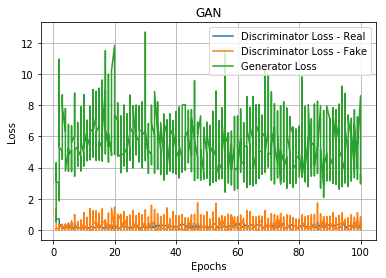

<Figure size 432x288 with 0 Axes>

In [4]:
def adam_optimizer():
    return adam(lr=0.0002, beta_1=0.5)
def create_generator():
    generator=Sequential()
    generator.add(Dense(units=256,input_dim=100))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))
    
    #generator.add(Dense(units=2048))
    #generator.add(LeakyReLU(0.2))
    
    #generator.add(Dense(units=5096))
    #generator.add(LeakyReLU(0.2))
        
    generator.add(Dense(units=1100, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return generator
g=create_generator()
g.summary()

def create_discriminator():
    discriminator=Sequential()
    discriminator.add(Dense(units=1024,input_dim=1100))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    
    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(units=1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return discriminator
d =create_discriminator()
d.summary()

def create_gan(discriminator, generator):
    discriminator.trainable=False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output= discriminator(x)
    gan= Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan
gan = create_gan(d,g)
gan.summary()

def training(epochs=1, batch_size=10):
    
    #Loading the data
    X_train = samples
    batch_count = X_train.shape[0] / batch_size
    
    # Array initialization for logging of the losses
    d_loss_logs_r = []
    d_loss_logs_f = []
    g_loss_logs = []
    
    # Creating GAN
    generator= create_generator()
    discriminator= create_discriminator()
    gan = create_gan(discriminator, generator)
    
    for e in range(1,epochs+1 ):
        print("Epoch %d" %e)
        for _ in tqdm(range(batch_size)):
        #generate  random noise as an input  to  initialize the  generator
            noise= np.random.normal(0,1, [batch_size, 100])
            
            # Generate fake MNIST images from noised input
            generated_images = generator.predict(noise)
            y_fake = np.zeros(batch_size)
            
            # Get a random set of  real images
            image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            y_real = np.ones(batch_size)
            
            #Construct different batches of  real and fake data 
            X= np.concatenate([image_batch, generated_images])
            
            # Labels for generated and real data
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]=0.9
            
            #Pre train discriminator on  fake and real data  before starting the gan. 
            discriminator.trainable=True
            d_loss_real = discriminator.train_on_batch(image_batch, y_real)
            d_loss_fake = discriminator.train_on_batch(generated_images, y_fake)
            #d_loss_comb = discriminator.train_on_batch(X, y_dis)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            
            #Tricking the noised input of the Generator as real data
            noise= np.random.normal(0,1, [batch_size, 100])
            y_gen = np.ones(batch_size)
            
            # During the training of gan, 
            # the weights of discriminator should be fixed. 
            #We can enforce that by setting the trainable flag
            discriminator.trainable=False
            
            #training  the GAN by alternating the training of the Discriminator 
            #and training the chained GAN model with Discriminator’s weights freezed.
            g_loss = gan.train_on_batch(noise, y_gen)
            
            # print progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (e, d_loss_real, 100*d_loss_fake, g_loss))
            
            # Store the losses
            d_loss_logs_r.append([e, d_loss_real])
            d_loss_logs_f.append([e, d_loss_fake])
            g_loss_logs.append([e, g_loss])
            
        # end of training    
        d_loss_logs_r_a = np.array(d_loss_logs_r)
        d_loss_logs_f_a = np.array(d_loss_logs_f)
        g_loss_logs_a = np.array(g_loss_logs)

    # At the end of training plot the losses vs epochs
    plt.plot(d_loss_logs_r_a[:,0], d_loss_logs_r_a[:,1], label="Discriminator Loss - Real")
    plt.plot(d_loss_logs_f_a[:,0], d_loss_logs_f_a[:,1], label="Discriminator Loss - Fake")
    plt.plot(g_loss_logs_a[:,0], g_loss_logs_a[:,1], label="Generator Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('GAN')
    plt.grid(True)
    plt.show()
    plt.savefig('GANFIT_1.png')
        #if e == 1 or e % 20 == 0:
           #plot_generated_images(e, generator)
            
training(100,50)

g.save('generator_2.h5')
d.save('discriminator_2.h5')

In [6]:
def compute_port_VaR(port_weights, var_hor, ret_samples):

    # create list to store values of portfolio returns
    port_returns = []
    # for each of the samples compute the returns to portfolio over the time horizon
    for num_samp in range(ret_samples.shape[0]):
        for ret_hor in range(ret_samples.shape[1]):
            
            end_ix = ret_hor + var_hor
            # check where the pattern ends
            if end_ix > ret_samples.shape[1]:
                break
            
            # get the subset of returns
            temp = ret_samples[num_samp, ret_hor:end_ix,:]
            if var_hor > 1:
                temp = np.cumprod((temp + 1), axis =0)
                temp = np.dot(temp[len(temp)-1], port_weights) -1
                port_returns.append(temp)
            else:
                port_returns.append(np.dot(temp, port_weights))
    
    return np.array(port_returns)

In [27]:
# initialize portfolio weights. Use real weights if available
init_weights = np.random.uniform(0,1,50)
# portfolio weights must add up to 1
init_weights = init_weights / sum(init_weights)

# now generate 100000 samples and compute the VaR for various horizons and save them
g = load_model('generator_1.h5')
noise= np.random.normal(0,1,[10000,100])
ret_samples = g.predict(noise)
ret_samples = ret_samples.reshape(ret_samples.shape[0],22,50)
VaRList = list()
for i in range(1,21):
    tempvar = compute_port_VaR(init_weights, i, ret_samples)
    VaRList.append(tempvar)
 

In [28]:
e = 1
for v in VaRList:
    temp = np.sort(v,axis=None)
    f_VaR5 = temp[(int(len(v)*0.05))]
    f_VaR95 = temp[(int(len(v)*0.95))]
    print ("%d [5 VaR: %.2f%%, 99 VaR: %.2f%%]" %(e, f_VaR5*100, 100*f_VaR95))
    e = e + 1

1 [5 VaR: -4.31%, 99 VaR: 4.39%]
2 [5 VaR: -5.88%, 99 VaR: 6.09%]
3 [5 VaR: -7.47%, 99 VaR: 7.61%]
4 [5 VaR: -8.72%, 99 VaR: 9.26%]
5 [5 VaR: -9.65%, 99 VaR: 10.15%]
6 [5 VaR: -10.85%, 99 VaR: 11.22%]
7 [5 VaR: -11.62%, 99 VaR: 11.57%]
8 [5 VaR: -12.43%, 99 VaR: 11.66%]
9 [5 VaR: -13.35%, 99 VaR: 11.89%]
10 [5 VaR: -13.91%, 99 VaR: 11.39%]
11 [5 VaR: -14.59%, 99 VaR: 12.45%]
12 [5 VaR: -15.09%, 99 VaR: 13.07%]
13 [5 VaR: -16.01%, 99 VaR: 13.80%]
14 [5 VaR: -16.53%, 99 VaR: 15.03%]
15 [5 VaR: -16.99%, 99 VaR: 16.11%]
16 [5 VaR: -16.72%, 99 VaR: 18.09%]
17 [5 VaR: -16.80%, 99 VaR: 19.49%]
18 [5 VaR: -17.33%, 99 VaR: 20.95%]
19 [5 VaR: -17.50%, 99 VaR: 22.44%]
20 [5 VaR: -19.44%, 99 VaR: 22.62%]


In [34]:
# now compute VaR just using real data
ret_samples = samples.reshape(samples.shape[0],22,50)
dVaRList = list()
for i in range(1,21):
    tempvar = compute_port_VaR(init_weights, i, ret_samples)
    dVaRList.append(tempvar)



In [35]:
e = 1
for v in dVaRList:
    temp = np.sort(v,axis=None)
    f_VaR5 = temp[(int(len(v)*0.05))]
    f_VaR95 = temp[(int(len(v)*0.95))]
    print ("%d [5 VaR: %.2f%%, 95 VaR: %.2f%%]" %(e, f_VaR5*100, 100*f_VaR95))
    e = e+ 1

1 [5 VaR: -1.66%, 95 VaR: 1.82%]
2 [5 VaR: -2.39%, 95 VaR: 2.60%]
3 [5 VaR: -2.85%, 95 VaR: 3.25%]
4 [5 VaR: -3.31%, 95 VaR: 3.86%]
5 [5 VaR: -3.72%, 95 VaR: 4.35%]
6 [5 VaR: -4.00%, 95 VaR: 4.75%]
7 [5 VaR: -4.39%, 95 VaR: 5.15%]
8 [5 VaR: -4.72%, 95 VaR: 5.62%]
9 [5 VaR: -4.91%, 95 VaR: 6.11%]
10 [5 VaR: -5.16%, 95 VaR: 6.42%]
11 [5 VaR: -5.36%, 95 VaR: 6.87%]
12 [5 VaR: -5.64%, 95 VaR: 7.25%]
13 [5 VaR: -5.87%, 95 VaR: 7.75%]
14 [5 VaR: -6.13%, 95 VaR: 8.11%]
15 [5 VaR: -6.51%, 95 VaR: 8.55%]
16 [5 VaR: -6.67%, 95 VaR: 8.91%]
17 [5 VaR: -6.94%, 95 VaR: 9.22%]
18 [5 VaR: -7.01%, 95 VaR: 9.55%]
19 [5 VaR: -7.29%, 95 VaR: 9.86%]
20 [5 VaR: -7.49%, 95 VaR: 10.28%]


In [48]:
v = dVaRList[0]
temp = np.sort(v,axis=None)
len(v)

158840

In [29]:
tempvar = compute_port_VaR(init_weights, 1, ret_samples)
tempvar = np.array(tempvar)

In [32]:
tempvar = np.sort(tempvar,axis=0)

In [33]:
tempvar

array([[-0.10095006],
       [-0.10095006],
       [-0.10095006],
       ...,
       [ 0.11066205],
       [ 0.11066205],
       [ 0.11066205]])

In [3]:
# historical VaR and parametric VaR computation
dataset = create_dataseries()

In [4]:
dataset.head()

,AAME,ABEO,ABMD,ADI,ADP,ADSK,AEGN,ALCO,ALOT,AMAG,...,BSET,CAMP,CAR,CBRL,CBSH,CDNS,CDZI,CELG,CERN,CGNX
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,2.50,12500.0,5.88,1.60,4.94,5.03,8.38,29.25,5.09,11.50,...,19.47,0.56,2.84,5.38,4.92,4.89,375.00,0.32,0.20,0.66
1990-01-03,2.50,12500.0,5.81,1.52,4.92,5.16,8.50,29.50,5.33,11.67,...,19.73,0.63,2.87,5.48,4.94,5.03,390.63,0.31,0.20,0.65
1990-01-04,2.50,13750.0,5.63,1.50,4.89,5.03,8.50,29.00,5.33,11.50,...,19.73,0.66,2.92,5.48,4.96,4.92,375.00,0.32,0.21,0.63
1990-01-05,2.38,13750.0,5.75,1.50,4.86,5.03,8.13,29.75,5.21,11.17,...,19.73,0.56,2.87,5.38,4.92,4.89,390.63,0.31,0.21,0.62
1990-01-08,2.38,15000.0,5.75,1.50,4.87,4.98,8.13,31.25,5.15,10.83,...,19.87,0.56,2.92,5.48,4.92,5.00,375.00,0.32,0.21,0.62


In [5]:
init_weights = np.random.uniform(0,1,50)
# portfolio weights must add up to 1
init_weights = init_weights / sum(init_weights)

In [24]:
# now compute VaR just using real data
dVaRList = list()
for i in range(1,21):
    ret_mat = dataset.shift(-1*i)/dataset -1
    ret_mat.drop(ret_mat.tail(i).index,inplace=True)
    tempvar = np.dot(ret_mat.values,init_weights)
    dVaRList.append(tempvar)

In [22]:
x = init_weights.reshape(init_weights.shape[0],1)
i = 1
ret_mat = dataset.shift(-1*i)/dataset -1
ret_mat.drop(ret_mat.tail(i).index,inplace=True)
tempvar = np.dot(ret_mat.values,init_weights)
tempvar.shape

(7243,)

In [23]:
tempvar

array([ 0.00833621,  0.01385654, -0.00399371, ...,  0.01182069,
       -0.00924992, -0.00582932])